In [2]:
%matplotlib inline

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from pyvis.network import Network
import numpy as np
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd

In [4]:
# Wczytujemy wcześniej utworzoną tabelę
df = pd.read_hdf('./outputs/budzety_clean.h5')

In [5]:
# Zapisujemy nazwy budżetów do zmiennej 'sentence_list'
sentence_list = df['names'].tolist()
miasta = df['miasto'].tolist()

In [6]:
# Nazwa modelu to tworzenia embeddingów ze zdań
model_name ="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2" 

In [7]:
# Tworzymy model. Jeżeli nie mamy go zapisanego na dysku, to zostanie ściągnięty
# Ograniczamy ilość słów w zdaniu do 512
model = SentenceTransformer(model_name)
model.max_seq_length = 512

In [8]:
# Tworzymy embeddingi z 'sentence_list'
embedding = model.encode(sentence_list, convert_to_tensor=True)

In [9]:
# Liczymy odległość cosinusową między wektorami - każdy z każdym
cosine_scores = util.pytorch_cos_sim(embedding, embedding)

In [10]:
# Iterujemy po 'cosine_scores' i wybieramy te wartości, które są największe.
# Przypominam: 'cosine_scores' zawiera miary cosinusowe każdego wektora z każdym
# Dwa wektory są do siebie podobne, jeżeli kąt między nimi jest najmniejszy, tzn.
# cosinus kąta między nimi jest największy (najbardziej zbliżony do 1)
# Dlatego szukamy wartości maksymalnej.
count = 0
similar_names = []
similar_city = []
for scores in tqdm(cosine_scores):
    scores[count] = 0
    max_elements, max_indices = torch.max(scores, dim=0)
    max_index = max_indices.item()
    print('==='*30)
    print(count)
    print(df.iloc[count]['nazwa'])
    print(df.iloc[max_index]['nazwa'])

    similar_names.append(df.iloc[max_index]['nazwa'])
    similar_city.append(df.iloc[max_index]['miasto'])

    count +=1


  0%|          | 0/23030 [00:00<?, ?it/s]

0


  0%|          | 31/23030 [00:00<04:26, 86.26it/s] 

Projektistatus
Projekty duze
1
Doposażenie parku pomiędzy Estakadą Kwiatkowskiego a wieżowcami przy ul. Dantyszka 2,4,8 w siłownię zewnętrzną i elementy małej architektury - pergole, bujane ławki itp.
Solankowe Tychy – budowa tężni parkowej przy ul. Hlonda
2
Cykliczne warsztaty dla seniorów z dzielnicy Obłuże rozwijające pamięć i koncentrację
Cykliczne warsztaty dla seniorów z dzielnicy Oksywie rozwijające pamięć i koncentrację
3
Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana
Dziki Ogród Spoteczny
4
Montaż słupów oświetleniowych na chodniku przy ul. Niskiej na odcinku pomiędzy ul. Bohaterów Getta Warszawskiego i Hodowlaną
Wykonanie oświetlonego przejścia między ul. Dębową a ul. Powstańców Warszawskich
5
Cotygodniowe weekendowe lekcje tańca towarzyskiego dla dorosłych
Nauka tańca towarzyskiego-użytkowego w parach dla młodzieży 14-18 lat
6
Meble miejskie zaprojektowane przez dzieci. Podziemia Hal Targowych w Gdyni.
Zakup mebli do sali dziecięcej w Żłobku nr 30. 
7
Odnowienie podwórek w

  0%|          | 101/23030 [00:00<01:45, 216.34it/s]


53
Ławka z zadaszeniem do karmienia i przewijania dzieci w pobliżu fontanny przy al. Jana Pawła II
Fontanna na stawie przy Skwerze Księdza Piotra Mazura
54
Gry i zabawy z mapą i kompasem - 3 imprezy dla młodych, starszych i najstarszych w dzielnicy Pustki Cisowskie i Demptowo
Gry i zabawy z mapą i kompasem – 3 imprezy dla młodych, starszych i najstarszych w dzielnicy Chwarzno – Wiczlino
55
Budowa sygnalizacji świetlnej i przejścia dla pieszych na skrzyżowaniu Wielkopolskiej i Spokojnej
Sygnalizacja świetlna - przejście dla pieszych Trasa Średnicowa - Małachowskiego.
56
Pilates - zajęcia ruchowe dla mieszkańców
Zumba - zajęcia ruchowe dla mieszkańców
57
Nauka i doskonalenie pływania dla dzieci z klas 0-3 SP z terenu Witomina oraz organizacja XIV Mikołajkowych Zawodów Pływackich
Organizacja bezpłatnych zajęć nauki pływania dla dzieci w wieku szkolnym
58
Budowa systemu monitoringu na terenie wokół SP nr 29
Objecie monitoringiem zewnetrznym terenu SP 9.
59
Chodnik na części ul. Rybaków
Pa

  1%|          | 173/23030 [00:00<01:22, 278.27it/s]


Uzupełnienie zieleni miejskiej między ulicą Dedala 4 i 6 a koroną klifu.
Urzadzenie zieleni miejskiej miedzy ul. Dedala 6 a korona klifu
120
Przeprowadzenie cyklu zajęć sportowych z siatkówki dla młodzieży i dorosłych na różnych poziomach zaawansowania
Pomóż nam stworzyć przyszła gwiazdę przyszłego sportu-zajęcia ogólnorozwojowe dla dzieci i młodzieży.
121
Park kieszonkowy na placu po byłym baraku mieszkalnym przy ulicy Dedala
Parki kieszonkowe w dzielnicach
122
Oświetlenie chodnika między przedszkolem nr 48 a szkołą podstawową nr 39 i utworzenie parku edukacyjno - rekreacyjnego na terenie przyszkolnego lasku.
Budowa edukacyjno-rekreacyjnego placu zabaw przy Zespole Szkolno-Przedszkolnym nr 2.
123
Oświetlenie ciemnego przejścia łączącego polankę na końcu ulicy Kopernika (plac do street workout i plac zabaw) z ulicą Powstania Wielkopolskiego i poprawa oświetlenia na polanie.
Oświetlenie boiska przy ulicy Zakrzowieckiej 
124
Zielona wyspa na stawie przy skwerze ks. Piotra Mazura
Zielona

  1%|          | 247/23030 [00:01<01:14, 307.23it/s]


185
Cykliczne warsztaty dla seniorów z dzielnicy Pogórze rozwijające pamięć i koncentrację
Cykliczne warsztaty dla seniorów z dzielnicy Chwarzno-Wiczlino rozwijające pamięć i koncentrację
186
Cykliczne warsztaty dla seniorów z dzielnicy Oksywie rozwijające pamięć i koncentrację
Cykliczne warsztaty dla seniorów z dzielnicy Dąbrowa rozwijające pamięć i koncentrację
187
Kino plenerowe na Chyloni - projekcja czterech filmów w Parku Kilońskim
Kino letnie na Dąbrowie - projekcja czterech filmów w plenerze
188
Doposażenie placu zabaw dla dzieci młodszych i starszych przy ul. Komandorskiej
9. Doposażenie placu zabaw dla dzieci przy ul. Mazowieckiej 32
189
Gry i zabawy z mapą i kompasem – 3 imprezy dla młodych, starszych i najstarszych w dzielnicy Chwarzno – Wiczlino
Gry i zabawy z mapą i kompasem - 3 imprezy dla młodych, starszych i najstarszych w dzielnicy Pustki Cisowskie i Demptowo
190
Gry i zabawy z mapą i kompasem – cykliczne zajęcia dla najmłodszych na Dąbrowie
Gry i zabawy z mapą i kom

  1%|          | 284/23030 [00:01<01:10, 324.62it/s]


248
Sterylizacja i kastracja zwierząt właścicielskich (psów i kotów)
Sterylizacja (kastracja) kotów i psów właścicielskich.
249
Cykl zajęć gimnastyki ogólnorozwojowej z elementami pilatesu, stretchingu i zdrowego kręgosłupa dla mieszkańców w każdym wieku
9. Zajęcia z gimnastyki i rehabilitacji kręgosłupa dla mieszkańców Sopotu
250
Dozownik ziarna dla kaczek przy stawie na skwerze ks. Piotra Mazura
Kosze na śmieci niedostępne dla ptaków przy skwerze Niegolewskiego 
251
Teren po basenach na Polance Redłowskiej - uprzątnięcie i udostępnienie mieszkańcom
Zagospodarowanie terenu zasypanego zbiornika wodnego przy Placu Ludowym, celem urządzenia kącika rekreacyjno-wypoczynkowego dla mieszkańców osiedla Zakrzów.
252
Remont schodów przy ulicy Gorczycowej w Gdyni
61. REMONT CHODNIKÓW PRZY ULICY PUSZKINA
253
Osiem respiratorów dla szpitali na terenie Gdyni i trzy tężnie solankowe (Chylonia, Oksywie, Wzgórze Św. Maksymiliana)
Respiratory dla krakowskiego szpitala miejskiego
254
Zajęcia taneczne d

  2%|▏         | 356/23030 [00:01<01:09, 324.35it/s]

319
Uporządkowanie terenu jezdni ul. Krzywej, wjazd od ul. Kartuskiej, teren za sklepem Rossmann, utworzenie 4 miejsc parkingowych dla osób z niepełnoprawnością oraz montaż dwóch lamp LED
1. PODWÓRKO LIMANOWSKIEGO - ŻEROMSKIEGO - OŚWIETLENIE I MIEJSCA PARKINGOWE.
320
Naukowy Plac Zabaw na Wzgórzu
Stare Podgórze dla najmfodszych - plac zabaw na nowo!
321
Lądowisko dla helikoptera Lotniczego Pogotowia Ratunkowego na boisku szkolnym Sp.40 przy ul. Rozewskiej
Dronowa Szkoła Latania Sportowego dla dzieci na Chomiczówce
322
WYBIEG DLA PSÓW
wybieg dla psów
323
MISTRZOSTWA POGÓRZA W BIEGACH I NORDIC WALKING, LIGA PIŁKI NOŻNEJ, AKTYWNY PRZEDSZKOLAK, FITNESS, 2 TURNIEJE Z SIATKÓWKI I KOSZYKÓWKI, FESTYN RODZINNY, TURNIEJE JUDO I BOKSERSKI.
Festyny sportowe dla dzieci, zajecia fitness oraz szesnascie turniejów sportowych na Pogórzu (turnieje siatkówki, koszykówki, pitki noznej, pitki recznej, tenisa stotowego judo)
324
TRZY WYDARZENIA SPORTOWE: RODZINNY FESTYN SPORTOWY, MISTRZOSTWA POGÓRZA W PIŁCE

  2%|▏         | 432/23030 [00:01<01:08, 331.52it/s]

379
Uzupelnienie chodnika wzdtuz ulicy Chwarznienskiej - bezpieczna droga do SP48 od strony Sokótki do przejscia przy przystanku Tezeusza
Utwardzenie ścieżki pod bloki  nr. 43 i 53 na ulicy Władysława Łokietka
380
Estetyzacja przestrzeni wzdtuz ul. Zaruskiego (osiedle Patio Rózy) - nasadzenia drzew i krzewów, instalacja wiaty autobusowej
Drzewa dla Wrocławia – nasadzenia na terenach zabytkowych i w śródmieściu
381
Nasadzenie krzewów W celu wyeliminowania parkowania na skrzyzowaniu ul. Filipkowskiego 2, 20, 3
Stworzenie miejsc parkingowych na zaniedbanym skwerze u zbiegu ulic Felińskiego i Gojawiczyńskiej.
382
Utozenie chodnika zgodnie Z trasami pieszymi mieszkariców dzielnicy ul. Okrezna
Chodnik między ulicami Owsianą i Pszenną. 
383
Modernizacja placu zabaw dla dzieci pomiedzy ulicami Amona i lzydy
Modernizacja placu zabaw dla dzieci przy ulicy Krajeńskiej
384
Piknik rodzinny Z grami i zabawami dla najmfodszych, wizytq Strazy Pozarnej oraz wymianq rzeczy
Piknik rodzinny na Zaciszu
385

  2%|▏         | 503/23030 [00:01<01:07, 331.96it/s]

442
Gry i zabawy ruchowe dla najmfodszych Z elementami nauki jezyków obcych W dzielnicy Dabrowa
Scyzoryk w akcji - Kielecka Gra Miejska
443
Ustawienie lustra drogowego przy ul. Piotunowej
Lustro drogowe na zakręcie ul. Szparagowej
444
Rodzinna gra terenowa na orientacje - Dqbrowa
Rodzinna gra terenowa na orientacje - Cisowa
445
Cykliczne spacery i pikniki na tonie natury oraz warsztaty edukacyjne dla rodziców Z dziecmi
Cykliczne spacery i pikniki na łonie natury oraz warsztaty edukacyjne dla rodziców z dziećmi
446
Cykliczne zajecia sportowe Strong by Zumba
Cykliczne zajecia sportowe Zumby
447
Cykl warsztatów dotyczqcych zdrowego odzywiania dla wszystkich mieszkariców dzielnicy
nr Posprzataj! Zazielen! Szanuj! Edukuj! - projekt zaklada przeprowadzenie kampanii spolecznej oraz warsztatów dla mieszkanców W celu: -zwrócenia uwagi na koniecznosé dbania o wspólna przestrzen W miescie -wyrobienie wlasciwych nawyków utrzymania porzadku i czystosci -wzmocnienia wlasciwych zachowan W przestrzeni

  2%|▏         | 537/23030 [00:01<01:08, 329.28it/s]


504
Puchar W biegach dla dzieci i mtodziezy W dzielnicy Maty Kack
Puchar w biegach dla dzieci i mtodziezy Z dzielnicy Wielki Kack
505
Warsztaty muzyki sakralnej dla wszystkich mieszkanców Matego Kacka
Warsztaty muzyczno-artystyczne, prozdrowotne oraz spotkania autorskie W bibliotece dla dzieci, mtodziezy, dorostych i rodzin
506
Odnowienie harcerskiego pomnika rozstrzelanych chtopców w 1939 roku rewitalizacja otaczajacego terenu.
Odnowa pomnika i rewitalizacja terenu wokół pomnika „Odrodzenia”
507
Rewitalizacja lasu (miedzy ulicami Podgórska a Ledóchowskiego) - nowa bezpieczna sciezka zdrowia, drewniany trakt, miejsca do wypoczynku i relaksu, zabezpieczenie przed zalewaniami
Dąbie - Oświetlenie miejsc niebezpiecznych i przebudowa ścieżek w Parku Dąbskim. Сzęść 1
508
Rewitalizacja placu zabaw oraz budowa sitowni miejskiej dla dorostych pomiedzy ulicami Eugeniusza Kwiatkowskiego 100, 102 i Ptk. Stanistawa Dabka 251, 257
Budowa ogólnodostępnego, ogrodzonego placu zabaw na osiedlu Falkowa.

  3%|▎         | 614/23030 [00:02<01:05, 339.85it/s]


573
Modernizacja boiska przy Szkole Podstawowej nr 21. Przebudowa na boisko wielofunkcyjne
Rewitalizacja kompleksu boisk „Orlik" przy Szkole Podstawowej nr 3
574
Bezpieczne przejscie przy Hali Targowej ul. Jana Z Kolna
Bezpieczny chodnik wzdłuż ul. Pułkowej
575
Umieszczenie 20 tawek wokót pomnika "Zagle" przy Alei Jana Pawta Il
Pomnik Kaczki Julianowskiej. 
576
Wykonanie 3 miejsc postojowych dla osób Z niepetnosprawnosciami, wykonanie chodnika, remont odcinka drogi dojazdowej do biur przy ulicy Swietojarskie] 5-7
Remont chodnika przy ul.Przewodowej od ulicy Mrągowskiej do ul.Dzięcioła
577
Celtyckie Lato - czyli letni piknik rodzinny Z pokazem tanca irlandzkiego oraz muzyka celtycka (irlandzka i szkockq) na Placu Grunwaldzkim, pokazem filmowym i wspólng zabawa ceili
Lokalne pikniki z atrakcjami w harcerskim stylu
578
Letnia kawiarnia dla seniorów przy bibliotece na ulicy Starowiejskiej
L2/08/VI - Biblioteka: od malucha do seniora
579
Zajecia samoobrony dla kobiet - mieszkanek éródmiesc

  3%|▎         | 682/23030 [00:02<01:10, 315.85it/s]

629
Rozbudowa placu zabaw dla dzieci mtodszych, starszych i mtodziezy przy ulicy Dedala 6-8
Ekologiczny plac zabaw dla dzieci na ulicy Tektonicznej
630
Montaz dwóch defibrylatorów - przy parafii przy ul. Rybaków oraz przy wspólnocie mieszkaniowej przy ul. Ikara 6
Montaz dwóch defibrylatorów - przy parafii przy ul. Rybaków oraz W okolicy samolotu - pomnika przy ul. Ikara
631
Nasadzenia kwiatów i innych kompozycji roslinnych przy ulicach Dedala, Ikara, Zielonej i Rybaków
Nasadzenia kwiatów i innych kompozycji roslinnych przy ulicach Dedala, Ikara, Zielonej i Rybaków
632
Oswietlenie boiska przy Szkole Podstawowej nr 28
Widny Gocław - Doświetlenie terenu wokół Szkoły Podstawowej SP 312 przy Umińskiego 12
633
Wykonanie ogólnodostepnego parkingu na terenie parafii Biskupa Józefa Sebastiana Pelczara
Parking przy ul. Langiewicza przy Społecznej SP im. Henryka Sienkiewicza
634
Budowa rekreacyjnych torów do jazdy typu pumptrack wraz Z uzupelniajaca zielenia i miejscami do odpoczynku W poblizu pr

  3%|▎         | 753/23030 [00:02<01:06, 335.05it/s]

687
Integracyjny plac zabaw na Oksywiu przy ul. Btekitnej
Integracyjny plac zabaw
688
Budowa wyniesionego przejscia dla pieszych oraz instalacja aktywnych, punktowych elementów odblaskowych przy ul. Bosmanskiej 41
 Remont chodników Chocianowice, Łaskowice - etap 4.
689
Budowa sifowni zewnetrznej przy Szkole Podstawowej nr 11 W Gdyni Orlowie, ul. Wroclawska
11. Budowa boiska wielofunkcyjnego przy Szkole Podstawowej nr 6 w Koszalinie.
690
Park nad rzeka Kacza W Ortowie - W okolicy ulic Sieradzkiej, Wroclawskiej i Kurpiowskiej
Tężnie solankowe - Kanał Bydgoski, Park Witosa, skwer przy ul. Baczyńskiego.
691
Latarnie solarne przy wybiegu dla psów W Parku Kolibki
Rewitalizacja Parku nad Sokołówką- latarnie solarne, aleje, ławki, kosze na psie odchody i zieleniec. 
692
Ciag dalszy estetyzacji terenu zielonego przy Placu Górnoslaskim - fragment pomiedzy pawilonami handlowymi i placem zabaw
Zieleniec przy Wrześnieńskiej - zagospodarowanie terenu i plac zabaw.
693
Rozbudowa placu zabaw na ul. Zl

  3%|▎         | 787/23030 [00:02<01:07, 331.66it/s]


753
      Kącik urwisów małych i dużych (ul
Kącik urwisów małych i dużych (ul. Daszyńskiego 10)
754
      Pierwszorzędny dojazd do siedemnastki (ul
Pierwszorzędny dojazd do siedemnastki (ul. 1 Maja 17) 
755
  Miejskie ławki solarne 
Miejskie ławki solarne 
756
  Boisko wielofunkcyjne i poprawa estetyki osiedla Witosa w Suwałkach  (ul
Boisko wielofunkcyjne i poprawa estetyki osiedla Witosa w Suwałkach 
757
      Zakup i montaż hali pneumatycznej na boisku przy Szkole Podstawowej nr 6 w Suwałkach 
Zakup i montaż hali pneumatycznej na boisku przy Szkole Podstawowej nr 6 w Suwałkach 
758
      Uporządkowanie terenu oraz budowa parkingów i zatoki autobusowej MPK w centrum ogródków działkowych na Osiedlu Północ w Suwałkach (ulica Wyszyńskiego)
Uporządkowanie terenu oraz budowa parkingów i zatoki autobusowej MPK w centrum ogródków działkowych na Osiedlu Północ w Suwałkach (ulica Wyszyńskiego)
759
      Modernizacja szatni i łazienek przy basenie w Szkole Podstawowej nr 10 w Suwałkach 
Modern

  4%|▎         | 856/23030 [00:02<01:06, 333.10it/s]

816
Bezpieczna ulica - bezpieczna dzielnica. Oświetlenie LED przejść dla pieszych bez sygnalizacji świetlnej na Przymorzu Wielkim.
Bezpieczna ulica - bezpieczna dzielnica. Oswietlenie przejsé dla pieszych bez sygnalizacji swietlnej na Przymorzu Wielkim.
817
Suchą stopą do domu
Woonerf na Gepperta
818
Zielono mi!
Zielono mi 2021 
819
TAJEMNICZY LABIRYNT
Naturalny labirynt sensoryczny
820
Remont chodnika wzdłuż ulicy Złota Karczma
Remont chodnika wzdłuż ulicy Olszyny i 
821
Sad owocowy przy Polankach
Tężnia Solankowa na Radziwiu
822
Wolny Wybieg dla psów Niedzwiednik
P0083 Wolne wybiegi dla psów
823
Powstanie chodnika prowadzącego z ulicy Kłoczkowskiego do Zbiornika retencji Świętokrzyska I.
Utwardzenie ścieżki pod bloki  nr. 43 i 53 na ulicy Władysława Łokietka
824
Zieleń i aktywność - zagospodarowanie skweru przy Telimeny ETAP I
Zieleń dla Wrocławia - etap II
825
Pierwszy plac zabaw przy blokach na Osiedlu Tysiąclecia
Budowa placu zabaw przy ul. Lódzkiej.
826
Place zabaw na zaniedbanyc

  4%|▍         | 941/23030 [00:03<01:00, 365.79it/s]

885
Wykonanie pasów rowerowych na ul. Polanki
PASY ROWEROWE NA PRZYBYSZEWSKIEGO.
886
Remont schodów na ulicy Ciasnej
Remont nawierzchni na ulicy Ostrygowej
887
Chodnik ze schodami łączący ul. Czerwcową i Lipcową z ul. Otomińską.
Ścieżka oraz schody i podjazd dla wózków łączące ul. Cylkowskiego z ul. Wiosny Ludów
888
Wymiana nawierzchni na ulicy Wydmy od Bunkra przez okolice głównego wejścia na plażę (nr 26) aż do Szlaku fortyfikacji nadmorskich
Kraniki do opłukiwania stóp przy wyjściu z plaży
889
Wykonanie ścieżki spacerowej i rowerowej wzdłuż kolejki PKM ( Niedzwiednik - ogródki działowe -Strzyża )
Dobudowa ścieżek rowerowych i chodników do istniejących odcinków
890
Rodzinna Gra Terenowa Wrzeszcz Górny - zabawa z mapą.
Rodzinna Gra Terenowa Przymorze Wielkie - zabawa z mapą.
891
Rodzinna Gra Terenowa Suchanino - zabawa z mapą.
Rodzinna Gra Terenowa Jasień - zabawa z mapą.
892
Rodzinna Gra Terenowa Przeróbka - zabawa z mapą.
Rodzinna Gra Terenowa Osowa - zabawa z mapą.
893
Ogrody kwiat

  4%|▍         | 1016/23030 [00:03<01:01, 356.98it/s]


959
Przejście piesze między ul. Wrzosy, a ul. Sokola (wzdłuż Biedronki)
Brodzik Karłowice - przejście dla pieszych przez ul. Kasprowicza na wysokości Brodzika
960
TERENOWE ZAJĘCIA BIEGOWE (TRAIL) - VII Dwór
TERENOWE ZAJĘCIA BIEGOWE (TRAIL) - Brętowo
961
ŁĄKA miododajna przy ulicy Matejki
Utwardzenie części ulicy Pszczelnej.
962
Rodzinna Gra Terenowa Żabianka-Wejhera-Jelitkowo-Tysiąclecia - zabawa z mapą.
Rodzinna Gra Terenowa Wyspa Sobieszewska - zabawa z mapą.
963
Rodzinna Gra Terenowa Wrzeszcz Dolny - zabawa z mapą.
Rodzinna Gra Terenowa Przymorze Małe - zabawa z mapą.
964
Rodzinna Gra Terenowa Strzyża - zabawa z mapą.
Rodzinna Gra Terenowa Chełm - zabawa z mapą.
965
Rodzinna Gra Terenowa Przymorze Małe - zabawa z mapą.
Rodzinna Gra Terenowa Jasień - zabawa z mapą.
966
Rodzinna Gra Terenowa Brzeźno - zabawa z mapą.
Rodzinna Gra Terenowa Osowa - zabawa z mapą.
967
Budowa brakującego oświetlenia fragmentu ulicy Jaworzniaków - poprawa bezpieczeństwa pieszych poruszających się ulicą bez

  5%|▍         | 1057/23030 [00:03<00:59, 370.27it/s]

1021
"Tajemniczy Ogród". Przystanek Relaks Strzyża Miejsce relaksu, odpoczynku i spotkań dla mieszkańców dzielnicy Strzyża. Idealne do pikników, biernego i aktywnego wypoczynku.
Ogród Zmysłów w Parku Przyjaźni.
1022
remont drogi na ulicy Śląskiej na odcinku ul. Szczecińskiej a ul. Krynickiej
remont chodnika wzdłuż ulicy Śląskie na odcinku między ul. Szczecińskiej a ul. Krynickiej
1023
Przebudowa wraz z poszerzeniem chodnika i ścieżki rowerowej wzdłuż al. Rzeczypospolitej - etap 2: na odcinku od skrzyżowania z ul Hynka do skrzyżowania z aleją Jana Pawła
Przebudowa wraz z poszerzeniem chodnika i ścieżki rowerowej wzdłuż al. Rzeczypospolitej - etap 1: na odcinku od osiedla Albatross Towers do skrzyżowania z ul Hynka
1024
ZAJĘCIA SPORTOWE POD CHMURKĄ: Treningi Aktywizujące OPEN i Nordic Walking - Wrzeszcz Górny
ZAJĘCIA SPORTOWE POD CHMURKĄ: Treningi Aktywizujące OPEN i Nordic Walking - Wrzeszcz Dolny
1025
ZAJĘCIA BIEGOWE - Stogi
ZAJĘCIA BIEGOWE - Jasień
1026
ZAJĘCIA SPORTOWE POD CHMURKĄ: T

  5%|▍         | 1131/23030 [00:03<01:02, 349.60it/s]


1087
Oświetlenie Al. Jana Pawła II - odcinek od Al. Rzeczypospolita do ul. Hynka
Licznik czasu trwania świateł - Al..Piłsudskiego / ul. Niciarniana.
1088
Dofinansowania do ogrodów wodnych dla mieszkańców domów wielorodzinnych z ogródkami
Ukwiecona Ogrodowa
1089
Odbudowa historycznego pomostu nad Stawem Łabędzim w Parku Oliwskim
Remont alejek W Parku Kajki oraz montaz wodopoju
1090
ZIELONY Nowy Port
Kwitnący Nowy Port
1091
Wykonanie łąk kwiatowych w ramach istniejących trawników lub nasadzenia krzewów ozdobnych na istniejących trawnikach
Integracyjny ogród - nasadzenia roślin ozdobnych na istniejącym skwerze
1092
Zielona Dzielnica
Zielona Dzielnica
1093
Przyjazne dla mieszkańców dojście z ul. Witolda Małcużyńskiego do ul. Schuberta, Suchanino, Gdańsk.
„Oaza Seniora" na terenie miejskim przy ul. Wojska Polskiego 162 - miejsce odpoczynku i integracji dla starszych mieszkańców Osiedla.
1094
Rewitalizacja zapomnianej alejki - stworzenie parku z placem zabaw
Rewitalizacja Placu Zabaw w Park

  5%|▌         | 1208/23030 [00:03<01:06, 327.29it/s]

1155
Teatr Grecki na wolnym powietrzu
34. Olsztyńskie Kino Plenerowe - Pojezierze
1156
Zielony Skwer PRZEBIŚNIEGOWA / NIEPOŁOMICKA
Zielony Skwer Promyka
1157
Odwodnienie ulicy Na Zaspę i położenie nowej warstwy bitumicznej na ulicy. Etap I
Odwodnienie ulicy Na Zaspe i potozenie nowej warstwy bitumicznej na ulicy. Etap I.
1158
Remont chodników na Przymorzu Małym - Kontynuacja
Remont chodnika Gładka.
1159
Park Kieszonkowy Karczemki
Park Kieszonkowy Turzyn
1160
Chodnik przy jezdni obok Zakopiańska 14
Chodnik przy ul. Kurpińskiego
1161
Niech w Oliwie rosną nowe drzewa! - ulica WITA STWOSZA / ŻEROMSKIEGO
Zasadzenie drzew na ulicy Ujejskiego od Tucholskiej do Karpackiej
1162
Strefa relaksu w Parku Millennium Gdańska
PARK REKREACYJNO-WYPOCZYNKOWY RYNEK ZABOROWSKI
1163
BYCZE WIDOKI - Park widokowy Byczej Góry
Park Srocza Góra
1164
Jar Wilanowski bardziej dostępny i przyjazny
Kwietne wiaty przystankowe
1165
Zielone płuca blokowisk Niedźwiednika.
Zielone miejsce na miły portret z misiem "Ursynki

  5%|▌         | 1247/23030 [00:04<01:03, 342.52it/s]


1214
Park kieszonkowy z ogrodem deszczowym przy ul. Kwietnej 1
Ogród deszczowy Plac Rozmarek.
1215
CZAS NA NOWY PLAC ZABAW przy JABŁOŃSKIEGO
Nowe urzadzenia na placu zabaw przy ul.Aleksandry
1216
Ścieżka rowerowa wzdłuż Al Hallera w Brzeźnie
Ścieżka rowerowa ul. Koszalińska
1217
Ścieżka rekreacyjno-użytkowa wzdłuż zbiornika Nowiec II, Matemblewo
Zbiornik Cedrowa: przestrzeń rekreacyjna
1218
Plac zabaw z elementami do street workout i ławkami przy ul. Winnickiej 1, 2, Kartuskiej 81, 83, 85, 79, 79A, 79B, Zakopiańskiej 38A, 38B
Plac do street workoutu na Gocławiu Iskra
1219
Dokończenie projektu z BO 2017 - wysoka zieleń na placu przy Al. Jana Pawła II / ul. Meissnera
Zielony przystanek na Placu św. Katarzyny
1220
ALEJA DĘBÓW WZDŁUŻ ŚCIEŻKI DO ZBIORNIKA AUGUSTOWSKA
Bulwar spacerowy nad rzeką Olechówką - Etap III. 
1221
PARK WYPOCZYNKOWY DLA SENIORÓW I MATEK Z DZIEĆMI – ETAP I jako kontynuacji budowy Dzielnicowego Parku Sportowo-Rekreacyjno-Wypoczynkowego
CHOJNY ZATORZE– PARK REKREACYJNO 

  6%|▌         | 1316/23030 [00:04<01:08, 318.86it/s]

1277
ALEJA Grunwaldzka przez wielkie A
Poidełko na Grunwaldzkim
1278
Świątecznie rozświetlamy Dolne Miasto
Zabłyśnij Na Święta czyli Świąteczna Iluminacja w Skwerze Wiecha 
1279
Ogólnodostępny teren rekreacyjny w okolicy Zielonego Stawu
PARK GRZEGÓRZECKI - Zielone 
1280
Budowa altanki przy zbiorniku Świętokrzyska II jako miejsce spotkań i ochrony przed niekorzystnymi warunkami pogody
Budowa toru rolkarskiego wokół zbiornika Świętokrzyska I
1281
Nasadzanie i modernizacja istniejcych terenow zielonych
Renowacja zieleni na terenie SP16
1282
Festyn na dzieci i zwierząt
dla dzieci w Wilkowyjach
1283
Ścieżka biegowa wokół zbiornika retencyjnego Jasień
Profesjonalna ścieżka biegowa wokół zbiornika retencyjnego Jasień
1284
ZABORNIA SPORT ARENA
Plac sportowo-zabawowy
1285
Rodzinna Gra Terenowa Śródmieście - zabawa z mapą.
Rodzinna Gra Terenowa Brętowo - zabawa z mapą.
1286
Przebudowa wraz z poszerzeniem chodnika i ścieżki rowerowej wzdłuż al. Rzeczypospolitej - etap 1: na odcinku od osiedla Alb

  6%|▌         | 1382/23030 [00:04<01:07, 321.94it/s]

1330
Zagospodarowanie skweru ul. Chmielna - Toruńska
Lawki na skwerze przy ul Malczewskiego
1331
Boisko do gry w hokeja na rolkach / rolkowisko
Boisko do hokeja na rolkach
1332
Grill w parku Św. Barbary
Grill w Parku Dąbrowskiego. 
1333
Wielka Aleja Lipowa - dosadzenie nowych drzew oraz pielęgnacja już rosnących
Więcej drzew i krzewów dla Pragi 
1334
Biskupia Górka - miejska przestrzeń rekreacyjna; II etap.
Biskupia Górka - miejska przestrzen rekreacyjna; II etap.
1335
Pierwsza pomoc dla rodziców i opiekunów małych dzieci
Warsztaty "Udzielanie Pierwszej Pomocy Dziecku" zapraszamy rodziców jak również opiekunów
1336
Miejski monitoring przejazdu przez Długi Targ oraz PGO Za Murami
Budowa monitoringu miejskiego (jeden punkt)
1337
Chodniki naszych Dzielnic: Wrzeszcz Górny, Strzyża, Młyniska, Ujeścisko, Piecko-Migowo, Wrzeszcz Dolny.
2. Doposażenie "Skweru Osiedlowego" na Os. Bukowe w Koszalinie
1338
Integracyjny Plac Zabaw Dla dzieci projekt we współpracy z Moniką Lewandowską - Goch i Wojc

  6%|▋         | 1467/23030 [00:04<00:58, 370.29it/s]


Osiedlowy zakątek lawendowo-lipowy.
1398
 Rewitalizacja ogólnodostępnego placu zabaw przy Szkole Podstawowej nr 47 ul. Reformacka 18
Doposażenie placu zabaw oraz renowacja nawierzchni boiska przy Szkole Podstawowej nr 2 w Chełmie
1399
 Koty miejskie  Chełm  opieka
Koty z Dzielnicy
1400
 Aktywny zbiornik Augustowski  budowa placu zabaw i siłowni pod chmurką
Rozbudowa placu zabaw oraz powstanie siłowni pod chmurką.
1401
 Chodnik do przychodni na ul. Reformackiej
Wiata przystankowa przy SP 47 o nietypowej konstrukcji (przystanek 108 i 118 "Reformacka")
1402
 Dojazd do ul. Worcella 21, 23, 25 oraz ul. Bitwy pod Lenino 1 i chodnik wzdłuż ul. Worcella 25
Modernizacja ul. Nickla na odcinku od ul. Frenzla do ul. Dalekiej
1403
 Aktywny spacer z wózkami przy zbiorniku retencyjnym Madalińskiegopiesza) wokół zbiornika retencyjnego
Aktywne spacery z wózkami przy zbiorniku retencyjnym Jasień
1404
 Zbiornik Jabłoniowa  ścieżka rekreacyjna (rolkowobiegowo
Park owocowy "Łacina"
1405
 Zielona przyszłoś

  7%|▋         | 1505/23030 [00:04<00:59, 361.88it/s]


1472
Bezpieczenstwo i monitoring dzielnicy Brzezno c.d.
Bezpieczeństwo i monitoring dzielnicy Brzeźno c.d.
1473
Szkolne patio dla osób niepelnosprawnych i nie tylko!
Remont Patio szkolnego w ZSETH. 
1474
Nowe PRZEJSCIE DLA PIESZYCH przy LIDL-u na ul. Gdanskiej + CHODNIK przez Plac Sasiedzki
"Dyngowy Plac" (czyli "Tęczowe Podwórko") - rewitalizacja skweru przy ulicy Świdnickiej, Panewnickiej i Koszalińskiej
1475
Remont ulicy Mazurskiej etap I - odwodnienie terenu
Remont chodnika i ulicy Mazurskiej
1476
Montaz stacji meteo " live Z odczytami on line na gdanskim molo
Kamera internetowa ze stacją pogodową na molo w Brzeźnie
1477
Kompleksowy remont boiska sportowo- rekreacyjnego dla mieszkariców
Remont i doposażenie placu rekreacyjno-sportowego
1478
Pielegnacja drzew przy ulicy Kazimierza Putaskiego
Chodniki, ławki i drzewa przy ulicy Popiełuszki.
1479
ZAJECIA SPORTOWE POD CHMURKA: Treningi Aktywizujace OPEN i Nordic Walking - Brzezno
ZAJECIA SPORTOWE POD CHMURKA: Treningi Aktywizujace OPE

  7%|▋         | 1578/23030 [00:04<01:03, 338.09it/s]

1537
Zdrowa Oliwa! Pierwsza Teznia Solankowa W Oliwie i wodne zamglawiacze na upalne dni.
Reanimacja oliwskich trawników
1538
OSWIETLENIE STAWU MLYNSKIEGO I MODERNIZACJA SCIEZKI!
Młynówka mlekiem płynąca ‐ ławki dla Mam karmiących piersią
1539
Muszla widokowa Schopenhauera - Oliwianie dbaja o swoje zabytki.
Park retencyjny Oliwska - Na Zaspę.
1540
Przebudowa bocznego wejscia do Parku Oliwskiego od strony petli tramwajowej, umozliwiajaca wjazd osobom niepetnosprawnym oraz mieszkancom Z wózkami dzieciecymi.
Przebudowa bocznego wejścia do Parku Oliwskiego od strony pętli tramwajowej, umożliwiająca wjazd osobom niepełnosprawnym oraz mieszkańcom z wózkami dziecięcymi.
1541
Reanimacja oliwskich trawników
Zielona Oliwa - Kompleksowy projekt przywrócenie zadrzewień w dzielnicy
1542
Biblioteka+ Milej dzieciom W Bibliotece Oliwskiej
Przedszkolak w Bibliotece. Kocham Pragę
1543
Zywoptot i nasadzenia przy ptocie Szkoty Podstawowej nr 35 przy ulicy Kaszubskiej
Utwardzenie gruntowej ulicy Miedza na 

  7%|▋         | 1654/23030 [00:05<01:00, 355.62it/s]

1596
Hustawka typu heksagon (pofaczenie 8 standardowych hustawek W jednej instalacji), dedykowana dla dzieci W wieku 6-12 lat
Warsztaty Architektoniczne dla dzieci w wieku 6-12 lat w 2018 r.
1597
Remont chodnika ul. Zeusa
Remont chodnika ul. Jana Bożego.
1598
Razem dla Osowy - remonty ulic.
Remont ulicy.
1599
Osowska Mama - 4 tawki do przewijania i karmienia
Ławki dla matek karmiących
1600
Rodzinna Gra Terenowa Osowa - zabawa na orientacjq
Rodzinna Gra Terenowa Bretowo - zabawa na orientacjq
1601
Remont chodników na Przymorzu Mafym
Renowacja chodnika przy ul. Czarny Dwór
1602
Remont dróg na Przymorzu Malym - Krynicka i Leborska
Remont drogi przy ul. Powstania Śląskiego 6
1603
Rowerowy Mis - ogólnodostepny plac rowerowy dla dzieci przy Przedszkolu nr 49 "Mis" W Gdansku, Przymorze Mate
" Rowerowy zawrót glowy" - organizacja eventu rowerowego dla spotecznosci uczniowskiej i przedszkolnej Szkota Podstawowa nr 25 W Elblagu ul. Wyzynna 3
1604
Zielone Skwery na Przymorzu Mafym - kolejny skwer

  8%|▊         | 1729/23030 [00:05<00:59, 355.72it/s]


Rodzinna Gra Terenowa VII Dwór - zabawa na orientacjq
1669
Kwietny Park Muzyczny jako przestrzen rekreacyjno-edukacyjna stuzaca integracji mieszkariców dzielnicy Suchanino.
Interaktywna muzyczna ścieżka edukacyjna
1670
Trasa rowerowa sródmiescie - Chetm wzdluz al. Armii Krajowej - cz. 1
Wjazd na drogę dla rowerów wzdłuż Armii Krajowej.
1671
FONTANNA W PARKU SWIETEJ BARBARY
Zdrój wodny w Parku Świętej Barbary
1672
Plac zabaw dla dzieci - Park Siennicki (miejsce pod kasztanami) przy ul. Wygon
Plac zabaw dla dzieci - Park Siennicki (miejsce pod kasztanami )przy ul Wygon
1673
Zielone ptuca Sródmiescia. Rewitalizacja terenu spacerowo - wypoczynkowego wzdluz kanalu Raduni - nowe barierki wzdluz rzeki, nasadzenie drzew i pnaczy.
Przebudowa kanału odpływowego wód deszczowych na terenie działek od ujścia rowu R-3 do granicy ogrodów. (Rod Stokrotka).
1674
Doposazenie istniejacego placu zabaw dla dzieci przy ul. Reduta Dzik (Optyw Motlawy)
Plac zabaw dla dzieci przy ul .Reduta Dzik (Opływ Motław

  8%|▊         | 1772/23030 [00:05<00:56, 376.36it/s]

1733
Budowa parku dla psów i modernizacja istniejacych wybiegów W Dolnym Wrzeszczu
Budowa wybiegu dla psów w Parku Brodowskim
1734
Remont nawierzchni W ciagu jezdno - pieszym na ul. Gotfryda Lengnicha.
Remont nawierzchni jezdni ul. Mickiewicza na odcinku od ul. Bema do ul. Dąbrowskiego
1735
Urzadzenia fitnes-sitownia przy skwerze Mickiewicza, Klonowicza, Kochanowskiego park - -O'Rourke
Wymiana 40 latarń – park Wielkopolski i skwer Sue Ryder
1736
Wymienmy siq ksiazkami - skrzynki bookcrossing W Dolnym Wrzeszczu
Całodobowa wrzutnia książek  przy bibliotece (ul. Gawędziarzy 8)
1737
ZEGAR SLONECZNY we Wrzeszczu
Renowacja 100 letniego zegara
1738
Boisko do gry W bule na zielencu pomiedzy ul. Reja i Okrzei
Ławki, zieleń i kosze przy ul. Wiktorskiej 73
1739
ZAJECIA SPORTOWE POD CHMURKA: Treningi Aktywizujace OPEN i Nordic Walking - Wrzeszcz Dolny
ZAJĘCIA SPORTOWE POD CHMURKĄ: Treningi Aktywizujące OPEN i Nordic Walking - Wrzeszcz Dolny
1740
Bezpieczenstwo pieszych i kierowców - wymiana nawier

  8%|▊         | 1846/23030 [00:05<01:00, 348.01it/s]


1803
6. Kontynuacja Programu Rewitalizacji Sopockich Kamienic
2. Program Rewitalizacji Sopockich Kamienic dodatkowe środki
1804
12. Sprzątanie terenów leśnych wokół osiedli
14. Sprzątanie lasów komunalnych
1805
1. Świąteczne iluminacje - naprawa i rozbudowa
Koszutka - świąteczne iluminacje
1806
14. Sprzątanie lasów komunalnych
12. Sprzątanie terenów leśnych wokół osiedli
1807
27. Czysty las w Sopocie
18. Trasy do nart biegowych w sopockich lasach
1808
23. Miejsca do wypoczynku - meble miejskie w postaci sznurowych leżaków w pasie nadmorskim
7. Miejsca do wypoczynku - meble miejskie w postaci sznurowych leżaków w pasie nadmorskim
1809
7. Wymiana chodnika przy 3 LO aż do końca bloków na Brodwinie wzdłuż ulicy Malczewskiego
46. Wymiana nawierzchni chodników przy ulicy Stefana Grabowskiego
1810
3. Lepsze oznakowanie dróg rowerowych - drogowskazy
Oznakowanie szlaku pieszo-rowerowego nad Kłodawką 
1811
4. Program Budowy Ogrodów Społecznych w Sopocie
Dziki Ogród Społeczny
1812
32. Dofinansow

  8%|▊         | 1918/23030 [00:05<01:01, 342.34it/s]

1865
2. Moje boisko,mój plac zabaw. Wyposażenie boiska leśnego przy 23 Marca w urządzenia do ćwiczeń i ławki
Leśny plac zabaw - rozbudowa
1866
12. Kontynuacja zagospodarowania placu przy ul. Malczewskiego - dostawienie zabawek i sprzętu do ćwiczeń
Doposażenie placu zabaw w urządzenia siłowe na Żwakowie
1867
3. Budowa siłowni na świeżym powietrzu dla dorosłych przy Sanatorium Leśnik
BUDOWA SIŁOWNI ZEWNĘTRZNEJ w obrębie lasu przy ul. Żeliwnej
1868
6. Rewitalizacja punktu widokowego przy ul. Moniuszki (obok Hotelu Opera)
Ogród Teatralna.
1869
15. Ogródek jordanowski przy Armii Krajowej - przestrzeń do kreatywnej zabawy (kontynuacja projektu) - realizacja w zakresie do 180 tys.
Doposażenie ogródka jordanowskiego w elementy zabawowe
1870
4. Renowacja zabytkowego zegara na budynku II Liceum Ogólnokształcącego im. Bolesława Chrobrego.
8. Renowacja zabytkowego zegara oraz podświetlenie elewacji frontowej budynku II LO im. B. Chrobrego
1871
5. Pierwszy Ogród Społeczny w Sopocie przy MDK
Ogródki

  9%|▊         | 1998/23030 [00:06<00:58, 359.01it/s]


1934
37. Aktywizacja seniorów przez zajęcia rekreacyjne
Rekreacja na świeżym powietrzu dla seniorów
1935
27. Remont ul. Lipowej
Remont ul. Przytulnej
1936
26. Rewaloryzacja ul. Krasickiego - remont chodników, jezdni, budowa stanowisk postojowych, przebudowa oświetlenia, nasadzenie drzew
Dąbie - Budowa i przebudowa ścieżek i oświetlenia w Parku Dąbskim
1937
16. Gwiazdozbiór Sopoteki - spotkania w mediatece z ciekawymi gośćmi
Słupy informacyjne na osiedlu Bródno
1938
60. Odbudowa Altany Kolatha
Przebudowa ul. Zuchów
1939
29. Tematyczne spacery sopockie z przewodnikiem śladami ciekawostek miejskich
Laweczka Zofii Urbanowskiej
1940
34. Świąteczny mapping w okresie Bożego Narodzenia na elewacjach wokół Placu Przyjaciół Sopotu
Bajkowy Targówek. Wielka iluminacja świąteczna w Parku Bródnowskim
1941
12. Sopoteka dla każdego. Wyposażenie Sopoteki w większe szafki dla odwiedzających.
OGROD DLA MIESZKANCA
1942
18. Miniteatr w Minitece - poszerzenie oferty teatralnej sopockiej biblioteki
Teatrzyk

  9%|▉         | 2035/23030 [00:06<01:02, 333.83it/s]


Lesny park rekreacyjny W squiedztwie ul. Lelewela i Demela
2001
2. Budowa schodów z Al. Niepodległości na punkt widokowy przy ul. Okrężnej.
Budowa schodów z poręczą przy ul. Połanieckiej 
2002
4. Kontynuacja zagospodarowania zieleńca na rozwidleniu Al. Niepodległości i ul. Armii Krajowej
Nasadzenia zieleni wzdłuż Alei Niepodległości od strony Lasu Bacieczkowskiego w kierunku Armii Krajowej
2003
13. Zagospodarowanie leśnego trójkąta na skwerek wypoczynkowy za osiedlem Przylesie
Wiata przystankowa przy ul. Szczecińskiej przy przystanku "Działki Leśne - Sztumska 01"
2004
14. Odyseja bez granic dla seniora i nie tylko - zajęcia dla mieszkańców
Seniorzy rządzą czyli Dzielnicowy Dzień Seniora
2005
7. Skwer przy ul. Sikorskiego na wysokości sklepu Alma
2. Nowa, piękna wiata przystankowa naprzeciwko sklepu na osiedlu Jamno
2006
15. Szlak świetlny do Opery Leśnej - instalacja artystyczna
Oświetlenie sceniczne i wernisażowe dla Domu Kultury "Portiernia"
2007
8. Renowacja zabytkowego zegara oraz

  9%|▉         | 2102/23030 [00:06<01:06, 314.11it/s]


2051
14. Defibrylator (AED) na quadzie na wyposażeniu WOPR do pomocny przy zawałach serca
Ratujemy życie. AED - defibrylator do masażu serca.
2052
8. Miejskie Obserwatorium Astronomiczne
Obserwatorium astronomiczne
2053
1. Remont schodów przy ul. Jagiełły
26. REMONT CHODNIKA - UL. GĘBIKA
2054
12. Toaleta miejska przy wejściu na cmentarz komunalny na wysokości schroniska
Ustawienie i udostępnienie przenośnych toalet publicznych przy cmentarzu Stare Powązki w święto wszystkich świętych , dniu zadusznym i dniach je poprzedzających
2055
28. „Sopot miasto magnolii” – nasadzenie kolejnych 100 magnolii na terenie miasta
28. Doświetlenie kolejnych 15 przejść dla pieszych w całym mieście
2056
10. Renowacja cmentarza komunalnego
Remont nawierzchni alei głównej na cmentarzu komunalnym Zarzew.
2057
26. Badania profilaktyczne dla dzieci i młodzieży z zakresu profilaktyki wad postawy
P0073 Leczenie wad postawy u dzieci i młodzieży
2058
4. Przebudowa ul. Sobieskiego od ul. Pułaskiego do ul. Chopina 

  9%|▉         | 2176/23030 [00:06<01:03, 330.93it/s]

2115
14. Ławki są passe! Leżaki miejskie na osiedlu Przylesie - idealna szansa na relaks zaledwie trzy kroki od domu
Przyjazny przystanek - wygodne ławki dla mieszkańców
2116
4. Ogródek jordanowski przy ul. Armii Krajowej 68 - część II
Modernizacja ogródka jordanowskiego (ul. Wyzwolenia)
2117
15. Pokrycie winobluszczem zadaszeń przejścia podziemnego pod al. Niepodległości przy II LO
Odnowiony chodnik na ul Madalińskiego odcinek od ul Wołoskiej do Al Niepodległości.
2118
13. Aktywizacja "Górnego Monciaka" - organizacja wydarzeń dla mieszkańców na górnym odcinku ul. Boh. Monte Cassino między tunelami
Przejście podziemne pełne życia - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
2119
8. Minipark i miniboisko przy ul. Grottgera na tyłach budynku policji
Chodnik wzdłuż ul. Straży Ludowej
2120
12. „Bezpieczny Mickiewicz” – zakup i instalacja systemu monitoringu na osiedlu Mickiewicza
10. Bezpieczny Mickiewicz - zakup i instalacja systemu monitoringu na osiedlu Mickiewicza
2121
10. Ro

 10%|▉         | 2210/23030 [00:06<01:02, 332.26it/s]


2177
Ścieżka edukacyjna "Na tropie przyrody"
Ścieżka przyrodniczo-edukacyjna na podskarpiu
2178
Miasteczko Ruchu Drogowego oraz Gry Podwórkowe
Miasteczko ruchu drogowego wraz ze strefą gier plenerowych.
2179
Zagospodarowanie terenu zielonego na cele rekreacyjne w Straconce oraz zakup do filii Książnicy Beskidzkiej - Biblioteki w Straconce, książek, urządzeń, materiałów wg listy. Zielony zakątek, Przystanek Turysty - kontynuacja, uzupełnienie
Książki dla Biblioteki w Zielonej
2180
Plac zabaw przy Książnicy i Kubiszówce
Niezwykły plac zabaw przy Książnicy i Kubiszówce
2181
Rozwój infrastruktury przyjaznej mieszkańcom na terenie "Manhattanu" w Wapienicy
Nowoczesna Infrastruktura Miejska - Przyjazna Wszystkim Mieszkańcom
2182
Remont drogi dojazdowej przy ul. Zwierzynieckiej w Bielsku-Białej
Remont drogi dojazdowej przy ul. Zwierzynieckiej w Bielsku-Białej
2183
Wykonanie miejsc parkingowych w tym dla osób z małymi dziećmi oraz niepełnosprawnych obok pawilonu handlowo-usługowego przy ul. St

 10%|▉         | 2279/23030 [00:07<01:04, 320.74it/s]


2235
Rozbudowa "Centrum Integracji Mieszkańców Dzielnicy"
Integracja międzypokoleniowa mieszkańców osiedla Budziwój 
2236
Remont istniejącego boiska wraz z wykonaniem dojścia i rekultywacją terenu na Osiedlu Piastowskim
Przebudowa ul. Piaskowej
2237
Remont traktu pieszego na Osiedlu Polskich Skrzydeł na odcinku pomiędzy przychodnią zdrowia a ulicą Skrzydlewskiego wzdłuż budynku nr 9
remont chodnika wzdłuż ulicy Śląskie na odcinku między ul. Szczecińskiej a ul. Krynickiej
2238
Naukowa Ścieżka Doświadczeń na terenie Osiedla Słonecznego
Modernizacja kompleksu boisk na Osiedlu Słonecznym
2239
Rozwój infrastruktury rekreacyjno-sportowej na osiedlu Słonecznym. Wykonanie toru do jazdy na wrotkach, rolkach, nartorolkach, segwayach oraz doposażenie siłowni zewnętrznej
ROZBUDOWA INFRASTRUKTURY SPORTOWO-REKREACYJNEJ O SIŁOWNIĘ ZEWNĘTRZNĄ
2240
Stare Bielsko – Bezpieczeństwo i Kultura 
Więcej ławek w Bieńczycach
2241
Remont toalet i zaplecza kuchennego przy sali Ochotniczej Straży Pożarnej w Biels

 10%|█         | 2371/23030 [00:07<00:53, 386.87it/s]

2298
Miasteczko ruchu drogowego i skok W dal na terenie szkoly przy ulicy Asnyka
Miasteczko ruchu drogowego przy Szkole Podstawowej nr 4 w Grudziądzu
2299
Budowa chodnika laczacego osiedlowy plac zabaw Z ulica Krzywoustego - wzdluz (po zewnetrznej stronie)ogrodzenia Przedszkola Miejskiego nr 2 na dzialce miejskiej nr 772/129
Budowa placu zabaw dla Przedszkola Miejskiego nr 10 w Krośnie ul. ks.Decowskiego 9
2300
Doposazenie wielofunkcyjnej sali widowiskowej oraz pracowni ceramicznej MDK Domu Kultury W Mikuszowicach Krakowskich dzialajacego do grudnia 2019 r. jako Swietlica usytuowana W przedwojennym budynku przy ul. Zywieckiej 302 W Bielsku-Bialej
Kulturalny kibic - budowa trybun dla kibiców i modernizacja oświetlenia na boisku
2301
Teren rekreacyjny dla psów W Olszówce
Stworzenie strefy rekreacyjnej dla psów wzdluz ul. Halickiej (na terenie tzw. Matego Lasku)
2302
Trasa przeszkodowa po Cyganskim Lesie
Ścieżka leśna przy Żurawińcu. Łącznik Łużycka-Umultowska
2303
Remont traktu pieszego 

 11%|█         | 2454/23030 [00:07<00:51, 399.73it/s]

2386
Nowe miejsca parkingowe Batorego + Nied/wiadka - Okulickiego, zwiekszenie miejsc parkingowych, oddzielenie miejsc parkingowych od chodnika, wyrazne oznaczenie miejsc parkingowych, miejsca parkingowe dla niepelnosprawnych, kosze na smieci, oswietlenie
Zwiekszenie ilosci miejsc parkingowych przy ul. Dtugiej 3
2387
Przebudowa Parku Lagiewnickiego zlokalizowanego na Lagiewnikach, wykonanie dokumentacji projektowej, prace zieleniarkke budowa alejek, przylacza oswietleniowe, system monitoringu, remont placu zabaw, psi wybieg, zakup malej architektury
Budowa wybiegu dla psów w Parku Brodowskim
2388
Plenerowa strefa aktywnosci fizycznej Planowana przestrzen rekreacyjna zlokalizowana jest na nieruchomosci polozonej przy ul. Chorzowskiej 29a. - nr dzialki 1906/139n - zakres projektu wchodzi wykonanie projektu, montaz urzadzen sprawnosciowych do éwiczen na wolnym powietrzu. Poszczególne elementy, które powinny siq znalezé na mini silowni to: pylon, prostownik pleców, motyl, wiosta, lawki, ko

 11%|█         | 2541/23030 [00:07<00:49, 411.36it/s]


2462
Festiwal Legend Polskiego Rocka
3. Ogólnopolski Festiwal Piosenki Bajkowej
2463
Projekty społeczne małe
Projekty społeczne duże
2464
Sprawny Bajtel – Ogólnomiejski Turniej Dzieci oraz zawody sprawnościowe
Organizacja rozgrywek osiedlowej ligi pilkarskiej dla dzieci do lat 13.
2465
Pokaz udzielania pierwszej pomocy
Kurs pierwszej pomocy
2466
Bądź świadomy swojego ciała
Ścieżka sensoryczna.
2467
Kreatywnie na Redenie – warsztaty dla dzieci
Warsztaty plenerowo-architektoniczne dla dzieci
2468
Chorzowski Festiwal Filmów Europejskich
Chorzowski Festiwal Filmów Europejskich im. Kazimierza Kutza
2469
Święto Rowerzysty
Rzeszowski Festiwal Rowerowy - RZESZÓW BIKE FESTIVAL 
2470
Organizacja 6 rajdów rowerowych
Stojaki rowerowe na Narutowicza.
2471
Aktywne Lato w Chorzowie II
Letnie orzeźwienie /zamgławiacze
2472
Na zdrowie Chorzowie
Ostoja Zdrowia
2473
Spotkanie z youtuberami
Youtuberzy w Bibliotece
2474
Wyposażenie wybiegu dla psów w urządzenia treningowe i zabawowe, elementy małej archit

 11%|█         | 2585/23030 [00:07<00:48, 418.92it/s]


Budowa kompleksu lekkoatletycznego przy Technicznych Zakladach Naukowych im. gen. Wladyslawa Sikorskiego
2543
Kolorowy plac zabaw na Starym Miescie
Bajkowy Plac Zabaw
2544
Budowa ogólnodostepnego Orlika ze sztuczna nawierzchnia
Budowa boiska ze sztuczng nawierzchnig do pitki noznej przy SP40
2545
Oswietlenie ul. Mirowskiej Jasna - Zkota Góra
Oswietlenie ul. Mirowskiej Jasna - Zkota Góra
2546
Budowa boiska wielofunkcyjnego przy Zespole Szkolno-Przedszkolnym nr 1 W Czestochowie
Budowa boiska wielofunkcyjnego przy Zespole Szkolno-Przedszkolnym nr 1 W Czestochowie
2547
Sterylizacja i kastracja psów i kotów posiadajacych wlascicieli
Sterylizacja i kastracja psów i kotów posiadajacych wlascicieli
2548
Wykonanie dokumentacji projektowej drogi rowerowej laczacej dzielnice Dábów i Gnaszyn
Projekt budowy sciezki rowerowej na ulicy Zyznej
2549
Teznia solankowa Czestochowa - Zdrój Poludnie
Tężnia Solankowa na Radziwiu
2550
Doposazenie budynku wielofunkcyjnego na terenie Miejskiego Stadionu Pilkar

 12%|█▏        | 2672/23030 [00:07<00:49, 410.50it/s]

2616
Marszobieg Jana Pawha II - 31 km Alejami NMP
Marszobieg Jana Pawha II Alejami NMP
2617
Festyn Strazacki W Dzbowie
Święto ronda Mogilskiego
2618
Uporzadkowanie terenu przy stawie mottowskim (ul. Krakowska 91) wraz Z montazem oswietlenia
Dobudowa punktów świetlnych na ul. Krakowskiej
2619
Osobo niepelnosprawna badá mobilna!
Osobo niepelnosprawna badá mobilna!
2620
Zainstalowanie poidel dla ptaków W kazdej dzielnicy miasta
Zainstalowanie W kazdej dzielnicy poidel dla ptaków
2621
Plenerowy koncert zespolu Lady Pank
Koncert kolędowy w Zerzeniu
2622
Bezpieczenstwo pieszych i rowerzystów - lepsze utrzymanie chodników i dróg rowerowych poprzez zakup mini maszyny czyszczacej chodniki i trakty rowerowe Z piachu, lisci, szkla i smieci
Poprawa bezpieczeństwa na przejściu pieszym i rowerowym Jarzynowa/Solec
2623
Modernizacja i montaz bezpiecznej nawierzchni na placu zabaw przy ZSP nr 4
Modernizacja placu zabaw przy ul. Kmdr. B. Romanowskiego (pomiedzy budynkami wielorodzinnymi nr 30, 34, 36, 3

 12%|█▏        | 2766/23030 [00:08<00:50, 402.27it/s]


2703
Bezplatne Kino na Lezakach W Czestochowie
Darmowe kino plenerowe dla mieszkariców!
2704
Bezpieczna droga do szkoy nr 38
Bezpieczna droga
2705
Zakup zewnetrznych biletomatów MPK
Zakup zewnetrznych biletomatów MPK dla planowanych wezlów przesiadkowych
2706
Swieto Gwiezdnych Wojen W Czestochowie - STAR WARS DAY 2018
Inscenizacja Rekonstrukcji Historycznej Bitwy pod Ostrołęką z 1807 roku
2707
Rewitalizacja i zagospodarowanie terenu przy gliniance Michalina W dzielnicy Raków
Akcja rewitalizacja - przywróćmy zieleń na osiedlu przy ul. Smoluchowskiego, Pieńkowskiego, Modzelewskiego
2708
Rewitalizacja terenu na Tysiacleciu miedzy SP 42 a Przedszkolem nr 11
Rewitalizacja terenu przyszkolnego dla SP82
2709
MIELCZARSKIEGO - NOWE OBLICZE
Nowe wiaty przystankowe. 
2710
Wieze legowe dla Jerzyków
Budki legowe dla jezy
2711
Grill Park na Promenadzie Czeslawa Niemena
Grill Park na Promenadzie Czeslawa Niemena
2712
Automatyczny szalet miejski na Promenadzie im. Czeslawa Niemena
Automatyczny szalet

 12%|█▏        | 2807/23030 [00:08<00:55, 365.84it/s]

2770
Zakup 2 szt. rowerów do patroli medycznych
Zakup rowerów miejskich do patroli medycznych
2771
Poprawa bezpieczenstwa na skrzyzowaniu ul. Korczaka/Stowackiego/Bohaterów Monte Cassino - progi wyspowe
Poprawa bezpieczenstwa na skrzyzowaniu ul. Slaska/Focha - progi wyspowe
2772
Tablica informacyjna na terenie bylego niemieckiego obozu dla jenców na Zkotej Górze
Chodnik w miejscu przedeptu przy Górczewskiej 200
2773
Swieto Ikarusa - 60 lat autobusów marki Ikarus W Czestochowie
Zatoczki dla autobusów na Oliwkowej
2774
Zakup zewnetrznych biletomatów MPK dla planowanych wezlów przesiadkowych
Zakup zewnetrznych biletomatów MPK
2775
Koncert zespolu "Big Cyc"
Koncerty na Rondzie Mogilskim
2776
NOCNE PRZEJAZDY ROLKARZY ULICAMI MIASTA!
ULICA PRZYJAZNA NIE CHCE BYĆ CIEMNA I NIEBEZPIECZNA W NOCY.
2777
Koncert Filharmoników Wiedenskich
Koncert jubileuszowy Z okazji 90-lecia chóru "Symfonia" - miejsce - Kosciót pw. Sw. Antoniego Z Padwy w Gdyni
2778
Poprawa bezpieczenstwa na skrzyzowaniu ul. Nowow

 13%|█▎        | 2892/23030 [00:08<00:53, 378.88it/s]


2838
Antysmogowe oczyszczacze powietrza dla przedszkoli - #CzASdlaPrzedszkoli
Oczyszczacze powietrza w białostockich przedszkolach
2839
Bieznia lekkoatletyczna ze skocznia
Dwustronna bieznia lekkoatletyczna ze skocznia do skoku W dal SP nr 7
2840
Mural patriotyczny
Mural upamiętniający obrońców Kielc 1939
2841
Wyposazenie bibliotek osiedlowych W drukarke i kserokopiarke dla mieszkanców.
Wynajem przestrzeni na biblioteke, czytelniq i miejsce spotkan mieszkanców, zakup wyposazenia, warsztaty pracowni brudnej W Pustkach Cisowskich-Dempotowie i wydawanie gazetki
2842
Doposazenie organizacji W sprzet do ratowania zycia - AED
Ogólnodostepne defibrylatory dla ratowania zycia!
2843
ZIELONE LAKI nad rzeka W srodku miasta
Zielone płuca Rokicia - wymiana kładki pieszej na rzece Olechówce - przy ulicy Terenowej.
2844
Wymiana dywanika asfaltowego ulicy Sportowej.
Utwardzenie asfaltem ulicy Skowronków
2845
Dwustronna bieznia lekkoatletyczna ze skocznia do skoku W dal SP nr 7
Bieznia lekkoatletyczna

 13%|█▎        | 2986/23030 [00:08<00:49, 403.31it/s]


2914
Psia Łączka w Parku Hallera
Psi Park - "Wybieg dla psów Nodi"
2915
Modernizacja Parku Historyczno-Militarnego "Reduta" Muzeum Miejskiego Sztygarka zlokalizowanego przy ul. Legionów Polskich 69 w Dąbrowie Górniczej.
Wyremontujmy sobie park przy Wojska Polskiego - Skwer Gdański - miejski park w obrębie ulic Wojska Polskiego, Głowackiego i Sucharskiego.
2916
Drony, Dotacje i Fundusz Antysmogowy
Dron antysmogowy
2917
Zakup i wyposażenie nowego nowego specjalistycznego samochodu do przewozów psów ratowniczych dla jednostki ratowniczo-poszukiwawczej OSP Okradzionów.
Zakup i montaż koszy na psie odchody oraz dystrybutorów woreczków
2918
Dąbrowska Pustynia Błędowska
Wrotkowisko Kozłowskiego
2919
Zagłębiowskie Noce Operowe
Zakochaj się w operze
2920
Podlesie Pełne Życia
Podlesie Pełne Życia - etap 2
2921
Łączymy seniorów w Dąbrowie Górniczej - bal międzypokoleniowy w Domu Kultury Ząbkowice.
Budowa odnogi ul. Zuchów nr 3-21
2922
Budowa interaktywnego przejścia dla pieszych przy ul. Staszic

 13%|█▎        | 3027/23030 [00:08<00:53, 373.31it/s]

2991
Parking na ulicy Cieszkowskiego 14-16
4. Parking przy ulicy Jana Baczewskiego 2-4a
2992
Parking na ulicy Tiereszkowej
18. Parking przy ulicy Lipowej
2993
Biblioteka XXI W
169. BIBLIOTEKA XXI WIEKU - JEDYNA NA CAŁYM ZATORZU
2994
Chodnik strona potudniowa pomiedzy ul. Tysiaclecia 27 a Kasprzaka 54,54a.
Tężnia solankowa Choszczówka ul. Brzezińska
2995
Parking i chodnik. Skwer Kasprzaka 48,50
Stopery parkingowe i zagospodarowanie skwerku dla SP 173
2996
Parking osiedlowy przy bloku Kasprzaka 18 - kontynuacja Z roku 2018
Parking dla bloku 355 - ul. Rydzowa 23.
2997
Remont chodnika ul. Mtodych
WIEZE DLA JERZYKÓW
2998
Odprowadzenie wody deszczowej Z placu przed cukiernia
Zbiornik na deszczówkę
2999
Chodnik W drodze na poczte
Patroni naszych ulic na pocztówkach - Hanka Czaki
3000
Raj dla dzieci - rewitalizacja placyku dla najmfodszych
Remont 60 m2 tarasu przy dziecięcej w żłobku nr …
3001
Budowa ciagu pieszo - jezdnego przy ul. Zagórcze etap 2
13. Uporządkowanie ścieżki spacerowej biegnąc

 14%|█▎        | 3119/23030 [00:09<00:48, 410.67it/s]

3060
Bezpieczna dzielnica
Bezpieczniej W dzielnicy
3061
Budowa parku rozrywki Tucznawa - Bugaj - Sikorka
Kłokoczyce - plac zabaw na Piwnika-Ponurego
3062
Poszerzenie ul. Pogoria oraz budowa chodnika
Budowa chodnika na ul. Pienistej i na ul. Rusałki 
3063
Nowa powierzchnia do tanczenia na placu remizy OSP Ujejsce
Potańcówka na placu przy ul. Sąchockiej
3064
Zagospodarowanie terenu wokót remizy OSP
Remont ul. Beskidzkiej u osiedlu Choiny
3065
Zakup tablicy informacyjnej o zanieczyszczeniach powietrza
Tablica informująca o zanieczyszczeniu powietrza
3066
Remont pomieszczen w Domu Kultury W Zabkowicach
w Rzeszowskich Domach Kultury. 
3067
Zakatek dla aktywnych
Aktywnie na Naszym Podwórku
3068
Kampania o zanieczyszczeniach antysmogowa
Ratuj pieska - kampania społeczna
3069
Modernizacja zagospodarowania terenu Osiedla Robotniczego- odnowienie nawierzchni parkingu W rejonie garazy i budynku 5A
Remont chodników i budowa parkingu na osiedlu
3070
Rozbudowa infrastruktury boiska sportowego
Rozbud

 14%|█▍        | 3211/23030 [00:09<00:48, 408.76it/s]


3145
Organizacja raz W tygodniu dwugodzinnych zajec W tenisie stolowym dla 40 dzieci Z osiedla W wieku szkolnym W Centrum Sportowo-Kulturalnym "Labedz".
Zajęcia ogólnorozwojowe dla dzieci i młodzieży z elementami tenisa stołowego
3146
Modernizacja ogólnodostepnego placu zabaw o powierzchni 300 m2 przy szkole na osiedlu Obronców Pokoju - wymiana nawierzchni, nowe urzadzenia.
Modernizacja placu zabaw przy Szkole Podstawowej nr 23 w Toruniu
3147
Wykonanie miniparku botanicznego, skladajacego sie Z drzew i krzewów ciekawych przyrodniczo przy ul. Obronców Pokoju.
Bezpieczny chodnik na ul. Sławinkowskiej przy Ogrodzie Botanicznym – etap I
3148
Organizacja rozgrywek osiedlowej ligi pilkarskiej dla dzieci do lat 13.
Organizacja rozgrywek ligi pilkarskiej dla dzieci do lat 7.
3149
Cykl warsztatów "Rodzicielstwo bliskosci W praktyce" dla obecnych i przyszlych rodziców.
Warsztaty rodzicielskie
3150
Zakup specjalistycznego sprzetu ratowniczego dla OSP Ostropa - motopompy, pradownic, lancy gasnicz

 14%|█▍        | 3253/23030 [00:09<00:51, 380.40it/s]

3219
Wykonanie projektu i rekultywacja Skweru 700-lecia Ligoty Zabrskiej.
Rewitalizacja skweru przy Lelechowskiej
3220
Organizacja calorocznych (z wylaczeniem wakacji) zajqó sportowych - pilka nozna, siatkówka, koszykówka, sztuki walki i inne gry zespolowe dla dzieci i mtodziezy.
Organizacja cyklu turniejów koszykówki Basketmania na terenie katowickich Szkół Podstawowych
3221
Stworzenie na terenie SP nr 32 ogólnodostepnego sensoryczno-naukowego placu zabaw - 10 interaktywnych urzadzen edukacyjnych.
Edukacyjno-Sensoryczny Plac Zabaw
3222
Wykonanie sygnalizacji ostrzegawczej na 3 przejsciach dla pieszych: W rejonie Biedronki oraz na skrzyzowaniach ul. Strzelców Bytomskich Z ul. Chatka Puchatka i ul. Radosna.
127. WYKONANIE CHODNIKA PRZY UL. RUMIANKOWEJ I KOCANKI
3223
Budowa do 10 miejsc postojowych wzdluz ul. Piaskowej i do 10 miejsc postojowych wzdluz ul. Kosmonautów.
Utwardzenie ulicy Kosmonautów
3224
Caloroczny cykl imprez zawierajacy: 6 koncertów, 3 wycieczki, 2 spektakle teatralne l

 14%|█▍        | 3332/23030 [00:09<00:56, 351.19it/s]


Remont toalety w żłobku nr 26. 
3264
Wykonanie oświetlenia na całej ul.Zameckiej
Wykonanie oświetlenia na ul. Zamłynie i Młyńskiej
3265
Zaprojektowanie i wykonanie placu zabaw przy PP Nr 15
Wykonanie placu zabaw
3266
Defibrylator AED z zestawem do ćwiczeń dla Strażaków Ochotników i Mieszkańców Sołectwa
Sprzęt dla płockich Ochotniczych Straży Pożarnych 
3267
Rozbudowa sieci oświetleniowej ul.Gliniana
Rozprowadzenie sieci światłowodowej z podłączeniem Ławica
3268
Odtowrzenie rowu przydrożnego ul.Kwiatowa
Łąka kwietna na ul. Przasnyskiej 
3269
Budowa oświetlenia ul.Zamkowej
Budowa oświetlenia na odcinku ul. Tymiankowej 
3270
Likwidacja wysepek zielonych i utworzenie dodatkowych miejsc parkingowych przy nieruchomościach 4RSTU
Parking ul. Boh. Getta, parking ul. Wyspianskiego + nasadzenie zieleni
3271
Zielony wypoczynek - dostosowanie do potrzeb mieszkańców terenu rekreacyjnego w rejonie SP-13 i boiska MOSIR przy ul.Katowickiej
Teren rekreacyjny na Zielonym Osiedlu. 
3272
Siłownia na wolny

 15%|█▍        | 3369/23030 [00:09<00:56, 347.67it/s]

3338
Plac zabaw ostatni etap
58. Dokończyć plac zabaw na Dajtkach
3339
Oświetlenie odcinka drogi 125/11 +projekt przy sklepie Tisław
Budowa oświetlenia ulicy Wólczańskiej
3340
budowa kanalizacji deszczowej przy ul. Matejki
7. Budowa kanalizacji deszczowej na ul. M.Kopernika
3341
zakup 4 namiotów piknikowych i 50 kompletów ławkostołów
Zakup namiotów biesiadnych
3342
Projekt Zielona Klasa
''Zielona szkoła'' dla ekologicznych klas
3343
Budowa oświetlenia
Projekt i budowa oświetlenia
3344
Zmieniamy przestrzeń edukacyjną w szkole. Tworzymy kącik relaksu i ruchu na szkolnych korytarzach
Współkreacja przestrzeni szkolnej - strefa relaksu i nauki w SP 19 "Szkolny Hades"
3345
Zakup piłek terapeutycznych - krzesełka dla dzieci
Zakup kreatywnych zabawek edukacyjnych dla małych dzieci. 
3346
Zakup interaktywnej podłogi, zakup urządzeń ogrodowych
Plac zabaw w wypożyczalni nr 17 – zakup ekologicznych zabawek
3347
Dokończenie placu zabaw - zakup nowych elementów
Wymiana nawierzchni placu zabaw oraz r

 15%|█▍        | 3449/23030 [00:10<00:58, 337.23it/s]


3410
Mniej betonu, a więcej zieleni i tlenu w mieście
Wielkie rozpłytowanie - więcej zieleni, mniej betonu
3411
Budowa nowych miejsc postojowych wraz z przylegającym chodnikiem, nowymi nasadzeniami zieleni i mijanką w ciągu ulicy Wodospady
Położenie nowego chodnika - ul. Potockich
3412
„Zupa w Kato” – podziel się dobrem”. Remont kuchni i zaplecza barowego w Klubie Wysoki Zamek
Remont kuchni w Żłobku Miejskim nr 12, ul. Tokarzewskiego 53.
3413
Ekrany dźwiękochłonne wzdłuż Murckowskiej
Ciszej na działkach w Łagiewnikach (Ekrany akustyczne przy DK71).
3414
Modernizacja boisk sportowych dla mieszkańców Katowic zlokalizowanych przy Szkole Podstawowej nr 54 – ul. Wojciecha 9
M/31/VI - Modernizacja boisk sportowych dla mieszkanców Katowic zlokalizowanych przy Szkole Podstawowej nr 54 - ul. Wojciecha 9
3415
Wymiana starej asfaltowej nawierzchni istniejącego boiska na nawierzchnie poliuretanową, ustawienie nowych bramek do piłki nożnej z uchwytami do koszykówki oraz ogrodzenie terenu boiska pr

 15%|█▌        | 3539/23030 [00:10<00:52, 372.07it/s]

3469
Parking na zaniedbanych zaroślach w centrum osiedla - przy ul. Tysiąclecia
Budowa miejsc parkingowych na Osiedlu Zywieckim
3470
Ogród sensoryczny ze skwerem na zaniedbanych zaroślach w centrum osiedla - przy ul. Tysiąclecia
Ogród sensoryczny na Grunwaldzie
3471
Utwardzenie przedeptania w rejonie ul. Tysiąclecia 90 poprzez budowe chodnika i schodów terenowych
Budowa miejsc postojowych na osiedlu Tysiąclecia w Katowicach na odcinku pomiędzy blokami Tysiaclecia 84 i Tysiąclecia 80
3472
Aktywnie przy Maroko. Street worout, dziecięca strefa aktywności
Maroko-Nowiny dzielnica razem
3473
Aktywnie na Maroko 2.0. Zajęcia rekreacyjne kajak polo
L9/09/VI - AKTYWNIE NA MAROKO. Zajecia rekreacyjne KAJAK POLO
3474
Poprawa bezpieczeństwa pieszych i zapewnienie ciągłości infrastruktury rowerowej w sąsiedztwie pawilonów handlowych przy Al. Bolesława Krzywoustego 3 i 5
Poprawa jakości infrastruktury rowerowej na terenie Osiedla Witosa
3475
Zdrowe Tysiąclecie - siła kobiet - kurs samoobrony i pierws

 16%|█▌        | 3617/23030 [00:10<00:51, 378.77it/s]

3545
Stop smog w Przedszkolu
Przedszkola bez smogu
3546
Zdrowostrefa w Katowickim Parku Leśnym
Park leśny
3547
"Ogródek Małego Działkowca" dla przedszkolaków i pierwszaków z Zespołu Szkół i Placówek nr 1 (ZSIP nr 1) oraz doposażenie placu zabaw przy Miejskim Przedszkolu nr 55 w ZSIP nr 1
L4/09/VI - "OGRÓDEK MALEGO DZIALKOWCA" dla przedszkolaków i pierwszaków Z Zespotu Szkót i Placówek nr 1 (ZSiP nr1) oraz doposazenie placu zabaw przy Miejskim Przedszkolu nr 55 W ZSiP nr1
3548
Ścianka tenisowa z oświetleniem (wykorzystującym energię odnawialną) w Dolinie Trzech Stawów
Remont chodnika oraz montaż oświetlenia ulicznego - ul. Ku Słońcu/Tenisowa.
3549
Kompleksowa przebudowa terenu wokół Oddziału Żłobka Miejskiego przy ul. Szeptyckiego 1 wraz z budową nowego i bezpiecznego placu zabaw dla dzieci
L7/5/V - Kompleksowa przebudowa terenu wokót Miejskiego Przedszkola nr 30 W Katowicach wraz Z budowa nowego i bezpiecznego placu zabaw dla dzieci
3550
Skwer przy Szeptyckiego
Ksiazka dla kazdego.
355

 16%|█▌        | 3656/23030 [00:10<00:58, 331.37it/s]

3624
Centrum Odbudowy Relacji Sąsiedzkich Brynów - Odbudowa Boiska - Sąsiedzi Katowiccy Przykładem dla całej Metropolii!
Rewitalizacja przestrzeni miejskiej W rejonie ul. Lubelskiej.
3625
Brynów - parking przy ul. Woźniczki i Zegadłowicza
Parking osiedlowy przy ul. Cieszkowskiego 22
3626
Remont chodników na osiedlu przy ul. Dziewięciu z Wujka
2. Remont chodnika przy wspólnocie 2-12 ul. F. Ratajczaka w Koszalinie
3627
Zdrowa woda
Bezpiecznie nad wodą
3628
Szkolna strefa odpoczynku – adaptacja przestrzeni szkolnej dla uczniów i rodziców Szkoły Podstawowej nr 11 z Oddziałami Integracyjnymi w Katowicach
Nasza Przyjazna Szkoła - adaptacja budynku Szkoły Podstawowej nr 19 im. Wojciecha Korfantego w Katowicach do potrzeb uczniów
3629
Biblioteka: Czytanie się nie nudzi!
Czytanie nie jest nudne
3630
Stacja roweru miejskiego dla Załęskiej Hałdy!
Stacja Roweru Miejskiego przy Unii Lubelskiej
3631
Siłownia Dla Seniora
Fitnes dla Seniorów +50: +60
3632
Huśtawka
Huśtawki dla niepełnosprawnych
3633
S

 16%|█▌        | 3691/23030 [00:10<00:58, 331.62it/s]

3674
Zakup książek i audiobooków oraz fundusze na teatrzyki, warsztaty, gry planszowe i na PlayStation
L18/01/VI - Zakup nowosci wydawniczych (ksiazek i audiobooków) oraz fundusze na teatrzyki, warsztaty, akcjq "Lato Z Ksiazka". Zakup gier planszowych i gier na PlayStation
3675
Murckowski Przegląd Zespołów Muzycznych
Spotkania z muzyką w Lasku Bródnowskim
3676
Muszlownik Murcki Festiwal 2021
M/1/V - Muszlownik Festiwal
3677
Rewitalizacja giszowieckiego parku
Rewitalizacja Parku przy ul. S. Okrzei.
3678
Muzyczne zakończenie lata w giszowieckim parku
Koncert muzyki klasycznej w Parku Śledzia. 
3679
Wykonanie miejsc postojowych z kostki brukowej
Nasadzenia przy ul. Cienistej 1-7
3680
Zakup nowości wydawniczych oraz doposażenie filii nr 15 MBP w Katowicach przy ul. Przyjaznej 7a
L19/15/VI - Zakup nowosci wydawniczych dla filii nr 10 MBP W Katowicach
3681
Jarmark świąteczny na Giszowcu
Świąteczny skwerek
3682
Przebudowa terenu wokół oddziału Żłobka Miejskiego przy ul. Wojciecha 23a oraz war

 16%|█▋        | 3757/23030 [00:11<01:07, 283.51it/s]

3722
Rowerowy mural dla Dąbrówki Małej!
Stojak na rowery 5 sztuk
3723
Miasteczko Ruchu Drogowego
Miasteczko Ruchu Drogowego
3724
Zakup nowości wydawniczych oraz ekranu multimedialnego dla filii nr 20 Miejskiej Biblioteki Publicznej w Katowicach
Zakup nowości wydawniczych dla filii nr 9 Miejskiej Biblioteki Publicznej w Katowicach
3725
Nowoczesna strażnica - międzypokoleniowe miejsce służby i edukacji - zakup niezbednego wyposażenia strażnicy
Zaglówki szkoleniowe na Harcerska Stanice Zeglarska
3726
Stacja wypożyczania rowerów dla Dąbrówki Małej
Rower miejski. Stacja wypożyczania rowerów
3727
Siłownia w Parku w Dąbrówce
Siłownia plenerowa w Parku na Smulsku. 
3728
Owocowo na Zielonym Zakątku i Ranczu
Bydgoskie Przedmieście w kolorowej zieleni
3729
Okno na książkę czyli wymiana stolarki okiennej w Bibliotece nr 16
L9/1/V - Aranzacja okien W wypozyczalni dla dorostych W filii nr 14 Miejskiej Biblioteki Publicznej W Katowicach
3730
Oświetlenie na końcu ul. Bończyka
Oświetlony chodnik na Skw

 17%|█▋        | 3828/23030 [00:11<01:01, 311.63it/s]

3769
Poprawa bezpieczeństwa w Lasku Alfreda
Poprawa bezpieczeństwa w okolicy SP 44 i orlika. 
3770
Stacja roweru miejskiego w obrębie Skweru Walentego Fojkisa
L20/8/V - Stacja roweru miejskiego na Zarzeczu
3771
Poprawa bezpieczeństwa przystanku Józefowiec Szczecińska
Chrońmy jerzyki i wróble na Stegnach i Sadybie
3772
Nasza Przyjazna Szkoła - adaptacja budynku Szkoły Podstawowej nr 19 im. Wojciecha Korfantego w Katowicach do potrzeb uczniów
Modernizacja ogródka szkolnego w Szkole Podstawowej nr 246
3773
Zakup książek i audiobooków oraz wyposażenie Miejskiej Biblioteki Publicznej Filii nr 6 w Katowicach
M/12/VI - Zakup audiobooków dla Filii 35 Obcojezycznej Miejskiej Biblioteki Publicznej W Katowicach
3774
Obchody „Dni Wełnowca – Józefowca 2021”
Wesołe Środy
3775
Wymiana i rozbudowa piłkochwytów przy głównym boisku do piłki ręcznej i zakup dwóch tablic interaktywnych dla Zespołu Szkolno - Przedszkolnego nr 1 w Katowicach ul. Sportowa 29
Wymiana nawierzchni boiska szkolnego do piłki nożn

 17%|█▋        | 3912/23030 [00:11<00:52, 365.55it/s]

3838
W pótnocnej czesci dziatki na zakrecie ul. Hoppego moze powstac mini- las o pow. 400 m kw. Na obrzezu (przy chodniku) wyrosna migdafowce trójklapkowe a W centralnej czesci dostojne platany.
Chodnik przy płytach - etap III - 300 m na ul. Pienista w kierunku ul. Franciszka Plocka (dojście na uroczysko Lublinek). 
3839
Nasadzenie 5 drzew W linii chodnika przy ulicy Markiefki 67 do 71. Przygotowanie podtoza przez usuniecie asfaltu i nasadzenie drzew lisciastych, jak pokazano W dalszej tresci.
Nasadzenie szpaleru drzew wzdłuż ulicy Boisko
3840
Projekt przewiduje nasadzenia drzew owocowych, które stana siq uatrakcyjnieniem przestrzeni rekreacyjnej W Parku Zielony Zakatek i i placu zabaw "Ranczo". Zakfadamy posadzenie drzew oraz krzewów kwitnacych i owocujacych oraz tworzacych Z czasem mate skupiska zaroslowe. Drzewa, których owoce i kwiaty stanowia pokarm dla ptaków i dla owadów zapylajacych. Sa to jarzebiny, rajskie jabtonki (m.in Ola i inne róznokolorowe odmiany), wisnie, czeresnie, t

 17%|█▋        | 4011/23030 [00:11<00:44, 425.20it/s]

3918
L4/07/VI - Budowa scianki treningowej do tenisa ziemnego przy betonowych kortach tenisowych W poblizu ulicy Trzech Stawów
6 Kort tenisowy - Bielszowice. Budowa boiska ze sztuczną nawierzchnią do tenisa ziemnego przy istniejącym kompleksie boisk w parku "Strzelnica"
3919
L4/09/VI - "OGRÓDEK MALEGO DZIALKOWCA" dla przedszkolaków i pierwszaków Z Zespotu Szkót i Placówek nr 1 (ZSiP nr1) oraz doposazenie placu zabaw przy Miejskim Przedszkolu nr 55 W ZSiP nr1
"Ogródek Małego Działkowca" dla przedszkolaków i pierwszaków z Zespołu Szkół i Placówek nr 1 (ZSIP nr 1) oraz doposażenie placu zabaw przy Miejskim Przedszkolu nr 55 w ZSIP nr 1
3920
L4/10/VI - Biblioteka przyjazna dzieciom - doposazenie dziatu dzieciecego filii nr 23 Miejskiej Biblioteki Publicznej W Katowicach. Zakup materiatów plastycznych, pomocy i nagród na zajecia Z dziecmi
Biblioteka przyjazna dzieciom –aranżacja wnętrz Działu dla Dzieci i Młodzieży Biblioteki Miejskiej 
3921
L5/04/VI - Ogrodzenie istniejacego placu zabaw, u

 18%|█▊        | 4055/23030 [00:11<00:44, 422.32it/s]


4011
L13/02/VI - Zakup nowosci wydawniczych (ksiazek) oraz materiatów edukacyjnych na dziafalnosc kulturalno-oswiatowa promujaca czytelnictwo dzieci i mtodziezy dla filii nr 22 Miejskiej Biblioteki Publicznej W Katowicach, ulica Stowianska 1
L13/4/V - Zakup nowosci wydawniczych oraz doposazenie dzialu dzieciecego Filii nr 22 Miejskiej Biblioteki Publicznej W Katowicach
4012
L13/10/VI - Gaj Merdajacych Ogonów
Gaj Merdających Ogonów
4013
L13/05/VI - Remont placu zabaw dla dzieci Z dzielnicy Bogucice
Wrocław Dzieciom - kreatywne place zabaw na terenie miasta Wrocław 
4014
L13/13/VI - Zakup nowosci wydawniczych i czasopism, dofinansowanie imprez kulturalnych dla dorostych, dzieci i mtodziezy oraz materiatów potrzebnych do prowadzenie zajec Z dziecmi dla Filii nr 16 Miejskiej Biblioteki Publicznej W Katowicach-Bogucicack
L13/5/V - Zakup nowosci wydawniczych i czasopism, dofinansowanie imprez kulturalnych dla dorostych, dzieci i mtodziezy dla Filii nr 16 Miejskiej Biblioteki Publicznej W Ka

 18%|█▊        | 4157/23030 [00:11<00:45, 414.44it/s]

4099
L21/13/VI - Kostuchna Park
Kostuchna Park 2
4100
L21/16/VI - Modernizacja placu zabaw przy Szkole Podstawowej nr 29
L2/06/VI - Modernizacja placu zabaw (przy Szkole Podstawowej nr 5)
4101
L21/08/VI - Bezpiecznie W mojej dzielnicy - zajecia Z samoobrony dla kazdego W MDK Potudnie na Kostuchnie: kontynuacja
L21/5/V - Bezpiecznie W mojej dzielnicy - zajecia Z samoobrony dla kazdego W MDK Potudnie na Kostuchnie
4102
L21/09/VI - Modernizacja oraz rozbudowa placu zabaw przy Miejskim Przedszkolu nr 41 Z Oddzialami Integracyjnymi W Katowicach Kostuchnie przy ul. Koraszewskiego 6
L17/1/V - Modernizacja placu zabaw przy Miejskim Przedszkolu nr 64 W Katowicach
4103
L21/01/VI - Spotkania integracyjne: "Slask-moje miejsce na Ziemi"
L21/4/V - Spotkania integracyjne: "Slask - moje miejsce na Ziemi"
4104
L21/03/VI - Zakup nowosci wydawniczych, audiobooków i dofinansowanie dziatalnosci kulturalnej W F27 MBP W Katowicach
L19/6/V - Zakup nowosci wydawniczych (ksiazki, audiobooki) dla Filii nr 9 Miej

 19%|█▊        | 4262/23030 [00:12<00:41, 457.28it/s]


4177
L4/3/V - Modernizacja placu zabaw przy ul. Sikorskiego 42 W Katowicach
Modernizacja placu zabaw przy Placu Kościuszki
4178
L4/9/V - Montaz oswietlenia na drodze faczacej osiedle Paderewskiego Z przystankiem KZK GOP i MZK TYCHY - Porcelanowa
1. Wykonanie nawierzchni na ulicy Goździków
4179
L4/11/V - Rewitalizacja skweru pomiedzy budynkiem mieszkalnym ul. Graniczna 49-49a-49b a Centrum Medycznym "Graniczna 45" - kontynuacja projektu Z 2016 r.
L9/12/VI - Budowa i remont chodników na Osiedlu Tysiaclecia
4180
L4/6/V - Wymiana ogrodzenia (od ul. Granicznej) przy Miejskim Przedszkolu nr 87 W Katowicach
Wykonanie ogrodzenia wokół Miejskiego Przedszkola nr 93 w Katowicach
4181
L4/8/V - Malowanie scian i sufitów wraz Z przygotowaniem podtoza i pomieszczen
Malownicze bujaki na Malowniczej
4182
L5/4/V - Modernizacja oraz doposazenie sali gimnastycznej Szkoty Podstawowej nr 65 im. Gustawa Morcinka W Katowicach
Modernizacja sali gimnastycznej i natrysków w SP47
4183
L5/8/V - Przedluzenie sciez

 19%|█▊        | 4309/23030 [00:12<00:41, 456.43it/s]


4268
L13/7/V - Zielone podwórko
Zielone podwórko
4269
L13/11/V - Remont nawierzchni jezdni od numeru 11 do 17 ul. Modrzewiowej wraz Z nasadzeniem zywoptotu wzdluz parkingu
Remont nawierzchni parkingu
4270
L13/1/V - Oswietlenie garazy przy ulicy Kopalnianej dzielnica Katowice Bogucice
Wiata przystankowa na Trakcie Lubelskim - przystanek "Dzielnicowa 01" i "Dzielnicowa 02"
4271
L13/5/V - Zakup nowosci wydawniczych i czasopism, dofinansowanie imprez kulturalnych dla dorostych, dzieci i mtodziezy dla Filii nr 16 Miejskiej Biblioteki Publicznej W Katowicach-Bogucicach
Zakup nowości wydawniczych i czasopism, dofinansowanie imprez kulturalnych dla dorosłych, dzieci i młodzieży oraz materiałów potrzebnych do prowadzenia zajęć z dziećmi dla Filii nr 16 Miejskiej Biblioteki Publicznej w Katowicach-Bogucicach
4272
L13/12/V - Budowa chodnika taczacego parking przy ul. Lubuskiej i chodnik przy ul. Bohaterów Monte Cassino
Powstanie nowych miejsc parkingowych przy ul. Bohaterów Monte Cassino - dojsc

 19%|█▉        | 4402/23030 [00:12<00:45, 405.95it/s]

4329
L19/14/V - Doswietlenie terenu osiedla "Odrodzenia" W Katowicach
Przystanki na Osiedlu Nowosolna.
4330
L19/17/V - Nowoczesna pracownia komputerowa W Szkole Podstawowej nr 28 W Katowicach
Nowoczesna pracownia komputerowa w SP4 Szkoła Podstawowa nr 4, ul. Rajdowa 
4331
L19/29/V - Modernizacja placu zabaw wraz Z wymiana bramy wjazdowej
Modernizacja placu zabaw przy ul. Jodłowej
4332
L19/7/V - Sportowa rodzinka - zajecia sportowe dla catej rodziny
3 "Organizacja imprezy sportowo-integracyjne] - Rodzina W formie" Boisko przy SP nr 11, ul. Korczaka 34
4333
L19/19/V - ROWEROWO - zainstalowanie dwóch stacji wypozyczania rowerów dla mieszkariców osiedla Targowisko oraz przy fontannie - ul. Jankego
L19/02/VI - Rowery - przy fontannie i W okolicy dworca PKP
4334
L19/23/V - Rozbudowa sieci wypozyczalni rowerów W Piotrowicach - Ochojcu
Stojaki rowerowe na Narutowicza.
4335
L19/11/V - Remont chodników przy ul. Jezynowej 10 i wzdluz ulicy Borówkowej. Remont traktów pieszo-jezdno-parkingowych prz

 19%|█▉        | 4465/23030 [00:12<00:39, 465.75it/s]

4412
11. MODERNIZACJA BOISKA SPORTOWEGO MOSIR CZARNI KOZŁOWA GÓRA (koszt: 1 133 768,16 zł ) 971 pkt.
Modernizacja boisk sportowych przy ul. Husarskiej
4413
12. "Bajkowe podwórko"- plac zabaw dla dzieci przy Przedszkolu nr 11 w Piekarach Śląskich (koszt: 150 000,00 zł) – 917 pkt.
Plac zabaw dla dzieci "Wesoła kraina"
4414
13. Na Osiedlu Wieczorka parkingów brakuje- zagłosuj na jego budowę-to Cię nic nie kosztuje! (koszt: 410 000,00 zł)- 844 pkt.
5. Budowa ogólnodostępnych miejsc parkingowych na osiedlu Powstańców Śląskich (koszt: 1 000 000,00 zł )- 1940 pkt.
4415
14. Przebudowa boiska "Szkolnego" Etap II (koszt: 774 000,00 zł)- 633 pkt.
Remont boiska Szkoły Podstawowej nr.14 etap 2
4416
15. SkatePark Piekary Śląskie (koszt: 1 200 000,00 zł)- 616 pkt.
SKATEPARK ul. Malinowa
4417
16. Domki dla jeży- pomóżmy ochronić ginący gatunek (koszt: 9 250,00 zł)- 607 pkt. – wybrany do realizacji
L14/13/VI - Straz skrojona na miare XXI wieku - zakup ubran ochronnych wraz Z hetmami dla strazaków Z Och

 20%|█▉        | 4571/23030 [00:12<00:38, 482.97it/s]

4508
"BEZPIECZENSTWO I EDUKACJA" DZIELNICA tAWKI
Poprawa bezpieczeństwa w okolicy szkoły i orlika.
4509
PARK MORGI - SCIEZKA AKTYWNOSCI RUCHOWEJ
Park Międzyosiedlowy Nadbrzeżna
4510
DZIELNICOWE CENTRUM REKREACJI POKOLENIOWEJ
Doposażenie osiedlowego placu rekreacyjnego.
4511
ZATOCZKI PARKINGOWE PRZEPLATANE ZIELENIA WZDEUZ UL. STAWOWEJ (POLUDNIOWA STRONA OD SWIERCZYNY DO GWARKÓW)
Zagospodarowanie terenu zielonego przy parkingu na Polance Redłowskiej poprzez uporządkowanie terenu, wykonanie paleniska, postawienie ławek oraz koszy na śmieci
4512
MYSLOWICE ALTERNATYWNIE - STARÓWKA
Nowe wiaty przystankowe. 
4513
STREFA AKTYWNEGO WYPOCZYNKU RODZINY PRZY SZKOLE PODSTAWOWEJ NR 1 W MYSLOWICACH
Rodzinnie, rekreacyjnie i edukacyjnie wokół Szkoły Podstawowej nr 96
4514
PARK SZKOLNY PRZY SZKOLE PODSTAWOWEJ NR 14
Park przed Szkołą Podstawową nr 155
4515
Placu zabawowo-rekreacyjnego w Kosztowach
Plac zabaw i rekreacji Gawareckiego 3 
4516
30. Skwer przy ul. Solidarności w Halembie – miejsce spotkań i 

 20%|██        | 4673/23030 [00:13<00:38, 473.98it/s]


4601
Bezobsfugowy park linowy dla osób korzystajacych Z tezni.
MINI PARK LINOWY
4602
Organizacja rajdu rowerowego (zakup termosu do przewozenia positków, zakup warnika do przygotowania goracych napojów).
Zakup montaz 50 podpórek dla rowerzystów
4603
Montaz stotu betonowego do gry W pilkarzyki.
Velodrom Katowice - budowa betonowego toru kolarskiego
4604
Spotkanie cztonków rady dzielnicy Z seniorami dzielnicy W wieku powyzej 80 lat W grudniu 2019 roku. Dla osób, które ze wzgledów zdrowotnych nie beda mogly uczestniczyé w spotkaniu, zostana przygotowane swiqteczne paczki.
Spotkanie swiateczno-noworoczne dla seniorów Z dzielnicy Wielopole.
4605
Turniej pitki siatkowej dla mtodziezy i dzieci, charakterze otwartym, zgodnie Z zasadami PZPS. Turniej rozgrywany W systemie pucharowym, Z nagrodami, pucharami i medalami oraz poczestunkiem dla wszystkich uczestników.
Sprawny Bajtel – Ogólnomiejski Turniej Dzieci oraz zawody sprawnościowe
4606
Piknik sportowy. Organizacja meczów pitki noznej, konku

 21%|██        | 4790/23030 [00:13<00:34, 528.31it/s]

4690
"Zebrzydowicki Dialog Pokolen 2020"
3 POKOLENIA WE WSPÓLNYM DZIAŁANIU.
4691
7. BEZPIECZEŃSTWO – rozbudowa monitoringu miejskiego
Bezpieczne Zacisze – monitoring miejski.
4692
16. Budowa toalety publicznej w rejonie Parku Górnik, budowa miejsc parkingowych przy Lecznicy dla dzieci i dorosłych REMEDIUM, kontynuacja budowy miejsc parkingowych oraz chodnika przy ulicy Andersa, poprawa infrastruktury osiedla Budryka
“Ustronne miejsce” ‐ budowa toalety przy parku na Azorach.
4693
15. 2 dzielnice, 3 ulice: Jaworowa, Leśna, Jagiellońska
Chodniki i jezdnia przy ulicy Leśnej 5
4694
1. Remont nawierzchni wraz z regulacją krawężników zespołu ulic Ptasiego Osiedla
1. Remont nawierzchni wraz z regulacją krawężników zespołu ulic Ptasiego Osiedla - 2 etap
4695
3. Trasa pieszo-rowerowa przy ulicy Towarowej
Kontraruch rowerowy na ulicach Jelonek
4696
2. Kompleksowa wymiana nawierzchni chodnika na ulicy Mysłowickiej – od posesji Kolejowa 1A do posesji Mysłowicka 27
Wymiana nawierzchni chodnika oraz 

 21%|██        | 4847/23030 [00:13<00:34, 528.49it/s]

4809
Za-JERZY-sta Niwka - kolorowe miejsce na mapie Sosnowca.
Rozbudowa Boiska Kampinoska/Kolorowa
4810
Zaczytana Srodula na BIS - zakup ksiazek dla biblioteki - filia nr 1.
Zaczytana Srodula - zakup ksiazek dla biblioteki filia nr 1.
4811
Zagospodarowanie i rewitalizacja przestrzeni wejscia do parku miejskiego przy ul. Moscickiego W postaci wielofunkcyjnej przestrzeni rekreacyjno wypoczynkowej.
Modernizacja powierzchni uzytkowej przy SP nr 35 i strefie rekreacyjnej
4812
Zagórze czyta - zakup nowosci wydawniczych i lektur szkolnych.
L1/03/VI - Propagowanie czytelnictwa poprzez zakup nowosci ksiazkowych do biblioteki szkolnej
4813
Zakup ksiazek dla filii nr 13 - Maczki MBP W Sosnowcu.
Zakup ksiazek do MBP filia nr 10 W Sosnowcu.
4814
Zakup ksiazek do MBP filia nr 10 W Sosnowcu.
Zakup ksiazek dla Filii nr 12 - Porabka MBP W Sosnowcu
4815
Zakup ksiazek i doposazenie biblioteki - filia nr 11 Ostrowy Górnicze.
Zakup ksiazek dla biblioteki.
4816
Zakup nowosci wydawniczych (i nie tylko) dla f

 22%|██▏       | 4953/23030 [00:13<00:36, 501.18it/s]

4891
Rozbudowa obecnego skwerku i montaz 10 stanowiskowej sitowni plenerowej
Rozbudowa sitowni plenerowej przy ul. Strzelców
4892
Rozbudowa oraz modernizacja placu zabaw miedzy ulicami: C.K. Norwida, H. Rodakowskiego, S. Witkiewicza
Rozbudowa oraz modernizacja placu zabaw miedzy ulicami: Norwida, Rodakowskiego, Witkiewicza.
4893
Rozbudowa placu zabaw ,Orzeszek"
Rozbudowa placu zabaw,,,Orzeszek" SP 3.
4894
Rozbudowa placu zabaw Kilinskiego - Ordonówny (2 etap)
Rozbudowa placu zabaw przyul. Ordonówny, ul. Kilinskiego.
4895
Skaner Mysli (Thought Scanner)
" Thought Scanner - Skaner Mysli" Aplikacja mobilna na telefon komórkowy, sluzaca do wzmacniania aktywnosci fizycznej, spolecznej, budowaniu bezpieczenstwa, aktywizacji osób starszych oraz edukacji. Aplikacja sklada sie Z czterech modulów (Spolecznosc, Bezpieczenstwo, Aktywnosé przez partycypacje, edukacja)
4896
Skatepark - Trójkat Trzech Cesarzy
Skatepark Junacki. 
4897
Skwer ZGODA - miejsca parkingowe wraz Z mata architektura
Budowa mie

 22%|██▏       | 5073/23030 [00:13<00:34, 516.07it/s]

4996
Ogród aktywnego przedszkolakaw PM 22.
Plac zabaw dla przedszkolaków z PM 154. 
4997
Ogród przedszkolny miejscem bezpiecznych i wesofych zabaw nie tylko dla Przedszkolaków PM 14.
Strefa bezpiecznej zabawy w ogrodzie Przedszkola Miejskiego nr 
4998
Ogród Teatralna.
Podwórkowy teatr
4999
Os. Broniewskiego - budowa miejsc parkingowych.
Budowa miejsc parkingowych na odcinku ul. Śląskiej 6-18 
5000
Osiedlowy klub od juniora do seniora.
Przyjazne podwórko dla juniora i seniora na Przybyszewskiego 55
5001
Osiedlowy skwer wypoczynkowy przy ul. Kordonowej.
Ułożenie chodnika osiedlowego przy ul. 1 Pułku Szwoleżerów 23A
5002
Parking ogólnego uzytku, ul. Dmowskiego.
Remont nawierzchni parkingu przy ul. Dmowskiego
5003
Parking Zamkowa.
Parking przy ul. Kosciuszki 58 oraz 60
5004
Perta Pogoni - przywrócenie dawnego blasku W Parku Dietla etap II
Perta Pogoni - rewitalizacja glorietty W Parku Dietla.
5005
Poprawa bezpieczenstwa pieszych i kierowców miedzy ul. Kilinskiego i ul. Ordonówny.
POPRAWA B

 22%|██▏       | 5134/23030 [00:13<00:34, 520.74it/s]


5097
9. Eksperymentuj na świeżym powietrzu!
Eksperymentuj na świeżym powietrzu!
5098
3. Tor Ninja / OCR / Małpi gaj
Mikołajki na Wartogłowcu
5099
10. Naukowy plac zabaw - mądra rozrywka dla każdego!
KREATYWNI W AKCJI- naukowy plac zabaw
5100
21. Rozbudowa Skateparku "Skałka"
Rozbudowa Skateparku Lisiniec
5101
26. Mężczyźni w Centrum
Męska Szopa
5102
17. Tydzień Seniora w Świętochłowicach
Czas seniora!
5103
14. Rozpowszechnienie i popularyzacja gry w szachy wśród dzieci i młodzieży w Świętochłowicach
Wszechstronny rozwój dziecka poprzez szachy - zajęcia szachowe dla najmłodszych
5104
5. Młodzież na scenę
Warsztaty wokalno- aktorskie dla młodzieży
5105
24. Sierpniowe kino na Skałce
Kino Plenerowe na Tarasie
5106
4. Ślązak miesiąca
Ławki na Miedzyniu
5107
30. Modernizacja toru do bike dirt jumpingu
Tor do jazdy na rowerach, rolkach, deskorolkach i hulajnogach
5108
25. Miasteczko zdrowia
Z kijkami po zdrowie - kontynuacja. Zadanie poprawiające kondycje i zdrowie mieszkańców
5109
Organizac

 23%|██▎       | 5244/23030 [00:14<00:34, 510.11it/s]


5179
Budowa chodnika do placów zabaw przy SP nr 40
Budowa ogólnodostepnego placu zabaw przy SP 15.
5180
Zagospodarowanie terenu MCK Wilkowyje przy ul. Szkolnej 94
Bieżnia 4-torowa na boisku szkolnym w SP nr 12 im. K. Makuszyńskiego.
5181
Frajda kulturalna – półkolonie
Przystanek kulturalny "Chełm"
5182
dla dzieci w Wilkowyjach
Dzieciaki Przytulaki
5183
Aktywność to dla nas ważne –
„Aktywna Jedlina…dla każdego coś dobrego”
5184
zajęcia promujące zdrowy styl życia
Stawiamy na zdrowie, zmieniamy styl życia. 
5185
Festyn Pożegnanie Wakacji
Festyn Pożegnanie wakacji w dzielnicy Wilkowyje
5186
w Wilkowyjach
Ksiazka dla kazdego.
5187
Zakup i montaż wiat przystankowych
Zakup i montaż ławek dla pieszych przy ul. Nowoursynowskiej
5188
na Mąkołowcu
Festyn na Mąkołowcu
5189
Festyn na Mąkołowcu
Festyn na Mąkołowcu
5190
Spotkania integracyjne dla seniorów
Spotkania integracyjne dla seniorów
5191
Budowa siłowni plenerowej
Budowa siłowni plenerowej przy ul. Dyspozytorskiej.
5192
na skwerze Tulipanów


 23%|██▎       | 5361/23030 [00:14<00:36, 485.97it/s]

5287
Budowa placu zabaw na terenie
BUDOWA PLACU ZABAW
5288
Przedszkola nr 17 przy ul. Tołstoja 5
Tarasy w Przedszkolu nr 86
5289
Młode talenty - organizacja wojewódzkiego konkursu artystycznego
Młode Talenty – XXX edycja
5290
Pszczoły głosu nie mają dzieci pomagają cykl warsztatów dla dzieci
O pszczołach w przedszkolach i szkołach podstawowych – warsztaty edukacyjne
5291
Browarowa bez śmieci – montaż koszy na śmieci przy ul. Browarowej
Montaż koszy na śmieci na ul. Stokrotek i ul. Dziewanny
5292
Półkolonie letnie i zimowe w dzielnicy Wilkowyje
Półkolonie letnie w dzielnicy Wartogłwiec
5293
Aktywność to dla nas ważne – zajęcia ruchowe w dzielnicy Wilkowyje
Uspokojony ruch na lokalnych ulicach Zielonego Ursynowa
5294
Coolturalne Wilkowyje – wydarzenia kulturalne w dzielnicy Wilkowyje
STAWY LEŚNICKIE - rekreacja i wypoczynek dla mieszkańców Wrocławia
5295
Festyn Pożegnanie wakacji w dzielnicy Wilkowyje
Festyn Pożegnanie Wakacji
5296
Warsztaty aktywnego seniora w dzielnicy Wilkowyje
Warszt

 24%|██▎       | 5417/23030 [00:14<00:34, 503.23it/s]

5372
Zagospodarowanie podwórka pomiędzy ulicami: Batorego 22-28, Boh. Warszawy 7, Biblioteczną 27-29
Zagospodarowanie podwórka pomiędzy ulicami: Biblioteczna 20-22, Batorego 9-13, Bukowa 33
5373
Półkolonie letnie dla dzieci
Organizacji pórkolonii letnich dla dzieci na terenie 23 szkót podstawowych W 21 dzielnicach Gdyni
5374
Festyn wakacyjny na Balbinie
Festyn Pożegnanie Wakacji
5375
Zagospodarowanie podwórka pomiędzy ulicami: Czechowa, Skłodowskiej, Cyganerii, Grota Roweckiego
Schody pomiędzy ulicą Gen. Stefana Grota-Roweckiego a schodami na ulicy Ciasnej
5376
Remont chodnika przy ul. Cyganerii 3-25
Remont chodnika przy ul. Libelta
5377
Budowa placu zabaw i wiaty śmietnikowej na terenie podwórka przy ul. Cyganerii 2-8 oraz al. Bielskiej 91-99
Park Skarbowców – budowa placu zabaw na skwerze przy ul. Julianowskiej. 
5378
Zielony zakątek – zagospodarowanie terenu przy ul. Skłodowskiej 20-24
Zielona wstęga Krynicka - zieleń przyuliczna wzdłuż Krynickiej 54-92
5379
Remont chodnika przy ul.

 24%|██▍       | 5518/23030 [00:14<00:40, 437.21it/s]

5460
P0015 Parking dla mieszkańców między ul. J. Blani i ul. Młyńską
Parking dla mieszkańców ulicy Kściuczyka
5461
P0040 Estetyka i bezpieczeństwo w szkołach SP 6 i SP 43
Bezpieczne szkoły - bezpieczny przystanek
5462
P0062 Skatepark, o jakim marzymy
SKATEPARK ul. Malinowa
5463
P0052 Bezpieczne i Zielone Centrum — relaks i sport w parku, wybieg dla psów, bezpieczne przejścia dla pieszych, nowe miejsca postojowe i inne fajne rzeczy
Park Staszica - plac zabaw dla psów 
5464
P0045 Remont boiska przy Szkole Podstawowej 36 im. Juliana Tuwima w Zabrzu
Remont boiska wielofunkcyjnego przy Szkole Podstawowej Nr 7 w Chełmie
5465
P0016 Skwer „Kwadrat” — oświetlenie, nowe alejki, mała architektura
Budowa oświetlenia na odcinku ul. Tymiankowej 
5466
P0033 Naprawa nawierzchni chodnika przy ul. Pola
Naprawa nawierzchni ul. Popioły. 
5467
P0073 Ustawienie latarni ulicznej przy ul. św. Jerzego
Zazielenienie ulicy Stawowej
5468
P0005 Remont łazienek i usunięcie barier architektonicznych w łazienkach dla

 24%|██▍       | 5563/23030 [00:14<00:43, 403.04it/s]

5529
P0023 Mały plac zabaw dla małych pociech przy ul. Jabłońskiego/Andersa
Mały plac zabaw
5530
P0024 Tuwim & Wyczółkowski – plac zabaw
Doposazenie placu zabaw przy ul. Nad Lakami.
5531
P0025 Wymiana oświetlenia wzdłuż ul. 3 Maja oraz ul. Jana Matejki na nowoczesne latarnie LED
oświetlenie ul. Otorowska 50-60
5532
P0026 Renowacja obiektu sportowego w Grzybowicach
P0014 Renowacja obiektu sportowego w Grzybowicach
5533
P0027 Budowa siłowni i placu zabaw w Parku Aktywnego Wypoczynku w Mikulczycach ul. Parkowa
P0037 Budowa siłowni i placu zabaw w parku Aktywnego Wypoczynku w Mikulczycach ul. Parkowa
5534
P0028 Kompleks rekreacyjno – sportowy przy ul. Gwareckiej w Zabrzu
PLAC REKREACYJNO-SPORTOWY NA UL. WILLOWEJ
5535
P0029 Miejsce zabaw przy ulicy Lompy
z dojściem do ulicy Sanockiej i do placu zabaw”.
5536
P0030 Modernizacja Centrum Kultury i Rozrywki na Zaborzu Południe
Modernizacja Centrum Kultury i Rozrywki na Zaborzu – Południe
5537
P0031 Budowa ogrodzenia i remont boiska przy SP16
Rem

 25%|██▍       | 5645/23030 [00:15<00:45, 381.07it/s]

5593
Modernizacja pomieszczeń sanitarnych w Szkole Podstawowej nr 31 w Zabrzu
Modernizacja boiska Szkoły Podstawowej nr 82
5594
Przedszkolny plac zabaw przy Przedszkolu nr 14 im. Promyczek w Zabrzu
"Fikanie na polanie - przedszkolne place zabaw"
5595
Remont sali gimnastycznej
Remont sali gimnastycznej ZS nr 2
5596
Rozbudowa Centrum Integracji Osiedla Kotarbińskiego
Rozbudowa "Centrum Integracji Mieszkańców Dzielnicy"
5597
Siłownia pod chmurką
Siłownia pod chmurką
5598
Świetlica na błysk ― wymiana konstrukcji podłogi wraz z parkietem w Świetlicy Dzielnicowej Grzybowice
P0021 Dokończmy świetlicę! ― wymiana stolarki okiennej i drzwiowej w sali głównej Świetlicy Dzielnicowej Grzybowice
5599
Tor do pumptrack’u dla rowerzystów, rolkarzy i deskorolkarzy
1. Pumptrack - zabawa dla małych i wiekszych rowerzystów, rolkarzy i deskorolkarzy
5600
Uporządkowanie parku przy ulicy Mendego i Sikorskiego wraz z budową placu zabaw
Budowa placu zabaw przy ulicy Makowej w Chełmie
5601
Zagospodarowanie ogrod

 25%|██▍       | 5731/23030 [00:15<00:44, 386.93it/s]


5669
Budowa boiska wielofunkcyjnego przy Zespole Szkół Ekonomicznych w Kielcach
Rewitalizacja dziedzińca przy Zespole Szkół Ekonomicznych.
5670
Budowa dwóch kanałów łączących rzekę Silnicę ze stawem w kieleckim parku
Nasadzenia oraz ule w Parku nad Kanałem
5671
Budowa kompleksu sportowego wraz z infrastrukturą towarzyszącą na terenie Zespołu Szkół Zawodowych nr 1 przy ulicy Zgoda
Budowa kompleksu sportowego na terenie Szkoły Podstawowej nr 23 w Rzeszowie.
5672
Budowa OŚRODKA REKREACYJNEGO przy Szkole Podstawowej nr 27 im.K.K.Baczyńskiego i V Liceum Ogólnokształcącym im. ks.P.Ściegiennego - przy ul.Marszałkowskiej
"MIĘDZYSZKOLNY KOMPLEKS SPORTOWO-REKREACYJNY UROCZYSKO"przy Szkole Podstawowej nr 27 im.K.K.Baczyńskiego i V Liceum Ogólnokształcącym im. ks.P.Ściegiennego - przy ul.Marszałkowskiej
5673
Budowa parkingu dla 40 samochodów osobowych na Osiedlu "Ślichowice II" wraz z niezbędną infrastrukturą
Budowa parkingu dla 40 samochodów osobowych na osiedlu „Ślichowice II” wraz z niezbędną 

 25%|██▌       | 5771/23030 [00:15<00:49, 351.26it/s]

5737
Budowa nowoczesnego placu zabaw przystosowanego dla dzieci niepełnosprawnych z bezpieczną nawierzchnią poliuretanową
Rozbudowa placu zabaw przy SP nr 23 o strefe zabaw i aktywnosci Z nawierzchnia poliuretanowa - hustawki, zestawy sprawnosciowe, urzadzenia edukacyjne, zjezdzalnie, lawki.
5738
Budowa parkingu dla 40 samochodów osobowych na osiedlu „Ślichowice II” wraz z niezbędną infrastrukturą.
Budowa parkingu dla 40 samochodów osobowych na Osiedlu "Ślichowice II" wraz z niezbędną infrastrukturą
5739
Budowa parkingu na samochody osobowe przy ulicy Urzędniczej na działce ew. nr 258 obręb 0015 wraz z infrastrukturą: wymiana nawierzchni, wymiana ogrodzenia, montaż oświetlenia – lokalizacja na terenie nieużytkowanego boiska asfaltowego
Budowa parkingu oraz drogi dojazdowej przy ul. Gwiaździstej 18-22
5740
Budowa placu treningowego z rzutnią do pchnięcia kulą przy Zespole Szkół Ekonomicznych w Kielcach
Budowa boiska wielofunkcyjnego przy Zespole Szkół Ekonomicznych w Kielcach
5741
Budow

 25%|██▌       | 5845/23030 [00:15<00:50, 342.52it/s]

5787
Silent Disco na Rynku – projekt miękki
Silent Disco nad Wisłą
5788
Siłownia plenerowa w dzielnicy Szydłówek nad Zalewem
Siłownia plenerowa na osiedlu Kopernika
5789
Skwer osiedlowy
Skwer osiedlowy
5790
Teatr po Szkole
"Teatr po Szkole" II edycja
5791
Toaleta w Dolinie Silnicy
Budowa drogi dojazdowej ul.Łazienkowska w Lublinie
5792
Tor do nauki jazdy dla ludzi na wózkach inwalidzkich
Utworzenie podjazdu dla wózków inwalidzkich na ciagu pieszym (prostopadle) od ulicy Pawiej do ulicy Jaskótczej (przystanek ZKM)
5793
Utworzenie 20 miejsc wypoczynku: Tęczowe ławeczki–odpoczynek; Kosze do segregacji–dbanie o naszą planetę; Stojaki rowerowe–promocja zdrowego stylu życia; Miski z wodą dla psów–troska o najlepszego przyjaciela człowieka; Zieleń–czyste powietrze
Rewitalizacja terenu zielonego oraz montaż stojaków na rowery i pojemników na psie odchody. 
5794
Wodny plac zabaw dla dzieci
WODNY PLAC ZABAW DLA DZIECI
5795
Wsparcie dla kotów wolno żyjących na terenie miasta Kielce
 Pomoc kotom w

 26%|██▌       | 5933/23030 [00:15<00:44, 385.48it/s]

5852
"W slow mi graj!" Festiwal Ruchu i Muzyki
Grudziądzki Festiwal Muzyczny u św. Jana
5853
"Siłownia pod chmurką" - Ćwiczę z mamą i Tatą
Aktywna mama – gimnastyka dla mam z dziećmi na placu zabaw na os. Balbina
5854
Przebudowa ciągów komunikacyjnych na terenie Szkoły Podstawowej nr 15 w Kielcach
Remont ul. Połanieckiej na odcinku od Szkoły Podstawowej Nr 8 do bloku przy ul. Połanieckiej 2 oraz budowa łącznika ul. Wirskiego
5855
Zakup i montaż platformy zewnętrznej dla osób niepełnosprawnych w Klubie Sportowym Stella Kielce.
Zakup sprzętu sportowego dla zespołów młodzieżowych Kaliskiego Klubu Sportowego Włókniarz 1925 Kalisz
5856
Balkon kultury- cykl letnich koncertów młodych artystów na balkonie w centrum Kielc
Letnie kino plenerowe na Promenadzie
5857
Wykonanie Zielonego Ekranu wraz z zagospodarowanie terenu przy Szkole Podstawowej nr 15 w Kielcach.
Nasadzenie zieleni i zagospodarowanie terenu przy Szkole Podstawowej nr 15 w Kielcach
5858
Rozwój wolontariatu sportowego
Laczy Nas - S

 26%|██▌       | 5973/23030 [00:16<00:44, 380.59it/s]

5934
" ,OLIMPIJSKIE WSPOMNIENIA" wydanie ksiazki opisujacej najciekawsze sezony W dziejach druzyny pitkarskiej Olimpia Elblag: Zdjecia, wycinki Z gazet, wspomnienia pitkarzy po latach
Skierniewickie Spotkanie z Historią
5935
" Sitownia pod chmurka" Rubno, ul. Stonecznikowa 3-5
Zewnetrzna sitownia " Pod chmurka" SP6
5936
Bezpieczna i stoneczna Zawada Osiedle Zawada
44. Ekologicznie przeciw komarom! - montaż budek lęgowych dla ptaków owadożernych
5937
Plac zabaw i sitownia W Parku Modrzewie
Plac zabaw w Parku Nad Jasieniem.
5938
Osiedlowe pikniki rodzinne, teren Parku Modrzewie
Piknik rodzinny w Parku Bogucickim
5939
Remont nawierzchni alejek W Parku Modrzewie wzdluz ul. Mazurskiej
naprawa nawierzchni alejek w parku przy ul. Schulza
5940
Wykonanie podjazdu dla wózków dzieciecych przy schodach od ul. Ptk. Dabka/Obr. Pokoju do ul. Matejki
4 Wykonanie chodnika taczacego osiedle "Przy Mlynie" Z przystankiem przy ul. Leczyckiej"
5941
Realizacja monitoringu wizyjnego W dwóch punktach na osiedl

 26%|██▋       | 6052/23030 [00:16<00:44, 380.24it/s]


6006
1 Zielono wokót Cooltury. Rewitalizacja terenu zielonego oraz budowa mini parkingu W poblizu Biblioteki Elblaskiej filia nr 3 przy ul. Pilsudskiego
Zielony, Ekologiczny Parking Osiedlowy ul. Zawadzkiego 121-135-141
6007
5 Zakup i montaz wielofunkcyjnego i posiadajacego certyfikat bezpieczenstwa placu zabaw - dzialka ewidencyjna 108/225 dostep od ul. Nowogródzkiej
Wymiana podłoża na bezpieczne - plac zabaw przy ul. Kustronia 6 a b c
6008
3 Remont chodnika na ul. J. Szucha
Remont chodnika przy ul. Berensona
6009
1 Kontynuacja remontu ulicy Szarych Szeregów (jezdnia + chodnik) Osiedle Zawada ul. Szarych Szeregów od wyjazdu Z ul. Wybickiego W kierunku ul. Andersa
remont chodnika wzdłuż ulicy Śląskie na odcinku między ul. Szczecińskiej a ul. Krynickiej
6010
1 Aktywne Modrzewie - bezplatne zajecia sportowo-rekreacyjne Park Modrzewie
Plac zabaw „Na łąkach” ogólnodostępny skwer rekreacyjny
6011
3 Biblioteczna akcja "Kostka W grze" Filia Nr 5 Biblioteki Elblaskiej ul. Wybickiego 20
E-book

 27%|██▋       | 6138/23030 [00:16<00:41, 404.07it/s]

6079
Modernizacja terenu zielonego przy ul. Królewieckiej pomiędzy blokami 118A i 122A
Budowa schodów przy ul. Zielona Kotlina 
6080
Montaż kamer na skrzyżowaniu ul. Płk. Dąbka z Pionierską
Kamery na rondach w Wesołej
6081
Remont parkingu przy ul. Gwiezdnej – przy pasażu handlowym
Remont parkingów wzdłuż ul. Kopernika
6082
Budowa aktywnego przejścia dla pieszych przy ul. Płk. Dąbka
Budowa aktywnego przejscia dla pieszych W rejonie kosciola.
6083
Remont fontanny w parku przy
Fontanna w Parku Szarych Szeregów. 
6084
ul. Nowowiejskiej/
przy ul. Cielmickiej
6085
Władysława IV
Wembley na Małachowskiego. 
6086
Miniogródek skalny przy ul. Gwiezdnej
3. Tężnia Solankowa Brzozowice Kamień
6087
51. EDUKACYJNY EKOTARAS
przy ul. Edukacji 52-68
6088
39. Piłka z jajem - czyli rugby dla wszystkich
Piłka nożna - w ramach projektu Sport dla Każdego
6089
48. Kastracja kotów wolno bytujących oraz kastracja i chipowanie zwierząt właścicielskich
138. KASTRACJA KOTÓW WOLNO BYTUJĄCYCH
6090
91. ROWEROWY PLAC Z

 27%|██▋       | 6229/23030 [00:16<00:39, 428.37it/s]

6158
132. Plac zabaw i miejsce wypoczynku przy Łynostradzie
Plac zabaw przy ul. Mruczka 5A
6159
30. Wymiana nawierzchni chodnika - odcinek ul. Gałczyńskiego 29 do Iwaszkiewicza 28
29. WYMIANA NAWIERZCHNI CHODNIKA - ODCINEK UL. GAŁCZYŃSKIEGO 29 DO IWASZKIEWICZA 28
6160
8. Miejsca parkingowe na os. Mleczna
39. Osiedle Mleczna, miejsca parkingowe i łącznik
6161
2. Ścieżki spacerowe i mała architektura dla parku kieszonkowego Zatorze/Podleśna
8. ŚCIEŻKI SPACEROWE DLA PARKU KIESZONKOWEGO PODLEŚNA/ZATORZE
6162
9. Remont skrzyżowania ulicy Borowej i Erdmanowej na Osiedlu Podleśna
Remont ulicy Czoigistów na Osiedlu Juliusz
6163
11. Pierwsze w Olsztynie Śmieciomaty z nagrodami - Czyste Pojezierze, Czyste trawniki, Czysty Zysk!
Więcej śmietników to czysty fyrtel!
6164
1. Monitoring strefy rekreacyjnej za blokiem przy ul. Pana Tadeusza 2
P0038 Rozbudowa terenu rekreacyjnego przy Parku im. Tadeusza Kościuszki
6165
106. Rewitalizacja wybiegu dla psów obok Szkoły Podstawowej nr 15
Rewitalizacja komp

 27%|██▋       | 6272/23030 [00:16<00:46, 364.03it/s]

6240
95. STAROMIEJSKIE WIECZORY RETRO
Starotyski Festyn
6241
96. ÓSEMKA BLUESA
Muzyczne ławki w Alei Bluesa
6242
97. SZANTY NAD ŁYNĄ
oraz Miłocińskiej 25, 27, 31 i 33
6243
98. OŚWIETLENIE WJAZDU NA OSIEDLE LIKUSY - UL.GRABOWA
Oświetlenie ul. Karnińskiej odcinek od nr 1a do nr 3
6244
100. OTWARTE SZKOLENIE DLA WŁAŚCICIELI PSÓW
Edukacja właścicieli psów
6245
101. KINO POD CHMURKĄ
Kino pod chmurką
6246
102. OKUPACJA ARTYSTYCZNA!
86. OKUPACJA ARTYSTYCZNA!
6247
104. PLAC ZABAW, STREFA FITNESS I MIEJSCE ODPOCZYNKU NA ZANIEDBANYM SKWERZE PRZY UL. ARMII KRAJOWEJ PRZY JEDNOSTCE WOJSKOWEJ
Budowa zewnętrznej siłowni na skwerze pomiędzy budynkami Armii Krajowej 15-21.
6248
105. ZABUJAJ SIĘ W OLSZTYNIE
Zalewane Podolany
6249
106. LETNIE KINO PLENEROWE
Letnie kino plenerowe
6250
109. EKOFESTYN NA OSIEDLU KORMORAN
Naukowo-Ekologiczny Festiwal Sąsiedzki
6251
110. STWORZENIE STANOWISK KOMPUTEROWYCH W FILII NR 5 BIBLIOTEKI MIEJSKIEJ W OLSZTYNIE (ORŁOWICZA  27)
L1/5/V - Zakup nowosci wydawniczych oraz ze

 27%|██▋       | 6311/23030 [00:16<00:50, 329.15it/s]


Nowy trakt pieszy stanowigcy potaczenie ul. Dtugiej Z Lidlem Sp. z.O.O.
6280
154. REMONT NAWIERZCHNI CHODNIKA - TRAKT PIESZY OD WAŃKOWICZA DO KRASICKIEGO.
Remont odcinka nawierzchni ul. Świętokrzyskiej 
6281
155. „BEZPIECZNIEJ NA DAJTKACH” - MONITORING NA SKRZYŻOWANIU UL. ŻYTNIEJ I UL. ZBOŻOWEJ (PROMENADA)
Bezpieczne i wygodne spacerowanie po Śródmieściu czyli poprawiamy infrastrukturę chodnikową na przystanku "Hoża" na ul. Marszałkowskiej oraz na ul. Widok
6282
156. REMONT PRZEJŚCIA PODZIEMNEGO POD UL. WAŃKOWICZA.
150. Remont przejścia podziemnego pod ul. Wańkowicza
6283
157. REMONT NAWIERZCHNI CHODNIKA PRZY UL. GĘBIKA (PO STRONIE BUDYNKÓW O NUMERACJI NIEPARZYSTEJ).
144. Remont nawierzchni chodnika przy ul. Gębika (po stronie budynków o numeracji nieparzystej)
6284
159. „BEZPIECZNIEJ NA DAJTKACH” - OŚWIETLENIE PRZEJŚCIA POMIĘDZY ULICĄ SIELSKĄ A ULICĄ ZBOŻOWĄ.
Oświetlenie ulicy Ślimaka pomiędzy ulicą Zasobną i Halki
6285
160. „LATAJĄCE JERZE - STOP KOMAROM”
Stop komarom - wieża dla je

 28%|██▊       | 6382/23030 [00:17<00:50, 331.90it/s]

6346
103. Olsztyński Tor Treningowy OCR aka LasMasakras
Siłownia przy Szolc-Rogozińskiego 
6347
9. Połączony system parków wewnątrzosiedlowych - etap I
Multi Park Morena - II Etap
6348
8. REMONT CHODNIKÓW PRZY ULICY SIEWNEJ
130. REMONT CHODNIKA NA ULICY SIEWNEJ OD NR 50 DO NR 58
6349
65. Bezpieczny plac zabaw. Zmień plac zabaw przy ulicy Kąkolowej
L16/7/V - Plac zabaw dla bajtli W Nikiszowcu - Modernizacja, poprawa bezpieczenstwa placu zabaw W Nikiszowcu na placu numer 6
6350
4. Tematyczny - lotniczy plac zabaw dla dzieci na lotnisku Olsztyn - Dajtki.
Budowa placu zabaw za Stokrotką na Osiedlu Lotnisko
6351
130. Budowa chodnika i odcinka ulicy Rolnej
Budowa chodnika przy ul. Przemysłowej na odcinku od ul. Rolniczej do ul. Wołyńskiej (po stronie nieparzystej ulicy)
6352
86. MAGICZNE PODWÓRKA ZATORZA
Magiczny Dywan
6353
61. REMONT CHODNIKÓW PRZY ULICY PUSZKINA
130. REMONT CHODNIKA NA ULICY SIEWNEJ OD NR 50 DO NR 58
6354
38. Budowa miejsc postojowych w podwórzu ulic Żeromskiego 16-17 i Li

 28%|██▊       | 6450/23030 [00:17<00:53, 312.64it/s]

6403
21.Budowa chodnika dla pieszych przy odcinku ulicy Marii Zientary - Malewskiej.
Budowa chodnika przy ul. Wincentego Witosa po lewej stronie (przy numerach nieparzystych), na odcinku od ul. Rejowieckiej do skrzyżowania z ul. Jana Kochanowskiego
6404
148. Nasadzenie drzew i krzewów
Nasadzenie drzew i krzewów
6405
139. Wymiana nawierzchni chodnika przy ul. Białostockiej - etap II, III, IV (kontynuacja zadania z II edycji OBO
CHOPINA NA SKRÓTY. PRZEJŚCIE DLA PIESZYCH PRZY PASAŻU CHOPINA wniosek
6406
11. Chodnik i miejsca postojowe przy przedszkolu nr 3 ul. Opolska - obręb 100 (działka 40,41)
7. Remont i modernizacja szatni uczniowskiej w Miejskiej Szkole Podstawowej nr 11 w Piekarach Śląskich (koszt: 278 350,00 zł)- 1748 pkt.
6407
138. Wykonanie miejsc postojowych
Wykonanie miejsc postojowych wzdłuż 
6408
113. Kontynuacja zagospodarowania podwórka w obrębie ulic Kościuszki, Plac Pułaskiego, Kopernika, Kętrzyńskiego
Plac miejski przed kościołem Zmartwychwstania Pańskiego. 
6409
100. Św

 28%|██▊       | 6518/23030 [00:17<00:50, 324.39it/s]

6459
Wykonanie zatoki parkingowej na terenie zielonym przy 3 Maja 25.
Wykonanie zatoki parkingowej na terenie zielonym przy ul. 3 Maja 25.
6460
Budowa miejsc postojowych przy Żłobku nr 3 w Kaliszu przy ul. Bogumiła i Barbary 14a.
Remont chodnika wzdłuż ul. Św. Barbary, prawa strona do ul. Sikorskiego. 
6461
Wymiana nawierzchni drogowej pomiędzy budynkami wielorodzinnymi w Kaliszu pomiędzy ulicą Polną 13 a Polną 15.
L11/06/VI - Wymiana nawierzchni drogi dojazdowej do budynku przy ul. Józefowskiej 101 a,b,c
6462
Wykonanie monitoringu miejskiego na placu zabaw przy ul. Młynarskiej.
Modernizacja i wyposażenie placu zabaw oraz monitoring osiedla
6463
Budowa pumptrack – modułowy tor do jazdy na rowerze, rolkach, hulajnodze – zlokalizowany na osiedlu Winiary na terenie miejskim zwanym „Płuca Kalisza” przy zbiegu ul. Fromborskiej i Tuszyńskiej.
Budowa toru rowerowego - Pumptrack - atrakcja regionu i miasta Ostrołęki
6464
Trener osiedlowy gier sportowych.
Trener osiedlowy - darmowe zajęcia rekr

 28%|██▊       | 6558/23030 [00:17<00:47, 344.56it/s]

6524
Zakup ubrań specjalnych dla Ochotniczej Straży Pożarnej Dobrzec w Kaliszu.
Zakup ubrań specjalnych oraz sprzętu ratowniczego dla Ochotniczej Straży Pożarnej Kalisz - Lis.
6525
Zakup hełmów pożarniczych dla Ochotniczej Straży Pożarnej Dobrzec w Kaliszu.
Zakup ubrań specjalnych dla Ochotniczej Straży Pożarnej Dobrzec w Kaliszu.
6526
Budowa miejsc parkingowych wzdłuż ul. Bogumiła i Barbary (23, 21, 19, 17).
Parking przy Żłobku Nr 3, ul. Bogumiła i Barbary 14a.
6527
Wyposażenie nowoczesnej pracowni komputerowej dla najmłodszych w Szkole Podstawowej Nr 2 im. Jana Pawła II w Kaliszu.
Wyposażenie pracowni komputerowej w Szkole Podstawowej nr 16 w Kaliszu.
6528
Remont nawierzchni asfaltowej przy skrzyżowaniu zlokalizowanym w rejonie ulicy Prymasa Stefana Wyszyńskiego 13.
Wykonanie nowej nawierzchni asfaltowej na drodze dojazdowej do ulicy Racławickiej na działce nr 1552/117 oraz 1552/114 obr. 207 w Rzeszowie wraz z przebudową wjazdu od str. płd przy schodach terenowych. 
6529
Zajęcia gimn

 29%|██▉       | 6637/23030 [00:17<00:44, 366.21it/s]

6598
Budowa chodnika od kładki do wału.
P0016 Budowa chodnika z kostki brukowej
6599
Budowa nowej trybuny przy Klubie Sportowym Prosna Kalisz.
Budowa boiska sportowego przy SP 50
6600
Budowa muzycznego placu zabaw przy Muzeum Okręgowym Ziemi Kaliskiej.
Muzyczny plac zabaw na siedleckim zalewem
6601
Wykonanie muralu historycznego na budynku Szkoły Podstawowej Nr 6 w Kaliszu
Mural na budynku Szkoły Podstawowej Nr 215
6602
Pomnik Klaudiusza Ptolemeusza w Parku Przyjaźni.
Pomnik Jerzmanowa
6603
Festyn rodzinny 2020.
10. Festyn Rodzinny
6604
Budowa parkingu przy ulicy Zacisze 6-12.
Dobudowa parkingu na ulicy Murarzy 2 i 4
6605
Rewitalizacja dziedzińca przy Zespole Szkół Ekonomicznych.
Budowa boiska wielofunkcyjnego przy Zespole Szkół Ekonomicznych w Kielcach
6606
Zabawne Piątki – organizacja cyklu imprez dla dzieci w okresie wakacyjnym.
Wesołe Środy – organizacja cyklu imprez dla dzieci w okresie wakacyjnym.
6607
Wakacje blisko domu – organizacja cyklu zajęć dla dzieci w okresie wakacji let

 29%|██▉       | 6708/23030 [00:18<00:49, 328.37it/s]

6661
Najdłuższa kaliska zjeżdżalnia w Parku Przyjaźni dla dzieci i młodzieży.
Linaria i linowe place zabaw dla dzieci i młodzieży w wieku 7-14 lat w 6 dzielnicach: Chwarznie-Wiczlinie, Cisowej, Obłużu, Oksywiu, Redłowie i Wielkim Kacku
6662
Wyposażenie pracowni informatycznej dla uczniów Szkoły Podstawowej nr 9 w Kaliszu im. 25 Dywizji Piechoty Ziemi Kaliskiej w Kaliszu w nowe komputery, laptopa, projektor ultra krótkoogniskowy i tablicę interaktywną
Wyposażenie pracowni komputerowej w Szkole Podstawowej nr 16 w Kaliszu.
6663
Zakup stołu do tenisa stołowego dla sołectwa Sulisławice.
Zakup stołu do tenisa stołowego dla sołectwa Dobrzec.
6664
Zakup stołu do tenisa stołowego dla osiedla Asnyka.
Zakup stołu do tenisa stołowego dla osiedla Tyniec.
6665
Zakup stołu do tenisa stołowego dla osiedla Chmielnik.
Zakup stołu do tenisa stołowego dla osiedla Kaliniec.
6666
„Zabawne Piątki”
Zabawne Piątki.
6667
Wymiana chodnika przy drodze łączącej osiedle Dobrzec P z Dobrzec W od skrzyżowania na wys

 29%|██▉       | 6785/23030 [00:18<00:46, 350.38it/s]

6733
Magiczna Piskorzewska – rewitalizacja podwórek komunalnych w kwartale Piskorzewska – Złota.
Aktywna Magiczna Legnica w Lasku Złotoryjskim
6734
Toaleta automatyczna dla Parku Przyjaźni.
Automatyczna toaleta miejska w Parku Skaryszewskim
6735
KALISZANIE Z NAPĘDEM 4x4. Nauka prawidłowej techniki Nordic Walking dla mieszkańców Kalisza.
Nauka prawidłowego chodzenia Nordic Walking
6736
Modernizacja części ogrodu wraz z utworzeniem ścieżki ekologicznej „EkoPrzystań” przy Publicznym Przedszkolu nr 30 im. Krasnala Hałabały.
Rewitalizacja ogrodu przedszkolnego wrazz kreatywna strefa terenowych gier PM 18.
6737
Zakup sprzętu sportowego dla zespołów młodzieżowych Kaliskiego Klubu Sportowego Włókniarz 1925 Kalisz
Zakup sprzętu sportowego dla zespołów młodzieżowych MKS Kalisz.
6738
Oświetlenie ścieżki pieszo-rowerowej od Mostu Kolejowego do granic miasta.
Budowa chodnika i oświetlenia ul. Pasieczna od przejazdu kolejowego do granicy miasta
6739
Zakup motorówki dla Kaliskiego Towarzystwa Wioślar

 30%|██▉       | 6859/23030 [00:18<00:45, 357.87it/s]

6798
SAMOCHÓD TYPU BUS - 9-CIO OSOBOWY SŁUŻĄCY DO BEZPIECZNEGO PRZEWOZU DZIECI I MŁODZIEŻY NA ZAWODY, ZGRUPOWANIA SPORTOWE NA RAJDY I FESTYNY TURYSTYCZNE wniosek
SAMOCHÓD TYPU BUS- 9- CIO OSOBOWY SLUZACY DO BEZPIECZNEGO PRZEWOZU DZIECI I MLODZIEZY NA ZAWODY, ZGRUPOWANIA SPORTOWE ORAZ WSZYSTKICH UCZESTNIKÓW ( W TYM DOROSLYCH) NA RAJDY I FESTYNY TURYSTYCZNE
6799
SZLAKIEM KONIŃSKICH ŹREBAKÓW wniosek
KONIŃSKA CHANUKIJA wniosek
6800
E-SPORTOWE MISTRZOSTWA POLSKI wniosek
E-sportowe mistrzostwa Krakowa!
6801
WIRTUALNE MUZEUM MIASTA KONINA wniosek
Wirtualne Muzeum
6802
"KAROLINA JAMBRA TEATR" - KONIN wniosek
WYSTAWIENIE SZTUKI TEATRALNEJ "ROMEO I JULIA" WILIAMA SZEKSPIRA
6803
CENTRUM EDUKACYJNO-KULTURALNE "STARÓWKA" W I LICEUM OGÓLNOKSZTAŁCĄCYM IM. TADEUSZ KOŚCIUSZKI W KONINIE wniosek
ZJAZD I WYJAZD Z UL.KARDYNAŁA STEFANA WYSZYŃSKIEGO NA TEREN SZKOŁY PODSTAWOWEJ NR 7 W KONINIE wniosek
6804
KONIN LUBI KSIĄŻKI 6 wniosek
Z KSIĄŻKĄ PO DRODZE 3 wniosek
6805
POGOTOWIE DLA BEZDOMNYCH ZWIERZĄT wniosek

 30%|██▉       | 6895/23030 [00:18<00:45, 356.42it/s]

6862
Parkour park
Wege park
6863
Od juniora do seniora - zyj zdrowo i aktywnie
Strefa aktywności fizycznej od juniora do seniora
6864
Przestrzen wokót Przedszkola nr 2 - miejscem kreatywnej zabawy dla dzieci i rodziców. Utworzenie strefy wykopalisk paleontologicznych.
    Wykonanie i wyposażenie placu zabaw dla dzieci młodszych przy Przedszkolu Miejskim nr 9 "Bajkowa Kraina" przy ul Blachnickiego
6865
Przestrzen wokót Przedszkola nr 2 - miejscem kreatywnej zabawy dla dzieci i rodziców. Utworzenie strefy rozrywki intelektualnej i ruchowej na trasie.
Przestrzen wokót Przedszkola nr 2 - miejscem kreatywnej zabawy dla dzieci i rodziców. Utworzenie strefy wykopalisk paleontologicznych.
6866
Likwidujemy bariery przy bibliotece - Filia "Siódemka" MBP
Remont i doposazenie Filii nr 7 Biblioteki Publicznej
6867
Dokonczenie infrastruktury ulicy J.Pitsudskiego
Budowa odcinka ulicy Sokolskiej od nr 33 do 37.
6868
Pomoc i opieka nad bezdomnymi zwierzetami
, zzestochowianie bezdomnym zwierzetom."
686

 30%|███       | 6972/23030 [00:18<00:44, 358.79it/s]

Ksiazka dla kazdego.
6935
SPORT ARENA KONIN
ZABORNIA SPORT ARENA
6936
ROZBUDOWA SCHRONISKA DLA BEZDOMNYCH ZWIERZAT BUDOWA OBIEKTU Z SALA ZABIEGOWA, GABINETEM WET, POMIESZCZENIEM POZABIEGOWYM, SZPITALEM I SALA EDUKACYJNA DLA MLODZIEZY
Kwarantanna i pomieszczenie dla kociat i szczeniat W Schronisku dla Bezdomnych Zwierzat.
6937
OSIEDLOWY KOMPLEKS BOISK SPORTOWYCH NA ZATORZU
P0028 Kompleks rekreacyjno – sportowy przy ul. Gwareckiej w Zabrzu
6938
PROFESJONALNY TURNIEJ PILKI RECZNEJ PLAZOWEJ
E-sportowe mistrzostwa Krakowa!
6939
MIASTECZKO ROWEROWE DLA DZIECI
Miasteczko rowerowe dla dzieci - zajęcia 
6940
NAUKOWO- SENSORYCZNY PARK DOSWIDCZEN NA TERENIE PRZEDSZKOLA NR 4 "BIALY KONINK"NA OS. SIKORSKIEGO W STARYM KONINIE
Hasankowo plac zabaw dla dzieci przy SP nr 10 im. Izabeli Branickiej w Białymstoku
6941
BEZPIECZNE PRZEJSCIA DLA PIESZYCH W REGJONIE SZKOLY PODSTAWOWEJ NR 15 W KONINIE
"BEZPIECZNE PRZEJSCIA DLA PIESZYCH PRZY SZKOLE PODSTAWOWEJ NR 1 W KONINIE"
6942
"BEZPIECZNE PRZEJSCIA DLA PIES

 31%|███       | 7066/23030 [00:19<00:42, 373.08it/s]

7008
KONTROLUJMY CZYM ODYCHAMY CZUJNIKI "SMOGU"W CALYM KONINIE. DBAJMY O WEASNE ZDROWIE, NASZYCH RODZIN- MAMY JE TYLKO JEDNO.
Warsztaty z budowy domowych czujników smogu dla mieszkańców Woli
7009
POMOC SKRZYWDZONYM ZWIERZETOM
Animal Patrol-na ratunek zwierzętom. 
7010
JESIENNA ODPORNOSC PRZEZ ODZYWIANIE
Wypoczynek na ukwieconej lace.
7011
WIOSENNE OSZYSZCZANIE PRZEZ ODZYWIANIE
Spotkajmy się na Jarze!
7012
ZAKOLE 14 ZMIENIAMY OTOCZENIE
ZAKOLE 14 - ZMIENIAMY OTOCZENIE wniosek
7013
TURNIEJ E-SPORTOWY
E-sportowe mistrzostwa Krakowa!
7014
STÓL DO TENISA SAD NA GLINCE
Tenis Stotowy na Mtynówce Królewskiej
7015
"BEZPIECZNA UL. PIONIERÓW OGRANICZENIE PREDKOSCI ZA POMOCA URZADZEÑ BRD"
Bezpieczne przejścia dla pieszych na Osiedlu Powstańców Śląskich
7016
ZWIEDZAJ NA DWOCH KÓLKACH TABLICE INFORMACYJNE
Słupy informacyjne i tablice - dla Pragi
7017
NAUKA STRZELANIA Z BRONI KRÓTKIEJ KURS DLA KOBIET
Strzel gola przy Krzywym Zaułku
7018
Celem projektu jest budowa obiektu dajacego okazje do czynnego wy

 31%|███       | 7104/23030 [00:19<00:43, 366.85it/s]

7075
Zakup 2 sztuk tablic systemu dynamicznej informacji pasazerskiej informujacych o odjazdach autobusów komunikacji miejskiej w czasie rzeczywistym
Zakup 2 sztuk tablic systemu dynamicznej informacji pasazerskiej informujacych o odjazdach autobusów komunikacji miejskiej w czasie rzeczywistym
7076
Ciag pieszo - rowerowy Z elementami Pumptrack
Ciag pieszo - rowerowy Z elementami Pumptrack
7077
Plac zabaw dla dzieci "CELINKA"
Plac zabaw dla dzieci "CELINKA"
7078
Kompleks boisk sportowych Leszczynko - Zaborowo
Kompleks boisk sportowych Leszczynko - Zaborowo
7079
"Park Miejski - Zaborowo"
"Park Miejski - Zaborowo"
7080
Miasteczko ruchu drogowego - nauka jazdy dla rowerzystów
Miasteczko ruchu drogowego - nauka jazdy dla rowerzystów
7081
Oswietlenia drogi prowadzacej Z miasta do "Karczmy Borowej" wraz Z montazem tablicy informacyjnej o trasie biegowej Parkrun Leszno
Oswietlenia drogi prowadzacej Z miasta do "Karczmy Borowej" wraz Z montazem tablicy informacyjnej o trasie biegowej Parkrun Le

 31%|███       | 7181/23030 [00:19<00:43, 364.17it/s]

7141
Tajemnice Cytadeli dla turystów i poznaniaków
Kino letnie na Cytadeli
7142
Modernizacja terenów zielonych przedszkoli-2 etap
Natura dla pokoleń - zielone tereny szkolne
7143
Nowe, elektroniczne tablice na przystankach Winograd
Montaż tablic elektronicznych na przystankach
7144
Rowerowe Winogrady: Wilczak-Szeląg-Wartostrada
Wartostrada-Wilda, rowerowy Dębiec i Świerczewo
7145
Remont sal gimnastycznych -SP nr 66
Remont sali gimnastycznej SP nr 22
7146
Hala Marzeń
Jadalnia marzeń
7147
Zagospodarowanie terenu ZSzOS nr 1
Boiska na terenach LKJ
7148
Wracamy na Szeląg
Międzypokoleniowe Przegorzały
7149
Specjalistyczne pracownie dla osób niepełnosprawnych
Pracownia techniczna dla osób niepełnosprawnych intelektualnie
7150
Nowoczesne Rondo Solidarności
Brzozowy lasek i łąka na Rondzie Solidarności.
7151
Łączymy samotnych seniorów przez telefon i/wolontariuszy
Wolontariat i telefon łączy samotnych seniorów
7152
Otwarte warsztaty chemiczne dla mieszkańców Winograd
Modernizacja pracowni chemi

 32%|███▏      | 7260/23030 [00:19<00:44, 352.30it/s]

7197
Monitoring okolic Umultowskiej
Monitoring okolic Umultowskiej
7198
Monitoring Osiedla domków jednorodzinnych
Monitoring osiedla domków jednorodzinnych
7199
Modernizacja przystanków autobusowych wzdłuż ks. Mieszka
Modernizacja przystanków autobusowych wzdłuż ks. Mieszka
7200
Remont nawierzchni ulicy Tomaszewskiego
Remont nawierzchni ulicy Tomaszewskiego
7201
Modernizacja przystanków -Lechicka i inne
Modernizacja przystanków -Lechicka i inne
7202
Tablice przystanków autobusowych ulicy Księcia Mieszka
Tablice przystanków autobusowych ulicy Księcia Mieszka
7203
Obornicka, Kurpińskiego - rozkłady jazdy
Obornicka, Kurpińskiego - rozkłady jazdy
7204
Modernizowanie Piątkowskich przystanków
Modernizowanie Piątkowskich przystanków
7205
Elektroniczny rozkład jazdy na przystankach Obornickiej
Elektroniczny rozkład jazdy na przystankach Obornickiej
7206
Modernizacja przystanków autobusowych Wojciechowskiego i Stróżyńskiego
Modernizacja przystanków autobusowych Wojciechowskiego i Stróżyńskiego


 32%|███▏      | 7343/23030 [00:19<00:41, 376.36it/s]


Baw się razem z nami-modernizacjaboiskawSP3
7270
Snooker w Szkole Podstawowej nr 64
Snooker w Szkole Podstawowej nr 65
7271
Ławki parkowe - Aleje ks.Radziejewskiego
Alejki parkowe
7272
"Komputerowy wnuczek" - kurs nauki komputera-laptopa
Mobilna pracownia komputerowa z laptopami i komputery z oprogramowaniem dla Szkoły Podstawowej nr 7 im. A. Mickiewicza w Kaliszu.
7273
Snooker w Szkole Podstawowej nr 6
Snooker w Szkole Podstawowej nr 65
7274
Klocki uczą klocki bawią na Ratajach
Baw się z nami na Lechickiej
7275
Bruk przyjazny pieszym, rowerzystom, wózkom
Bruk przyjazny pieszym, rowerzystom
7276
Całoroczny, darmowy cykl koncertów alternatywnych
100 darmowych koncertów - całoroczny cykl
7277
Na stulecie Ułan Poznański jak nowy.
Nieznana znana Warszawa
7278
Stare Miasto chce być fit
Stare Miasto chce być fit!
7279
Czysto i estetycznie w Parku Marcinkowskiego
PARKI KIESZONKOWE - Radunska, Trakt Sw. Wojciecha
7280
Ku Cytadeli! Nowe przejście dla pieszych
Nowe przejście dla pieszych na Jeż

 32%|███▏      | 7382/23030 [00:20<00:44, 350.94it/s]

7347
Zielony skwer pomiędzy ul. Literacką/Cegłowskiej
Ławki, zieleń i kosze przy ul. Wiktorskiej 73
7348
Przestrzeń pełna uśmiechu
Z uśmiechem przez świat
7349
Dzieciaki bystrzaki Kwiatowego, Ławicy i Górczyna
Bezpieczne dzieciaki Górczyna, Ławicy, Kwiatowego, Junikowa
7350
Sportowa wprawa i bezpieczna zabawa
Sportowa wprawa i bezpieczna zabawa
7351
Bezpieczna droga do szkoły
Bezpieczna droga do szkoły
7352
Wielofunkcyjne boisko marzeń
Boisko marzeń
7353
Poznań walczy z niepłodnością
Uczymy i umiemy ratować
7354
Zatoczki dla autobusów na Oliwkowej
Zlot zabytkowych autobusów
7355
Przejście dla pieszych na ul Porzeczkowa/Szczepankowo
Aktywne przejście dla pieszych na ul. Łagiewnickiej (przy ul. Jaskółczej). 
7356
Baw się razem z nami-modernizacjaboiskawSP3
"Baw się razem z nami"-modernizacjaboiskawSP3
7357
Nowe przejście dla pieszych na Jeżycach
Ku Cytadeli! Nowe przejście dla pieszych
7358
Edukacja, sensoryka, sport - Miasteczko Oświatowe
Edukacja, sensoryka, sport ogrody Miasteczka Ośw

 32%|███▏      | 7462/23030 [00:20<00:43, 362.01it/s]

7406
Boisko marzeń
Jadalnia marzeń
7407
Remont placu zabaw- wewnętrzny dziedziniec szkolny
Doposażenie placu zabaw oraz renowacja nawierzchni boiska przy Szkole Podstawowej nr 2 w Chełmie
7408
Zjazd/podjazd przez przejście podziemne pod Warszawską
Poszerzenie chodnika przy jezdni ul. Warszawskiej. 
7409
Defibrylatory w ośrodkach wsparcia osób zależnych
Ośrodek wsparcia dla osób niepełnosprawnych
7410
Boisko sportowe-wielofunkcyjne przy Szkole Podstawowej nr28
Szkoła Podstawowa nr 3: Wielofunkcyjny plac sportowy
7411
Sportowe Kwiatowe
Kwiaty za graty
7412
Dodatkowa tablica ITS na Moście Teatralnym
Wesołe warsztaty teatralne
7413
Remont sali gimnastycznej ZS nr 2
Remont sali gimnastycznej
7414
Modernizacja boiska Szkoły Podstawowej nr 82
Modernizacja ogródka szkolnego w Szkole Podstawowej nr 246
7415
Połączmy Wartostradę z ulicą Hlonda
Utwardzenie ulicy Ostrygowej
7416
Rowerowe wiaty przystankowe Naramowice, Umultowo, Morasko-Radojewo
Rowerem/pieszo przez Żurawiniec: łącznik Łużycka/Umul

 33%|███▎      | 7499/23030 [00:20<00:47, 327.45it/s]

7475
Akademickie Mistrzostwa Poznania
Akademickie Mistrzostwa Poznania
7476
Koniec szukania toalety przy placu zabaw!
Toalety w Parkach i terenach rekreacyjnych we Wrocławiu - etap 3
7477
AED dla ucznia, nauczyciela i rodzica
Akademia Świadomego Rodzica
7478
Rondo na skrzyżowaniu ulic Opieńskiego/Umultowska
Kontraruch na ulicy Koprzywiańskiej.
7479
Sportowa przestrzeń przy ZSP nr 8
Nasz sportowy fyrtel
7480
Zielona przestrzeń przy XV LO
31. ZIELONE ZATORZE
7481
Loty Zeppelinem - festyn na Winogradach
Koncert Sylwii Grzeszczak.
7482
Legendarny Poznań
Pomnik Ułana znów dumą Poznania
7483
Wiaty rowerowe dla Dębca
Wartostrada-Wilda, rowerowy Dębiec i Świerczewo
7484
Rodno małe będzie piękne i wspaniałe!
Urokliwe Wywierzyska
7485
Rewitalizacja placu zabaw w parku ks.Jasińskiego
Rewitalizacja Placu Zabaw w Parku Zaczarowanej Dorożce
7486
Bamberiada
TAK DLA WILGI
7487
Wygodnie rowerem po Mieszka I -Piątkowo
Wygodnie rowerem po Mieszka I
7488
Wygodnie rowerem po Mieszka I -Winogrady
Wygodnie r

 33%|███▎      | 7576/23030 [00:20<00:45, 340.80it/s]

7535
Strefa aktywnego malucha na Kotowie
Domki dla wolnozyjacych kotów
7536
Skrzydła dla 38 Dwujęzycznego Liceum Ogólnokształcącego
Skrzydła dla 38. Dwujęzycznego Liceum Ogólnokształcącego
7537
Zagospodarowanie boiska szkolnego Zespołu Szkół Salezjańskich
i wzwyż na terenie Zespołu Szkół Ogólnokształcących Nr 4 przy ul. Rejtana.
7538
Streetworkers -Strzeszyn
Streetworkers -Strzeszyn
7539
Rowerowa trasa na Królowej Jadwigi
Ścieżka rowerowa - Wrocławska-Karolinka
7540
Psi zakątek na Zatorzu (Świerczewo)
L12/05/VI - Gaj merdajacych ogonów (wybieg dla psów)
7541
Trener Osiedlowy, Trener Senioralny, Trener Przedszkolaka
Trener Osiedlowy, Trener Senioralny, Trener Przedszkolaka.
7542
Główna promenada - przedłużamy Wartostradę!
Do Wilgi ‐ promenada spacerowa
7543
Bezpłatne szkolenia z programowania dla dzieci
Darmowe zajęcia z programowania dla dzieci i młodzieży 
7544
Plac zabaw dla uczniów niepełnosprawnych
1. Edukacyjny plac zabaw
7545
Kolorowe place zabaw
Kolorowe place zabaw
7546
Dom kul

 33%|███▎      | 7672/23030 [00:20<00:38, 402.58it/s]

7609
Czytelnicy na Piątkowie
Czytelnicy na Piątkowie
7610
Czas seniora!
Dozywianie seniorów
7611
Park dla mieszkańców Bonina i Winiar
Park sąsiedzki na Grunwaldzie
7612
Monitoring Batorego
Monitoring Batorego
7613
Monitoring osiedla domków jednorodzinnych
Monitoring Osiedla domków jednorodzinnych
7614
Rozbudowa systemu monitoringu miejskiego na Piątkowie
Rozbudowa systemu monitoringu miejskiego na Piątkowie
7615
Monitoring osiedla domków jednorodzinnych przy Chrobrego
Monitoring osiedla domków jednorodzinnych przy Chrobrego
7616
Tablice przy Umultowskiej
Tablice przy Umultowskiej
7617
Biskupińska chodnik, droga rowerowa i oświetlenie
Oświetlenie chodnika i ścieżki rowerowej przy ul.Kasprzaka
7618
Festiwale, kino plenerowe, kultura na Jeżycach
Smochy Festiwal, Kulturalne Jeżyce, Kino Plenerowe
7619
Elektroniczne rozkłady jazdy Opieńskiego Ks. Mieszka
Elektroniczne rozkłady jazdy - Opieńskiego
7620
Tablice przystanków autobusowych ulicy Księcia Mieszka
Tablice przystanków autobusowych ul

 34%|███▎      | 7752/23030 [00:20<00:40, 379.33it/s]

7689
Festiwal Jana Konstantego Żupańskiego 2021
Piano-Tężnia Festiwal 2021
7690
Zadbaj o zdrowie! Zacznij już dziś!
Ostoja Zdrowia
7691
Murem za chórem!
Remont chodnika przy ulicy Chóralnej
7692
Z aplikacją po Wartostradzie
Portal do EduMożliwości
7693
Samochód ratowniczy dla ratowników WOPR
SAMOCHÓD RATOWNICZY DLA STRAZY POZARNEJ
7694
Publiczne udostępnienie danych Poznańskiego Budżetu Obywatelskiego
Budżet Obywatelski – tablice informacyjne o zrealizowanych projektach
7695
Rewitalizacja boiska sportowego przy ul. Chartowo
Rewitalizacja obiektów sportowych przy SP 20.
7696
100-lecie śmierci Jarogniewa Drwęskiego
Kulturalne lato na Dębcu 2021
7697
Wakacyjna wioska kulturalna
w Rzeszowie i udostępnienie go mieszkańcom na wydarzenia kulturalne.
7698
Okno na świat MTP
Kuźnia OKN
7699
Pawilon cały rok
kostka brukowa
7700
Pomnik Ułana znów dumą Poznania
Legendarny Poznań
7701
Ciche torowisko tramwajowe na ulicy Grunwaldzkiej
Chodnik w miejscu wydeptanej ścieżki w drodze do tramwaju
7702
Def

 34%|███▍      | 7792/23030 [00:21<00:39, 384.64it/s]


Aktywne Piątkowo - sport to zdrowie!
7755
Wspieramy edukację dzieci z niepełnosprawnościami
Przystan edukacyjna dla dzieci
7756
Bieżnia i plac zabaw przy SzkolePodstawowejnr61
Doposazenie placu zabaw przy ul. Nad Lakami.
7757
Bezpieczne strefy rekreacji przy stawkach
L11/9/V - Stoneczna Strefa Rekreacji
7758
Nasz sportowy fyrtel-darmowe zajęcia dla mieszkańców
Nasz sportowy fyrtel-darmowe zajęcia dla mieszkańców
7759
Bezpieczne szkoły - bezpieczny przystanek
Bezpieczni w szkole
7760
Modernizacja placu zabaw
Modernizacja placu zabaw
7761
Boiska i parking szkoły w Głuszynie
Parking przy Szkole Podstawowej nr 96 we Wrocławiu
7762
Skatepark Głuszyna
SKATEPARK ul. Malinowa
7763
Zagrajmy razem
"Baw się razem z nami"-modernizacjaboiskawSP3
7764
Siłownia na świeżym powietrzu dla Starołęki
Siłownia na świeżym powietrzu w Zemborzycach
7765
Atrakcyjne strefy odpoczynku, sportu i rekreacji
Hubosfera - centrum sportu i rekreacji (etap 2) - ćwicz, baw się, odpoczywaj
7766
Doposażenie strażaków OSP-

 34%|███▍      | 7868/23030 [00:21<00:43, 351.36it/s]


Posadzenie 45 drzew na 45-lecie osiedla Asnyka.
7830
Rolkowisko Chwiałka
Zajecia zumba dla mieszkariców Chwarzna-Wiczlina
7831
Wartostrada-Wilda, rowerowy Dębiec i Świerczewo
Rowerowa Wilda, Świerczewo i Dębiec
7832
Jadalnia marzeń
Boisko marzeń
7833
Bezpiecznie na Brzechwy-pieszo i rowerem
Rowerowe Rataje: bezpiecznie i wygodnie rowerem
7834
Żagle na Górniczej
Chodnik na Górniczego Dorobku
7835
Sportowy relaks
Hubosfera - centrum sportu i rekreacji (etap 2) - ćwicz, baw się, odpoczywaj
7836
3sta Węglowa i Zgoda
Podwórzec na Węglinie Północnym
7837
Bezpieczny strażak, bezpieczny rejon
Ubierz strażaka, pozwól bezpieczne pracować 
7838
Poprawa bezpieczeństwa strażaków GRS Poznań
Poprawa bezpieczeństwa strażaków OSP Poznań-Głuszyna
7839
Monitoring ulic Krańcowej i Mogileńskiej
Monitoring uliczny dla skrzyżowania ul. Ratuszowej z ul. Jagiellońską
7840
Modernizacja kompleksu rekreacyjno-sportowego przy ZSP7 wPoznaniu
Modernizacja i rozwój strefy rekreacyjno-sportowej 
7841
Rowerostrada do 

 35%|███▍      | 7948/23030 [00:21<00:40, 370.63it/s]


POUKŁADAJ SOBIE RAKA! 
7890
4. Kulturalne miejsce spotkań "Pod Bookiem" czyli taras przy Koszalińskiej Bibliotece Publicznej
Biblioteka marzen - nowoczesna placówka kulturalna i edukacyjna na Osiedlu Karpackim
7891
1. Pumptrack - zabawa dla małych i wiekszych rowerzystów, rolkarzy i deskorolkarzy
Tor do pumptrack’u dla rowerzystów, rolkarzy i deskorolkarzy
7892
21. Nowe Miejskie Boisko Sportowe
2. Nowe Miejskie Boisko Sportowe
7893
6. Naprawa i rozbudowa miejskiego wybiegu dla psów.
1. Naprawa i rozbudowa miejskiego wybiegu dla psów.
7894
18. Rolkodrom - Boisko do jazdy i gry w hokeja na rolkach, miejsce do bezpiecznej nauki jazdy na rowerze, hulajnodze i rolkach dla wszystkich!
15. Rolkodrom - Boisko do jazdy i gry w hokeja na rolkach, miejsce do bezpiecznej nauki jazdy na rowerze i rolkach dla dzieci
7895
17. Na ratunek zabytkom techniki - remont taboru wąskotorowego
Bezpieczne przejście - naprawa i wybudowanie chodnika.
7896
15. Budowa miejsc postojowych przy ul. Doroszewskiego
7. 

 35%|███▍      | 8042/23030 [00:21<00:35, 419.40it/s]


7970
3. Osiedlowy zawrót głowy - czyli miejsce dające trochę radości naszej ulicy i okolicy.
Pogodna ulica, niech sąsiadów zachwyca
7971
2. Rewitalizacja podwórka-ul. Zawiszy Czarnego nr 6, 8, 10 i Młyńska 17 - dokończenie projektu z 2019r.
Renowacja chodnika przy ul. Czarny Dwór
7972
1. Remont chodnika przy budynku od strony podwórza Konstytucji 3go Maja 11,13
Remont chodnika przy budynku na os. Willowym 14
7973
2. Miejsca postojowe, doposażenie placu zabaw i siłowni na ul.Bałtyckiej.Rozbudowa monitoringu.
Budowa placu zabaw i siłowni zewnętrznej na Placu Gdańskim, u zbiegu ulic Głogowskiej i Skłodowskiej-Curie.
7974
1. wymiana chodnika
wymiana chodników
7975
1. Połączenie drogi dla pieszych i rowerów przy ulicy A. Zientarskiego z ul. Traugutta
Włączenie drogi dla rowerów w ul. Stefana Żeromskiego.
7976
3. ZIELONE BOISKO - WSPÓLNY DOM
L13/08/VI - Zielen osiedlowa
7977
2. Wykonanie utwardzenia podwórza wraz z odwodnieniem oraz pasa zieleni
Utwardzenie sciezki oraz uporzadkowanie teren

 35%|███▌      | 8146/23030 [00:21<00:31, 474.19it/s]

8065
Więcej drzew!
1000 Drzew
8066
Modernizacja obiektu sportowego przy ul. Nehringa 69 w Szczecinie
Modernizacja boisk sportowych przy ul. Husarskiej
8067
Społeczna Łąka 2.0
Ogródki "społeczne"
8068
Bulwary w kwiatach
Kwiaty dla Pragi
8069
Otwarty park trampolin
Otwarty Park Trampolin
8070
Fontanna w Parku im. S. Żeromskiego
Fontanna w Parku Szarych Szeregów. 
8071
Podjazdy dla wózków dziecięcych oraz osób niepełnosprawnych w ciągu ulicy Kusocińskiego wraz z nasadzeniem dodatkowych drzew w miejsce wyciętej zieleni
Nasadzenie szpaleru drzew wzdłuż ulicy Boisko
8072
Łąka kwietna przy Trasie Zamkowej
Łąka kwietna na terenie SOSW nr 3 .
8073
Szczecin stawia na badminton - całoroczna hala do gry w badmintona na Starym Mieście
Szczecin stawia na badminton - całoroczna hala do gry w badmintona w Wielgowie
8074
Święto placu Orła Białego - festiwal mieszkańców na Starym Mieście
100. Święto dawnej ulicy Dąbrowszczaków
8075
Miejski pasaż ,,Róża Wiatrów''
Miejski pasaż "Róża Wiatrów"
8076
Strefa 

 36%|███▌      | 8255/23030 [00:22<00:28, 515.04it/s]

8157
Przebudowa chodnika w ciągu ul. Zawadzkiego, po stronie wschodniej i wyznaczenie tam ścieżki rowerowej
Remont ścieżki rowerowej przy ul. Śląskiej w Zamościu
8158
Międzyosiedlowy tor do rolek, longboardu, deskorolek na Gumieńcach przy ulicy Europejskiej
Bukówka - droga spacerowo rekreacyjna dla Gumieniec
8159
Rekultywacja wschodniego brzegu Jeziora Głębokie
Remont ul. Antoniego Jeziorańskiego
8160
Osiedlowe wyspy integracyjne
ul. Wyspiańskiego 16a, 
8161
Remont drogi dojazdowej wraz z miejscami parkingowymi i chodnikiem przy ul. Włościańskiej 4 - 42
Remont parkingu oraz drogi przeciwpożarowej przy ul. Wyszyńskiego 22-28
8162
Remont ul. Łabędziej
Remont ul. Dereniowej.
8163
Remont nawierzchni końcowego odcinka ul. Wiosny Ludów na odcinku od budynku nr 113 do ul. Wzgórze Arkońskie 4
Remont ul. Zagórzańskiej do nr 60
8164
Remont ul. Serbskiej
Plac zabaw przy ul. Wielkopolskiej
8165
Edukacyjny plac zabaw
1. Edukacyjny plac zabaw
8166
Alejka rekreacyjno-piknikowa ,,HOŻANKA''
Piknikowe Ł

 36%|███▌      | 8307/23030 [00:22<00:28, 510.08it/s]

8257
Kino plenerowe przy stawie Brodowskim
Kino plenerowe -Stawy Stefańskiego.
8258
Kolorowa Kraina dla dzieci w Dąbiu
SP80- kolorowy dziedziniec dla dzieciaków Raszyna
8259
KONTENER KULTURY
Wehikuł Kultury
8260
LAPIDARIUM W MIEJSCU DAWNEGO CMENTARZA W KLUCZU
P0043 Wykonanie miejsc postojowych przy cmentarzach na ul. Staromiejskiej
8261
Lustro drogowe
Lustro drogowe na zakręcie ul. Szparagowej
8262
Ładnie koło "Syriusza" na Osiedlu Kaliny
Więcej koszy na Saskiej Kępie
8263
Ławeczki pod wiatami dla wszystkich mieszkańców Szczecina, korzystających z komunikacji miejskiej
Gryfek Szczeciński - figurki Gryfa o tematycznym charakterze rozmieszczone w różnych rejonach miasta.
8264
Miasteczko Ruchu Drogowego
Miasteczko Ruchu Drogowego
8265
MIASTO JAKO PTASI EKOSYSTEM - 1000 budek lęgowych dla Jerzyków, 1000 budek lęgowych dla dziuplaków, 1000 karmników dla ptaków zimujących
100 budek lęgowych dla ptasiej dzielnicy
8266
MICHAEL JACKSON - Pomnik Króla Popu przy Alei Piastów!
Pomnik Prezydenta Ry

 37%|███▋      | 8416/23030 [00:22<00:31, 462.83it/s]


8357
Tor dziecięcy
Dzieciaki na hale
8358
Trasa pieszo-rolkowa na osiedlu Zawadzkiego (wokół Psiego Pola)
Kosze na psie odchody + montaz
8359
Uporządkowanie terenu wokół Stawu przy Torach w Szczecinie Zdrojach przy ulicy Osiedleńczej i Przytulnej wraz z systemem monitoringu.
Zagospodarowanie terenu wokół Stawu przy Torach w Szczecinie Zdrojach przy ulicy Osiedleńczej i Przytulnej
8360
Utwardzenie nawierzchni i zagospodarowanie terenu przy ul. Dembowskiego
Kompleks boisk przy SP 174, ul. Gałczyńskiego 6.
8361
Uzdrowisko nad Rudzianką.
Wiaty przystankowe dla Jasienia
8362
WALKA Z CZADEM
Termomodernizacja żłobka 17.
8363
WIATY ROWEROWE PRZY SZKOŁACH ŚREDNICH
Wiaty rowerowe przy Szkole Podstawowej nr 10
8364
Wieża widokowa w Lesie Arkońskim - Wieża Quistorpa
Wieża Spacerowo-Widokowa, na Polanie Widok, w Parku Leśnym Zdroje
8365
WODNY PLAC ZABAW
Wodny plac zabaw
8366
Wspólne zielone podwórko
L13/7/V - Zielone podwórko
8367
WYBIEG DLA PSÓW NA OSIEDLU ŻELECHOWA
Wybieg dla psów na Osiedlu Żel

 37%|███▋      | 8555/23030 [00:22<00:25, 564.47it/s]

8439
Budowa drogi rowerowej przy ul. Garncarskiej (OKRĘG IV)
Budowa drogi dla rowerów wzdłuż ulicy Nowodworskiej II etap
8440
Miejsca parkingowe wraz z terenem zielonym przy Kościele pw. św. Maksymiliana Kolbe na Zatorzu.
10. Budowa miejsc parkingowych przy kościele św. Bernarda w Sopocie
8441
Plac rekreacyjny dla najmłodszych przy SP4
Zacienienie placów zabaw dla najmłodszych 
8442
Poznajemy jak zmienia się Miasto Słupsk
Co chcesz zmienić w mieście? Co Ci się podoba, a co nie podoba?
8443
Bezpiecznie i przyjemnie na Zatorzu etap II (OKRĘG II)
Bezpieczna i ładna okolica
8444
Remont boiska trawiastego wraz z odwodnieniem
P0033 Naprawa nawierzchni chodnika przy ul. Pola
8445
Przyjaźnie i aktywnie przy Szkole Podstawowej nr 1
STREFA AKTYWNEGO WYPOCZYNKU RODZINY PRZY SZKOLE PODSTAWOWEJ NR 1 W MYSLOWICACH
8446
AKADEMIA KREATYWNEGO TWORZENIA
Klonikowa akademia – Zajęcia rozwijające Kreatywność Uczniów w SP 216
8447
SENSORAKI - KREATYWNE POMYSŁY NA ZMYSŁY
Inżynierowie wyobraźni
8448
Mariackie

 37%|███▋      | 8621/23030 [00:22<00:24, 583.51it/s]


8563
Budowa ścieżki między ulicą Wielkiej Niedźwiedzicy a skrzyżowaniem ulicy Jaskółczej z Sokolską.
Ławki na podwórku dla mieszkańców ulic Obrzeżna, Kolady, Jadźwingów
8564
Park Kopernika - Zagospodarowanie obszaru zielonego w obrębie ulic Górnicza, Galaktyczna, Oś Kartuska oraz Koziorożca.
OGRÓD WIEDZY - NAUKOWY PLAC ZABAW w rejonie ul. Galaktycznej, Osi Kartuskiej, Górniczej i Koziorożca.
8565
OGRÓD WIEDZY - NAUKOWY PLAC ZABAW w rejonie ul. Galaktycznej, Osi Kartuskiej, Górniczej i Koziorożca.
Park Kopernika - Zagospodarowanie obszaru zielonego w obrębie ulic Górnicza, Galaktyczna, Oś Kartuska oraz Koziorożca.
8566
RAZEM ŁATWIEJ - ul.Daszyńskiego ,Czarnieckiego, Kartuska, K.Wielkiego.
Śladami włocławskiego basketu
8567
Utworzenie siłowni plenerowej na podwórzu w obrębie ulic Kazimierza Wielkiego, Kwiatowa oraz Cmentarna.
Tęczowa kraina Budowa placu zabaw na podwórzu w obrębie ulic Kazimierza Wielkiego, Kwiatowa oraz Cmentarna
8568
EKO - SKWER Horyzontalna.
Górka Pafawag, Etap 3.
85

 38%|███▊      | 8681/23030 [00:22<00:30, 465.24it/s]

8656
Odnowienie Szpetnych Wiaduktów Kolejowych
Remont ciągu pieszego wzdłuż Kanału Bydgoskiego między Wiaduktem Kolejowym a śluzą V "Czarna Droga"
8657
Rondo Reagana na poziomie! Budowa peronów na Rondzie Reagana.
Rondo Reagana na poziomie! Budowa peronów na Rondzie Reagana
8658
Asfaltowa nawierzchnia i chodnik na łączniku ulic Balzaka i Tynieckiej, na Oporowie
Remont nawierzchni asfaltowej przy skrzyżowaniu zlokalizowanym w rejonie ulicy Prymasa Stefana Wyszyńskiego 13.
8659
Park Wojszyce - Etap 2
Park Warszewo-Podbórz
8660
Żernicki Park Sportu i Rekreacji we Wrocławiu - etap 2 
Park Sportu, Rekreacji i Zabaw pod Kilimandżaro - I etap
8661
Rewitalizacja wnętrza międzyblokowego
Rewitalizacja boiska pomiędzy blokami Łyskowskiego 9,11,13
8662
Przebudowa amfiteatru Zespołu Szkół nr 3, Wrocław, Szkocka 64 (Muchobór Mały) - http://osiedle.wroc.pl/index.php/muchobor-maly
Przebudowa terenu przy Szkole Podstawowej Nr 4, ul. Prymasa Stefana Wyszyńskiego 15
8663
Rewitalizacja placu zabaw ul. Sta

 38%|███▊      | 8732/23030 [00:23<00:36, 386.74it/s]

8709
Parking przy Szkole Podstawowej nr 96 we Wrocławiu
MODERNIZACJA PARKINGU PRZY SZKOLE PODSTAWOWEJ NR 1 UL. KOLSKA 2wniosek
8710
Alpy w środku miasta - Etap 1 Park Alpejski
Ścieżka spacerowa od osiedla Dojlidy Górne do parku Lubomirskich 
8711
Pomnik Jerzmanowa
Kopiec Kościuszki ‐ Pomnikiem Historii
8712
Park Leonarda da Vinci na Gądowie Małym
Park Leonarda da Vinci na Gądowie Małym - etap II
8713
Plac zabaw w parku przy ul. Szpitalnej, róg Grabiszyńskiej. Rodzinne centrum wypoczynku i zabawy. Mega zjezdżalnie, piramida, huśtawki i karuzela.
Plac zabaw dla PM 235, ul. Stawowa 28 - największego na Radogoszczu.
8714
Dający tlen, ochłodę latem, estetykę i bezpieczeństwo przez cały rok pas zieleni ochronnej wzdłuż głośnego torowiska przy ul. Przyjaźni
Tai Chi na świeżym powietrzu
8715
Górka Pafawag, Etap 3.
Skwerek wypoczynkowy „pod Górkami”
8716
Przyjazne i bezpieczne przejście dla pieszych na Kleczkowie - sygnalizacja świetlna przy ul. Reymonta
Bezpieczny Karolew inaczej – Oświetlone 

 38%|███▊      | 8816/23030 [00:23<00:38, 365.24it/s]

8754
Boisko wielofunkcyjne dla mieszkańców dzielnicy Stare Miasto przy Szkole Podstawowej nr 29.
Altana przy Przedszkolu Miejskim nr 7 "Tęczowa Kraina" przy ul. Psarskiego
8755
Renowacja portalu i płaskorzeźby lwa w kamienicy Jagiellończyka 16
8 Renowacja budynku przy ul. Zwiazku Jaszczurczego 17
8756
Płaskorzeźby przedstawiające sceny z pracy na służbie - portal Domu panien służących i lokajów - Nadodrze.
Ławeczka z Janem Kobuszewskim - rzeźba przy Domu Kultury Świt
8757
Szczęśliwa łączy pokolenia. Etap I
SZCZĘŚLIWA ŁĄCZY POKOLENIA. Etap 1 
8758
Rewitalizacja wnętrza blokowego na Nadodrzu: Ołbińska - Słowiańska - Kręta.
Rewitalizacja skweru przy ul. Osiek W Gdansku
8759
Zielone Tereny Gajowickiej
Zielone Tereny Gajowickiej
8760
Zręcznościowy plac zabaw przy Szkole Podstawowej nr 38 
Doposażenie placu zabaw przy Szkole Podstawowej nr 51
8761
Sportowo na Szybowcowej i Zabawnie na Hynka 
Skwer Szybowcowa
8762
Dwa boiska na Gądowie Małym
Strefa malucha - lawki Z przewijakami dla niemowlat

 38%|███▊      | 8855/23030 [00:23<00:39, 354.79it/s]


8826
Siłownia zewnętrzna w parku przy ul. Kolejowej.
Kolej na sport! Strefa sportowa w parku przy ul. Kolejowej
8827
droga do kościoła - samosa - przedszkola 96 - szkoły 109 - śmietnika
Po równej drodze do szkoły, przedszkola i domu. 
8828
Renowacja detali architektonicznych na dwóch kamienicach Przedmieścia Oławskiego
Remont elewacji zabytkowej kamienicy przy ul. Pogonowskiego 28 w dawnej dzielnicy "Wiązowej" z 1910 r. 
8829
Przejście na Poleską
Wykonanie przejścia
8830
Zabytkowe rozdzielnie telefoniczne osiedlową tablicą informacyjną - odnowienie, zabezpieczenie, przystosowanie pod tablice informacyjne dla mieszkańców Osiedla Karłowice-Różanka.
Montaż tablicy informacyjnej przy ul. Dzwonkowej
8831
Plac zabaw w Parku Tysiąclecia - Średniowieczny Wrocław
Plac zabaw w Parku Tysiąclecia - Średniowieczny Wrocław
8832
Park Słowackiego na nowo
Nowe ławki w Parku Praskim – dla Pragi 
8833
Zabytkowy Ołbin - renowacja kamiennych ławek na Skwerze Ludzi ze znakiem P
Renowacja portalu i płaskorz

 39%|███▊      | 8896/23030 [00:23<00:38, 367.34it/s]


8893
Bulwar Fizyków - ogród doświadczeń nad Odrą - etap II
Bulwar Fizyków - realizacja 2. etapu ogrodu doświadczeń we Wrocławiu
8894
ZRÓBMY SOBIE PARK - doposażenie psiego parku przy ul. Sztabowej
Wybieg dla psów w parku Źródliska.
8895
Plenerowe, wielkogabarytowe szachy w centrum Wrocławia
Wielkogabarytowe szachy plenerowe w centrum Wrocławia
8896
Rowerowy Wrocław 2019
Rowerowy Wrocław 2018
8897
Zewnętrzne Zdroje Wody pitnej dla ludzi i zwierząt we wrocławskich Parkach
Poidełka z wodą na zewnątrz dla ludzi i zwierząt
8898
Alejki oporowskie - bezpieczne dojście do Parku Mamuta
Ławki parkowe - Aleje ks.Radziejewskiego
8899
Park Grabiszyński - bezpieczne przejścia przez ul. Odkrywców i ul. O. Beyzyma
Bulodrom w Parku Grabiszyńskim
8900
Budowa porządnego chodnika + oświetlenie skweru przy dworcu Wrocław-Mikołajów, między ul. Stacyjną, ul. Legnicką i ul. Bolesławiecką
Budowa porządnego chodnika + oświetlenie skweru przy dworcu Wrocław-Mikołajów, między ul. Stacyjną, ul. Legnicką i ul. Bol

 39%|███▉      | 8969/23030 [00:23<00:48, 291.13it/s]

8935
Zielony Ogród Społeczny Strefa wypoczynku, zabaw i edukacji przyrodniczej dla przedszkolaków - dzieci, seniorów - mieszkańców.
NAZWA PROJEKTU: Plac zabaw w „Zielonym Ogrodzie” przy Przedszkolu Samorządowym nr 9 w Kielcach na osiedlu Uroczysko
8936
Plac Zabaw i Strefa Aktywności przy Forcie Piechoty nr. 7 na Widawie
Plac zabaw „EDUŚ”
8937
Park rekreacyjny na Psim Polu etap III
Park rekreacyjny na Psim Polu etap III
8938
Rewitalizacja podwórka Krucza-Stalowa
Przebudowa ronda Kaczeńcowa/Lniana. 
8939
STAWY LEŚNICKIE - rekreacja i wypoczynek dla mieszkańców Wrocławia
STAWY LEŚNICKIE - rekreacja i wypoczynek dla mieszkańców Wrocławia
8940
MUZYCZNA GRABISZYŃSKA
Muzyczny Trakt Elsnera
8941
WIELOFUNKCYJNE BOISKO NA MOKRYM
BOISKO WIELOFUNKCYJNE DLA KAZDEGO
8942
Remont drogi rowerowej i chodnika na Kamiennej.
Remont ścieżki rowerowej przy ul. Śląskiej w Zamościu
8943
Parki kieszonkowe na Oporowie
Park kieszonkowy na Wajdy
8944
Tramwaje zabytkowe remontujemy ile wlezie 
Zabytkowy tramwaj wra

 39%|███▉      | 9038/23030 [00:24<00:44, 312.69it/s]


8984
Las przy ul. Kosmonautów - miejsce rekreacji, wypoczynku i sportu.
LAS PRZY UL. KOSMONAUTÓW - miejsce wypoczynku, sportu i rekreacji!
8985
CZAS NA WYSPĘ PIRATÓW W SERCU MŁODEGO WROCŁAWIANINA I TURYSTY NA ZIELONEJ WYSPIE BIELARSKIEJ
PRZYSTAN WYSPIARZY
8986
Klecina na rowerze - ul. Czekoladowa
Klecina na rowerze - ul. Czekoladowa
8987
Bezpieczny zieleniec przy ul. Zawiszy Czarnego
Bezpieczna i zielona Kraska
8988
Plac do treningu outdoorowego Street Workout na Psim Polu
P0076 Park treningowy Street Workout Guido
8989
Ćwiczmy razem - budowa strefy do ćwiczeń na wrocławskich Kuźnikach
Osiedle Świętokrzyskie - strefa workout-budowa placu z urządzeniami do ćwiczeń siłowych
8990
Plac zabaw na Praczach Odrzańskich - doposażenie
Plac zabaw - żłobek - doposażenie.
8991
Odnowienie makiety murów miejskich przy Bramie Oławskiej
Uatrakcyjnienie murów obronnych Starego Miasta
8992
Oświetlenie alejek w parku Biskupinskim
Park nad Jasieniem - alejki parkowe i oświetlenie.
8993
Mobilna wszechnica 

 39%|███▉      | 9071/23030 [00:24<00:47, 293.31it/s]

9038
Park Brochowski: elektryfikacja, oświetlenie, toalety, nasadzenia [Etap 2]
Nowoczesna ekologiczna toaleta w parku im. J. Piłsudskiego z monitoringiem, oświetleniem i zielenią.
9039
ŻERNICZANIN – park aktywności z placem zabaw i siłownią, który „rośnie” razem z dzieckiem
ŻERNICZANIN - park aktywności z placem zabaw i siłownią, który „rośnie” razem z dzieckiem
9040
Zielona Litewska: rewitalizacja zieleni w pasie pomiędzy ulicą Litewską i Kowieńską
Zielona Litewska: rewitalizacja zieleni w pasie pomiędzy ulicą Litewską i Kowieńską 
9041
Wielofunkcyjne boisko przy ul. Lotniczej do jazdy na rolkach, lacrosse, hokeja na rolkach, bike polo i roller derby 
Zadaszenie wielofunkcyjnego boiska przy ul. Lotniczej do jazdy na rolkach, lacrosse, hokeja na rolkach, bike polo i roller derby -kontynuacja projektu WBO 307/2019
9042
Taniec i akrobatyka na naszym osiedlu: Leśnica- Stabłowice- Złotniki.
Taniec towarzyski na Młocinach
9043
Oświetlenie górki w Parku Złotnickim
Oświetlenie parku na Zduna

 40%|███▉      | 9148/23030 [00:24<00:42, 329.55it/s]

9108
Park na Bartoszowicach z oświetleniem i ławkami
Oświetloną Spalską do Parku Dygata
9109
Teren rekreacyjny na ul. Konduktorskiej JAGODNO/BROCHÓW
PARKI KIESZONKOWE - Radunska, Trakt Sw. Wojciecha
9110
Park Osiedlowy Nadbrzeżna, etap I
Park Międzyosiedlowy Nadbrzeżna
9111
Brama 8 Maja rewitalizacja/renowacja Mini Zieleńca - wnętrza na ul. 8 Maja 54-56 (urbanistycznej bramy do Osiedla Sępolno) - wymiana istniejącej małej arch., remont piaskownicy
BRAMA SĘPOLNA ul. 8 Maja rewitalizacja/renowacja Mini Zieleńca - wnętrza na ul. 8 Maja 54-56 (urbanistycznej bramy do Osiedla Sępolno) - wymiana istniejącej małej arch., remont piaskownicy 
9112
Chronimy drzewa Wrocławia - zabezpieczenie zieleni przyulicznej na południu miasta
Nasadzenie szpaleru drzew wzdłuż ulicy Boisko
9113
Słoneczny Plac Zabaw, Sportu i Rekreacji Śródmieście/Plac Grunwaldzki
Słoneczny Plac Zabaw, Sportu i Rekreacji Śródmieście/Plac Grunwaldzki
9114
EDUKACJA W DRODZE – ogrody edukacyjne i ogrodzenie interaktywne przy SP 10

 40%|████      | 9224/23030 [00:24<00:39, 351.43it/s]

9176
Żeby boisko było blisko
Żeby boisko było blisko
9177
Montaż tablic przystankowych DIP na ulicy Trzebnickiej
Montaż tablic przystankowych DIP na ulicy Kleczkowskiej
9178
Łącznik ulicy Krzyckiej i Przyjaźni bez barier architektonicznych
utwardzenie ulicy Ciechocińskiej
9179
Budowa docelowego układu drogowego w rejonie Hal Strzegomskich i Fitness Academy
Budowa boiska treningowego przy ul. Katowickiej
9180
SOŁTYSOWICE - plac zabaw, siłownia i zieleń - nowe miejsce rekreacji w sercu osiedla!
Dziedziniec pilczycki plac zabaw | siłownia | strefa wypoczynkowa
9181
Remont chodnika po obu stronach ulicy Rychtalskiej na odcinku od ul. Jedności Narodowej do wiaduktu kolejowego.
Remont nawierzchni ulica Zloty Róg okolice stacji kolejowej
9182
Zielona Ściana osiedla Gaj #2
Zielone ściany dla Pragi
9183
Budowa chodnika przy ulicy Grota-Roweckiego wraz ze ścieżką rowerową od przystanku MPK w pobliżu ronda Bednarza do skrzyżowania z ulicą Iwaszkiewicza. 
Budowa chodnika przy ulicy Grota-Roweckieg

 40%|████      | 9295/23030 [00:24<00:40, 337.36it/s]

9241
KREATYWNE CENTRUM BEZ BARIER DLA KAŻDEGO NA GROCHOWEJ
Kreatywne Podwórko
9242
Ścieżka rowerowa łącząca Kowale z resztą miasta
miasteczko z drogami do jazdy na rolkach rowerze,hulajnogach
9243
Zakrzowska strefa sportu i rekreacji wśród zieleni
Mokotowska zielona strefa sportu i rekreacji
9244
Sport to zdrowie, Zieleń to życie
Zakrzowska strefa sportu i rekreacji wśród zieleni
9245
„PartyNice – strefa rekreacji i zagospodarowanie okolic stawu na terenie WTWK – Partynice”
Ogólnodostępny teren rekreacyjny w okolicy Zielonego Stawu
9246
Bezpieczne KSIĘŻE
Bezpieczna Zbożowa
9247
Bezpieczne przejścia dla pieszych na Osiedlu Powstańców Śląskich
Bezpieczne przejście dla pieszych Skwierzyńska/Zaporoska
9248
Boisko do piłki nożnej Nowe Żerniki
Boisko do piłki nożnej Nowe Żerniki
9249
Rowerowa ulica Kościuszki - pasy rowerowe po obu stronach jezdni
Rowerowa ulica Kościuszki - pasy rowerowe po obu stronach jezdni
9250
SYGNALIZACJA ŚWIETLNA NA SKRZYŻOWANIU ULIC MICKIEWICZA I PADEREWSKIEGO
P0006

 41%|████      | 9369/23030 [00:25<00:39, 349.97it/s]

9300
Od METALOWCÓW po BYSTRZYCKĄ! Chodnik, ścieżka rowerowa, oświetlenie! KUŹNIKI i GĄDÓW!
METALOWCÓW ŚCIEŻKA ROWEROWA - NOWY CHODNIK - DODATKOWE OŚWIETLENIE
9301
Eksperymentuj na świeżym powietrzu!
Eksperymentuj na świeżym powietrzu!
9302
Stabłowicki zakątek
Więcej drzew na os. D - nasadzenia wzdłuż ul. Dąbrowskiego
9303
Wyznaczenie drugiego przejścia dla pieszych przez ul.Grabiszyńską w rejonie ul.Pereca
Chodnik przy płytach etap II – 100 m na ul. Pienista w kierunku ul. Franciszka Plocka.
9304
Oświetlenie na ul. Mazepy - instalacja lamp ulicznych
Doświetlenie ul.Mazepy - instalacja lamp ulicznych
9305
SKATEPARK WIELKA WYSPA, czyli jak zachęcić Twoje dziecko do wyjścia z domu
SKATEPARK WIELKA WYSPA, czyli jak zachęcić Twoje dziecko do wyjścia na dwór!
9306
Parking i lustra - poprawa bezpieczeństwa na ul. Elbląskiej
Montaż lustra drogowego przy Swarzewskiej 48 - wyjazd z parkingu, + strefa 30 km/h
9307
GALERIA BEZ BARIER 24h/7 w minipasażu-łączniku na SZCZEPINIE ul.Zachodnia 1-3
Chodn

 41%|████      | 9405/23030 [00:25<00:42, 323.10it/s]

9370
Ławki na Wyżynach
101 ławek dla Wrocławian
9371
Skwer/plac zabaw dla starszych i młodszych
Park zabaw na Grembachu - miejsce dla dzieci, młodszych i starszych mieszkańców.
9372
Odnowa placu zabaw Nad Kanałem oraz postawienie więcej urządzeń dla dzieci
Wyposażenie placu zabaw dla dzieci. 
9373
Ogród sensoryczny dla osób ze spektrum autyzmu i innymi dysfunkcjami
Ogród sensoryczny dla osób ze spektrum autyzmu
9374
Monitoring i oświetlenia placu zabaw przy ul. Przerwy-Tetmajera
Oświetlenie i monitoring placu zabaw przy ul. Szarotek
9375
Nasadzenia w parku nad Starym Kanałem
Nasadzenia oraz ule w Parku nad Kanałem
9376
Budowa nawierzchni na ul. M. Kotowicza w miejsce obecnej drogi gruntowej
Budowa nawierzchni drogi
9377
Ścianka do treningu gry w tenisa ziemnego
Kort tenisowy i ścianka do treningu
9378
Toaleta
Więcej dostępnych toalet w 202 r.
9379
Nasadzenia platanów na skwerze przy ul. Przerwy-Tetmajera
Doposażenie OSP Mileszki i OSP Wiączyń. 
9380
Wykonanie drugiej części parkingu pr

 41%|████      | 9476/23030 [00:25<00:40, 335.66it/s]


9422
Ścieżka w parku leśnym z oświetleniem i ławkami
Park nad Jasieniem - alejki parkowe i oświetlenie.
9423
Stadion, boisko
Trybuny na Stadionie 
9424
Plac rekreacyjny osiedle Bajka Nowy Fordon
81. KANTA-WITOSA-BAJKOWE-MROZA-WIECHERTA. MODERNIZACJA TERENU REKREACYJNO-WYPOCZYNKOWEGO – NOWA PIĘKNA BEZPIECZNA PRZESTRZEŃ PUBLICZNA
9425
Dodatkowe parkingi dla mieszkańców
Parking dla mieszkańców
9426
Monitoring przejścia Zurna-Skarżyńskiego
Monitoring Śmiałego
9427
Zatoka parkingowa
Zatoka Parkingowa na terenie KSM
9428
Nowy skatepark przy ul. Piwnika Ponurego
2. Nowa aranżacja terenu "skate-parku" przy Orliku na Brodwinie
9429
Realizacja pomnika Jeremiego Przybory
Pomnik Jerzmanowa
9430
Doposażenie kina Jeremi projektor + serwer kinowy
Wyposażenie sali widowiskowej Pałacu Młodzieży w cyfrowy projektor i serwer kinowy
9431
Doposażenie sali widowiskowej ul. Piwnika Ponurego 10
Chodnik przy ul. Tymiankowej
9432
Plac zabaw
Plac zabaw. 
9433
Zmiana organizacji ruchu ul. Kapuściska
Reorganizacj

 41%|████▏     | 9546/23030 [00:25<00:40, 330.72it/s]

9493
Rolkowisko na ulicach Bartodziejów
Pastorały na ulicy Chocimskiej
9494
Wycieczki integracyjne dla mieszkańców osiedla osób starszych samotnych oraz dzieci
,Aktywne Zaborowo" - wspólna przestrzen miejska dla dzieci, mlodziezy, doroslych i seniorów.
9495
Łąka kwietna na Wyszyńskiego - na pasie zieleni pomiędzy jezdniami
Łąka kwietna przy Trasie Zamkowej
9496
Piękna aleja Noakowskiego
Piękniejszy Nikiszowiec
9497
Renowacja środkowej części schodów prowadzących od ul. śliwińskiego 1-3 do ul. Nowotoruńskiej
Remont schodów łączących ul. Przodowników Pracy z Nowotoruńską
9498
Doposażenie placu sportowo-rekreacyjnego w obrębie ulic Chmielna - Byszewska - Siedlecka
Park rekreacyjno-sportowy przy ulicy Trybowskiego i Sybiraków – część II
9499
Osowogórski festyn rodzinny z okazji dnia dziecka
Organizacja festynu z okazji Dnia Dziecka
9500
Budowa nowoczesnego energooszczędnego oświetlenia nad Starym Kanałem Bydgoskim
Mała architektura nad Starym Kanałem Bydgoskim
9501
Turniej badmintona dla u

 42%|████▏     | 9581/23030 [00:25<00:40, 335.83it/s]


119. ALE SZTUKA! ALE JAZZ!
9550
Fordońskie Spotkania Podróżnicze
Bo granice są tylko w głowie! Spotkania z Podróżnikami
9551
Nauka prawidłowego chodzenia Nordic Walking
KALISZANIE Z NAPĘDEM 4x4. Nauka prawidłowej techniki Nordic Walking dla mieszkańców Kalisza.
9552
kynopark (wybieg dla psów)
Wybieg dla psów w parku Nad Jasieniem.
9553
Ławki na Miedzyniu
Wesołe Środy
9554
Fordoński Festyn Wodny
Poidełka wody pitnej na bulwarach nadwiślańskich
9555
Skwerek wypoczynkowy „pod Górkami”
Górka na Paciejewie (ul. Kierzkowa 61 – 79)
9556
Park kieszonkowy przy ulicy Byszewskiej.
Doposażenie placu sportowo-rekreacyjnego w obrębie ulic Chmielna - Byszewska - Siedlecka
9557
Ławeczka dla seniora
Ławki dla seniorów
9558
Ok. 20 koszy na śmieci
Kosze na śmieci
9559
Wybudowanie w ciągu ulicy Cmentarnej 6 progów zwalniających typu wyspowych.
Budowa nawierzchni drogi wraz z odwodnieniem ulicy Skowronkowej w Legnicy.
9560
Wybudowanie miejsc parkingowych wzdłuż ulicy Xawerego Dunikowskiego (łącznik z ul. 

 42%|████▏     | 9653/23030 [00:26<00:40, 328.01it/s]

9617
Naprawa Studzienek
27. Remont ul. Lipowej
9618
Budowa chodnika przy ul. Powstańców Warszawy 6
Budowa chodnika i miejsc postojowych na ul. Powstańców Warszawy
9619
Wymiana bruku
1. wymiana chodnika
9620
Modernizacja pasa drogowego ul. Monte Cassino w Bydgoszczy przy Dolinie Śmierci.
Wykonanie chodników w pasie drogowym ul. Jaskółczej.
9621
Skate park
Skate Park
9622
Osiedlowa rekreacja
Rekreacja na Strzeszynie - osiedlowy pawilon
9623
Wybieg dla Psów
wybieg dla psów
9624
Utwardzenie ulicy Rogalińskieh
Kontraruch na ulicy Koprzywiańskiej.
9625
Wyznaczenie ciezek spacerowych i rowerowych na granicach miasta
Stacjonarne Miasteczko Ruchu Drogowego czyli Pieszo-Rowerowego.
9626
Nowa nawierzchnia alejki  przy ul. Noakowskiego.
ALEJKA MIĘDZY UL. BRONIEWSKIEGO A UL. ODYNCA.
9627
Remont ul Wincentego Rogali
Remont ul. Harcerskiej.
9628
przebudowa skrzyżowania Nakielska-Dolina-Ułańska-Wrocławska
Budowa ok. 50 m chodnika oraz łącznika pomiędzy ul. Górczyńską i ul. Daszyńskiego
9629
remont tor

 42%|████▏     | 9734/23030 [00:26<00:35, 370.23it/s]

9677
udrożnienie i udostępnienie  mieszkańcom nabrzeża Brdy
STAW RUBINOWY – MIEJSCE WYPOCZYNKU DLA MIESZKAŃCÓW
9678
Budowa miejsc parkingowych przy ul. Sułkowskiego 15 i ul. Sułkowskiego 17 - etap II.
Budowa parkingu przy ul. Dunikowskiego i ul. Milczańskiej w Szczecinie
9679
Budowa ścieżki rowerowej
Budowa ścieżki rowerowej na Konstruktorskiej
9680
Siłownia plenerowa przy szkole podstawowej nr 63
Siłownia plenerowa przy Szkole Podstawowej nr 52
9681
Remont nawierzchni chodników
Remont nawierzchni chodnika przy ul. Sobieskiego
9682
Remont  chodników
Remont chodnika
9683
Remont chodników
Remont chodnika
9684
Plac do street workoutu/Kalisteniki ze sztuczną nawierzchnią
Budowa placu do street workoutu/kalistenki ze sztuczną nawierzchnią
9685
Remont ulicy Smoleńskiej
Remont ulicy Łowickiej
9686
Ukwiecona Ogrodowa
Ogród antysmogowy
9687
Budowa kawałka chodnika o wymiarach prostokąta wynoszącego 48 m2
Trzeci wymiar SP nr 10 przy ul. Borowej 123
9688
Remont ulicy Łowickiej
Remont ulicy Zana
9

 43%|████▎     | 9827/23030 [00:26<00:31, 414.58it/s]

9748
Siłownia na świeżym powietrzu na Osowej Górze.
Siłownia na świeżym powietrzu dla Starołęki
9749
oświetlenie  ulicy Toruńskiej
Oświetlenie ulicy Toruńskiej
9750
40 lat Ikarusów w Bydgoszczy
Skwer "Brama lasu" przy ul. Milenijnej
9751
Modernizacja placu zabaw w nowe urządzenia zabawowe
Nowe urządzenia na placu zabaw przy ul.Aleksandry
9752
Wielopokoleniowy projekt aktywizacji od Przedszkola do Seniora
Programowanie od przedszkola do seniora na Chomiczówce 
9753
ścieżka rowerowa wzdłuż ulicy Sudeckiej
Ścieżka rowerowa wzdłuż Al Hallera w Brzeźnie
9754
Park kieszonkowy
Park kieszonkowy
9755
Plac zabaw ul. Konopna
Plac Zabaw na Pakoszu
9756
19 Festyn Rodzinny "Śluzy" 2021
Festyn Rodzinny Śluzy 2020
9757
Eko mural Szwederowo
Antysmogowy Mural 
9758
Naturalno-edukacyjny  plac zabaw z elementami dot.pszczół
Przedszkole Pszczółki z nowym placem zabaw!
9759
Budowa kompleksu rekreacyjno-wypoczynkowego nad Starym Kanałem Bydgoskim
Nasadzenia w parku nad Starym Kanałem
9760
Budowa 50 miejsc po

 43%|████▎     | 9869/23030 [00:26<00:32, 400.93it/s]

9827
przewezenie Czerkaskiej na odcinku Malachowksiego - Lelewela i miejsca skosne zamiast rownoleglych
Polozenie nowej warstwy scieralnej na jezdni ul. Wyszynskiego na odcinku od ul. Podhalanskiej do skrzyzowania Z ul. Sw. Jadwigi.
9828
Bydgoskie Pastorały
ul. Zwierzyniecka 32a.
9829
Utwardzenie ulicy Kosmonautów
Kośminek-wykonanie kostki na ulicy Krasickiego, Kosmonautów, Długa, Bogusławskiego, Tetmajera.
9830
Kładka Miedzyń na Osowa przystosować do przeprowadzenia rowerów
Stojaki rowerowe na Kole
9831
Renowacja alejek na skwerze Al.Krzyzanowskiego-Wilka
Budowa chodnika w rejonie skweru Krzyżanowskiego - Wilka 
9832
rozbudowa placu na ul zółwińskiej 5
Nowe nasadzenia i ławki na Placu Wileńskim
9833
stacja rowerowa przy parku w okolicy pętli autobusowej lini 53 dworzec błonie
Budowa brakującego odcinka ścieżki rowerowej wzdłuż ul. Jana Olbrachta w kierunku stacji metra
9834
Doposażenie osiedlowego placu rekreacyjnego.
Osiedlowy  park rekreacyjny
9835
naprawa nawierzchni alejek w parku

 43%|████▎     | 9951/23030 [00:26<00:32, 397.33it/s]

9907
boisko piaszczyste do badmintona i siatkówki plażowej oraz stół do ping- ponga
boisko piaszczyste do badmintona i siatkówki plażowej oraz stół do ping-ponga
9908
Ogólnopolski Zlot Brodaczy
Folwark Wawer - EkoWiocha nad warszawską Wisłą
9909
II Etap budowy miejsc postojowych ul. Sułkowskiego 15-17
Budowa 7 miejsc postojowychna ul. Sułkowskiego 17
9910
Remont chodnika na ul. Krasińskiego wraz z osadzeniem słupa trolejbusowego
Remont nawierzchni jezdni ul. J. Bruna od nr 32 do torów tramwajowych ul. Rakowiecka
9911
Budowa Tężni solankowej wraz z zagospodarowaniem terenu przy ul. Targowisko
Budowa chodnika na terenie sołectwa Dobrzec.
9912
utwardzenie ulicy Ciechocińskiej
Utwardzenie ulicy Ostrygowej
9913
Park nad Kanałem za Klubem Gwiazda
Park Łokietka
9914
Utwardzenie ul. Kolibrowej na odcinku od ul. Kolbego do ul. Gawroniej
Ławki na F. Klimczaka i Prymasa Hlonda
9915
Kwietna łąka z ławkami
Łąka kwietna na terenie SOSW nr 3 .
9916
Joga w Fordonie !!!
Joga na Ochocie
9917
Dostosowani

 44%|████▎     | 10065/23030 [00:26<00:26, 482.35it/s]

9994
100 koszy na śmieci
Kosze na śmieci
9995
Ławka dla mieszkańca
Ławki dla mieszkańców osiedla. 
9996
Wędrówka po zdrowie
Ruch to zdrowie
9997
Potrzebny chodnik na przystanek "Niepodległości" - dość chodzenia w piachu!
13. Łącznik spacerowy Piaskowa/Moniuszki.
9998
Miejsca postojowe na nieruchomości przy IX Liceum
Wiaty przystankowe przy placówkach oświatowych na Żeraniu
9999
Budowa chodnika na Wyspie Młyńskiej - dojście do odnowionych Młynów Rothera
Rewitalizacja Księżego Młyna 1. 
10000
Gajowa
TAK DLA WILGI
10001
Dzieci bawią się bezpiecznie
Gry i zabawy dla dzieci
10002
Basen
Basen Nie! Parkingi Tak!
10003
Smocze łodzie na Zalewie Smukalskim - "Poznajmy się..."
Termomodernizacja Żłobka nr 7 w Łodzi.
10004
Festyn rodzinny pn. "Po sąsiedzku."
Festyn rodzinny na osiedlu
10005
Wymiana płyt odwadniających na Starym Rynku
Montaż poidełka na Rynku
10006
Budowa brakującego chodnika przy ul. Filtrowej na odcinku od przyszłej ul. Łanowej do ul. K. Jułgi
Budowa brakującego chodnika przy ul. 

 44%|████▍     | 10170/23030 [00:27<00:26, 490.00it/s]

10084
Dokończenie budowy ul. Gersona z zatoczkami do parkowania .
Budowa dwóch zatok parkingowych przy ul. Witosa
10085
Nowy przystanek autobusowy przy ul. Sobieskiego dla linii 67, 71, 77 i 31N
Nowy przystanek autobusowy przy ul. Rosochatej
10086
ul.Symborska
Tężnia
10087
Plac zabaw
Plac zabaw. 
10088
„Zielona ulica Augusta Cieszkowskiego”
Os. Podwawelskie: ulica Dworska w zieleni
10089
Plac sportowo-zabawowy
PLAC REKREACYJNO-SPORTOWY NA UL. WILLOWEJ
10090
Hotel dla owadów nad Kanałem Bydgoskim
Hotele dla owadów w żoliborskich parkach i na skwerach
10091
Poprawa bezpieczeństwa na ul. Fredry poprzez zwężenie ulicy do 1 pasa ruchu
Poprawa bezpieczeństwa drogowego w okolicach ulicy Skoroszewskiej
10092
rewitalizacja stawu przy ul. Wiejskiej
Rewitalizacja terenu dookoła stawu przy ul. Żmigrodzkiej
10093
Środki ochrony indywidualnej dla członków OSP Bydgoszcz - Fordon
Samochód ratowniczy dla ratowników WOPR
10094
Eko-powietrze
Czyste powietrze dla wszystkich.
10095
Łąka w mieście, warsztat

 45%|████▍     | 10281/23030 [00:27<00:25, 505.56it/s]

10182
Budowa nowoczesnego aktywnego przejścia dla pieszych na ul. Konstytucji 3 Maja - przy parafii pw. Świętego Stanisława Biskupa i Męczennika w Grudziądzu
Budowa nowoczesnego aktywnego przejścia dla pieszych na ul. Konstytucji 3 Maja - przy parafii pw. Świętego Stanisława Biskupa i Męczennika w Grudziądzu
10183
Doposażenie placu zabaw w ogrodzenie, monitoring i oświetlenie oraz uporządkowanie jego nawierzchni
Doposażenie placu zabaw w ogrodzenie, monitoring i oświetlenie oraz uporządkowanie jego nawierzchni
10184
Plac rekreacyjny dla dzieci i młodzieży "Zagraj w grę"
Plac rekreacyjny dla dzieci i młodzieży "Zagraj w grę"
10185
Siłownia Plenerowa Fit Sobieski
Siłownia Plenerowa Fit Sobieski
10186
Poprawa bezpieczeństwa i funkcjonalności drogi gruntowej stanowiącej dojazd do budynków na os. Strzemięcin oraz Rządz
Poprawa bezpieczeństwa i funkcjonalności drogi gruntowej stanowiącej dojazd do budynków na os. Strzemięcin oraz Rządz
10187
Montaż monitoringu miejskiego z oświetleniem (Al. 

 45%|████▍     | 10333/23030 [00:27<00:26, 471.53it/s]

10283
Dwie wiaty przystankowe na przystankach: Kalinkowa-Wiejska
Dwie wiaty przystankowe na przystankach: Kalinkowa-Wiejska
10284
ZŁOTY PUCHAR KAWALERZYSTY
ZŁOTY PUCHAR KAWALERZYSTY
10285
Wykonanie 2 chodników w miejscach naturalnych przedeptów między budynkami Bora Komorowskiego 10 a Kasprzyckiego 1 i 3
Wykonanie 2 chodników w miejscach naturalnych przedeptów między budynkami Bora Komorowskiego 10 a Kasprzyckiego 1 i 3
10286
Bezpieczne chodniki na osiedlu Kopernika
Bezpieczne chodniki na osiedlu Kopernika
10287
Remont nawierzchni chodnika ul. Jagiełły na odcinku od ul. Grunwaldzkiej do ul. Saperów
Remont nawierzchni chodnika ul. Jagiełły na odcinku od ul. Grunwaldzkiej do ul. Saperów
10288
Wykonanie placu zabaw przy ul. Chełmińskiej 109
Wykonanie placu zabaw przy ul. Chełmińskiej 109
10289
AKUSTYKA DLA EPICENTRUM
AKUSTYKA DLA EPICENTRUM
10290
Aktywizacja mieszkańców Grudziądza
Zajęcia aktywizujące dla osób z niepełnosprawnością
10291
Koncert "Życie jest miłością"
Koncert - Jose James


 45%|████▌     | 10450/23030 [00:27<00:26, 474.78it/s]

10373
Budowa systemu udźwiękowienia i opisu miejsc przestrzeni miasta wspomagające osoby niepełnosprawne z wykorzystaniem systemu TOTUPOINT
49. Poznaj miasto z Mewą Sopocianką – stworzenie kompendium wiedzy o ważnych miejscach Sopotu oraz umożliwienie zwiedzania ich śladem Mewy
10374
Budowa boiska wielofunkcyjnego na terenie IV Liceum Ogólnokształcącego w Grudziądzu do siatkówki, koszykówki i ręcznej.
Budowa boiska do koszykówki przy Szkole Podstawowej nr 22
10375
Wymiana urządzeń zabawowych na placach zabaw na Osiedlu Rządz
13. Wymiana nawierzchni placu zabaw na bezpieczną Powstańców 54a, wymiana urządzeń zabawowych oś. Gansińca 8
10376
Plenerowa siłownia "Góra Strzemyka"
Plenerowa siłownia "Góra Strzemyka"
10377
Budowa mini parku seniora na Osiedlu Lotnisko
Budowa placu zabaw za Stokrotką na Osiedlu Lotnisko
10378
Poprawa bezpieczeństwa i funkcjonalności drogi asfaltowej stanowiącej dojazd do budynków na oś. Rządz i Strzemięcin.
Poprawa bezpieczeństwa i funkcjonalności drogi asfaltow

 46%|████▌     | 10565/23030 [00:27<00:23, 524.53it/s]

10457
Boisko do siatkówki plażowej
Boisko do siatkówki plażowej
10458
Namioty Wyklętych
Zakup namiotów biesiadnych
10459
Umocnienie i reprofilacja brzegów oraz uszczelnienie Zbiornika Martówki
Rewitalizacja Obszaru Zbiornik Jasień Przędzalniana. 
10460
Siatka przeciw ptakom nad skateparkiem mieszczącym się pod wiaduktem
Ptasia Pętla Mostu Północnego
10461
Sterylizacja 300 toruńskich kotów wolno żyjących
Sterylizacja 300 toruńskich kotów wolno żyjących. 
10462
Nowoczesny plac zabaw na Rubinkowie
Nowoczesny plac zabaw na Rubinkowie.
10463
Toruń miastem pieszych- 130 punktów wypoczynku (ławka plus element zieleni) oraz 26 zielonych skwerków relaksu (3 fotele drewniane, kompozycja zieleni - drzewa, krzewy, donice, kosz na śmieci)
Zielony Rembertów - nasadzenia drzew i krzewów przy ul. Roty
10464
Zorganizowanie Konferencji Zdrowia "Jak żyć i co jeść, by nie chorować"
„Huśtaj dusza” – czyli strefa huśtawek w lunaparku na zdrowiu.
10465
Osiedlowy dekalog ekologiczny
Ekologiczna biblioteka osi

 46%|████▌     | 10619/23030 [00:28<00:25, 482.31it/s]

10566
Poprawa bezpieczeństwa na przejściu dla pieszych na ul. Bażyńskich.
Poprawa bezpieczeństwa na przejściu dla pieszych przez ul. Dąbrowskiego / Podhalańska / Nałkowskiej. 
10567
Remont drogi dojazdowej do osiedla Piernikowego.
Remont drogi wjazdowej na osiedle.
10568
Zieleń zasłaniająca plac zabaw "Misiaczek" od ulicy.
„Urządzenie terenu zielonego przy ulicy Krośnieńskiej w rejonie placu zabaw”.
10569
Zielone przystanki na Mokrym. 
ZIELONY PRZYSTANEK OLSZYNKA
10570
Festiwal Drwęcy 2020 Etno. 
Festiwal Drwęcy 2019
10571
Tor do żużla na rowerach w Kaszczorku.
Kosze na śmieci i stojaki rowerowe dla Pragi
10572
Półkolonie dla dzieci w Kaszczorku. 
W Kaszczorku nic się nie dzieje
10573
Rozbudowa placu zabaw przy ul. Gościnnej w Kaszczorku. 
Kompleks rekreacyjno -sportowy z placem zabaw na osiedlu "Zawada"
10574
Budowa ulicy Czekoladowej w Toruniu. Osiedle Bielawy-Grębocin. 
Budowa ulicy czekoladowej w Toruniu osiedle Bielawy - Grębocin 
10575
Małgorzatki chce dołączyć do pięknych ulic T

 47%|████▋     | 10755/23030 [00:28<00:23, 514.83it/s]


10662
Piękniejsza i bezpieczna Willowa
Bezpieczna Zbożowa
10663
Topolowy Ludzik – nawodnienie i pielęgnacja sposobem na dłuższe użytkowanie
Kontrapas na ul. Mielczarskiego
10664
Doposażenie placu zabaw w linarium i piaskownicę
Doposażenie placu zabaw Żłobek nr 28. 
10665
Zieleń ozdobna przy ul. Zdrojowej
Zielono Mi - nasadzenia zieleni przy ul. Jarzębskiego i ul. Magiera
10666
Doświetlenie terenu rekreacyjno-sportowego u zbiegu ulic Włocławska/Solankowa w Czerniewicach
Modernizacja oświetlenia zewnętrznego na placu rekreacyjno-sportowym u zbiegu ulic: Zdrojowa / Włocławska w Czerniewicach.
10667
Festyn parafialny "Tu są moje Czerniewice"
XX festyn parafialny Tu są moje Czerniewice. 
10668
Monitoring na terenie rekreacyjno-sportowym przy ul. Solankowej w Toruniu - Czerniewicach
Doświetlenie terenu rekreacyjno-sportowego u zbiegu ulic Włocławska/Solankowa w Czerniewicach
10669
Amatorski turniej tenisa stołowego Czerniewice cup 2021 
Amatorski Turniej Tenisa Stołowego Czerniewice Cup 201

 47%|████▋     | 10809/23030 [00:28<00:23, 510.55it/s]

10755
Utwardzenie ulicy Błotnej
utwardzenie ulicy
10756
Budowa chodnika w ciągu ulicy Robotniczej
12 Budowa drogi dojazdowej do kamienic (przy ul. Robotniczej 10a - 12 Z wjazdem od ul. Ks. Osinskiego)
10757
Zagospodarowanie terenu wokół Szkoły Podstawowej nr 20
Boisko przy Szkole Podstawowej nr 18
10758
Odmalowanie napisu "Hala Mistrzów"
Mural Kazimierza Deyny
10759
Utwardzenie ulicy Rybnickiej
Utwardzenie ulicy Jeziornej
10760
Wielopokoleniowy plac rekreacyjny przy Szkole Podstawowej nr 2
Plac zabaw przy Szkole Podstawowej nr 18.
10761
Budowa siłowni plenerowej przy Zespole Szkół Samochodowych
Bo mechanik silny musi być - Montaż siłowni zewnętrznej w Zespole Szkół Samochodowych. 
10762
Lepsze warunki przy placach rekreacyjnych przy Płockiej i Ptasiej
"Wieża widokowa z miejscami lęgowymi dla ptaków (jerzyków) w Parku Gródek" 
10763
Budowa infrastruktury lekkoatletycznej przy Zespole Szkół nr 11
REMONTUJEMY SZKOŁĘ URSZULANEK – adaptacja zabytkowej infrastruktury pobrygidkowskiego z

 48%|████▊     | 10942/23030 [00:28<00:25, 482.86it/s]

10873
Remont chodnika przy ul. Twardej wraz z dojazdami do posesji – etap I
 Remont chodników Chocianowice, Łaskowice - etap 4.
10874
SKATEPARK ul. Świerkowa część I 
SKATEPARK przy ul. Świerkowej
10875
Wybieg dla psów przy schronisku dla bezdomnych zwierząt „Azyl” oraz rewitalizacji terenów zielonych
Budowa wybiegu dla psów (przy Schronisku dla Bezdomnych Zwierząt)
10876
Budowa ścieżki rowerowej przy ul. Akademickiej II etap
Budowa ścieżki rowerowej I etap przy ul. Akademickiej
10877
Aktywna Biała  - streetball, workout park, golbox boisko dla najmłodszych
Plac sportów miejskich - street workout oraz parkour przy ul. Ortowskiej
10878
SKATEPARK przy ul. Świerkowej
SKATEPARK ul. Świerkowa część I 
10879
Poprawa infrastruktury na osiedlach wielorodzinnych na terenie miasta
Sławin. Poprawa infrastruktury osiedlowej
10880
„Nasz Wspólny Świat” koncert nie tylko Gwiazd dla Białej Podlaskiej
Koncerty gwiazd
10881
Modernizacja chodnika przy ul. Na Skarpie
7. Modernizacja chodników przy ul. Lip

 48%|████▊     | 11013/23030 [00:28<00:22, 537.34it/s]


10943
Przebudowa terenu przy Szkole Podstawowej Nr 4, ul. Prymasa Stefana Wyszyńskiego 15
L8/05/VI - Naprawa i renowacja ogólnodostepnych boisk przy Szkole Podstawowej nr 33 im. Stanistawa Ligonia W Katowicach przy ulicy W. Witosa 23
10944
Przebudowa chodnika przy ul. Litewskiej, po stronie wschodniej od posesji nr 37A do kostki obok posesji przy ul. Hrubieszowskiej 97
JEDNOSTRONNA PRZEBUDOWA POZOSTALEJ CZESCI CHODNIKA PRZY UL.SZMANOWSKIEGO
10945
Przebudowa ul. Połanieckiej na odcinku wjazdu do Przedszkola Miejskiego Nr 13 z Oddziałami Integracyjnymi, ul. Połaniecka
Remont nawierzchni drogi i miejsc postojowych przy przedszkolu ul. Łęgi.
10946
Zakup i montaż 8 lamp parkowo-ogrodowych solarnych wzdłuż chodnika biegnącego od ul. Stanisława Małachowskiego do wjazdu na stację paliw
3. Instalacja solarnych lamp przy ul. Macieja, Bartłomieja, Mścisława, Serwacego, Bonifacego.
10947
Przebudowa terenu wokół Szkoły Podstawowej Nr 8 z Oddziałami Sportowymi, ul. Połaniecka 10
Remont i modernizac

 48%|████▊     | 11146/23030 [00:29<00:20, 583.70it/s]

11076
RAZEM PRZEZ SPORT DO EDUKACJI
POSTAW NA ZARZEW - Opieka, Wychowanie, Edukacja, Sport.
11077
Plac zabaw dla małego, siłownia dla dużego – utworzenie placu zabaw i siłowni przy małym wąwozie (ul. Zana)
Studnia Eustachego - Plac zabaw i siłownia plenerowa
11078
Wąwóz dla Czechowa!
Wąwóz dla Czechowa!
11079
Remont nawierzchni ulic osiedla Błonie: Husarskiej, Hetmańskiej, Dragonów, Szaserów, Rycerskiej, Kawaleryjskiej, Herbowej
Dalsza kontynuacja rewitalizacjia Skweru Tadeusza Nowakowskiego między ulicami Ks. Skorupki i Orlą
11080
Bezpieczny relaks nad rzeką Czerniejówką z infrastrukturą drogową.
BEZPIECZNA DROGA do „Stawów Stefańskiego". 
11081
Bike City – miasteczko sportów ekstremalnych. Remont obiektu Bikepark Lublin, wdrożenie skutecznego systemu funkcjonowania obiektu.
 Remont chodnika i 3 drogi rowerowe do połączenia z Parkiem Reagana oraz 5 stojaków na rowery w Krainie Zabawy
11082
Poprawa infrastruktury osiedlowej w Dzielnicy Tatary – budowa, modernizacja ciągów pieszych i pa

 49%|████▉     | 11270/23030 [00:29<00:20, 582.44it/s]

11173
Miasto Sportowej Inspiracji
Teren sportów miejskich oraz naturalne boisko
11174
Czego potrzebuje Lublin
Czego potrzebuje Lublin - II edycja
11175
Dzieci niepełnosprawne są wśród. Wyposażenie placu zabaw przy Przedszkolu Integracyjnym nr 39 w sprzęt dostosowany do potrzeb dzieci. 
„Zabawolandia” – wyposażenie placu zabaw dla aktywnych przedszkolaków.
11176
Aktywny Czechów – Bezpiecznie rowerem do szkoły i do przedszkola 
Bezpiecznie pieszo i rowerem do szkoły na Boernerowie
11177
BEZPIECZNY ZWIERZ 
Bezpieczne dojście z Zakrzowa na Psie Pole 
11178
Szkolimy razem – BKS, Sygnał, Widok 
Szkolimy razem - BKS, Sygnał
11179
Uporządkowanie ruchu pieszego i samochodowego w rejonie Ronda Nauczycieli Tajnego Nauczania (ulice: Zana, Wileńska, Bohaterów Monte Cassino) 
Pedagog ulicy na Stegnach
11180
Budowa placu zabaw w rejonie ulicy Bluszczowa. 
Budowa placu zabaw przy ulicy Makowej w Chełmie
11181
Baza szkoleniowa dla młodzieży Motoru – szatnie przy boisku 
Baza szkoleniowa dla młodzieży M

 49%|████▉     | 11338/23030 [00:29<00:19, 604.87it/s]

11300
Parkingi przy ul. Puchacza
Miejsca parkingowe na ul. Turoszowskiej 1-24a. 
11301
Zakup i montaż 50 ławek na terenie miasta
Naładuj się w miejskim USB
11302
Podwórzec na Węglinie Północnym
Przyjazny skwer na Węglinie Północnym - kontynuacja
11303
Budowa chodnika od ulicy Laurowej do bloków Dożynkowa 21
Budowa nawierzchni ulicy Żytniej
11304
Boisko dla SP 21 - chcemy wychować nowych Lewandowskich - I etap
Edu-pomoc w Wilanowie
11305
Plac zabaw przy Przedszkolu nr 14 (ul.Bronowicka 3)
Plac zabaw dla Przedszkola nr 86
11306
Szkolimy razem - BKS, Sygnał
Szkolimy razem – BKS, Sygnał, Widok 
11307
Alejami Wąwozu dla Czechowa
Alejami wąwozu dla Czechowa 
11308
PLAC ZABAW NA FELINIE
Plac zabaw przy Rawie
11309
Park edukacyjno-terapeutyczny „Ja i mój świat” dla dzieci niepełnosprawnych, z autyzmem i Zespołem Aspergera Bezpieczny chodnik na ul. Sławinkowskiej w pobliżu Ogrodu Botanicznego - etap I
Ogród sensoryczny dla osób ze spektrum autyzmu
11310
Dla naszych dzieci - budowa placu zabaw p

 50%|████▉     | 11457/23030 [00:29<00:21, 532.98it/s]


11397
Centrum Aktywności Sportowej Bronowice - bezpłatne treningi piłkarskie.
Sport dla każdego. Bezpłatne treningi nowej gry zespołowej na Ochocie
11398
ZIELONY LUBLIN - pakiet działań zmierzających do poprawy jakości przyrody miejskiej
Chrońmy bioróżnorodność naszej zieleni miejskiej
11399
Trybuny mobilne
Mobilna trybuna
11400
REZERWAT DZIKICH DZIECI 2021 - wakacyjny park kreatywności i kontaktu z przyrodą.
Rezerwat Dzikich Dzieci – park kreatywności i kontaktu z przyrodą
11401
Wakacje na hamaku - półkolonie letnie
Półkolonie letnie na Wartogłowcu
11402
Wakacje "Pod Klonem" - aktywne półkolonie
Wakacyjna przygoda – półkolonie na terenie
MDK nr 2 przy ul. Elfów 56
11403
LUBLIN PRZYJAZNY ZWIERZĘTOM
Gorzów Przyjazny Zwierzętom
11404
Ławka do karmienia i przewijania dzieci.
Dzień Dziecka na os. A
11405
D-1 Bezpieczna Ulica – budowa chodnika do przystanku MPK
Bezpieczna ulica Dygata
11406
Latarnie na os. Lipniak - dokończenie oświetlenia ulic T. Krwawicza i Lazurowej
Latarnie na os. Lipn

 50%|█████     | 11583/23030 [00:29<00:22, 517.84it/s]

11495
Mural artystyczny o gorzowskim budżecie obywatelskim przy ul. Jagiełły 15
Zawodzie jest w modzie! - dzielnicowy mural
11496
Śmietniki na terenie całego miasta na odchody zwierzęce
Pojemniki na odchody zwierzęce w mieście
11497
„Trasa siedmiu wzgórz” – trakt spacerowy wraz z elementami małej architektury przebiegający przez Piaski i Staszica
Trasa siedmiu wzgórz - trasa spacerowa Nordic Walking, ścieżka rowerowa
11498
Mural upamiętniający malarza Andrzeja Gordona przy ul. Sikorskiego 99
Mural Kazimierza Deyny
11499
Tablica informująca o zanieczyszczeniu powietrza zlokalizowana przy ul. Sikorskiego
Tablica informująca o zanieczyszczeniu powietrza
11500
Budowa ścieżki rowerowej wzdłuż ul. Pomorskiej
Ławki parkowe przy ścieżkach pieszo-rowerowych na ul. Włocławskiej i Łódzkiej
11501
Fabryka Pozytywnej Energii – budowa na terenie miasta 8 siłowni zewnętrznych wraz z elementami małej architektury
Budowa siłowni zewnętrznych wraz z placem zabaw i miejscem do wypoczynku dla mieszkańców o

 51%|█████     | 11651/23030 [00:29<00:20, 558.73it/s]

11586
Budowa wielofunkcyjnego  boiska typu Orlik w Parku Górczyńskim
L1/14/V - Budowa chodnika Z kostki granitowej W Parku Powstanców Slaskich
11587
Budowa drogi pieszo-rowerowej wzdłuż Dekerta
Budowa drogi dla rowerów wzdłuż ulicy Nowodworskiej II etap
11588
Rozbudowa placu zabaw w Parku 750-lecia
Rozbudowa placu zabaw
11589
Boisko do koszykówki w Parku 750-lecia
Utwardzenie boiska do koszykówki.
11590
Park 750-lecia – bezpieczny i czysty – oświetlenie i kosze na psie odchody
OŚWIETLENIE WYBIEGU DLA PSÓW W PARKU REDUTA
11591
Przebudowa drogi Głowackiego (boczna) od nr 40-66 do nr 54
Przebudowa nawierzchni drogi (ul. Kierzkowa 54 – 72)
11592
Remont schodów prowadzących na Dolinki – błonia za Filharmonią oraz montaż 3 latarni
Remont chodnika wzdtuz ul. Ulanów
11593
Dostosowanie przejść dla pieszych na skrzyżowaniu ulic Piłsudskiego i Walczaka, do potrzeb osób niedowidzących
BEZPIECZNE PRZEJSCIE DLA PIESZYCH W REJONIE SKRZYZOWANIA UL. KOLSKIEJIJARZEBINOWEJ
11594
Przebudowa i budowa chodn

 51%|█████     | 11775/23030 [00:30<00:22, 504.75it/s]

11711
Remont parkingu oraz ciągu pieszego wzdłuż ul. Ptasiej tj. od Ronda Anny German do ul. Świętych Cyryla i Metodego
Remont ciągu pieszego - wymiana nawierzchni na kostkę betonową przy ul. Ptasiej, od Ronda Anny German do ul. Św. Cyryla i Metodego
11712
Budowa pomnika Marszałka Józefa Piłsudskiego
BUDOWA POMNIKA SEDINY NA PLACU TOBRUCKIM
11713
Stoły do gry w tenisa stołowego i szachownice
Zainstalowanie stołu do „tenisa stołowego”.
11714
Mówiące Kamienie do Zielonogórskich Bachuskiów
Kamienie pamięci na Pietraszach 
11715
Mieszkańcy mają głos - platforma internetowa konsultacji społecznych z mieszkańcami miasta
Platforma internetowa do komunikacji zgłaszania problemów i wymiany informacji mieszkańców, urzędników, radnych wzajemnie ze sobą.
11716
Program zdalnej opieki nad seniorami
Warsztaty aktywnego seniora
11717
Pełnometrażowy film lub mini serial o Zielonej Górze i jego mieszkańcach w produkcji i reżyserii Grupy Filmowej Darwin
Życie Andrzeja Szwalbe, film i spotkanie mieszkańcó

 51%|█████▏    | 11828/23030 [00:30<00:22, 504.55it/s]

11791
Dokończenie Centrum Rekreacyjno-Kulturowego w Jelniowie
Doposażenie i zacienienie placu zabaw przy Filii Zastów Wawerskiego Centrum Kultury
11792
Opracowanie projektu budowlanego i budowa nawierzchni dróg ul. Racula-Zbarska, Racula-Lwowska w Zielonej Górze wraz z wymianą gazociągu z przyłączami
Budowa brakujacego chodnika - ul. Bronowa - ul. Traugutta.
11793
Budowa chodnika wraz z oświetleniem części ul. Przylep-Solidarności od skrzyżowania z ulicą Przylep - przystanek Działki do Dworca kolejowego Zielona Góra - Przylep
Budowa chodnika i oświetlenia ul. Pasieczna od przejazdu kolejowego do granicy miasta
11794
Zagospodarowanie i doposażenie placu rekreacyjnego w miejscowości Nowy Kisielin
Doposażenie osiedlowego placu rekreacyjnego.
11795
OCHLA - poprawa bezpieczeństwa mieszkańców i dostępność ulic: Ochla-Akacjowa, Ochla-Dębowa, Ochla-Klonowa, Ochla-Czeremchowa, Ochla-Bukowa, Ochla-Lipowa, Ochla-Wierzbowa i Ochla-Szczęśliwa poprzez budowę  ul. Ochla-Akacjowa do skrzyżowania z ul.

 52%|█████▏    | 11930/23030 [00:30<00:26, 418.00it/s]

11874
Budowa boiska wielofunkcyjnego przy SP 48.
Budowa boiska przy SP 75
11875
PM 176 - nowy plac zabaw dla dzieci.
Nowoczesny plac zabaw dla dzieci w PM nr 34. 
11876
PM 176 - remont dachu.
Remont tarasów w PM 88.
11877
PM 176 - wymiana drzwi wewnętrznych do sal dydaktycznych.
Wymiana drzwi wewnętrznych do pomieszczeń żłobka. 
11878
Modernizacja ogrodzenia terenu SP 71.
Ogrodzenie Terenu OSP
11879
Otwarta Strefa Relaksu dla mieszkańców Bałut.
Otwarta Strefa Relaksu dla mieszkańców Bałut. 
11880
Remont Patio szkolnego.
Remont Patio szkolnego w ZSETH. 
11881
Twoja szkolna gazetka internetowa - wydawana przez uczniów SP 65.
Centrum Informatyczne W Zespole Szkolno-Przedszkolnym nr 3
11882
SP 65 to bezpieczna szkoła radosna i wesoła.
SP 65 TO BEZPIECZNA SZKOŁA RADOSNA I WESOŁA.
11883
Sala gimnastyczna naszych marzeń.
SALA GIMNASTYCZNA NASZYCH MARZEŃ.
11884
Lustro na skrzyżowaniu.
LUSTRO NA SKRZYŻOWANIU.
11885
PSI-STANEK wybieg dla psów.
Wybieg dla psów "Psia Łączka"
11886
Stare Miasto bez

 52%|█████▏    | 11976/23030 [00:30<00:25, 426.84it/s]


11933
Przedszkole odNOWA - wymiana wyposażenia w salach zajęć grupowych w PM 49.
Przedszkole odnowa - wymiana wyposażenia w salach zajęć grupowych w PM 49. 
11934
Przedszkole odNOWA - zagospodarowanie terenu zielonego z modernizacją placu zabaw PM 49.
Przedszkole odnowa - zagospodarowanie terenu zielonego z modernizacją placu zabaw PM 49. 
11935
Utwardzenie gruntowej nawierzchni ul. Flandryjskiej.
L12/5/V - Wymiana nawierzchni oraz utwardzenie terenu przy Broniewskiego 3
11936
Plac zabaw dla Romanowa i Kochanówki.
i placu zabaw na Osiedlu Miłocin.
11937
Wymiana okien w PM 160.
Kuźnia OKN
11938
Plac zabaw i kącik seniora na Kolińskiego.
Plac Zabaw Kłokoczyce
11939
Centrum treningowe Bałuty - Radogoszcz. Budowa pełnowymiarowego boiska (piłka nożna, rugby) ze sztuczną nawierzchnią i oświetleniem.
Budowa pełnowymiarowego boiska do piłki nożnej ze sztuczną nawierzchnią.
11940
Skok w dal w SP 30, ul. Rysownicza 1/3.
Remont bieżni, skoczni do skoków w dal 
11941
Bezpieczny i dydaktyczny plac

 52%|█████▏    | 12071/23030 [00:30<00:24, 441.56it/s]

12015
Parkuj i chodź bezpiecznie - wymiana chodnika i miejsc parkingowych przy ul. Sierakowskiego.
Parkuj i chodź bezpiecznie - wymiana chodnika i miejsc parkingowych przy ul. Sierakowskiego. 
12016
Wyposażenie DPS Dom Kombatanta przy ul. Przyrodniczej 24/26 w sprzęt medyczny i rekreacyjny.
WYPOSAŻENIE DPS Dom Kombatanta przy ul. Przyrodniczej 24/26 w sprzęt rekreacyjny. 
12017
Bawię się i uczę!
Bawi i uczy
12018
Drzewa przy ul. Kryształowej.
Szpaler ozdobnych drzew na Szymanowskiego
12019
Uzupełnienie alei drzew przy ul. Centralnej - cześć północna alei.
Uzupełnienie alei drzew przy ul. Centralnej - cześć południowa alei.
12020
Uzupełnienie alei drzew przy ul. Centralnej - cześć południowa alei.
UZUPEŁNIENIE ALEI DRZEW PRZY UL. CENTRALNEJ - CZEŚĆ POŁUDNIOWA ALEI.
12021
Kwitnące drzewa na skwerze przy Wojska Polskiego / Palki.
Posadzenie szpaleru niskich krzewów przy jezdniach Alei Wojska Polskiego na Żoliborzu 
12022
Bałuty-Doły, bez błota do szkoły.
Zagospodarowanie terenu MCK Wilkow

 53%|█████▎    | 12169/23030 [00:31<00:24, 448.74it/s]


12095
Zielony pasaż wypoczynkowy z ławkami, wzdłuż ul. Łazowskiego, dla mieszkańców Chojen Zatorza.
Zielone podwórko ul. Wrzeciono 7/Przytyk 3
12096
Remont chodników Żywotna, Mieszkalna
Remont pomieszczeń żłobka nr 6. 
12097
Dokończenie remontu chodnika na ul. Łazowskiego.
Remont chodnika  przy ul. Żółkiewskiego 22-24
12098
Remont chodnika Gładka.
Remont chodników na Wieniawie
12099
Remont chodnika ul. Jana Bożego.
Remont chodnika ul. Zeusa
12100
Integracja mieszkańców osiedla Chojny – Józefów.
Integracja międzypokoleniowa mieszkańców osiedla Budziwój 
12101
Zakup książek- nowości wydawniczych i lektur dla Fili 78 BM ul. Tatrzańska 124.
ZAKUP KSIĄŻEK- NOWOŚCI WYDAWNICZYCH I LEKTUR DLA FILI 78 BM UL. TATRZAŃSKA 124.
12102
PROSTO NA PRZYSTANEK – WYBUDOWANIE ŚCIEŻKI DO PRZYSTANKU TRAMWAJU.
PROSTO NA PRZYSTANEK – WYBUDOWANIE ŚCIEŻKI DO PRZYSTANKU TRAMWAJU.
12103
Sygnalizacja świetlna ma przejściu dla pieszych.
SYGNALIZACJA ŚWIETLNA MA PRZEJŚCIU DLA PIESZYCH.
12104
Zazieleńmy Górną.
Dbajmy

 53%|█████▎    | 12265/23030 [00:31<00:23, 450.66it/s]

12188
Zrelaksowany senior - sprawny senior – zakup mobilnego zestawu nagłośnieniowego i fotela masującego dla seniorów do DDP.
SPRAWNY SENIOR TO ZDROWSZY SENIOR - dostawa i montaż urządzeń siłowni zewnętrznej dla mieszkańców DPS Dom Kombatanta.
12189
Parking – rozbudowa i modernizacja.
Modernizacja parkingu przy Kasprzaka 14
12190
Nowy chodnik i świeża zieleń dla mieszkańców bloku przy ul. Przyborowskiego 16.
Miejsca postojowe przy Pustola 25, nowy chodnik oraz aranżacja zieleni
12191
Nowoczesne boisko wraz z bieżnią na Górnej.
Skwerek wypoczynkowy „pod Górkami”
12192
Funkcjonalne podwórko.
Aktywnie na Naszym Podwórku
12193
Po pierwsze bezpieczeństwo - wymiana 2 słupów oświetleniowych przy PM 89.
PO PIERWSZE BEZPIECZEŃSTWO - WYMIANA 2 SŁUPÓW OŚWIETLENIOWYCH PRZY PM 89.
12194
Remont parkingu.
Remont Parkingu. 
12195
Remont lub budowa miejsc parkingowo - postojowych wzdłuż ul. Gładkiej 13/15 (blok 472A).
Budowa parkingów oraz remont chodnika przy SP nr 25 - ul. Krasickiego, ul. Lompy.
12

 53%|█████▎    | 12311/23030 [00:31<00:23, 450.28it/s]


12269
„Estetyczne osiedle i bezpieczne przedszkolaki” – wymiana ogrodzenia wokół terenu przedszkola nr 55.
Wichrolandia - stylowe i bezpieczne ogrodzenie naszego przedszkola. 
12270
„Rewolucja w kuchni” – Modernizacja pionu żywieniowego w PM nr 144.
„Kuchnia z różnych stron świata". 
12271
„Zabawolandia” – wyposażenie placu zabaw dla aktywnych przedszkolaków.
Plac zabaw dla przedszkolaka
12272
Stop hałasowi drogowemu i kolejowemu.
Przywrócenie do użytku ostrzegawczego sygnału dźwiękowego tramwajów.
12273
Żłobek 28. Modernizacja placu zabaw dla maluchów.
Modernizacja placu zabaw przy ul. Jodłowej
12274
Remont kładki dla pieszych nad Al. Kard. S. Wyszyńskiego usytuowanej przy pawilonie handlowym „Intermarche”.
73. Remont bramy wjazdowej przy Al. Wojska Polskiego 67-68 (od ul. Żeromskiego).
12275
Zakup książek i audiobooków dla biblioteki na „Piaskach”.
Zakup książek i audiobooków dla Biblioteki na "Piaskach". 
12276
Zakup książek i audiobooków dla użytkowników Filii 28 Biblioteki Miejsk

 54%|█████▍    | 12409/23030 [00:31<00:26, 407.04it/s]

12359
Chodnik przy płytach etap II – 100 m na ul. Pienista w kierunku ul. Franciszka Plocka.
CHODNIK PRZY PŁYTACH ETAP II – 100 M NA UL. PIENISTA W KIERUNKU UL. FRANCISZKA PLOCKA.
12360
Krzewy i drzewa zamiast rozjechanych trawników!
Zielona Puławska – uzupełnienie drzew i żywopłoty zamiast słupków i donic
12361
Pojazd przystosowany do ratownictwa poszukiwawczo-technicznego dla OSP Nowe Złotno.
POJAZD PRZYSTOSOWANY DO RATOWNICTWA POSZUKIWAWCZO-TECHNICZNEGO DLA OSP NOWE ZŁOTNO.
12362
Remont chodnika wzdłuż ul. Wróblewskiego od ul. Bandurskiego do ul. Bratysławskiej – obie strony
Remont chodnika od bloku przy ul. Kisielewskiego 8-14 do skrzyzowania Z ul. B. Komorowskiego.
12363
Boisko osiedlowe „Orlik” 2018.
Boisko księdza Chomicza
12364
Siłownia plenerowa z otoczeniem.
Siłownia plenerowa na Wrzecionie
12365
Tężnia solankowa z otoczeniem.
TĘŻNIA SOLANKOWA Z OTOCZENIEM
12366
Parking wzdłuż ul. Traktorowej.
Położenie chodnika na ulicy Traktorowej.
12367
Bezpieczeństwo na Nowym Złotnie.
Ust

 54%|█████▍    | 12528/23030 [00:31<00:22, 464.21it/s]

12429
Kozińskie spotkania z kultura i sztuką w SP 91.
KOZIŃSKIE SPOTKANIA Z KULTURĄ I SZTUKĄ W SP 91.
12430
„I wszystko jasne” – redagowanie i wydawanie bezpłatnej gazety dla mieszkańców Kozin.
57. Warsztaty dziennikarskie dla mieszkańców
12431
Remont drogi wjazdowej na osiedle.
Remont drogi dojazdowej do osiedla Piernikowego.
12432
Budowa chodnika w pasie drogowym ul. Sanitariuszek - etap I.
Budowa chodnika i przejść dla pieszych na skrzyżowaniu ul. Łaskowice i Sanitariuszek. 
12433
Młodość pełna pasji – 2 edycja. Bezpłatne zajęcia sportowo-rekreacyjne oraz rywalizacja uczniów i studentów.
MŁODOŚĆ PEŁNA PASJI - 2 edycja. Bezpłatne zajęcia sportowo-rekreacyjne oraz rywalizacja uczniów i studentów.
12434
Boisko dla "Kolejarza".
Wymiana nawierzchni chodnika oraz montaz poreczy przy ul. Osada Kolejowa 1A
12435
Mieszkańcy dla skweru przy ul. Wileńskiej.
Skwer na ul. Skarbowców
12436
Zielony Lublinek na Zielone EXPO – sadzimy drzewa.
ZIELONY LUBLINEK NA ZIELONE EXPO – SADZIMY DRZEWA.
12437


 55%|█████▍    | 12576/23030 [00:31<00:22, 468.25it/s]

12528
Zielony "pasaż Banacha"
Więcej zieleni 3 - dla Pragi
12529
Plac Dąbrowskiego wolny od samochodów!
Miejsce postojowe dla samochodów osobowych przy ul. Skrzetuskiego 9.
12530
Więcej zieleni przy Dworcu Łódź Fabryczna!
WIĘCEJ ZIELENI PRZY DWORCU ŁÓDŹ FABRYCZNA!
12531
ROBOTYKA W SZKOLE.
Robotyka w szkole.
12532
Sterlinga i Pomorska z nowymi drzewami i żywopłotami.
STERLINGA I POMORSKA Z NOWYMI DRZEWAMI I ŻYWOPŁOTAMI.
12533
Na Osiedlu Radiostacja - wymiana nawierzchni, rekultywacja zieleni, parkingi dla rowerów.
Zielone Parkingi Rowerowe
12534
Wykonanie trawników i nawiezienie ozdobnych głazów, naprawa chodników, osadzenie separatorów, nasadzenia drzew, kosze na śmieci.
Skwer na Stroszku - wykonanie skweru osiedlowego W dzielnicy Stroszek na osiedlu Ge. Zietka (przy ul. Strzelców Bytomskich 268 - aktualnie zieleniec - wyrównanie terenu, nowa aranzacja, trawnik, alejka spacerowa Z kostki oraz sciezki zwirowe lub Z plyt chodnikowych, zamontowanie 8 lawek i 8 koszy na smieci (w tym 2 na 

 55%|█████▌    | 12675/23030 [00:32<00:22, 457.77it/s]

12620
Porządkowanie osiedlowej przestrzeni - budowa miejsc postojowych przy ulicy Gołębiej.
L6/08/VI - Zagospodarowanie i modernizacja przestrzeni osiedlowych. Uzyskanie dodatkowych miejsc postojowych na terenie osiedli Zadole i Kokociniec W dzielnicy Ligota-Panewniki
12621
Nasz własny kawałek przestrzeni - zagospodarowanie terenu przy ulicy Adwentowicza 8.
Nasz własny kawałek przestrzeni - zagospodarowanie terenu przy ulicy Adwentowicza 8. 
12622
Skwer im. Darii „Duśki" Trafankowskiej w Łodzi (PARK PODOLSKI I).
Doposażenie jednostki OSP Łódź - Mikołajew. 
12623
Dzieciom też się coś należy - etap 2. Rozbudowa placu zabaw na północ od ul.Rokicińskiej.
DZIECIOM TEŻ SIĘ COŚ NALEŻY - ETAP 2. ROZBUDOWA PLACU ZABAW NA PÓŁNOC OD UL.ROKICIŃSKIEJ.
12624
Modernizacja dwóch pracowni komputerowych w Zespole Szkół Ogólnokształcących nr 1.
Modernizacja dwóch pracowni komputerowych w Zespole Szkół Ogólnokształcących nr 1. 
12625
Remont (wymiana) nawierzchni jezdni ulicy Bartoka wraz z wymianą nawierz

 55%|█████▌    | 12768/23030 [00:32<00:22, 449.03it/s]

12694
 "Kolorowa stołówka szkolna" -adaptacja, doposażenie i remont szkolnej stołówki w SP 33.
Remont i modernizacja stołówki szkolnej w Szkole Podstawowej Specjalnej nr 168.
12695
Odbetonowujemy Trasę WZ -piękne żywopłoty na Piłsudskiego.
Rekultywacja trawnika wzdłuż torowiska na ul. Dąbrowskiego. 
12696
GRAĆ JAK MESSI.
TOR do gry W BULE
12697
W zdrowym i czystym ciele - zdrowy duch w SP 170.
1. w zdrowym ciele zdrowy duch
12698
Bezpieczne skrzyżowanie Przędzalniana –Tymienieckiego.
Bezpieczny przejazd na Oruni
12699
OSIEDLOWE CENTRUM KULTURY I INTEGRACJI PRZY OSP ŁÓDŻ – NOWOSOLNA.
Miejskiej w Łodzi, ul. Rojna 39, 9-34 Łódź.
12700
Miejsca do grilowania w parku "Nad Jasieniem”.
Polana piknikowo-grillowa w Parku Reagana
12701
Wesoła Podłoga.
przy ul. Poziomkowej
12702
Remont chodnika i drogi dojazdowej przy Przychodni Lekarskiej CEREO-MED. ul. Zbocze 18A, wraz z budową miejsc parkingowych.
Remont drogi dojazdowej wraz z miejscami parkingowymi i chodnikiem przy ul. Włościańskiej 4 - 42
1

 56%|█████▌    | 12814/23030 [00:32<00:24, 414.38it/s]

12782
Rzeka Jasień dla mieszkańców.
Wrocław idzie nad rzekę!
12783
Dodatkowy pas do skrętu z Konstantynowskiej w Włókniarzy.
Dodatkowe ławki na przystanku al. Włókniarzy- ul. Długosza. 
12784
Platforma internetowa do komunikacji zgłaszania problemów i wymiany informacji mieszkańców, urzędników, radnych wzajemnie ze sobą.
Mieszkańcy mają głos - platforma internetowa konsultacji społecznych z mieszkańcami miasta
12785
Park Nad Jasieniem od"nowa".
Nowy Park w Krakowie
12786
Park Helenów powrót do XIX w.
Park Helenów powrót do XIX w. 
12787
Bezobsługowa ścianka wspinaczkowa w parku Podolskim.
Ścianka wspinaczkowa w parku Lasek Brzozowy
12788
Czyste powietrze dla wszystkich.
Czyste powietrze - lepsze życie
12789
Zielony bulwar nad Bałutką.
Zielony bulwar nad Bałutką. 
12790
Odkorkujmy Łódź - budowa prawoskrętu z ul. Drewnowskiej w al. Włókniarzy.
ODKORKUJMY ŁÓDŹ - BUDOWA PRAWOSKRĘTU Z UL. DREWNOWSKIEJ W AL. WŁÓKNIARZY.
12791
Usiądź i odpocznij sobie. Ławki na przystankach MPK.
Rzgowska 56 -

 56%|█████▌    | 12898/23030 [00:32<00:28, 353.45it/s]

12846
Koci kiermasz na Kocim Szlaku.
Modernizacja Ciągu Pieszo - Jezdnego przylegającego do ul. Rogalskiego na Osiedlu Gocław - Orlik
12847
Nagroda literacka im. Gabriela Garcii Marqueza.
Tematyczna wystawa w gablotach
12848
Wyciągamy kulturą.
Podłącz się pod kulturę.
12849
Biblioterapia jest ważna - Zakup nowości wydawniczych dla Filii 44 BM przy Szpitalu Klinicznym im. Barlickiego.
- Zakup nowości wydawniczych dla czytelników Filii nr 44 Biblioteki Miejskiej przy Szpitalu im. N. Barlickiego. 
12850
Kiermasz staroci na Księżym Młynie.
KIERMASZ STAROCI NA KSIĘŻYM MŁYNIE.
12851
Karta Łodzianina - program poprawiający warunki życia łodzian oraz umacniający poczucie tożsamości lokalnej mieszkańców miasta.
Witajcie w Łodzi - mieście nieprzyjaznym dla kierowców. Akcja informacyjna.
12852
Parking ogólnodostępny.
Parking ogólnodostępny
12853
Obiekt sportowy typu skatepark o konstrukcji żelbetowej.
Budowa obiektu typu skatepark o konstrukcji żelbetowej. 
12854
Koty na Kocim Szlaku - poszukaj k

 56%|█████▌    | 12935/23030 [00:32<00:28, 349.10it/s]

12900
POK - Dla Łodzi (Przedsiębiorczy, Odpowiedzialny, Kreatywny łodzianin) - wszechstronny cykl szkoleń dla młodzieży i osób pracujących z młodzieżą.
 Jestem aktywny i mogę zmienić świat – czyli warsztaty dla zdobywców świata (warsztaty rozwojowe dla młodzieży 16-24)
12901
Szkoła bez dyskryminacji - edukacja równościowa dla młodzieży.
Otwarte spotkania i warsztaty dla dzieci i dorosłych na rzecz walki z dyskryminacją
12902
„Ekstra podłogi i drzwi w SP 33" - wymiana podłóg i drzwi w pracowniach szkolnych.
Przedszkole odNOWA - wymiana drzwi w salach PM 49, ul. Marysińska 49.
12903
Centrum konferencyjno-widowiskowe.
Sprzęt konferencyjny dla SP 169. 
12904
Budowa pracowni zegarmistrzowskiej w zespole szkół rzemiosła.
Remont pracowni 211 w Zespole Szkół Rzemiosła.
12905
Budowa pełnowymiarowego boiska do piłki nożnej ze sztuczną nawierzchnią.
Boisko piłkarskie ze sztuczną nawierzchnią
12906
Utwardzenie i oświetlenie ulicy Konopnej i Spadkowej. Poprawa komunikacji między Aleksandrowem, a Zg

 56%|█████▋    | 13007/23030 [00:33<00:29, 344.58it/s]

12962
Odnowa skweru stawy w Wiskitnie.
Smocze skwery 2.0
12963
Renowacja zegara słonecznego w Parku Śledzia.
Replika zegara słonecznego w Parku Wilsona
12964
Dawne blaski „Zaginionego Kwartału".
NIE dla czadu na Grzegórzkach
12965
Ożywmy Plac Wolności - Ogród pod Kościuszką.
Rewitalizacja Ogrodu Świętej Katarzyny
12966
Obywatel rodzic – gra w parku.
Dziecięcy raj - doposażenie Parku 
12967
Amfiteatr Wenecki w Parku Słowackiego - Centrum Kultury Św. Faustyny patronki Łodzi, najsławniejszej Polki na świecie.
„Amfiteatr w Parku im. ks. J. Poniatowskiego - nowe otwarcie-nowe możliwości na mapie kulturalnej Łodzi".
12968
„Kompleks rekreacyjne- spacerowy".
Kompleks rekreacyjno-spacerowy. 
12969
Ślizgawka i huśtawka w okolicach Lotniska (ul. Maczka).
5 Boisko dla trampkarzy przy ul. Lotniczej
12970
Rekreacyjno widokowa górka z ziemi w okolicach Lotniska (ul. Maczka). 
Ślizgawka i huśtawka w okolicach Lotniska (ul. Maczka).
12971
Zewnętrzna siłownia złożona z 4 elementów w okolicach Lotniska (

 57%|█████▋    | 13081/23030 [00:33<00:29, 341.41it/s]

13026
Tablice dynamicznej informacji pasażerskiej na przystankach tramwajowych. 
Tablice dynamicznej informacji pasażerskiej na przystankach tramwajowych – Chojny – Dąbrowa. 
13027
Oświetlenie terenu rekreacyjnego „Staw Wasiaka". 
Rekreacja na Strzeszynie - oświetlenie
13028
Strefa gier i nowe nasadzenia na „Stawach Wasiaka". 
Nowe ławki dla Pragi
13029
Usunięcie graffiti ze słupów trakcyjnych wzdłuż ul. Limanowskiego. 
Budowa ścian do graffiti na terenie miasta Zielna Góra
13030
Lifting Łódzkiego Tramwaju Regionalnego. 
Lifting Łódzkiego Tramwaju Regionalnego - Śródmieście.
13031
Fontanna chodnikowa wszystkim się podoba - nowy wodotrysk na skwerze przy ul. Kutrzeby. 
Fontanna chodnikowa wszystkim się podoba - nowy wodotrysk na skwerze przy ul. Kutrzeby (dawniej Tybury).
13032
Spowalniacze na ścieżce rowerowej. 
Ścieżka rowerowa
13033
Naprawa nawierzchni drogi osiedlowej oraz wymiana chodnika. 
Naprawa nawierzchni drogi osiedlowej oraz wymiana chodnika.
13034
Chodnik na ul. Kuropatwiej

 57%|█████▋    | 13153/23030 [00:33<00:28, 343.85it/s]

13092
MAMY przestrzeń w Parku im. Andrzeja Struga. 
MAMY przestrzeń w Parku Dąbrowskiego. 
13093
MAMY przestrzeń w Parku przy Hipotecznej. 
MAMY przestrzeń w Parku Źródliska. 
13094
Bezpieczna Kalinowa. 
Bezpieczna Kalinowa.
13095
Parkuj i chodź bezpiecznie - wymiana chodnika i miejsc parkingowych przy ul. Sierakowskiego. 
Parkuj i chodź bezpiecznie - wymiana chodnika i miejsc parkingowych przy ul. Sierakowskiego.
13096
Czytanie ma przyszłość - zakup książek do Biblioteki przy ul. Zachodniej 12. 
Zakup nowości książkowych dla Biblioteki w Osiedlu Międzylesie
13097
Bezpieczny i kreatywny plac zabaw. 
Kreatywny plac zabaw 
13098
Nowe stoliki i krzesełka w Naszym Przedszkolu nr 18. 
Kolorowa zastawa stołowa dla Przedszkolaków. 
13099
Szkolny park przy SP 71. 
Park przed Szkołą Podstawową nr 155
13100
Rowerowa Wielkopolska. 
Rowerem ze Śródki na Warszawskie
13101
Utworzenie kaplicy przy hospicjum stacjonarnym dla dorosłych dostępnej dla społeczności lokalnej. 
Kamienica Inicjatyw - wyposaż

 57%|█████▋    | 13191/23030 [00:33<00:28, 350.67it/s]

13153
Latarnie solarne nad Sokołówką. 
Solarne wiaty przystankowe z podświetlanym rozkładem
13154
Kolorowe krzewy nad Sokołówką. 
kolorowy trawnik na Gocławiu 
13155
Zakup książek i audiobooków dla biblioteki - Filia nr 20. 
Zakup książek i audiobooków dla czytelników Filii nr 3 BM.
13156
Zamontowanie 1-2 latarni ulicznych na placu przy ławkach od strony balkonu. 
ul. Krzywoustego od strony budynków przy 
13157
Plac zabaw - Bałuty Doły w parku przy Zmiennej. 
Plac zabaw w Parku Nad Jasieniem.
13158
Tężnie solankowe - powietrze czyste i zdrowe. 
Czyste powietrze - lepsze życie
13159
Zakup samochodu przystosowanego do przewozu osób niepełnosprawnych. 
Zakup samochodu przystosowanego do przewozu osób niepełnosprawnych.
13160
Zielony Teofilów. 
Zielone przystanki na oś. Teofilów-Wielkopolska.
13161
Skwer dla Seniora. 
SKWER AKTYWNEGO SENIORA.
13162
Remont 5 sanitariatów w Zespole Szkół Ponadgimnazjalnych nr 20. 
Modernizacja szatni szkolnej w SP 174 im. J. Machulskiego. 
13163
MAMY przestr

 58%|█████▊    | 13272/23030 [00:33<00:25, 377.16it/s]


13224
Remont łazienki w grupie dziecięcej w Żłobku nr 18, Al. Harcerzy Zatorowców 4. 
Łazienki naszych marzeń – remont łazienek w Publicznym Przedszkolu Nr 12 im. Koszałka Opałka w Kaliszu.
13225
Zielony skwer przy Krańcówce. 
Zielony skwer na Zabłociu
13226
Wygodne dojście do placu zabaw. 
Doposazenie placu zabaw ul. Miodowa
13227
Pierwszy etap przebudowy boiska szkolnego na boisko wielofunkcyjne z siłownią zewnętrzną do użytkowania przez uczniów XV LO i mieszkańców osiedla Teofilów. 
Budowa siłowni zewnętrznej przy ul. mjr. H. Sucharskiego 10
Teren Szkoły Podstawowej nr 44
13228
A może Wiśniowy Radogoszcz?! 
Wesołe podwórko na Radojewie
13229
Zielone Laboratorium - Remont szklarni przy Laboratorium Produkcji Ogrodniczej. 
PLANTa(k)cja - zielone warsztaty
13230
Ekowyspa na rzece Sokołówce. 
Nasz kanałek! Strumień Bon-Belle-K
13231
Plac przy Bazarowej - dokończenie inwestycji - nowe alejki, urządzenia, ławki, kosze, monitoring, zieleń. 
Ekran ekologiczny - nasadzenia zieleni na os. Z,

 58%|█████▊    | 13324/23030 [00:33<00:23, 417.82it/s]

13308
Wyposażenie PM 45 na Julianowie w sprzęt multimedialny szansą na lepszy rozwój dzieci. 
„Maluchy w świecie nowoczesnych technologii" - zakup zestawów multimedialnych dla dzieci z PM 200. 
13309
Zajęcia fizyczne z elementami samoobrony poprawiające koordynację ruchową dla osiedla Bałuty Doły. 
Zajęcia fizyczne z elementami samoobrony poprawiające koordynację ruchową dla osiedla Chojny. 
13310
Modernizacja sali gimnastycznej w XXIV LO. 
Modernizacja hali gimnastycznej w I LO przy ul. Brukowej 2 w Białymstoku
13311
Remont kuchni dla PM 231 i SP 184. 
Remont kuchni dla PM 231 i SP 184.
13312
Rowerownia budowa parkingu dla rowerów przy SP 184. 
Parking rowerowy przy SP 231
13313
Przedszkole marzeń - remont PM 115! 
Przedszkole marzeń - remont PM 115.
13314
Modernizacja placu zabaw przy PM 50. 
Modernizacja placu zabaw PM 54.
13315
Remont drogi dojazdowej do budynków w zabudowie szeregowej Bema 70. 
Remont nawierzchni ul. Wyszyńskiego – droga dojazdowa do budynków nr 132b-144b
13316
Za

 58%|█████▊    | 13403/23030 [00:34<00:27, 347.34it/s]


13360
Piknik rodzinny z mapą. 
Piknik RODZINNY
13361
E-biblioteka w SP58. 
E-biblioteka w SP 58.
13362
Bezpieczna droga do SP 206. 
Bezpieczna droga do szkoy nr 38
13363
Kreatywne miejsce zabaw dzieci statek i piaskownica PM 45. 
Plac zabaw dla dzieci, SP nr 84 w Łodzi, ul. Wici 
13364
Ławki dla mieszkańców osiedla. 
dla mieszkańców osiedla A
13365
Nie siedźmy w murach domów - ławki dla wszystkich. 
OGROD DLA MIESZKANCA
13366
Osiedlowy skwer - oaza wypoczynku z ławkami i łąką kwietną. 
Łąka kwietna na terenie SOSW nr 3 .
13367
Ograniczenie bezdomności zwierząt na terenie osiedla Bałuty-Doły. 
Ograniczanie bezdomności zwierząt na terenie osiedla Chojny. 
13368
Ograniczenie bezdomności zwierząt na terenie osiedla Bałuty-Zachodnie. 
Ograniczanie bezdomności zwierząt na terenie osiedla Koziny. 
13369
Ograniczenie bezdomności zwierząt na terenie osiedla Łagiewniki. 
Ograniczanie bezdomności zwierząt na terenie osiedla Chojny. 
13370
Ograniczenie bezdomności zwierząt na terenie osiedla Bału

 59%|█████▊    | 13477/23030 [00:34<00:27, 347.18it/s]

13425
Przebudowa i modernizacja placu zabaw w Parku im. J. Słowackiego. 
Przebudowa i doposażenie placu zabaw w Parku im. J. Słowackiego. 
13426
Czytanie z Reymontem - zakup nowości wydawniczych i audiobooków dla czytelników Filii 64. 
Zakup nowych książek i audiobooków dla czytelników BM filii nr 42.
13427
NOWOCZESNE TECHNOLOGIE W SZKOLE - sprzęt komputerowy dla SP 110. 
L19/17/V - Nowoczesna pracownia komputerowa W Szkole Podstawowej nr 28 W Katowicach
13428
Projekt multimedialnej pracowni polonistycznej w SP 64. 
Wielospecjalistyczna pracownia multimedialna w SP 120. 
13429
„Na ćwiczenia zawsze pora- Od młodego do seniora"- Siłownia zewnętrzna w SP 64. 
Siłownia zewnętrzna dla mieszkańców Osiedla Chojny-Dąbrowa. „Na ćwiczenia zawsze pora – od młodego do seniora”.
13430
Projekt polonistycznej pracowni kinowo-teatralnej w SP 64. 
Kino plenerowe -Stawy Stefańskiego.
13431
Nowoczesna pracownia historyczna w SP 64. 
Mini muzeum w nowoczesnej pracowni historycznej w Szkole Podstawowej nr 

 59%|█████▊    | 13513/23030 [00:34<00:27, 346.59it/s]

13491
Ażury wzdłuż Podmiejskiej – Park Lecznicza. 
TĘŻNIA SOLANKOWA W PARKU MIEJSKIM PRZY UL. LECZNICZEJ.
13492
PRACOWNIA TECHNICZNA ... CIĄG DALSZY-doposażenie istniejącej pracowni w SP 109 im. Ludwiki Wawrzyńskiej. 
Modernizacja fizycznej pracowni przedmiotowej W ZSO nr 3.
13493
Grill w Parku Dąbrowskiego. 
Grill Park na Promenadzie Czeslawa Niemena
13494
Rzgowska 56 - usiądź odpocznij sobie. 
Odpocznij sobie na Chojnach. 
13495
KOLOROWE SZATNIE - remont szatni dla uczniów przy SP 109 im. L. Wawrzyńskiej. 
Remont kładki dla pieszych na Alei Politechniki, dla was Studenci.
13496
Nowoczesna szkoła XXI wieku - odnowienie sal lekcyjnych w SP 109 im. L. Wawrzyńskiej. 
Modernizacja boiska szkolnego przy XIII LO .
13497
„Bezpieczeństwo w szkole i wokół niej" - wymiana ogrodzenia, modernizacja chodników, budowa ciągów komunikacyjnych, modernizacja szatni. 
„Bezpieczeństwo w szkole i wokół niej” – modernizacja chodników, ciągów komunikacyjnych i szatni na terenie SP7 im. Orląt Lwowskich.
1349

 59%|█████▉    | 13580/23030 [00:34<00:32, 287.02it/s]


13534
Sygnalizacja przy skrzyżowaniu Kalinowskiego-Gościniec, czyli bezpieczny powrót do domu uczniów SP130. 
Bezpieczna droga do szkoły- sygnalizacja „na żądanie" na przejściu dla pieszych ul. Św. Rafała Kalinowskiego przy ul. Gościniec 1. 
13535
Kompleks rekreacyjno - sportowy przy SP 174 im. J. Machulskiego. 
P0028 Kompleks rekreacyjno – sportowy przy ul. Gwareckiej w Zabrzu
13536
Pomóż Strażakom skuteczniej ratować! - Zakup specjalistycznego sprzętu dla OSP Łódź – Wiskitno. 
NA RATUNEK SZYBKO I SPRAWNIE - zakup sprzętu specjalistycznego dla strażaków z OSP ORW Łódź. 
13537
Chocianowicka, Sanitariuszek (remonty wjazdów, nowe chodniki, bezpieczne przejścia, wygodne przystanki) 3 Etap 
Chocianowicka, Łaskowice (remonty wjazdów, nowe chodniki, bezpieczne przejścia, wygodne przystanki) 4 Etap 
13538
Adaptacja pomieszczenia na siłownię w budynku szkoły przy ul. Bohdanowicza 11. 
Doposażenie siłowni w budynku szkoły przy ul. Bohdanowicza 11. 
13539
Adaptacja pomieszczenia na bibliotekę w

 59%|█████▉    | 13647/23030 [00:35<00:30, 306.73it/s]


13589
Wymiana chodnika i budowa miejsc parkingowych na ul. Czahary między ul. Zalewową i ul. Torfową. 
Budowa 30 miejsc  parkingowych przy ul. Grabskiego 19-27
13590
Strefy relaksacyjno-rekreacyjne w SP 162. 
Miejsce do rekreacji                             i wypoczynku. 
13591
Stworzenie Centrum Multimedialnego w SP 143. 
Wielospecjalistyczna pracownia multimedialna w SP 120. 
13592
RONDO PRZY LODOWEJ - budowa ronda na skrzyżowaniu ulic Dąbrowskiego / Lodowa. 
Wymiana opraw ulicznych na ledowe przy ul. Przemysłowej
13593
RONDO ŁASKOWICE - zmiany w dokumentacji projektowej przebudowy ulicy Nad Dobrzynką. 
Przebudowa ulicy Rzemieślniczej
13594
Bezpieczna nawierzchnia w PM 26. 
Bezpiecznie na Naszym Podwórku
13595
Ulica Przyborowskiego przyjazna dla mieszkańców i rodziców dzieci z PM 102 i 131 oraz SP 38 i 194. 
Miejsca postojowe przy ulicy Tczewskiej (na tyłach SP nr 8)
13596
BEZPIECZNA DROGA do „Stawów Stefańskiego". 
Bezpieczna droga do działek w Łagiewnikach. 
13597
Górniak - osiedl

 59%|█████▉    | 13679/23030 [00:35<00:30, 309.36it/s]

13652
Odpocznij sobie na Chojnach. 
Odpocznij przy Orlinskiego
13653
Rowerowe PIT STOPY na osiedlu Chojny. 
Pasy rowerowe na Bonifacego
13654
Bezpieczny chodnik. 
BEZPIECZNY CHODNIK
13655
Odkorkowanie Obywatelskiej dla samochodów oraz MPK. Część 2. 
Odkorkowanie Obywatelskiej dla samochodów oraz MPK. Poszerzenie drogi pod bus pas. 
13656
ECO PIES - zakup i montaż koszy na psie odchody przy ul. Bednarskiej 26. 
Zakup woreczków na psie odchody
13657
Odkorkowanie Obywatelskiej dla samochodów oraz MPK. Poszerzenie drogi pod bus pas. 
Odkorkowanie Obywatelskiej dla samochodów oraz MPK. Część 2. 
13658
PIĘKNIEJSZA BEDNARSKA - zagospodarowanie podwórka pod blokiem , posadzenie drzew, montaż ławek. 
Nasadzenia drzew przy ul. Asnyka
13659
BAJECZNY PLAC ZABAW - remont i doposażenie placu zabaw przy ul. Bednarskiej 24/26. 
RADOSNY PLAC ZABAW-remont i doposażenie placu zabaw przy SP 109 im. L. Wawrzyńskiej.
13660
Koniec przejścia podziemnego Pabianicka-Dubois. Wymalujmy pasy! 
Koniec przejścia pod

 60%|█████▉    | 13743/23030 [00:35<00:31, 299.27it/s]

13711
Remont elewacji zabytkowej kamienicy przy ul. Pogonowskiego 28 w dawnej dzielnicy "Wiązowej" z 1910 r. 
Renowacja detali architektonicznych na dwóch kamienicach Przedmieścia Oławskiego
13712
Tężnia Nad Karolewką. 
Wielki napis LOVE CZESTOCHOWA"
13713
Montaż zdroju wody pitnej w parku Poniatowskiego. 
Pitniki wody w Parku Baranowskim
13714
Montaż zdroju wody pitnej w Parku Piłsudskiego (Na Zdrowiu). 
Montaż zdroju wody pitnej w parku Poniatowskiego. 
13715
Bezpieczne przejście dla pieszych na wysokości ul. Traktorowej 13 (przy Mikomedzie). 
Bezpieczne przejście dla pieszych przy ul. Traktorzystów 
13716
Poprawa bezpieczeństwa w okolicy SP 44 i orlika. 
Poprawa bezpieczeństwa w Lasku Alfreda
13717
Park Jurajski, czyli plac zabaw dla małych i dużych. 
„KSAWERY” plac zabaw dla małych i dużych
13718
Rewitalizacja Uroczyska Lublinek. 
Rewitalizacja Uroczyska Lublinek.
13719
Trasa dla biegaczy na Popiełuszki. 
Trasa dla biegaczy na Popiełuszki.
13720
Połączmy drogi rowerowe na Retkini. 

 60%|██████    | 13821/23030 [00:35<00:27, 331.14it/s]

13755
Ratujemy pomnik przyrody - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Park sztuki - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
13756
Leśny plac zabaw w Parku Zdrowie - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Park piknikowy i plac zabaw - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
13757
Park kieszonkowy ul. Norwida - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Plac zabaw ul. Objazdowa 1 - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
13758
Miejscowy plan zagospodarowania dla kwartału - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Pasaż Wileńska - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
13759
Zielona ławeczka Norwida - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Pasaż Wileńska - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
13760
Zielone ulice Karolewa uzupełnienie szpaleru drzew - inicjatywa plac sąsiedzki ławeczka Norwida Karolew. 
Zielone przejście podziemne na Bandurskiego nasadzenia

 60%|██████    | 13917/23030 [00:35<00:22, 409.11it/s]

13830
Rodzinna Strefa Gier Podwórkowych na Starym Polesiu. 
Rodzinna Strefa Gier Podwórkowych na Starym Widzewie. 
13831
Renowacja pomnika "Macierzyństwo". 
Odnowa pomnika i rewitalizacja terenu wokół pomnika „Odrodzenia”
13832
Dodatkowe ławki na przystanku ul. Żeromskiego- al. Mickiewicza. 
Montaz 11 lawek Z oparciami przy al. Mickiewicza na odcinku pomiedzy ul. Daszynskiego a Sobieskiego.
13833
Budowa placu zabaw przy ul. Wapiennej. 
Budowa placu zabaw przy ul. Granitowej i Kamiennej
13834
Dodatkowe ławki na przystanku al. Włókniarzy- ul. Długosza. 
Dodatkowy pas do skrętu z Konstantynowskiej w Włókniarzy.
13835
Dodatkowe ławki na przystanku ul.Gdańska- ul. Struga. 
DODATKOWE ŁAWKI NA PRZYSTANKU GDAŃSKA-STRUGA (0199).
13836
Dodatkowe ławki na przystanku ul.Gdańska- ul. Zielona. 
Ławki, zieleń i kosze przy ul. Wiktorskiej 73
13837
Niwelacja nierówności na ścieżce rowerowej przy ul. Drewnowskiej. 
Droga rowerowa: Murcki - granica Tychów
13838
Wymiana nawierzchni na parkingu przy ul. Wa

 61%|██████    | 13959/23030 [00:35<00:22, 411.72it/s]

13922
MAMY przestrzeń w Ogrodzie Botanicznym. 
Wypoczywajmy w Ogrodzie Botanicznym - wymiana ławek parkowych.
13923
Młodość pełna pasji - bezpłatne zajęcia sportowo- rekreacyjne dla studentów. 
MŁODOŚĆ PEŁNA PASJI - 2 edycja. Bezpłatne zajęcia sportowo-rekreacyjne oraz rywalizacja uczniów i studentów.
13924
Zakup sprzętu sportowego dla studentów Politechniki Łódzkiej startujących w akademickich rozgrywkach sportowych. 
Doposażenie Szkoły Podstawowej nr 202 w sprzęt sportowy.
13925
Atak klonów. 
Nasadzenie 17 klonów przy ul. Przemysłowej
13926
Nasadzenia wzdłuż ul. Traktorowej i przedłużenia ul. Łubinowej. 
Budowa chodnika wzdłuż ul. Traktorowej. 
13927
Rondo pinezkowe na skrzyżowaniu ul. Traktorowej i ul. Łubinowej. 
Nasadzenia wzdłuż ul. Traktorowej i przedłużenia ul. Łubinowej. 
13928
Wskocz do łódzkiego ZOO za darmo - bezpłatny wstęp i zajęcia edukacyjne dla poleskich podstawówek. 
Łódzkie ZOO za darmochę- bezpłatny wstęp i zajęcia edukacyjne dla poleskich szkół podstawowych 
13929


 61%|██████    | 14054/23030 [00:36<00:20, 435.09it/s]

14009
- Dwie pracownie komputerowe w XII LO. 
Pracownia komputerowa w SP 3.
14010
- Utworzenie nowoczesnej przestrzeni wystawienniczej w Galerii na Piętrze. 
Modernizacja Galerii na Piętrze wraz z zapleczem.
14011
Modernizacja Galerii na Piętrze wraz z zapleczem.
- Utworzenie nowoczesnej przestrzeni wystawienniczej w Galerii na Piętrze. 
14012
Rozebranie zniszczonego tarasu oraz przebudowa murków oporowych na terenie Pasażu Józefskiego.
Progi zwalniające na Odolanach (ul. Studzienna, Sowińskiego)
14013
- Uporządkowanie ul. Narutowicza od ul. Kopcińskiego na wschód (etap I). 
Boisko wielofunkcyjne przy XI LO – ul. Kopcińskiego 5
14014
- 100-lecie Cudu nad Wisłą - organizacja wystawy w formie konkursowej w Galerii na Pietrze. 
BASTART ‐ galeria sztuki współczesnej
14015
- Książka dla każdego! Zakup książek i audiobooków dla Dygresji - filii Biblioteki Miejskiej w Łodzi. 
Zakup książek i audiobooków dla Filii nr 22 Biblioteki Miejskiej w Łodzi.
14016
- Podaruj sobie radość czytania! Zakup

 61%|██████▏   | 14155/23030 [00:36<00:19, 464.80it/s]

14097
Budowa chodnika wraz z miejscami parkingowymi. 
L18/3/V - Budowa jezdni wraz Z chodnikiem i miejscami parkingowymi
14098
Utwardzenie podwórka Miejskiego Centrum Terapii i Profilaktyki Zdrowotnej. 
Miejskie Centra Medyczne zapraszają pacjentów na konsultacje specjalistyczne i inne działania prozdrowotne i profilaktyczne - II edycja.
14099
Utwardzenie ulicy Henrykowskiej na odcinku od ul. Arniki do wysokości posesji nr 18. 
Ławki na ulicy Siewnej.
14100
Maszt Łódzki - pomnik w formie 64-metrowego masztu flagowego. 
Dumna Łódź - mural upamiętniający nadanie praw miejskich.
14101
Odkrycie fragmentu rzeki Lamus na 100-metrowym odcinku przepływającym przez park im. Jana Kilińskiego (u zbiegu Kilińskiego i Tymienieckiego). 
Odkrycie rzeki Lamus w parku im. Jana Kilińskiego.
14102
Książkomania dla dzieci - zakup nowości książkowych i lektur do biblioteki dla dzieci na Zarzewie. 
Zakup książek do Wypożyczalni nr 19 i Biblioteki dla Dzieci i Młodzieży nr 2
14103
Książkomania dla dorosłych 

 62%|██████▏   | 14264/23030 [00:36<00:17, 505.11it/s]


14175
Parking dla Piasta Kołodzieja - Budowa parkingu na Olechowie. 
Budowa parkingu przy ul. Śląskiej
14176
Zakup i montaż nowych urządzeń zabawowych będącym doposażeniem placu zabaw w Parku Źródła Olechówki. 
Nowe urządzenia na placu zabaw przy ul.Aleksandry
14177
Strażnik bliżej nas. 
"GOTOWI DO POMOCY" - WYPOSAZENIE DLA HARCERSKIEGO PATROLU RATOWNICZEGO
14178
PUMPTRACK- rowerowy plac zabaw dla dzieci i młodzieży w obrębie strefy rekreacji i wypoczynku w Parku Źródła Olechówki w Łodzi. 
PUMPTRACK – tor rowerowy z zakrętami i muldami dla dzieci i młodzieży w Wapienicy
14179
Kompleks rekreacyjno-spacerowy. 
„Kompleks rekreacyjne- spacerowy".
14180
Doposażenie kuchni szkolnej w SP 114. 
Remont i modernizacja kuchni szkolnej.
14181
Remont szatni szkolnej w SP 114. 
Generalny remont szatni szkolnej w 42 LO.
14182
Nowoczesna cyfrowa pracownia językowa w Szkole Podstawowej nr 114. 
CYFROWA PRACOWNIA JĘZYKOWA W JEDENASTCE
14183
Remont i modernizacja kuchni i zmywalni przedszkolnej w PM 227

 62%|██████▏   | 14390/23030 [00:36<00:16, 521.25it/s]

14296
Nie mokniemy na przystankach ! Nowe wiaty przystankowe. 
Nowa wiata przystankowa na Gocławiu
14297
Utwardzenie ul. Krajobrazowej płytami Jumbo. 
Solankowe Tychy – budowa tężni parkowej przy ul. Hlonda
14298
Wyznaczenie dojazdu do żwirowni na ul. Obłocznej. 
Założenie (zamontowanie) poręczy wzdłuż schodów przy ul. Lubuskiej
14299
Spowolnienie ruchu drogowego na ul. Listopadowej w celu poprawy bezpieczeństwa pieszych i komfortu życia mieszkańców. 
Poprawa bezpieczeństwa drogowego w okolicach ulicy Skoroszewskiej
14300
Multimedialna fontanna w Parku Podolskim I "Podolanka". 
Multimedialna kolorowa fontanna W Parku im. Stanislawa Staszica
14301
Zajęcia fizyczne z elementami z samoobrony poprawiające koordynację ruchową dla osiedla Nowosolna. 
Zajęcia fizyczne z elementami samoobrony poprawiające koordynację ruchową dla osiedla Łagiewniki. 
14302
Remonty dróg Dolina Łódki południe. 
Utwardzenie ul. Łukaszewskiej na odcinku Zjazdowa-Nad Niemnem - kontynuacja remontu rozpoczętego przez 

 63%|██████▎   | 14443/23030 [00:36<00:17, 497.78it/s]

14394
Bezpieczne przejście - naprawa i wybudowanie chodnika ul. Górnicza 2-4.
Bezpieczne przejście - naprawa i wybudowanie chodnika.
14395
Monitoring na osiedlu Bałuty Doły.
Osiedlowy monitoring na Sikawie.
14396
Wyremontujmy sobie park przy Wojska Polskiego - Skwer Gdański - miejski park w obrębie ulic Wojska Polskiego, Głowackiego i Sucharskiego.
Wyremontujmy sobie park przy Wojska Polskiego. 
14397
Ciąg pieszo-rowerowy wzdłuż ul. Aleksandrowskiej na odcinku od ul. Szczecińskiej w kierunku ul. Lechickiej.
Pieszo, rowerem, na rolkach, hulajnogą - szlakiem kolejki wąskotorowej
14398
Zakup nowości wydawniczych dla filii nr 7 Biblioteki Miejskiej w Łodzi, ul. Aleksandrowska 2.
Zakup nowości wydawniczych dla filii nr 9 Biblioteki Miejskiej w Łodzi, ul. Żubardzka 3.
14399
Koszykówka i ping pong na Romanowie (ul. Tatarczana, Łódź).
Ping-pong na Latawcu
14400
Mały plac zabaw dla dzieci.
Osiedlowy plac zabaw dla dzieci
14401
Park nad Sokołówką - MONITORING.
Park nad Sokołówką -MONITORING. 
14

 63%|██████▎   | 14494/23030 [00:37<00:21, 393.55it/s]

14470
Zaczytajmy się - Zakup nowości do Biblioteki przy Osiedlowej. Filia nr 3 BMwŁ.
Zakup nowości książkowych dla Biblioteki w Osiedlu Międzylesie
14471
GRAMY W BULE W PARKU JULIANOWSKIM.
Koncert muzyki klasycznej w Parku Julianowskim. 
14472
PUMPTRACK RADOGOSZCZ.
Pumptracki w całym Wrocławiu
14473
Siłownia zewnętrzna przy zbiorniku wodnym Żabieniec.
Basen ,plywalnia na Czyzkowku
14474
Utwardzenie i wyrównanie ostatniego odcinka ulicy Liściastej w Łodzi, nr 229-239, 265-
Zagospodarowanie terenu przy ulicy Łódzkiej 48
14475
BULWAR NA ŁÓDKĄ - WYPOCZYNEK I REKREACJA.
Park rekreacyjny- Łódź- Pienista. 
14476
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Bałuty Centrum).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Chojny).
14477
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Bałuty Doły).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Rokicie).
14478
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Bałut

 63%|██████▎   | 14597/23030 [00:37<00:20, 403.14it/s]

14530
Zakup fotopułapek GMS do lasku na Charzewie i przy Lublinku ( mniej śmieci, mniej kradzieży drewna, mniej quadów).
Zakup kosiarki dla LKS Plomien KM
14531
Utwardzenie nawierzchni ( asfalt) ul. Łużycka.
Gronostajowa ‐ nakładka asfaltowa
14532
Chocianowicka-remont chodników i wjazdów-ETAP I.
Chocianowicka-remont chodników i wjazdów-ETAP II.
14533
Chocianowicka-remont chodników i wjazdów-ETAP II.
Chocianowicka-remont chodników i wjazdów-ETAP I.
14534
Czytanie u Reymonta-Zakup nowości wydawniczych Filii 64 Bibioteki Miejskiej w Łodzi, ul. Zaolziańska 4
Zakup książek dla czytelników Filii nr 74 Bibioteki Miejskiej w Łodzi.
14535
Filia 72-ZAKUP NOWOŚCI WYDAWNICZYCH .
Zakup nowości wydawniczych dla Filii 75 BM.
14536
Na rowerek śmigaj z rana na przystani Stawy Jana.
Rowerowa Północ
14537
Eko młynek - Obiekt rekreacyjny "Młynek".
Łąka w mieście, warsztaty ekologiczne.
14538
Deptak wzdłuż Olechówki na Rudzie.
Trasa pieszorowerowa wzdłuż ul. Lechickiej
14539
Oświetlenie dla ulicy Jastarnia

 64%|██████▍   | 14694/23030 [00:37<00:18, 439.41it/s]

14608
Ciąg pieszo - rowerowy wzdłuż ul. Wyszyńskiego na odcinku od ul. Retkińskiej do ul. Tomaszewicza.
Ciąg pieszo-rowerowy wzdłuż ul. Aleksandrowskiej na odcinku od ul. Szczecińskiej w kierunku ul. Lechickiej.
14609
Zamiast filmować możesz kogoś uratować - osiedle im. Montwiłła Mireckiego.
Zamiast filmować możesz kogoś uratować- osiedle Nowosolna.
14610
Wyposażenie OSP Nowe Złotno w motopompę pływającą oraz ubranie specjalne z hełmami strażackimi.
Wyposażenie strażaków - ratowników jednostki Ochotniczej Straży Pożarnej Krosno - Białobrzegi w sprzęt ochrony indywidualnej 
14611
Zakup książek i audiobooków dla czytelników biblioteki Biblioteka Miejska w Łodzi Filia nr 23, ul. Perla 
Zakup książek i audiobooków dla czytelników filii nr 42 Biblioteki Miejskiej w Łodzi, ul. Lumumby
14612
Oświetlenie ul. Rąbieńskiej - ciąg dalszy.
Oświetlenie ul. Pasłęckiej (odc.: Strumykowa - H.Ordonówny)
14613
Zakup książek i audiobooków dla użytkowników Biblioteki (Filia nr 33) pod Babą Jagą z Osiedla K

 64%|██████▍   | 14747/23030 [00:37<00:17, 462.88it/s]


Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności. 
14696
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Koziny).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Chojny-Dąbrowa).
14697
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Złotno).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Ruda).
14698
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Karolew - Retkinia Wschód).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Widzew Wschód).
14699
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Retkinia Zachód - Smulsko).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Bałuty Zachodnie).
14700
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Stare Polesie).
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Stary Widzew).
14701
Łódź dla ptaków - czyli działamy na rzecz ptasiej społeczności (Osiedle im. Józefa Montwiłła -

 64%|██████▍   | 14847/23030 [00:37<00:17, 469.06it/s]

14783
Kamery to nie wszystko – skuteczny system bezpieczeństwa dla Osiedla Zarzew.
Bezpieczny Zarzew – budowa monitoringu na osiedlu – etap I.
14784
Zakup narzędzi hydraulicznych do ratownictwa drogowego. (OSP Łódź – Andrzejów).
Zakup zestawu ratownictwa drogowego LUKAS dla OSP Łódź-Łaskowice.
14785
Wykonanie – uzupełnienie oświetlenia fragmentu ul. Henrykowskiej.
Oświetlenie ul. Kalinowskiego.
14786
Kwiecisty Grembach - zakątek pierwszy.
 Chodnik do przychodni na ul. Reformackiej
14787
Park zabaw na Grembachu - miejsce dla dzieci, młodszych i starszych mieszkańców.
Park rekreacji i wypoczynku dla mtodziezy i starszych dzieci przy SP nr 29
14788
Tutaj chodzę, bo tu mieszkam - nordic walking na Mileszkach.
Tutaj chodzę, bo tu mieszkam. Nordic walking na Mileszkach.
14789
Nordic walking w Dolinie Łódki.
Na Łódzkich Wzniesieniach z nordic walking się dotleniaj!
14790
Joga w Parku Podolskim.
Joga w Parku Przy Bażantarni
14791
Sama się obroń! - zajęcia z samoobrony dla kobiet.
Zajęcia samoo

 65%|██████▍   | 14956/23030 [00:38<00:16, 493.78it/s]

14868
Ogród zmysłów – przy ZSzP nr 3 w Łodzi. ul. Przedzalniana 70, Łódź.
Łódź dla ludzi – Ogród Widzew.
14869
Szatnia szkolna. SP nr 84 w Łodzi, ul. Wici 
Boisko wielofunkcyjne przy Zespole Szkolno - Przedszkolnym nr 2 w Łodzi, ul. Grabińska 3b.
14870
Remont łazienek w SP nr 84, ul. Wici 
Remont łazienki w Żłobku nr 12. 
14871
Plac zabaw dla dzieci, SP nr 84 w Łodzi, ul. Wici 
Wyposażenie placu zabaw dla dzieci. Żłobek nr 7. Łódź, ul. Siarczana 
14872
„Czarodziejski ogród” przy ZSzP nr  w Łodzi.
Ogród zmysłów – przy ZSzP nr 3 w Łodzi. ul. Przedzalniana 70, Łódź.
14873
„Bezpieczeństwo w szkole i wokół niej” – modernizacja chodników, ciągów komunikacyjnych i szatni na terenie SP7 im. Orląt Lwowskich.
„Bezpieczeństwo w szkole i wokół niej" - wymiana ogrodzenia, modernizacja chodników, budowa ciągów komunikacyjnych, modernizacja szatni. 
14874
Łódż bez smogu.
Łódź bez wraków.
14875
Żyjmy zdrowo na sportowo – remont sali gimnastycznej i zagospodarowanie przestrzeni. W SP 82 w Łodzi.
Sala g

 65%|██████▌   | 15080/23030 [00:38<00:14, 534.89it/s]

14972
Strefa bezpiecznej zabawy w ogrodzie Przedszkola Miejskiego nr 
21. Naturalny ogród z placem zabaw na terenie Miejskiego Przedszkola nr 17
14973
Edukacyjna strefa ogrodu Przedszkola Miejskiego nr 
Remont tarasów w ogrodzie przy Przedszkolu Miejskim nr 175 i Szkole Podstawowej nr 34. 
14974
Bezpieczna 4-stka monitoring wizyjny wokół szkoły podstawowej nr 4 w Łodzi, ul. Milionowa
SP 2 - Instalacja systemu monitoringu wizyjnego na terenie Szkoły Podstawowej nr 2 w Łodzi.
14975
Ratujemy Rezerwat Polesie Konstantynowskie - przebudowa ścieżki i ratunek dla odciętego od wody rezerwatu oraz zalewanej okolicy.
Teren po basenach na Polance Redłowskiej - uprzątnięcie i udostępnienie mieszkańcom
14976
Ul. Gościniec z nową nawierzchnią - wylanie nowej warstwy asfaltowej.
Ul. Gościniec z nową nawierzchnią- wylanie nowej warstwy asfaltowej.
14977
Asfalt na ul. Henryka oraz spowalniacze.
Utwardzenie nawierzchni ( asfalt) ul. Łużycka.
14978
Budowa boiska na terenie Domu Dziecka nr 
Budowa boiska 

 66%|██████▌   | 15134/23030 [00:38<00:15, 525.58it/s]


Zakup książek oraz e -booków dla czytelników BM Filii 64.
15081
UNIHOKEJ BAWI, UCZY I WYCHOWUJE. OGÓLNODOSTĘPNE ZAJĘCIA SPORTOWE DLA DZIECI I MŁODZIEŻY.
Unihokej bawi, uczy i wychowuje. Ogólnodostępne zajęcia sportowe dla dzieci i młodzieży.
15082
„NOWA KSIĄŻKA DLA KAŻDEGO, DLA MAŁEGO I DUŻEGO ". ZAKUP KSIĄŻEK DLA BIBLIOTEKI PRZY UL. BEDNARSKIEJ 24.
„Nowa książka dla każdego, dla małego i dużego ". Zakup książek dla biblioteki przy ul. Bednarskiej 24.
15083
ZAPRASZAMY DO WYREMONTOWANEJ PRZYCHODNI PRZY UL. CIESZKOWSKIEGO 6 PO NOWYM CHODNIKU PRZY PIĘKNYM TRAWNIKU.
Zapraszamy do wyremontowanej Przychodni przy ul. Cieszkowskiego 6 po nowym chodniku przy pięknym trawniku.
15084
ZMIENIAMY PRZYCHODNIĘ PRZY UL. ODRZAŃSKIEJ 29 - II ETAP PRAC INWESTYCYJNYCH.
Zmieniamy Przychodnię przy ul. Odrzańskiej 29 - II etap prac inwestycyjnych.
15085
BEZPIECZNY CHODNIK NA JANA PAWŁA II – BUDOWA OŚWIETLENIA ZA EKRANAMI NA ODCINKU OBYWATELSKA-PABIANICKA.
Oświetlenie ul. Karnińskiej odcinek od nr 1a do nr 3


 66%|██████▌   | 15236/23030 [00:38<00:17, 454.17it/s]

15167
PLAC ZABAW DLA DZIECI I DOROSŁYCH PRZY BUDYNKU MIESZCZĄCYM PRZYCHODNIĘ I BIBLIOTEKĘ NA ZŁOTNIE.
Plac zabaw dla dzieci i dorosłych przy budynku mieszczącym przychodnię i bibliotekę na Złotnie.
15168
INTERAKTYWNE PRACOWNIE - JĘZYKOWA I MATEMATYCZNA W SP 169.
Interaktywne pracownie - językowa i matematyczna w SP 169.
15169
ZAKUP KSIĄŻEK I AUDIOBOOKÓW DLA UŻYTKOWNIKÓW BIBLIOTEKI MIEJSKIEJ FILII NR 31 NA ZŁOTNIE.
Zakup książek i audiobooków dla użytkowników Biblioteki Miejskiej Filii nr 31 na Złotnie.
15170
OŚWIETLENIE ULIC NA ZŁOTNIE.
Oświetlenie ulic na Złotnie.
15171
REMONT MOSTU NA RZ. ŁÓDCE PRZY WYREMONTOWANYM CIĄGU PIESZYM NA KRAŃCÓWCE TRAMWAJOWEJ „ZDROWIE”
Remont mostu na rz. Łódce przy wyremontowanym ciągu pieszym na krańcówce tramwajowej „Zdrowie”
15172
ZAKUP ŁÓŻEK REHABILITACYJNYCH, STEROWANYCH NA PILOTA DLA OBŁOŻNIE CHORYCH MIESZKAŃCÓW DPS „WŁÓKNIARZ” IM. JANA PAWŁA II PRZY UL. KRZEMIENIECKIEJ 7/9.
Zakup łóżek rehabilitacyjnych, sterowanych na pilota dla obłożnie chorych mi

 66%|██████▋   | 15284/23030 [00:38<00:16, 456.54it/s]

15239
Profesjonalna wewnętrzna ścianka wspinaczkowa, dostępna dla dzieci, młodzieży i dorosłych w ZSP nr 2
Profesjonalna ścianka wspinaczkowa dla dzieci i dorosłych
15240
Budowa ścieżki rowerowej wokół zbiornika Bugaj – etap II Projekty rejonowe Rejon 1 Dostosowanie Parku Sportowego „Wyzwolenie" do potrzeb osób niepełnosprawnych połączone z modernizacją ogrodzenia i rozbudową bazy rekreacyjnej 
Budowa ścieżki rowerowej łączącej Ponikwodę z nowo powstającym Parkiem Zawilcowa
15241
Boisko sportowe przy Szkole Podstawowej nr 11 
Boisko sportowe-wielofunkcyjne przy Szkole Podstawowej nr28
15242
Tu bije serce osiedla - wspólne boisko do siatkówki plażowej Pioma 2019 
Boisko do siatkówki plażowej
15243
Zagospodarowanie terenu przy ulicy Łódzkiej 48
Wyasfaltowanie ulicy Bratkowej w Łodzi. 
15244
„Szczekanica Central-Park" - modernizacja placu zabaw przy ul. Rzecznej 3
„Szczekanica Central-Park ” – modernizacja placu zabaw przy ul. Rzecznej 3
15245
Rewitalizacja kompleksu boisk „Orlik" przy Sz

 67%|██████▋   | 15399/23030 [00:38<00:15, 496.95it/s]

15340
American Dream uczniów z Dziewiątki - remont i modernizacja szkolnej szatni
„American Dream uczniów z Dziewiątki –remont i modernizacja szkolnej szatni”
15341
Nowoczesność i seniorów
Nowoczesny senior !!!!60+
15342
Budowa nowego ogrodzenia terenu Zespołu Szkół nr 4 w Skierniewicach
„Renowacja nawierzchni wielofunkcyjnych boisk sportowych przy Zespole Szkół Ogólnokształcących w Skierniewicach”
15343
Siłownia plenerowa przy lesie - budowa siłowni plenerowej przy ul. Nowobielańskiej
Budowa siłowni plenerowej przy ul. Nowodworskiej zlokalizowanej nad LO nr 2.
15344
Modernizacja ogrodzenia przy Szkole Podstawowej nr 7 im. Kornela Makuszyńskiego oraz szkolnej przestrzeni placu zabaw i gier plenerowych
L10/8/V - Doposazenie i ogrodzenie placu zabaw W Miejskim Przedszkolu nr 24 im. Karolinki i Karlika W Katowicach
15345
Nie ma jak na dworze - ruch na świeżym powietrzu dla dzieci przy Przedszkolu nr 8 Zielony Zakątek
Zielone boiska w Publicznym Przedszkolu Nr 27 „Radośc” w Kaliszu – Rados

 67%|██████▋   | 15540/23030 [00:39<00:12, 595.75it/s]

15444
W to mi graj na Prądniku‐koncerty i pikniki dla mieszkańców
Bajeczna noc na Rydygiera - Wiosenny piknik sąsiada przy muzyce
15445
Montaż progu zwalniającego przy ul. Radzikowskiego
Montaż 2 progów zwalniających na ulicy Majdan
15446
Piłka Nożna BEZPŁATNIE dla dzieci i młodzieży
Darmowy turniej piłkarski dla dzieci
15447
Zielony kącik aktywności ruchowej
Zielona Strefa Aktywności Ruchowej
15448
Ul. Ks. Siemaszki‐ nowe miejsca parkingowe + remont chodnika
Przebudowa parkingu i chodnika przy ul. Sikorskiego 133-138 
15449
BASTART ‐ galeria sztuki współczesnej
Warsztaty artystyczne
15450
ĆWICZMY RAZEM NA SIŁOWNI!
Łączy Nas - Siłownia/Aktywność/Sport
15451
Modernizacja siłowni przy ul. Zdrowej/Bobrzeckiej
rozbudowa siłowni przy ul. Hallera
15452
Zwolnijmy razem z progiem
Razem dla Wrzosów 
15453
WARSZTATY BĘBNIARSKIE
Warsztaty bębniarskie
15454
Plac Teodora Axentowicza – rewitalizacja
Rewitalizacja Skweru przy ul. Szymanowskiego 
15455
Kultura szansą dla więźniów samotności i starości

 68%|██████▊   | 15601/23030 [00:39<00:13, 562.10it/s]

15563
Dzielnicowe kino letnie
Letnie Kino Plenerowe dla mieszkariców Dzielnicy XII
15564
Bezpieczne przejście dla pieszych na ul. Sucharskiego
Bezpieczne przejście dla pieszych ul. Zegadłowicza
15565
AED ‐ Szansą na przeżycie
Doposazenie organizacji W sprzet do ratowania zycia - AED
15566
Festyn integracyjny „My, Złocień” pn. „Tu będzie Szkoła”
Przyjazna szkoła - wzbogacenie bazy SP 10.
15567
Siłownia na świeżym powietrzu ‐ Zestaw urządzeń Outdoor
Siłownia na świeżym powietrzu w Zemborzycach
15568
Leżaki w parku Aleksandry
Leżaki w Parku Picassa!
15569
Postaw na zdrowie! Podwórkowa siłownia przy szkole
Zdrowie dzieci i mieszkańców, siłownia zewnętrzna przy Szkole nr 48
15570
Ogród "EKO‐SŁOŃCE", edukacja i rekreacja z ogrodoterapią
Wiaty rekreacyjno-edukacyjne w Sołectwie Łężyca
15571
Budowa placu zabaw wraz z bezpieczną nawierzchnią
Budowa ogólnodostępnego placu zabaw przy ul. Cechowej 57
15572
Z ziemi na deski‐ Scena przy przedszkolu nr 176
Tarasy w Przedszkolu nr 86
15573
Rewitalizac

 68%|██████▊   | 15711/23030 [00:39<00:16, 446.90it/s]

15644
ZIELONA KRUPNICZA, CZYLI ULICA PRZYJAZNA DLA MIESZKAŃCÓW
ZIELONA KRUPNICZA, CZYLI ULICA PRZYJAZNA DLA MIESZKAŃCÓW
15645
Winda dla chorych
Winda dla chorych
15646
Młynówka Królewska ‐ tworzymy najdłuższy park w Polsce
Młynówka Królewska ‐ tworzymy najdłuższy park w Polsce
15647
TAK DLA WILGI
TAK DLA WILGI
15648
Donice zamiast słupków.
Donice zamiast słupków.
15649
Łączymy Parki Krakowa
Łączymy Parki Krakowa
15650
Ekologicznie przeciw komarom!
Ekologicznie przeciw komarom!
15651
Kocham Staw Płaszowski
Kocham Staw Płaszowski
15652
Czerwone korale ‐ magia stroju krakowskiego
Czerwone korale ‐ magia stroju krakowskiego
15653
NOWOCZESNY AMBULANS MEDYCZNY
NOWOCZESNY AMBULANS MEDYCZNY
15654
REWITALIZACJA PARKU KLEPARSKIEGO
REWITALIZACJA PARKU KLEPARSKIEGO
15655
Nowy Park w Krakowie
Nowy Park w Krakowie
15656
REWITALIZACJA PARKU MŁYNÓWKA KRÓLEWSKA ŁĄCZY DZIELNICE 1,5,6
REWITALIZACJA PARKU MŁYNÓWKA KRÓLEWSKA ŁĄCZY DZIELNICE 1,5,6
15657
Rowerem i pieszo bezpiecznie z mostu Wandy
Rowerem i p

 68%|██████▊   | 15758/23030 [00:39<00:17, 423.02it/s]


15712
Strzelanie ‐ bawi i uczy
Strzelanie ‐ bawi i uczy
15713
Plac zabaw na Kurdwanowie ‐ bezpiecznie i kreatywnie
Plac zabaw na Kurdwanowie ‐ bezpiecznie i kreatywnie
15714
SMOK vs SMOG ‐ THERMOS CUBE 59 solarna altanka maluszka
SMOK vs SMOG ‐ THERMOS CUBE 59 solarna altanka maluszka
15715
Cykl zawodów biegowych "Moja przygoda z bieganiem"
Cykl zawodów biegowych "Moja przygoda z bieganiem"
15716
Spływ kajakowy po Rudawie – nowa atrakcja dla krakowian
Spływ kajakowy po Rudawie – nowa atrakcja dla krakowian
15717
Zaparkuj w Podgórzu
Zaparkuj w Podgórzu
15718
Siłownia pod chmurką przy Kopcu Kosciuszki
Siłownia pod chmurką przy Kopcu Kosciuszki
15719
Roztańczony Kraków
Roztańczony Kraków
15720
Bieńczycki Psi Wybieg
Bieńczycki Psi Wybieg
15721
Remont chodnika w ul.Kobierzyńskiej
Remont chodnika w ul.Kobierzyńskiej
15722
LEKKI TORNISTER = ZDROWE DZIECKO
Lekki tornister = zdrowe dziecko
15723
Stop utonięciom!‐ Bezpiecznie nad wodą w Krakowie.
Stop utonięciom!‐ Bezpiecznie nad wodą w Krakowi

 69%|██████▉   | 15845/23030 [00:39<00:18, 390.27it/s]

15782
#BezpieczniNaBulwarach
#RazemDlaStroszka
15783
DOŚĆ DZIUR ‐ WsPóLnIe WYREMONTUJMY Bieńczycką i Kocmyrzowską
DOŚĆ DZIUR ‐ WsPóLnIe WYREMONTUJMY Bieńczycką i Kocmyrzowską
15784
Dęby zamiast pomników
Dęby zamiast pomników
15785
BON KULTURALNY DLA SENIORA
BON KULTURALNY DLA SENIORA
15786
Zielone Aleje Miejskie
Zielone Aleje Miejskie
15787
SMOK CO KROK czyli szlakiem krakowskich smoków
SMOK CO KROK czyli szlakiem krakowskich smoków
15788
Ścieżka rowerowa od ul. Rydla do ul. Wrocławskiej
Ścieżka rowerowa od ul. Rydla do ul. Wrocławskiej
15789
Biblioteka Gier Planszowych
Biblioteka Gier Planszowych
15790
Zaczytaj się w Krakowie
Zaczytaj się w Krakowie
15791
Mali Ratownicy
Mali Ratownicy
15792
Zielona Twierdza
Zielona Twierdza
15793
Rowerem z Krupniczej na Ingardena
Rowerem z Krupniczej na Ingardena
15794
Bezpieczny Kraków dzięki monitoringowi
Bezpieczny Kraków dzięki monitoringowi
15795
Spraw aby samolot przy ważnej trasie odzyskał piękno.
Spraw aby samolot przy ważnej trasie odzyskał p

 69%|██████▉   | 15885/23030 [00:40<00:18, 385.12it/s]

15851
Budowa ogólnodostępnego placu zabaw przy ul. Cechowej 57
Budowa ogólnodostępnego placu zabaw przy ul. Cechowej 57
15852
Akademia Decjusza
Akademia Decjusza
15853
Młynówka Królewska i Stara Krowodrza ‐ Trasa Historyczna
Młynówka Królewska i Stara Krowodrza ‐ Trasa Historyczna
15854
Kino dla Seniora ‐ 2500 darmowych biletów do Kina Paradox
Kino dla Seniora ‐ 2500 darmowych biletów do Kina Paradox
15855
Budowa brodzika dla dzieci na basenie Wandzianka
Budowa brodzika dla dzieci na basenie Wandzianka
15856
Solarny kącik wypoczynku w ogrodzie przy Krupniczej 38
Solarny kącik wypoczynku w ogrodzie przy Krupniczej 38
15857
„Pełnia życia, pełnia sił”
„Pełnia życia, pełnia sił”
15858
Kopiec Kościuszki ‐ Pomnikiem Historii
Kopiec Kościuszki ‐ Pomnikiem Historii
15859
Duzi Ratownicy
Duzi Ratownicy
15860
Święto Cykliczne 2019
Święto Cykliczne 2019
15861
Teatr Rodz‐INNY
Teatr Rodz‐INNY
15862
Super Rodzic
Super Rodzic
15863
Doświetlamy Planty Bieńczyckie
Doświetlamy Planty Bieńczyckie
15864
Za

 69%|██████▉   | 15967/23030 [00:40<00:18, 381.98it/s]


15917
BEZPIECZNY I PRZYJAZNY PLAC 
Bezpieczna i ładna okolica
15918
ZABAW
Zabawolandia. 
15919
Remont nawierzchni al. Daszyńskiego - etap I
Remont nawierzchni al. Daszynskiego - etap I
15920
75 PARK - siłownia street workout na terenie SP nr 75
P0076 Park treningowy Street Workout Guido
15921
Plac zabaw na pętli 
Plac zabaw na Łukowej. 
15922
Ćwiczymy w zieleni
Éwiczymy w zieleni
15923
ALE!ja Daszyńskiego
ALE!ja Daszynskiego
15924
Poprawa miejsc parkingowych.
Poprawa miejsc parkingowych.
15925
GOŚCIU, SIĄDŹ POD MYM LIŚCIEM Lipowy skwer przy Al. Pokoju
GOSCIU, SIADÉ POD MYM LISCIEM Lipowy skwer przy Al. Pokoju
15926
Akcja Sport - zajęcia sportowo-taneczne dla każdego!
Akcja Sport - zajecia sportowo-taneczne dla kazdego!
15927
Joga na Mogilskim 3 ożywienie przestrzeni ronda Mogilskiego
Joga na Mogilskim 2 ożywienie przestrzeni ronda Mogilskiego
15928
Milonga na Mogilskim - edycja 3
Milonga na Mogilskim ‐ edycja 2
15929
Rowerem po Grzegórzkach - kurs miejskiej jazdy na rowerze
Rowerem po

 70%|██████▉   | 16046/23030 [00:40<00:18, 384.50it/s]


15987
Projektory przy sygnalizacjach świetlnych na przejściach dla pieszych przy Rondzie Ofiar Katynia
Projektory przy sygnalizacjach swietlnych na przejsciach dla pieszych przy Rondzie Ofiar Katynia
15988
Książkomat
Książkomat
15989
Dzielnica IV bez foliówek
Dzielnica IV bez foliówek
15990
Ławka z przewijakiem
Ławki z przewijakiem 
15991
Jesień, zima, wiosna, lato- chcę się bawić, mamo, tato
Jesien, zima, wiosna, lato- chce siq bawic, mamo, tato
15992
Nowy chodnik na ul. Zdrowej
Nowy chodnik na ul. Zdrowej
15993
1:0 dla Prądnika
Elektryczny Miotacz
15994
Chodnik przy ulicy Łokietka
Chodnik między ulicami Pszenną i Grochową.
15995
Park Łokietka
Park Warszewo-Podbórz
15996
Ogród antysmogowy i bieżnia przy SP 119 na Azorach
Ogród antysmogowy i bieznia przy SP 119 na Azorach
15997
100 drzew dla Dzielnicy IV Prądnik Biały!
100 drzew dla Dzielnicy IV Pradnik Biaty!
15998
Bieg na Orientację w dzielnicy IV
Bieg na Orientację w dzielnicy V
15999
Nie tylko chleb prądnicki - wycieczki po dzieln

 70%|██████▉   | 16085/23030 [00:40<00:20, 331.74it/s]

16058
Zakątek zieleni i nowa studnia miejska przy Placu Na Stawach
ZAKATEK ZIELENI I NOWA STUDNIA MIEJSKA PRZY PLACU NA STAWACH
16059
Pitnik miejski dla każdego przy ulicy Focha. 
Pitniki miejskie dla XIII Dzielnicy 
16060
Więcej kodów do platformy e-booków dla Zwierzyńca
Wiecej kodów do platformy e-booków dla Zwierzyáca
16061
Salwator w miniaturze.
Salwator w miniaturze.
16062
Bieg na Orientację w Lesie Wolskim
Bieg na Orientacje W Lesie Wolskim
16063
Muszla - kino letnie przy Galerii Bronisława Chromego
"Muszla" kino letnie przy Galerii Bronistawa Chromego
16064
Zamień smartfona na piłkę do rugby
Zamien smartfona na pitke do rugby
16065
Schody dla osób niepełnosprawnych w Klubie Kultury "Wola"
Schody dla osób niepetnosprawnych w Klubie Kultury "Wola"
16066
Letnie spływy kajakowe Wisłą
"Letnie spfywy kajakowe Wista"
16067
Zielony bulwar Konopnickiej
ZIELONY BULWAR KONOPNICKIEJ
16068
Oświetlenie boiska przy ulicy Zakrzowieckiej 
Oświetlenie dla ulicy Rąblowskiej
16069
Czytam - gram - s

 70%|███████   | 16181/23030 [00:40<00:17, 401.48it/s]

16119
Remonty chodników ul. Merkuriusza, 
Remont ul. Jodłowej - od Folwarcznej do ul. Łagiewnickiej. 
16120
Osterwy, Żelazowskiego i ulicy Niewodniczańskiego
Remontujemy nawierzchnię drogi i porządkujemy podwórko przy ul. Grzymińskiej na Osiedlu Żelechowa
16121
Profesjonalne zajęcia biegowo-ruchowe na terenie Dz. X 
Profesjonalne zajęcia biegowo-ruchowe na terenie Dz. VIII
16122
Instalacja Fotowoltaiczna i system nawadniania
Instalacja Fotowoltaiczna i system nawadniania
16123
Nowe zaplecze szatniowo - sanitarne klubu Opatkowianka
Nowe zaplecze szatniowo - sanitarne klubu Opatkowianka
16124
600 000zł na Park Duchacki
Bulodrom w Parku Grabiszyńskim
16125
Biblioteka – wyjątkowe miejsce 
Biblioteka - wyjatkowe miejsce
16126
Park rzeczny Drwinka - ścieżka edukacyjna
Park rzeczny Drwinka - sciezka edukacyjna
16127
Małe smoki w kimonach - bezpłatne zajęcia dla dzieci
Mate smoki W kimonach - bezpfatne zajecia dla dzieci
16128
Szydełko, koraliki, matematyka.
Szydetko, koraliki, matematyka.
161

 71%|███████   | 16237/23030 [00:40<00:15, 444.19it/s]

16211
Bariero-siedziska przy przystanku przy ul. Stella Sawickiego  os. Dywizjonu 303 
Bariero-siedziska przy przystanku przy ul. Stella Sawickiego os. Dywizjonu 303 kierunek Wislicka
16212
kierunek Wiślicka
101 ławek dla Wrocławian
16213
Darmowe kino plenerowe dla mieszkańców w Parku Lotników!
Darmowe kino plenerowe dla mieszkariców w Parku Lotników!
16214
Mobilne lodowisko w Czyżynach! 
Mobilne lodowisko W Czyzynach!
16215
Park kieszonkowy w okolicy dawnego pasa lotniska
Park kieszonkowy W okolicy dawnego pasa lotniska
16216
Równym chodnikiem do Parku Lotników
Równym chodnikiem do Parku Lotników
16217
Budowa mini-fontanny w Parku Im. Generała Skalskiego
Budowa mini-fontanny w Parku Im. Generata Skalskiego
16218
Budowa boiska o nawierzchni bezpiecznej
Budowa boiska o nawierzchni bezpiecznej
16219
Doposażenie ogródka jordanowskiego przy cukierni
Doposazenie ogródka jordanowskiego przy cukierni
16220
Fit Park dla zdrowia i urody!
Fit Park dla zdrowia i urody!
16221
Nowe zbiory oraz pras

 71%|███████   | 16323/23030 [00:41<00:19, 351.02it/s]

16264
Petofiego
boisko do gry w pethanque
16265
Dojście, dojazd do Parku Zielony Jar
Dojécie, dojazd do Parku Zielony Jar
16266
Budowa chodnika przy ul. Łuczanowickiej o dł. ok. 180 mb 
Budowa chodnika przy ul. tuczanowickiej o dt. ok. 180 mb
16267
Siłownia ze zmiennym obciążeniem w parku Zielony Jar
Sifownia ze zmiennym obciazeniem W parku Zielony Jar
16268
Budowa Kiss and Ride przy Szkole Podstawowej nr 98
Budowa Kiss and Ride przy Szkole Podstawowej nr 98
16269
Likwidacja barier architektonicznych wokół parku Zielony Jar 
Likwidacja barier architektonicznych wokót parku Zielony Jar
16270
Modernizacja oświetlenia na Orliku przy SP nr 129
Projekt i wykonanie oświetlenia
16271
Nowy Plac zabaw na os. Na Stoku
Nowy Plac zabaw na os. na Stoku
16272
Podjazd/pochylnia do głównego wejścia 
Chodnik wzdłuż ul. Grabińskiej.
16273
SP nr 129 
Podolany SP62: bezpieczna_droga_do_szkoły_ulicą_Krynicką (parkingi_chodnik)
16274
Dziecięcy raj - doposażenie Parku 
MODERNIZACJA BOISKA WIELOFUNKCYJNEGO W 

 71%|███████   | 16361/23030 [00:41<00:18, 352.13it/s]

16329
STREFA DEBIUTÓW DLA PROJEKTANTÓW DESIGNU
STREFA DEBIUTÓW DLA PROJEKTANTÓW DESIGNU
16330
„Śladami Wielkich Polaków – Jan Paweł 
"Sladami Wielkich Polaków - Jan Pawet II"
16331
II”
#RazemDlaStroszka
16332
Rzeźba plenerowa
Rzeźby plenerowe młodych artystów
16333
Zrzutka na ZALEW NOWOHUCKI - Koronawirus oddaj nam pieniądze
Zrzutka na ZALEW NOWOHUCKI - Koronawirus oddaj nam pieniadze
16334
DOŚĆ DZIUR - wspólnie 
Razem dla Wrzosów 
16335
WYREMONTUJMY ulicę KOCMYRZOWSKĄ 
L2/8/V - Przebudowa ulicy Kombajnistów (od nr 25 do 41)
16336
NIE POŁAMCIE SOBIE NÓG! - uwaga na chodnik -Zalew Nowohucki 
NIE POLAMCIE SOBIE NÓG! - uwaga na chodnik -Zalew Nowohucki
16337
Wieża dla ptaków na terenie Krakowa
Wieza dla ptaków na terenie Krakowa
16338
Zwolnij-tablice informacyjne o prędkości pojazdu.
Wyświetlacze prędkości - zwiększenie bezpieczeństwa na droga
16339
Skatepoint w Parku Solvay
Skatepoint W Parku Solvay
16340
W zdrowym ciele zdrowy duch
1. w zdrowym ciele zdrowy duch
16341
Wyskocz na rower 


 71%|███████▏  | 16435/23030 [00:41<00:18, 353.29it/s]

16395
CHODNIKI w Nowej Hucie DO REMONTU! cześć 1
CHODNIKI w Nowej Hucie DO REMONTU! czesc 1
16396
DROGI w Nowej Hucie DO REMONTU! cześć 1
Drogi w Nowej Hucie do remontu! cześć 
16397
JAŚNIEJ nocą w NOWEJ HUCIE!
Jaśniej w nocy w Nowej Hucie!
16398
Karmniki dla PTAKów w Krakowie
Karmniki dla PTAKów W Krakowie
16399
Park Rzeczny Wilga na odcinku ul.Ruczaj do ul.Brożka,
Park Rzeczny Wilga na odcinku ul.Ruczaj do ul.Brozka,
16400
Boiska sportowe dla mieszkańców Krakowa
Boiska sportowe dla mieszkanców Krakowa
16401
Woda zawsze pod ręką i łapą
Obiekt UKS OPŁAWIEC - Wodny ORLIK
16402
Mistrzostwa Krakowa w piłkarzyki stołowe
Turnieje piłki halowej - liga
16403
Automatycznie zwalczajmy bezdomność zwierząt
Automatycznie zwalczajmy bezdomnosc zwierzat
16404
Łączymy Parki Krakowa (kontynuacja) - stacje naprawy rowerów przy trasach 
taczymy Parki Krakowa (kontynuacja) - stacje naprawy rowerów przy trasach dla rowerzystów
16405
dla rowerzystów
Zana dla rowerzystów
16406
Doposażenie SZPITALA miejskieg

 72%|███████▏  | 16507/23030 [00:41<00:19, 326.35it/s]

16459
Nowosądeckie centrum aktywnego wypoczynku
Prowadzenie Międzyosiedlowych Centrów Aktywności Senioralnych – 2020
16460
Boisko do siatkówki o podłożu piaskowym z elementami zabawowymi dla dzieci 
Bronowice w oczach dziecka
16461
Bezpieczne osiedle - Bezpieczni mieszkańcy
Bezpieczne osiedla.
16462
Dobre drogi na Przetakówce
Inteligentne wiaty przystankowe
16463
Nowe parkingi na Helenie
Nowy chodnik i parking
16464
Dobry parking na Barskim
Wygodny parking przy Broniewskiego
16465
A teraz głosujemy bo chcemy piękny chodnik
Głosujemy za odnowieniem Przychodni „Batory" ul. Elsnera 19 - w estetycznym otoczeniu przyjemniej się leczyć. 
16466
Więcej parkingów 
Parking
16467
Bezpieczna droga do szkoły
Bezpieczna droga do szkoły
16468
Budowa ogólnodostępnego, ogrodzonego placu zabaw na osiedlu Falkowa.
Mini Plac Zabaw "Sokołowska"
16469
ABC Utwardzenie terenów zielonych na Osiedlu Przydworcowym
Zielona enklawa przy ul. Woronicza
16470
ABC Romantyczna promenada do źródełka nad Żeglarką
Promena

 72%|███████▏  | 16588/23030 [00:42<00:17, 360.11it/s]

16522
Kierunek: Zdrowy oddech dla dzieci z Nowego Sącza
Wiem czym oddycham.
16523
Zielone Płuca Nowego Sącza-Osiedle Stare Miasto
Zielone Stare Miasto
16524
Zagospodarowanie ogrodu przy świetlicy osiedlowej.
Aranżacja otwartej przestrzeni relaksu dla mieszkańców w ogrodzie przy Krzemienieckiej 2a.
16525
Aktywny plac zabaw
Aktywny plac zabaw
16526
REMONT PARKINGU PRZY CMENTARZU UL. LWOWSKA
Utwardzenie ulicy Pod Borem z parkingiem po stronie cmentarza
16527
Nowy Sącz - miasto Kobiet - Bądź dla siebie dobra - warsztaty rozwojowe dla kobiet
Ster na pracę na Młynarskiej, projekt aktywizacji zawodowej kobiet
16528
Nowy Sącz - przyjazny mieszkańcom. Poprawa infrastruktury technicznej na osiedlu Szujskie (ul. 1 Maja) poprzez remont i modernizację miejsc postojowych przy szkole nr 8 i kościele „kolejowym”
Budowa i modernizacja boisk szkolnych na ul. Biedronki i ul. Diamentowej
16529
Zielone Płuca Nowego Sącza-Osiedle Gorzków
Zielony skwer przy Krańcówce. 
16530
Zielone Płuca Nowego Sącza-Osiedl

 72%|███████▏  | 16668/23030 [00:42<00:17, 372.61it/s]

16596
Budowa odcinka chodnika przy ulicy Słonecznej
115. NAPRAWA CHODNIKÓW NA ULICY SŁONECZNEJ
16597
Altana przy Przedszkolu Miejskim nr 7 "Tęczowa Kraina" przy ul. Psarskiego
Froeblowska Altana w przedszkolu miejskim nr 3
16598
Budowa odcinka chodnika na ul. Stefana Żeromskiego na odcinku od ul. Grodzickiego do granic miasta
Budowa(dokończenie budowy) chodnika wzdłuż ulicy Smoleńskiej na odcinku Równa - Żurawia.
16599
Ostrołęka przyjazna psom - urządzenie wybiegu dla psów na terenie Parku Miejskiego w Ostrołęce
Ostrołęka przyjazna psom - urządzenie wybiegu dla psów na terenie Parku Miejskiego w Ostrołęce
16600
Budowa odcinka kanalizacji deszczowej w ulicy Celnej z odtworzeniem nawierzchni
Budowa kanalizacji deszczowej. Wyasfaltowanie ulicy, budowa chodników i wjazdów do posesji na ul.Zajęczej.
16601
Budowa sceny plenerowej w Parku Miejskim przy ulicy Traugutta
36. Rewitalizacja Parku na tyłach ulicy Limanowskiego
16602
Plac zabaw i rekreacji dla rodzin przy ul. 11 Listopada 19
Plac za

 73%|███████▎  | 16745/23030 [00:42<00:19, 314.28it/s]

16704
Projekt edu.BOT - życie robotów - innowacyjne zajęcia z informatyki 
Edu. BOT – Życie robotów – innowacyjne zajęcia z informatyki 
16705
Siłownia zewnętrzna 
136. Siłownia zewnętrzna
16706
Budowa Skateparku w Borowiczkach 
WIENIAWA - Budowa skateparku na Wieniawie
16707
Remont z rozbudową budynku o dodatkowe 150 m2 przy ulicy Tokarskiej 29 
Remont nawierzchni ul. Wyszyńskiego – droga dojazdowa do budynków nr 132b-144b
16708
Sala wyciszeń w Szkole Podstawowej z Oddziałami Dwujęzycznymi Nr 3 im. K. Makuszyńskiego w Płocku 
Modernizacja szatni uczniowskiej w SP 158 w Zespole Szkolno-Przedszkolnym nr 6. 
16709
Samochód do nauki jazdy dla uczniów Zespołu Szkół Zawodowych im. Marii Skłodowskiej-Curie 
Zakup 9 osobowego samochodu dla uczniów Zespołu Szkół Budowlanych Nr 1 w Płocku 
16710
Obywatelski Płock 
Ułatwienie skrętu z ul. Cieszkowskiego w Obywatelską. 
16711
Nowoczesny, ekologiczny, bezpieczny Plac Zabaw dla dzieci i młodzieży "Stadionik" 
Modernizacja placu zabaw w Parku Zielon

 73%|███████▎  | 16837/23030 [00:42<00:16, 365.39it/s]

16782
Wymiana i modernizacja sprzętu komputerowego oraz sieci teleinformatycznej w Szkole Podstawowej nr 16 w Płocku 
Wymiana i modernizacja sprzętu komputerowego oraz sieci teleinformatycznej w Szkole Podstawowej nr 16 w Płocku
16783
Mural "Radość bycia Seniorem"
Mural „Radość bycia Seniorem”
16784
Nie dla jętek i ochotek – wieże lęgowe dla jerzyków
Nie dla jętek i ochotek – wieże lęgowe dla jerzyków 
16785
Opracowanie projektu rozbudowy i modernizacji Szkoły Podstawowej Nr 14 im. prof. Władysława Szafera w Płocku oraz dokończenie III etapu projektu "Dobra energia dla wszystkich – boisko wielofunkcyjne"
Opracowanie projektu rozbudowy i modernizacji Szkoły Podstawowej Nr 14 im. prof. Władysława Szafera w Płocku oraz dokończenie III etapu projektu Dobra energia dla wszystkich – boisko wielofunkcyjne 
16786
Przebudowa ul. ks. I. Lasockiego
Przebudowa ul. Ks. I. Lasockiego 
16787
Krok w przyszłość
Krok w przyszłość 
16788
Płocki Festiwal Światła oraz Iluminacja Ratusza
Płocki Festiwal Świ

 73%|███████▎  | 16876/23030 [00:42<00:19, 315.90it/s]

16841
Przebudowa placu zabaw w ramach realizacji projektu "Rewaloryzacja zabytkowego Parku Miejskiego Aleksandria w Siedlcach" ETAP II 
Przebudowa placu zabaw w ramach realizacji projektu "Rewaloryzacja zabytkowego Parku Miejskiego Aleksandria w Siedlcach" ETAP I 
16842
Przebudowa placu zabaw w ramach realizacji projektu "Rewaloryzacja zabytkowego Parku Miejskiego Aleksandria w Siedlcach" ETAP III 
Przebudowa placu zabaw w ramach realizacji projektu "Rewaloryzacja zabytkowego Parku Miejskiego Aleksandria w Siedlcach" ETAP I 
16843
Przebudowa parkingu oraz chodnika przy ul. Niepodległości etap II
Przebudowa parkingu oraz chodnika przy ul. Niepodległości etap III
16844
Przebudowa parkingu oraz chodnika przy ul. Unitów Podlaskich 3
Przebudowa parkingu i chodnika przy ul. Sikorskiego 133-138 
16845
Budowa chodnika przy ul. Dzieci Zamojszczyzny
Budowa boiska wielofunkcyjnego ogólnodostępnego dla dzieci i młodzieży przy SP 54, ul. Wróbla 5.
16846
Budowa parkingu przy ul. Romanówka/Wodniaków


 74%|███████▎  | 16954/23030 [00:43<00:17, 346.11it/s]


16907
Międzynarodowy Dzień Jogi w Opolu
34. Organizacja zajęć z jogi dla mieszkańców Sopotu
16908
Talentownia dla mieszkańców Starego Miasta
Bruk przyjazny na Starym Mieście
16909
Zielona ulica książąt opolskich
Os. Podwawelskie: ulica Dworska w zieleni
16910
Zielona przestrzeń rekreacyjna z budową placu zabaw dla dzieci na Zakrzowie
Modernizacja placu zabaw w Parku Zielonym - bezpieczne i ciekawe miejsce zabaw dla wszystkich dzieci
16911
Oświetlenie ścieżki rowerowej na Kamionkę Bolko (ul. Marka z Jemielnicy)
Budowa oświetlenia ciągu pieszo - rowerowego wzdłuż ulicy Kalinkowej.
16912
Wiaty i stojaki na rowery
Wiata na rowery- SP 116.
16913
Plac zabaw dla dorosłych
Plac Zabaw dla Dorosłych
16914
Budki dla jerzyków – odkomarzenie miasta
Naładuj się w miejskim USB
16915
Dancing międzypokoleniowy
Ksiazkomat
16916
Doświetlenie miejsc niebezpiecznych
Jeszcze widniej, jeszcze bezpieczniej 
16917
Oświetlenie ul Złotej - brakujący odcinek
Oświetlenie ulic na Złotnie.
16918
Ścieżki rowerowe
Śc

 74%|███████▍  | 17035/23030 [00:43<00:16, 370.85it/s]

16970
Remont łącznika Składowa-Batorego (wzdłuż sklepu Majster)wraz z rozwiązaniem ruchu samochodowego 
Naprawa chodnika i terenu przed sklepem.
16971
Wykonanie nakładki asfaltowej na ul. Sportowej 
Wykonanie nakładki asfaltowej bez odwodnienia przy ul. Kowalskiego
16972
„Poznajmy się lepiej - Aktywizacja lokalnej społeczności” 
Joga dla każdego - aktywizacja i integracja lokalnej społeczności
16973
Zakup i zamontowanie kamery monitoringu     
Instalacja kamer monitorujacych
16974
Oświetlenie z monitoringiem parkingu Białobrzeska 133 
1. PODWÓRKO LIMANOWSKIEGO - ŻEROMSKIEGO - OŚWIETLENIE I MIEJSCA PARKINGOWE.
16975
Przebudowa sięgacza od ul. Prochownia 
Remont schodów i budowa chodnika na skarpie obok Kościoła św. Wojciecha
16976
„Aktywny Senior” 
Aktywny Senior
16977
Rozbudowa systemu monitoringu wizyjnego w Dzielnicy Polanka 
Rozbudowa systemu monitoringu miejskiego na Piątkowie
16978
Lokal dla Seniorów w ramach pomocy dla ludzi starszych
Dzielnicowe Centrum Pomocy Osobom Niepełnospr

 74%|███████▍  | 17125/23030 [00:43<00:14, 403.22it/s]


17053
Sprawny urząd? Nie widzę przeszkód! - dostosowanie wybranych placówek Urzędu Miasta Rzeszowa pod kątem osób z dysfunkcją wzroku i słuchu. 
Lublin dostępny od A do Z – dostosowanie pięciu filii Miejskiej Biblioteki Publicznej w Lublinie do potrzeb osób z dysfunkcją wzroku
17054
Remont nawierzchni dróg miejskich na osiedlu "Nowe Miasto" wg załącznika graficznego. 
Remont nawierzchni dróg miejskich na osiedlu "Nowe Miasto" wg załącznika graficznego.
17055
II Etap modernizacji i rozbudowy obiektu sportowego położonego przy ul. Stanisława Gliwy na Osiedlu Słocina w Rzeszowie. 
IV etap modernizacji i rozbudowy obiektu sportowego położonego przy ul. St. Gliwy na Osiedlu Słocina w Rzeszowie.
17056
SMART BULWARY – kreatywny plac gier. 
Inteligentne tawki W IV
17057
Budowa sztucznego lodowiska przy ul. Skrajnej. 
Budowa całorocznego lodowiska zadaszonego
17058
Modernizacja miejskiego schroniska dla zwierząt bezdomnych „Kundelek”. 
Podaj łapę – Bądź EKO i wspomóż działania Miejskiego Schro

 75%|███████▍  | 17235/23030 [00:43<00:12, 480.06it/s]


17128
Budowa boiska sportowego z bieżnią lekkoatletyczną 
Budowa boiska sportowego przy SP 50
17129
i skocznią na terenie Szkoły Podstawowej Nr 25 przy 
Budowa skoczni do skoku w dal na terenie Szkoły Podstawowej nr 7 przy ul. Tołstoja 1
17130
ul. Starzyńskiego 17 w Rzeszowie.
Podstawowej Nr 25 przy ul. Starzyńskiego 17 w Rzeszowie 
17131
Remont nawierzchni dróg miejskich na osiedlu "Nowe Miasto" wg załącznika graficznego.
Remont nawierzchni dróg miejskich na osiedlu "Nowe Miasto" wg załącznika graficznego. 
17132
Ścianka wspinaczkowa w plenerze.
Ściana wspinaczkowa na Wygodzie 
17133
DZIEDZINIEC KULTURY/AGORA KULTURY Rewitalizacja dziedzińca I Liceum Ogólnokształcącego 
Adaptacja budynku starej szkoły Karpacka 52 na dom kultury
17134
im. ks. St. Konarskiego 
przy ul. Goździków
17135
w Rzeszowie i udostępnienie go mieszkańcom na wydarzenia kulturalne.
Impreza kulturalna z okazji WOŚP
17136
Modernizacja schroniska Kundelek.
Modernizacja dojścia do promu nad Wisłą
17137
Budowa zielonych

 75%|███████▌  | 17284/23030 [00:43<00:12, 445.30it/s]


17237
Rzeszowski Festiwal Wspinaczkowy.
Festiwal Mtodych
17238
Grand Prix Rzeszowa- turniej siatkówki plażowej.
BeachBall Rzeszów 2021- Turniej siatkówki plażowej 
17239
Warsztaty sztuki "malowanie na wodzie" dla dzieci 
Letnie warsztaty artystyczne dla dzieci
17240
w wieku przedszkolnym.
Przedszkoliada na Zaodrzu
17241
Gry i zabawy z siatkówką Program wspomagania rozwoju neuromotorycznego dzieci w szkołach podstawowych.
Tablice i zabawki interaktywne dla dzieci - Miejskie Przedszkole nr 63 w Katowicach
17242
Koncert dla seniorów 
Koncert z okazji Międzynarodowego Dnia Seniora
17243
w Rzeszowskich Domach Kultury. 
Podwórkowy Dom Kultury
17244
Letni piknik rodzinny z kulturą marynistyczną -Rzeszowski Zalew 2020.
Letni Piknik rodzinny z kulturą marynistyczną – Rzeszowski Zalew 2021 
17245
Od Juniora do Seniora – osiedlowe kulturalia.
Program aktywizacji kulturowej osiedla Matysówka od juniora do seniora.
17246
Zajęcia ruchowe oraz kulturalne dla dzieci, młodzieży 
Działalność edukacyjno

 75%|███████▌  | 17378/23030 [00:44<00:12, 449.43it/s]

17321
Rodzinny Piknik Rowerzystów o charakterze sportowo - edukacyjnym 
70. Olsztyński Piknik Rowerowy
17322
Praktyczne laboratoria cyberbezpieczeństwa CyberSkiller Academy  w rzeszowskich szkołach średnich jako przygotowanie do zawodu przyszłości młodzieży z terenu Miasta Rzeszów 
Powstanie mobilnej pracowni komputerowej na terenie Szkoły Podstawowej nr 143 w Warszawie 
17323
Od Juniora do Seniora 
Od Juniora do Seniora.
17324
Podłącz się pod kulturę 
Podłącz się pod kulturę.
17325
DZIEŃ ZDROWEGO RZESZOWIAKA - bezpłatne badania i konsultacje medyczne  dla mieszkańców 
Miejskie Centra Medyczne zapraszają pacjentów na konsultacje specjalistyczne i inne działania prozdrowotne i profilaktyczne - II edycja.
17326
Wakacyjny turniej tenisa ziemnego dla dzieci i młodzieży  pn. „Rzeszowscy Mistrzowie Tenisa Ziemnego” 
Zajęcia ogólnorozwojowe dla dzieci i młodzieży z elementami tenisa stołowego
17327
Działania edukacyjno-kulturalne skierowane do seniorów, dzieci i młodzieży 
Stworzenie przestrz

 76%|███████▌  | 17483/23030 [00:44<00:11, 468.36it/s]

17418
Budowa ogrodzenia oraz instalacja lampy solarnej przy placu zabaw zlokalizowanym przy ulicy Kopernika 4 i 6 
Oświetlenie placu zabaw przy ulicy Włóki
17419
Chodnik przy ul. Olszowej cz. 1 
Chodnik przy ul. Olszowej cz. 2 
17420
Chodnik przy ul. Olszowej cz. 2 
Chodnik przy ul. Olszowej cz. 1 
17421
Czyste trawniki i chodniki - toalety dla psów na osiedlu ,,Serbinów” 
Podolany: Wybieg i toaleta dla psów
17422
Dobre miejsce - centrum Mokrzyszowa - Osiedle Mokrzyszów 
14. Chodnik przy ul. Cieszyńskiego
17423
Kącik rekreacyjno-wypoczynkowy na osiedlu Zakrzów - III etap zagospodarowania 
Rekreacyjne Przegorzały
17424
Kibicuj na siedząco - zakup i montaż krzesełek przy Euroboisku na osiedlu ,,Serbinów” 
Miejskie stoliki i krzesła
17425
Kosiarka spalinowa traktorek ogrodowy dla SP nr 8 w Tarnobrzegu, os. Wielowieś 
Rondo na ul. Traktorowej. 
17426
Oświetlenie części boiska piłkarskiego przy Centrum Rekreacji ,,Stawik” 
Oświetlenie i wyposażenie kompleksu sportowego na stadionie przy ul.

 76%|███████▋  | 17585/23030 [00:44<00:11, 467.35it/s]

17503
Mali i duzi dbają o zdrowe zęby w buzi - program profilaktyki stomatologicznej dla dzieci i młodziežy
Wypadek! Na ratunek zębom
17504
Ogrodzenie boiska sportowego przy Szkole Podstawowej nr 50 w Białymstoku
Ogrodzenie boiska szkolnego w Łagiewnikach
17505
„Ruch i zabawa to dla małych wažna sprawa” - plac zabaw przy SP22 w Białymstoku
Doposażenie placu zabaw Żłobek nr 28. 
17506
Centrum w Centrum - Il etap
Partklety w centrum 
17507
Stworzenie kreatywnej strefy naukowej i rekreacyjnej modernizacja terenu przy SP nr 19 w Białymstoku
Stworzenie kreatywnej strefy naukowej i rekreacyjnej – modernizacja terenu przy Szkole Podstawowej nr 19 w Białymstoku
17508
Plac zabaw przy Przedszkolu
Plac zabaw dla Przedszkola nr 86
17509
Samorządowym nr 23 w Białymstoku
Więcej ławek w Bieńczycach
17510
Lokalne Centrum Aktywności Osiedla Sienkiewicza
Centrum Aktywności Twórczej Osiedla Sienkiewicza
17511
Internet dla wszystkich przeciwdziałanie cyberwykluczeniu
Jesteśmy w sieci. 
17512
„Hasankowo” p

 77%|███████▋  | 17633/23030 [00:44<00:12, 444.64it/s]

17592
Ciąg pieszy łączący Park i akcent ZOO z parkingami na Podleśnej
Stworzenie 10 miejsc parkingowych przy ul. Gwiaździstej
17593
Plac zabaw na Bojarach
Plac zabaw na Bojarach
17594
Bezpieczne przejście do szkoły
Bezpieczne szkoły - bezpieczny przystanek
17595
Ścieżka rowerowa od ulicy Marczukowskiej do basenu i miasteczka ruchu drogowego
DROGA ROWEROWA OD SKRZYŻOWANIA ULICY BRZEGI Z ULICĄ PODMIEJSKĄ DO RONDA PRZY ULICY PLATYNOWEJ
17596
Plac zabaw na Zawadach
Galeria spacerowa na Zawadach
17597
Kamienie pamięci na Pietraszach 
Kamienie Pamięci na Pietraszach
17598
Na sportowo z Trójką na Gdańskiej – plac zabaw dla dzieci i młodzieży
Boisko wielofunkcyjne oraz miejsce do rekreacji dla dzieci, młodzieży i dorosłych na os. Łęczysk w sąsiedztwie placu zabaw
17599
Pod bocianim Gniazdem
Jaskólnik, czyli wieża z gniazdami dla jaskółek na Chomiczówce
17600
Wyznaczenie miejsc parkingowych na osiedlu Kawaleryjskie
Budowa miejsc parkingowych na osiedlu Kawaleryjskie
17601
Rowerowe Osiedle Tysią

 77%|███████▋  | 17737/23030 [00:44<00:10, 481.99it/s]

17670
Zespół szkolno-przedszkolny nr 1 wolny od bakterii i wirusów
Zespół Szkolno-Przedszkolny nr 4 wolny od bakterii i wirusów
17671
Rodzinnie i aktywnie - sport i rekreacja przy ZSP 1
OSA (Osiedlowo - Sportowo - Aktywnie)
17672
Wykonanie ogrodzenia wokół szkoły, wymiana nawierzchni przed szkołą i na schodach wejściowych do budynku szkoły
Wykonanie ogrodzenia wokół szkoły, wymiana nawierzchni przed szkołą i na schodach wejściowych do budynku szkoły
17673
Sport uprawiamy i o zdrowie dbamy - SP 12 Białystok
Sport, zdrowie, bezpieczeństwo w Lipniku
17674
SP 34 i PS 49 wolne od bakterii i wirusów
SP 15 i PS 44 wolne od bakterii i wirusów
17675
Multimedialne Centrum Kultury w SP 34
Wielospecjalistyczna pracownia multimedialna w SP 120. 
17676
Elektryk - feel good!
64. Lepsze życie 2
17677
Boisko wielofunkcyjne do gier zespołowych z bieżnią lekkoatletyczną
Boisko sportowe - wielofunkcyjne "Pod Topolą"
17678
Kino Elektryk
Kino na leżakach
17679
Wymiana oświetlenia we fragmencie ul. Ogrodowej

 77%|███████▋  | 17833/23030 [00:45<00:11, 459.79it/s]

17761
Teren rekreacyjny przy ul. Harcerskiej
P0028 Kompleks rekreacyjno – sportowy przy ul. Gwareckiej w Zabrzu
17762
Wyposażenie mini bulwarów nad Łomżyczką- miejsce rekreacji i wypoczynku przedłużenie w stronę ul. Woj. Polskiego
Wyposażenie minibulwarów nad Łomżyczką- miejsce rekreacji i wypoczynku oraz przedłużenie w stronę ul. Woj. Polskiego
17763
Budowa placu zabaw dla dzieci z niepełnosprawnością w Parku im. św. Jana Pawła II w Łomży
Dla naszych dzieci - budowa placu zabaw przy Szkole Podstawowej nr 57 w Lublinie
17764
Chodnik w pasie drogowym ul. Por. Łagody
Wykonanie chodników w pasie drogowym ul. Jaskółczej.
17765
Mini Park
Mini park na Wrzecionie 7
17766
Modernizacja placu zabaw
Modernizacja placu zabaw
17767
Poprawa nawierzchni ulicy i parkingów
Poprawa miejsc parkingowych.
17768
Wymiana zniszczonej asfaltowej nawierzchni ulicy przy budynkach B. Prusa 18,19,15 na kostkę polbruk oraz wykonanie dodatkowych miejsc postojowych
Remont zniszczonych poboczy ulicy Puławskiej
17769
W

 78%|███████▊  | 17881/23030 [00:45<00:11, 463.23it/s]


17847
Poprawienie nawierzchni na drodze i chodnikach w obrębie ul. Witosa i przyległych ciągach komunikacyjnych
6. Poprawienie nawierzchni na drodze i chodnikach w obrębie ul. Witosa i przyległych ciągach komunikacyjnych (ulica Witosa, Obozowa) 
17848
Modernizacja boisk Stadionu Miejskiego w Suwałkach (boiska boczne stadionu Miejskiego przy ul. Zarzecze 26)
1. Modernizacja boisk Stadionu Miejskiego w Suwałkach (boiska boczne stadionu Miejskiego przy ul. Zarzecze 26) 
17849
„ŚPIEWAJMY ŁĄCZĄC POKOLENIA”
2. „ŚPIEWAJMY ŁĄCZĄC POKOLENIA” 
17850
Suwalski Fan Club Bluesa 2019
4. Suwalski Fan Club Bluesa 2019 
17851
SPORT TO ZDROWIE
Sport - to zdrowie.
17852
PRZESTRZEŃ DLA RODZINY
7. PRZESTRZEŃ DLA RODZINY 
17853
II Spotkanie – Manhattan zaprasza
II Spotkanie - Manhattan zaprasza
17854
„Szkoła cukrzycy”
3. „Szkoła cukrzycy” 
17855
Biało Niebieskie Miasto
1. Biało Niebieskie Miasto 
17856
Piknik olimpijski
5. Piknik olimpijski 
17857
Radosna Szkoła (SP nr 6 ul. Sejneńska)
 Radosna Szkoła (SP n

 78%|███████▊  | 17973/23030 [00:45<00:11, 428.44it/s]

17927
Tężnia "Maciejka" w Parku Jana Pawła II 
Mtynówka Królewska - najdtuzszy park W Polsce!
17928
Dofinansowanie zakupu książek, audiobooków i literatury obcojęzycznej dla Biblioteki Publicznej w dzielnicy Bielany
Dofinansowanie zakupu audiobooków dla Biblioteki Publicznej w Dzielnicy Bielany
17929
Dzień walki z rakiem piersi na Bielanach
POUKŁADAJ SOBIE RAKA! 
17930
Płuca Tarchomina - więcej drzew przy Światowida
Drzewa dla Tarchomina
17931
Czysta Wisła na Białołęce
Czysta Wisła na Bielanach
17932
Domki dla owadów zapylających
Łączka kwietna dla owadów
17933
Zakup książek nowości dla Wypożyczalni nr 100 ul Zwycięzców 46
Zakup nowości książkowych do Wypożyczalni nr 18
17934
Oświetlenie wału Wiślanego ekologicznymi latarniami LED
Najjaśniej pod latarnią - oświetlamy Śmiałą całą.
17935
Budki lęgowe dla ptaków
Budki lęgowe dla ptaków na os. A
17936
Ochrona drzew Saskiej Kępy za pomocą specjalistycznych rozwiązań poprawiających ich żywotność i zwiększających bezpieczeństwo przechodniów
C

 78%|███████▊  | 18076/23030 [00:45<00:11, 448.33it/s]

18009
Tężnia solna 
Tężnia solna nad Maltą
18010
Przebudowa placu zabaw między budynkami przy ul. Andersena 2 i Reymonta 21
Rewitalizacja placu zabaw w parku im.Reymonta. 
18011
Skarby Pragi Południe. Czego nie wiesz o swojej dzielnicy?
Skarby Rembertowa. Czego nie wiesz o swojej dzielnicy?
18012
Remont szlaku wzdłuż Kanału Gocławskiego - etap 1
Remont chodnikow na ulicy Kanałowej oraz Nowogrodzkiej
18013
Zakup nowości wydawniczych dla Biblioteki Publicznej w Dzielnicy Targówek m.st. Warszawy
Zakup nowości wydawniczych dla Biblioteki Publicznej w Dzielnicy Targówek m.st. Warszawy
18014
Zielony Gocław. 100 drzew na 100-lecie przyłączenia osiedla do Warszawy
2020 drzew dla Warszawy
18015
Chronimy jerzyki i wróble w Śródmieściu-skrzynki lęgowe
Chronimy jerzyki i wróble na Żoliborzu - montaż skrzynek lęgowych
18016
W ochronie powietrza na Bemowie
APARATY OCHRONY DRÓG ODDECHOWYCH - BEZPIECZENSTWO RATOWNIKÓW SKUTECZNOSC DZIALAN
18017
Zakup i montaż ławek dla pieszych przy ul. Nowoursynowskie

 79%|███████▉  | 18169/23030 [00:45<00:10, 453.13it/s]

18091
Bezpłatna wypożyczalnia kajaków nad Kanałem Żerańskim
Bezpłatna wypożyczalnia kajaków na Białołęce 
18092
Bezpiecznie dla pieszych na Kobiałce
Rojna bezpieczniejsza dla pieszych. 
18093
Dajmy dzieciom więcej piasku! Naturalne place zabaw na Północnym Ursynowie.
Doposażenie placu zabaw w bujaki sprężynowe dla dzieci w Żłobku nr 2
18094
Eko-park Jelonki Południowe
Praski mini ekopark
18095
Zielona Marszałkowska - nowe drzewa i krzewy na odcinku między ul. Królewską i Piękną
Nowe drzewa na Marszałkowskiej pomiędzy Świętokrzyską a Widok
18096
W Parku Arkadia jeże potrzebują leże 
W Parku Promenada jeże potrzebują leże 
18097
Budowa alei pieszej i drogi rowerowej w Parku "Olkówek"
Projekt budowy sciezki rowerowej na ulicy Zyznej
18098
DigiKids czyli warsztaty z nowych technologii dla szkół podstawowych. 
Centrum nowoczesnej technologi W Przedszkolu 42 W Czestochowie
18099
Reksio - wybieg dla psów
Azorek wybieg dla psów
18100
Nowości dla biblioteki nr 1 ul. Puławska 43
Nowości dla Bibl

 79%|███████▉  | 18264/23030 [00:46<00:10, 436.38it/s]

18183
Doświetlenie przejść dla pieszych w ciągu ul. Jana Nowaka-Jeziorańskiego.
Oświetlenie alejki spacerowej nad Jeziorkiem Powsinkowskim w Wilanowie
18184
Skwer Wolnej elekcji
Nowe atrakcje na Skwerze Wolnej Elekcji
18185
Stopery parkingowe przy Nowoursynowskiej
Miejsca parkingowe 81-83
18186
Chrońmy Drzewa - Szkolenia dla mieszkańców Dzielnicy Białołęka
Chronimy drzewa Wrocławia - zabezpieczenie zieleni przyulicznej na południu miasta
18187
Nowe drzewa na Bródnie
500 nowych drzew i krzewów
18188
Wykonanie boiska do gry w boule
Montaz szesciu lawek Z funkcja ladowania USB
18189
Zielona Grójecka – nowe drzewa i krzewy na Szczęśliwicach
Zielona Grójecka -– nowe drzewa i krzewy Rakowcu
18190
Bezpłatne warsztaty rozwojowe dla rodziców, dziadków, opiekunów dzieci oraz osób stojących na progu rodzicielstwa
Warsztaty rodzicielskie
18191
nowoczesny plac zabaw-młodzież na Gocławiu też chce się bawić 
Czas na Brzezinę - plac zabaw dla młodzieży
18192
Poprawa bezpieczeństwa pieszych w rejonie u

 80%|███████▉  | 18313/23030 [00:46<00:10, 451.31it/s]

18269
Powietrzna ścieżka gimnastyczna
Gimnastyka na świeżym powietrzu i na sali
18270
Więcej zieleni przy Doroszewskiego
Zielona Puławska przy Wilanowskiej
18271
Zakup książek dla dzieci, młodzieży i dorosłych do Wypożyczalni Nr 58 przy ul. Wałuszewskiej 24
Zakup książek do Wypożyczalni nr 19 i Biblioteki dla Dzieci i Młodzieży nr 2
18272
Lekcje z Mistrzem
Punkt porad wychowawczych
18273
Chodnik wzdłuż ulicy Ćmielowskiej
Chodnik wzdłuż ulicy Grabińskiej.
18274
Cykl spotkań rozwojowych „7 kroków do szczęścia. Doświadcz. Poczuj. Poznaj siebie”. 
Cykl 7 spotkań rozwoju osobistego. "Doświadcz. Poczuj. Poznaj siebie"
18275
Zielone torowiska wzdłuż Filtrowej i Nowowiejskiej - eksperyment
Zielone torowiska wzdłuż Nowowiejskiej - eksperyment
18276
Mała architektura przy Wrocławskiej i w okolicy – stojaki rowerowe, ławki, donice z kwiatami
Nasadzenia krzewów ozdobnych  wzdłuż ścieżki rowerowej ul. Zesłańców Polskich
18277
Interaktywna sala wielozmysłowego poznania świata
"Boiska wielozadaniowe 

 80%|███████▉  | 18409/23030 [00:46<00:10, 424.70it/s]


Pij, Warszawo - na Gocławiu
18362
Skwer "Brama lasu" przy ul. Milenijnej
Skwer brama lasu - ul. Milenijna
18363
Imielin Basket Park 
Boisko do koszykówki w Parku 750-lecia
18364
Kulturalna Praga
L12/17/VI - Kulturalna Koszutka 2020
18365
Rzodkiewkowe szlaki
1:0 dla Pradnika
18366
Audiobooki i czytaki do Biblioteki "Baśniowa"
Ksiazki i audiobooki dla Biblioteki Klubu Kuznia OKN
18367
Cykl turniejów dla dzieci na Mokotowie - Młoda Energetyczna Liga Mistrzów 
Sprawny Bajtel – Ogólnomiejski Turniej Dzieci oraz zawody sprawnościowe
18368
Sąsiedzi, pograjmy w siatkówkę!
Skwer lokatorski
18369
Wiaty autobusowe na Forcie Bema
Wiata dla przystanku autobusowego Lercha 02
18370
Bezpieczne przejścia dla pieszych i przejazdy dla rowerzystów oraz wygodny wjazd rowerem na most
Rowerem i pieszo bezpiecznie z mostu Wandy
18371
Z przyrodą na Ty - zajęcia w Parku Ogrody Mehoffera
Ogród Zmysłów w Parku Przyjaźni.
18372
ul. Sławka – nowe miejsca parkingowe
Nowe miejsca parkingowe przy ul. Podbórzańskiej
1

 80%|████████  | 18500/23030 [00:46<00:10, 433.10it/s]


Matczyny zakątek
18437
Poprawa bezpieczestwa pieszych i rowerzystów na Wale Miedzeszyńskim przy Krynicznej - szerszy chodnik
Poprawa bezpieczeństwa rowerzystów na ul. 1 Praskiego Pułku w Wesołej
18438
Bielany kulturalne, czyli spotkania autorskie w Wypożyczalni przy ulicy Petofiego 3
Bielany kulturalnie, czyli spotkania autorskie w Bibliotece przy ulicy Petofiego 3
18439
„Ogród i wypożyczalnia sensoryczna Groszek”
,,Ogród sensoryczny w Diamenciku"
18440
Iterum usus - Punkt pozostawiania niechcianych, jeszcze sprawnych sprzętów, nietrafionych prezentów i książek
4 Wykonanie chodnika ul. Kiedrzynskiego
18441
,,Gdzie jest babcia? - zajęcia pływania i aqua aerobiku" 
Aqua aerobik na basenie W SP 28, cwiczenia gimnastyczne oraz konsultacje Z dietetykiem dla 30 osób W wieku 50+.
18442
Chrońmy jerzyki i wróble na Stegnach i Sadybie
Chrońmy jerzyki i wróble na Sielcach i Czerniakowie
18443
Żyj bezpieczniej, czyli co robić w razie wypadku i pożaru - szkolenia dla Seniorów
Wiedza to Bezpieczeńs

 81%|████████  | 18596/23030 [00:46<00:09, 455.14it/s]

18519
Boiska dla Warszawy - Warszawska 63
600 ławek dla Warszawy
18520
Street Workout'owa ścieżka zdrowia w Lesie Bielańskim
Ścieżka zdrowia z urządzeniami do kalisteniki (street workout) w bielańskiej części Lasu Bemowskiego.
18521
Poziomkowe pola 
151. ŁAWKI Z OPARCIEM NA PODGRODZIU
18522
Kaczkomaty na Forcie Bema
Na Zakolu Wisły
18523
Remont chodnika przy Przedszkolu 315 Grzeszczyka 2
Remont nawierzchni drogi i miejsc postojowych przy przedszkolu ul. Łęgi.
18524
Wilanów for kids
Polana Dziecięca Nr 2
18525
Więcej zieleni na Rakowcu!
Zieleń przy Płockiej 45
18526
Aktywny Senior - różnorodne zajęcia i spotkania dla osób 50+
Sztuka z bliska - zajęcia dla seniorów i dorosłych z niepełnosprawnościami
18527
Letnie koncerty muzyki filmowej
Plenerowe koncerty letnie
18528
Ławka (róg Mierosławskiego i Czarnieckiego)
Bulwary 1000-lecia Państwa Polskiego
18529
Śródmieście Południowe przyjazne ptakom i pszczołom
Pszczoły z miasta
18530
Pij, Warszawo - w Ursusie Południowym
Pij, Warszawo (Ursynó

 81%|████████  | 18642/23030 [00:46<00:10, 421.98it/s]

18608
PARK LEŚNY - nowe drzewa przy Kondratowicza i Św. Wincentego
Zielona Grochowska – nowe drzewa, krzewy lub parklety
18609
Ogródki "społeczne"
Społeczna Łąka 2.0
18610
Rewitalizacja boiska szkolnego przy SP 267
Rewitalizacja boiska szkolnego przy SP247 ul. Wrzeciono 9
18611
Remont chodnika na odcinku ul. Rakowieckiej
Remont chodnika przy ul. Skłodowskiej
18612
Rusz się w Śródmieściu – aktywny wypoczynek na Polu Mokotowskim przez cały rok
Ścieżka biegowa na Polach Mokotowskich
18613
Przyjazne podwórko dla juniora i seniora na Przybyszewskiego 55
Od Juniora do Seniora.
18614
Mała architektura sportowa
Modernizacja obiektu sportowego przy ul. Nehringa 69 w Szczecinie
18615
Bezpieczna droga do szkoły nr 257 nowy chodnik i przejście dla pieszych ul. Żywiczna 
Bezpieczna droga do szkoły - przejście dla pieszych przez ul. Paderewskiego
18616
Rewitalizacja zieleni ul. Jaracza
Rewitalizacja zieleni na ul. Aluzyjnej
18617
Poidełka wody pitnej w Śródmieściu Południowym
Poidełka wody pitnej w 

 81%|████████▏ | 18753/23030 [00:47<00:08, 485.15it/s]

18687
Zakup wyposażenia siłowni działającej przy Szkole Przymierza Rodzin 
Modernizacja szkolnej siłowni i zakup sprzętu do sali bilardowej. 
18688
Bezpłatny fitness na Pradze Północ
Bezpłatne zajęcia Fitness "FIT TO NIE MIT"
18689
Naprawa nierówności i uszkodzeń powierzchni, alejek i placyków w osiedlu Piaski
Przebudowa ul. Piaskowej
18690
Posiejmy łąkę kwietną na Osmańczyka
Kwietna łąka z ławkami
18691
Doświetlenie chodników wokół Przedszkola 315 Grzeszczyka 2
Remont chodnika przy Przedszkolu 315 Grzeszczyka 2
18692
Biblioboxy - całodobowe wrzutki na książki przy bibliotekach na Zielonym Ursynowie
Bibliobox - całodobowa wrzutka na książki przy Bibliotece na Ursynowie Południowym
18693
Słup wolnostojący ogłoszeniowo-reklamowy 
Rynek Podgórski bez reklam
18694
Nowy chodnik do sklepu przy ul. Nowaka-Jeziorańskiego 35
2. Nowa, piękna wiata przystankowa naprzeciwko sklepu na osiedlu Jamno
18695
Skrzynki lęgowe dla ptaków na Kępie Potockiej
Budki lęgowe dla ptaków
18696
Wrześniowe potańców

 82%|████████▏ | 18850/23030 [00:47<00:09, 427.32it/s]

18777
Świąteczne iluminacje w Ursusie
Iluminacja świąteczna na Tarchominie i Nowodworach
18778
Fitness na Bielanach
Fitness na Młocinach
18779
Miejsca parkingowe przy Al. Niepodległości 121/123
Remont parkingu przy al. Niepodległości 222
18780
Boisko do Freesbee
Boisko to nie wszystko
18781
Przejście dla pieszych przez ul. Kleszczową u wylotu ul. Wilczyckiej
Ławki na F. Klimczaka i Prymasa Hlonda
18782
Nieodpłatne warsztaty uniwersytetu dziecięcego w Bibliotece Publicznej w Rembertowie
Zakup nowości do Biblioteki dziecięcej nr LIV przy ul. Ludowej 4
18783
Jadło-dzielnie dla Żoliborza!
Jadło-dzielnie dla Żoliborza! 
18784
Komputery są super!...w Bibliotece
Komputery dla Bibliotek
18785
Pij, Warszawo (Moko 3)
Pij, Warszawo (Moko 2)
18786
Piknik pod chmurką - Piknik rodzinny w Przedszkolu "Ziarenko"
Piknik rodzinny na osiedlu Pułaskiego 
18787
Doświetlenie drogi wewnętrznej i chodnika na wysokości parkingu przy ulicy Mehoffera
Oswietlenie drogi wraz Z wymianq nawierzchni drogi i utworzeni

 82%|████████▏ | 18909/23030 [00:47<00:08, 469.46it/s]

18850
Nowa grusza na XIII kolonii WSM
Kolonie "za granicą" Miasta - Grabskie Sioło
18851
Rozbudowa placu zabaw na Tużyckiej
Rozbudowa placu zabaw na ul. Zlotej
18852
Bezpieczna droga do szkoły - budowa chodnika ul. Paderewskiego (Katiuszy-Strycharska)
Bezpieczna droga do szkoły - przejście dla pieszych przez ul. Paderewskiego
18853
Progi zwalniające przy dojeździe do osiedli Jagiellońska 47 i 49
Nasadzenia wzdłuż Jagiellońskiej
18854
Oswoić nowe technologie – doposażenie biblioteki Przystanek Książka w nowoczesne urządzenia 
Nowe technologie w bibliotece
18855
„KSAWERY” plac zabaw dla małych i dużych
Plac zabaw wielopokoleniowy dla dużych i małych.
18856
Przystań na Wiśle "Spójnia"
Inteligentne wiaty przystankowe
18857
Plac zabaw dla starszych dzieci koło górki 
Park rekreacji i wypoczynku dla mtodziezy i starszych dzieci przy SP nr 29
18858
Nowości wydawnicze oraz czasopisma
Filia 72-ZAKUP NOWOŚCI WYDAWNICZYCH .
18859
Koncerty letnie w WCK Filia Anin. Muzyczna podróż
Plenerowe koncert

 83%|████████▎ | 19021/23030 [00:47<00:08, 498.22it/s]


18940
Pod Niebem pełnym cudów
Zabawa pod niebem
18941
Tęczowa Wałbrzyska - modernizacja Placu Zabaw przy ul. Wałbrzyskiej 48
Modernizacja placu zabaw przy ul.Gołębiej
18942
Potańcówki na Muranowie
Międzypokoleniowe potańcówki na sieleckich podwórkach
18943
Rekreacja na świeżym powietrzu dla seniorów
37. Aktywizacja seniorów przez zajęcia rekreacyjne
18944
Treningi piłkarskie - spełnienie marzeń dzieci
Treningi piłkarskie i nauka tańca - spełnienie marzeń dzieci
18945
Ławeczki dla osób niepełnosprawnych
Kibicuj #wrytmieodry
18946
Warsztaty świadomości zdrowego stylu życia dla par
zajęcia promujące zdrowy styl życia
18947
Modernizacja ogólnodostępnego kortu squash oraz zaplecza sanitarnego
Aranżacja ogródka warzywnego dla mieszkańców 5 DPS.
18948
Sztuka kultury w szkole - zajęcia artystyczne dla dzieci 
Dziecko wśród kultury i sztuki
18949
Wymiana nawierzchni chodnikowej na ciągu pieszym pomiędzy ul. Czereśniową a Krańcową (Stare Włochy)
Trasa pieszorowerowa wzdłuż ul. Lechickiej
18950


 83%|████████▎ | 19144/23030 [00:47<00:07, 525.52it/s]

19059
Zima w klimacie Street Artu
Utwardzenie ulicy Zimowej
19060
Latawiec przyjazny zwierzętom
6. Skrzydlaci goście na Brodwinie - stworzenie optymalnych warunków siedliskowych dla zwierząt i ptaków
19061
Chrońmy przyszły park przy Bernardyńskiej 
Bezpieczny wypoczynek w Parku Podolskim. 
19062
Spotkania z muzyką w Lasku Bródnowskim
MUZYCZNA GRABISZYŃSKA
19063
Turnieje badmintona na Oleandrów
Badmintonowa Wesoła 2020.
19064
Koło rowerowe - kontraruch i stojaki na rowery na Kole
Stojaki rowerowe na Kole
19065
Organizacja 30 miejsc postojowych wzdłuż budynków przy al. Wilanowskiej 81, 83 i 67.
Zagospodarowanie podwórka przy budynkach przy ul. Estkowskiego i Moniuszki 
19066
Rodzinna Olimpiada Podwórkowa
L22/22/V - Podleska Olimpiada Sportowa - druga edycja
19067
Szachowe turnieje w Czytelni Naukowej nr 1
Matuj z nami. Nauka gry w szachy
19068
Śródmieście wychowuje zdrowe pokolenie
„Każdy to powie, zadbaj o zdrowie” – modernizacja terenu SP 91.
19069
Jak bezpiecznie ćwiczyć na siłowni pl

 83%|████████▎ | 19198/23030 [00:47<00:07, 523.58it/s]

19155
Bezprzewodowy internet na osiedlu Dąbrówka Wiślana oraz Buków
Lagiewniki chodície na boisko, bo Internet to nie wszystko.
19156
Powstańcze śpiewanie przy muralu
Powstańcze śpiewanie przy muralu
19157
Poidełka wody pitnej w Śródmieściu Północnym
Poidełka wody pitnej w Śródmieściu Południowym
19158
Biblioteka dla każdego - modernizacja warszawskiej Galerii Ekslibrisu
Boiska dla Warszawy - wymiana nawierzchni boiska na "Jordanku", ul. Wawelska 3
19159
Interdyscyplinarne zajęcia sportowe
Zajęcia sportowe dla każdego.
19160
Mini Studio Audiowizualne w Domu Kultury "Wygoda"
L8/01/VI - Nowosci ksiazkowe i audiobooki
19161
Zerzeńskie maratony fitness
Joga na Ochocie
19162
Sport dla każdego. Bezpłatne treningi nowej gry zespołowej na Ochocie
Sport dla każdego. Bezpłatne treningi nowej gry zespołowej w Wawrze
19163
Ławki podpórki dla seniorów 
Ławeczka dla seniora
19164
Rozwój Poprzez Sport - Darmowe treningi sportowe ogólnorozwojowe dla dzieci i młodzieży
Bezpłatne zajęcia sportowe dla dz

 84%|████████▍ | 19299/23030 [00:48<00:08, 419.86it/s]

19230
Koncert rockowy na placu zabaw ul. Kochanowskiego 22
Koncert muzyki klasycznej w Parku Śledzia. 
19231
Zielona Puławska przy Wilanowskiej
Zielona Bluszczańska
19232
Lustro drogowe sferyczne przy ulicy Walewskiej
4) „Lustro drogowe skrzyżowania ulic L. Okulickiego z G. Waculika” – 209 punktów,
19233
Zakup nowości wydawniczych do Wypożyczalni nr 90 ul. Rozłucka 11 a
Zakup nowości wydawniczych do wypożyczalni nr 44
19234
Drogi do Niepodległości-w 100 rocznicę odzyskania przez Polskę wolności - wykłady dla dzieci 6-12 lat w 2018 r.
Bal na 100 lat Niepodległości !
19235
Światłość! - Latarnie parkowe wzdłuż chodnika przy Bernardyńskiej Wodzie!
Więcej światła w Parku Wodziczki
19236
Żywopłot przy Hynka
Ptasie Familoki
19237
Wybieg i plac zabaw dla psów oraz miejsce spotkań dla właścicieli
Wybieg i plac zabaw dla psów.
19238
Gry i zabawy w plenerze na Młynowie
Skwer przy Młynie
19239
Plac zabaw Bernardyńska 5 - bezpieczna murawa dla małych piłkarzy 5+
Bezpieczne boisko do piłki nożnej pr

 84%|████████▍ | 19404/23030 [00:48<00:07, 460.55it/s]

19302
Siatkówka "OPEN REMBERTÓW" cd.
BOISKO DO SIATKÓWKI PLAZOWEJ
19303
Smog.To musisz wiedzieć
Poznań bez smogu!
19304
Budowa minironda na skrzyżowaniu ulic Zamkowa - Bukowiecka - Przecławska - Klukowska 
"Budowa oświetlenia wzdłuż ulicy Jaworowej od skrzyżowania z ulicą Jana III Sobieskiego do początku zabudowań" 
19305
Aranżacja przestrzeni przed wejściem do SP 53
Chodnik przy ul Rozłuckiej
19306
Centrum Rozwiązywania Problemów Spowodowanych Nadmiernym Zadłużeniem
Mniejszy dług - bogatszy Toruń
19307
Rewitalizacja skweru przy Lelechowskiej
Rewitalizacja Skweru Świetlińskiego
19308
Smaki Świata
Jeżyce z kulturą!
19309
Bliskie spotkania z brydżem
Tarasy spotkań
19310
Zielona przystań w Powsinie
Zielona Wieniawa
19311
Modernizacja sali teatralnej LXXII LO im. gen. Jakuba Jasińskiego
Podwieczorki teatralne dla dzieci. Plac zabaw przy "Placu 1831 roku" przy ul. Józefa Zaliwskiego 
19312
Przyszkolne parkingi rowerowe w ZS nr 116 
Przyszkolne Stacje Rowerowe
19313
Zieleń na Kirasjeró

 84%|████████▍ | 19452/23030 [00:48<00:07, 462.10it/s]

19404
Nowa ścieżka dla pieszych na Krechowieckiej 
Nowe przejście dla pieszych na Jeżycach
19405
Bezpieczniej i wolniej na Czerskiej, Górskiej i Iwickiej
Bezpieczne Piekarskie Góry 
19406
Warszawskie przystanie pływające - Przystań "Rodzynkowa / Lindleya"
Boiska dla Warszawy - Bytnara "Rudego" 15A
19407
Angielski z native speaker'em
Angielski z native speakerem
19408
Break Away - oderwij się i wskocz na scenę!
Progi zwalniające przy ul. Pszennej
19409
Rewitalizacja skweru przy ul. Glebowej oraz wycinka drzew
Wycinka drzew na obszarze Dzieła Rogowego
19410
Być bliżej natury- co to właściwie znaczy?- spotkania terenowe dla dzieci i młodzieży z Wawra
Dzieci i młodzież z Zarzecza - Poznajmy się!
19411
Pas zieleni przy ul. Pogodnej
Zielony zakątek – zagospodarowanie terenu przy ul. Skłodowskiej 20-24
19412
Projekt i rewitalizacja zieleni na Rondzie im. Emila Fieldorfa 
Rewitalizacja zieleni na ul. Aluzyjnej
19413
Mieszkańcy na ratunek drzewom, drzewa na ratunek mieszkańcom
Aleja Wyzwolenia 

 85%|████████▍ | 19500/23030 [00:48<00:08, 405.82it/s]


Nauka tańca i dobrych manier dla dzieci
Tańczyć każdy może - nauka tańca dla dzieci i dorosłych 
19477
Letnie Plenery Malarskie
14. Zakup narzędzi szlifierskich i malarskich
19478
Cyfrowy senior
Cyfrowy Senior
19479
Rembertów - Nasza Historia
Ścieżka historyczna Piątkowo
19480
Lipiec z tenisem - wakacyjna nauka gry w tenisa dla dzieci
Sierpień z tenisem - wakacyjna nauka gry w tenisa dla dzieci
19481
Oświetlenie ulic Frenkla i Firletki wzdłuż granic skweru
Oświetlenie boiska przy ulicy Zakrzowieckiej 
19482
Siłownia Plenerowa ul. Harmonistów 
Siłownia plenerowa na Wrzecionie
19483
Festiwal „Lato Seniora” 
M/01/VI - Dzien Seniora (na) Fest - dwudniowy festyn dla Seniorów Z Bogucic i Zawodzia
19484
Tor rowerowy dla każdego - Pumptrack Warszawa Żoliborz
Rowerem ze Śródki na Warszawskie
19485
Międzypokoleniowy Festiwal Gier Planszowych 
Międzypokoleniowy Festiwal Gier Planszowych
19486
Rosochaty park
600 000zt na Park Duchacki
19487
Chór Wawerski w SP 109
Zwierzyniec Śpiewa ‐ Warsztaty Ch

 85%|████████▌ | 19624/23030 [00:48<00:06, 495.25it/s]


19541
Jeździmy poprawnie Poprawną, czyli uspokojenie ruchu na ulicy Poprawnej
Uspokojenie ruchu samochodowego na skrzyżowaniu ul. Karmelickiej i ul. Miłej (Muranów)
19542
Oświetlenie (dokończenie oświetlenia) ulicy Hoserów
Oświetlenie (dokończenie oświetlenia) ulicy Hoserów
19543
Raz, dwa, trzy, wszyscy gramy w klasy - gry uliczne
L8/7/V - Miasteczko ruchu drogowego oraz kreatywna strefa gier i zabaw W Szkole Podstawowej nr 33 W Katowicach
19544
Po stopniach wiedzy - naklejki na schody w szkole
Edukacyjne naklejki na szkolnych schodach
19545
Remont uliczki na "Gibalaku"
L13/06/VI - Remont chodnika W ciagu ul. Putawskiej
19546
Laboratoria artystyczne w Aninie 
Pracownia Artystyczna "Pod Zdrówkiem"
19547
Drzewko miłości - konstrukcja na kłódki
Poznanianki ćwiczą mięśnie miłości
19548
Ogólnodostępny plac zabaw
Ogólnodostępny plac zabaw przy SP nr 
19549
Łąka kwietna i chodnik na al. Wilanowskiej
Ławki parkowe - Aleje ks.Radziejewskiego
19550
Warsztaty rysunkowo-malarskie dla dorosłych w 

 86%|████████▌ | 19773/23030 [00:49<00:05, 562.00it/s]

19697
Remont ścieżki rowerowej - Kasprowicza
Remont ścieżki rowerowej przy ul. Śląskiej w Zamościu
19698
Stworzenie na Ursynowie sztucznych miejsc lęgowych dla jaskółek oknówek
Lodowisko na Ursynowie 
19699
Iluminacja świąteczna na Tarchominie i Nowodworach
Świąteczne iluminacje na Radzymińskiej 
19700
Chronimy ptaki śpiewające i nietoperze w lasach Białołęki - zawieszenie skrzynek lęgowych oraz budek dla nietoperzy
Chronimy ptaki, wiewiórki i nietoperze w bielańskich lasach - utrzymanie, zawieszenie skrzynek lęgowych i budek dla nietoperzy oraz wiewiórek
19701
Bezpłatne pływanie rodzinne i nowe natryski na pływalni Polonez 
Bezpłatne pływanie rodzinne na Wiertniczej 26a 
19702
Ogród sensoryczny
Diamencikowy ogród sensoryczny"
19703
Chronimy ptaki, wiewiórki i nietoperze w bielańskich lasach - utrzymanie, zawieszenie skrzynek lęgowych i budek dla nietoperzy oraz wiewiórek
Chronimy ptaki, nietoperze i wiewiórki w parku leśnym na Bemowie – zawieszenie skrzynek lęgowych dla ptaków oraz dl

 86%|████████▋ | 19916/23030 [00:49<00:05, 600.54it/s]

19807
Dofinansowanie zakupu książek dla Biblioteki Publicznej w Dzielnicy Bielany
Dofinansowanie zakupu książek z dużymi literami dla Biblioteki Publicznej w Dzielnicy Bielany
19808
Kino na Bielanach 
Kino na Hołdzie
19809
Tor rowerowy dla dzieci i młodzieży pumptrack na Stegnach
PUMPTRACK – tor rowerowy z zakrętami i muldami dla dzieci i młodzieży w Wapienicy
19810
Najpiękniejszy plac zabaw dla dzieci i siłownia dla dorosłych na Mokotowie
Plac zabaw dla dzieci i siłownia plenerowa. 
19811
Zielona Myśliborska jak Zielona Świętokrzyska 
L2/13/VI - Zielony Zakatek - Skwer
19812
Zapobieganie bezdomności zwierząt.
Zapobieganie bezdomności zwierząt
19813
Dbamy o ptactwo wodne na stawach parków Ochoty - założenie tratew dla mew, łysek i kaczek
Dbamy o ptactwo wodne żyjące na stawach mokotowskich parków – instalacja pływających tratew dla kaczek, łysek i mew
19814
Przedszkolaki z Ursynowa sadzą drzewa i krzewy
Przedszkolaki sadzą drzewa
19815
Ujęcie wody pitnej w Parku Magiczna
Fabryka Wody w

 87%|████████▋ | 20001/23030 [00:49<00:04, 666.60it/s]


19928
Podwieczorki teatralne w Parku nad Balatonem
Teatr na leżakach w Parku Kaskada
19929
Leśny plac zabaw - rozbudowa
HUBOSFERA - park zabaw i rekreacji - etap 2 - WOKÓŁ WIELKIEGO DĘBU
19930
Tak dla doświetlonej i bezpiecznej ul. Nowodworskiej i Odkrytej
Doświetlenie miejsc niebezpiecznych
19931
Budowa dwóch wybiegów dla psów przy ul. Stefanika i przy ul. Aluzyjnej
Budowa chodnika przy ul. Ks. Ignacego Skorupki
19932
Modernizacja i rozbudowa placów zabaw przy ul. Odkrytej i przy ul. Książkowej
Modernizacja i rozbudowa placów zabaw przy ul. Odkrytej i przy ul. Książkowej
19933
Edukacyjny mostek w Lesie Bródnowskim - Bródzieńskie Uroczysko
Park rzeczny Drwinka - ścieżka edukacyjna
19934
Zielona wizytówka Ursynowa - zieleńce przy wejściach do stacji metra Ursynów i Stokłosy
Zieleń wzdłuż ulicy Dworcowej
19935
Kreatywny plac zabaw 
Odkrywam Świat - kreatywny plac zabaw
19936
Nowe atrakcje w Parku Praskim
Nowe ławki w Parku Praskim – dla Pragi 
19937
Ursynowski model Układu Słonecznego
S

 88%|████████▊ | 20157/23030 [00:49<00:04, 714.78it/s]


20078
Ławki do karmienia oraz przewijania dzieci w parkach i na placach zabaw na Odolanach i Ulrychowie
Doposażenie placu zabaw w bujaki sprężynowe dla dzieci w Żłobku nr 2
20079
Podpórki rowerowe przy przejazdach na rondzie Daszyńskiego
Podpórki rowerowe przy Rondzie ONZ
20080
Zielony skwer przy Rokosowskiej
Zielony skwerek Św. Jadwigi
20081
Ławki z oparciami przy ul. Trockiej
151. ŁAWKI Z OPARCIEM NA PODGRODZIU
20082
Przedszkolak koduje
"Kodowanie ścieżki przedszkolaka" - doposażenie Miejskiego Przedszkola nr 84 w Katowicach w pomoce dydaktyczne do nauki kodowania i programowania
20083
Darmowe zajęcia z programowania dla dzieci i młodzieży 
Bezpłatne szkolenia z programowania dla dzieci
20084
Wsparcie modernizacji Ośrodka Sportu i Rekreacji m.st.Warszawy w dzielnicy Mokotów
Modernizacja kompleksu rekreacyjno-sportowego przy ZSP7 wPoznaniu
20085
Spokojna głowa! - zajęcia zmniejszające stres i kształtujące pozytywne nawyki komunikacyjne dla dorosłych i dzieci w wieku 7-11 lat oraz 13-

 88%|████████▊ | 20230/23030 [00:49<00:04, 619.62it/s]

20206
Kwietniki na głównych ulicach Koła
Chodnik przy ulicy Łokietka
20207
Chętnie się uczę, bo rozumiem co słyszę - bezpłatna terapia słuchowa metodą Warnkego
Chętnie się uczę, bo rozumiem co słyszę - bezpłatna terapia przetwarzania słuchowego metodą Warnkego
20208
Podświetlany napis URSYNÓW przy budynku Urzędu Dzielnicy Ursynów i Ursynowskiego Centrum Kultury
Neon na budynku Dzielnicowego Ośrodka Kultury Ursynów
20209
Modernizacja trzech pracowni multimedialnych w Bibliotekach na Targówku
Nowoczesna biblioteka z centrum multimedialnym w SP 41.
20210
Bezpieczny chodnik wzdłuż ulicy Waligóry. Połączenie z ulicą Zyndrama z Maszkowic
Kierunek: bezpieczny chodnik przy ulicy Majora Henryka Dobrzańskiego
20211
Kulturalny Lelewel - jubileusz
Kulturalny Lelewel
20212
Szachowa sfera dla ucznia i nauczyciela
 Szachowa sfera dla ucznia i nauczyciela w SP 209
20213
Ukwiecone rabaty przy Grenadierów 
Próg zwalniajacy
20214
Dzieciaki nie płacą – warsztaty z artystami 
Dzieciaki nie płacą - bezpłatn

 88%|████████▊ | 20295/23030 [00:50<00:05, 494.63it/s]

20252
Plac zabaw "Naukowa na wesoło"
Naukowy Plac Zabaw przy SP 84
20253
Biblioteka i czytelnia multimedialna na Hirszfelda. Kultura na widoku – działania w ramach animacji kultury
Biblioteka i czytelnia multimedialna na Hirszfelda. Kultura na widoku - działania w ramach animacji kultury_x000D_
		
20254
Budowa i remont chodników na ul. Suwak
Budowa i remont chodników na ul. Suwak
20255
Pamptrack- tor dla rowerów, hulajnóg i deskorolek
Tor do jazdy na rowerach, rolkach, deskorolkach i hulajnogach
20256
E-booki w Bibliotece w Wesołej
E-booki w Bibliotece w Wesołej
20257
Wymiana latarni przy ul. Walecznych
Wymiana nawierzchni chodnikowej i zazielenienie skweru
20258
Remont chodnika na placu Hallera
Remont chodnika przy ul. Dytmara
20259
Mural na ulicy Próżnej
Antysmogowy Mural 
20260
Sąsiedzkie warsztaty zero waste
Zero waste w trosce o środowisko naturalne. Warsztaty dla mieszkańców
20261
Wymiana 40 latarń – park Wielkopolski i skwer Sue Ryder
Wymiana 40 latarń w parku Wielkopolski i na 

 89%|████████▊ | 20404/23030 [00:50<00:05, 450.74it/s]

20344
Czytamy codziennie - zakup prenumeraty prasy dla Klubu Kultury Seniora
Prenumerata prasy w Klubie Kultury Seniora 
20345
Przedstawienia teatralne dla dzieci
Spektakle teatralne dla dzieci 
20346
Zdrowy kręgosłup - zajęcia fizjoterapeutyczne głównie dla mam, które urodziły dzieci
Ławki dla matki i dziecka
20347
Rewitalizacja placu zabaw u zbiegu ulic Bogunki, Obrzeżna, Jadźwingów
Renowacja istniejących placów zabaw na Żabiance przy ul. Sztormowej i Rybackiej
20348
Bezpieczna Makowska
Bezpieczna Makowska
20349
Upamiętnienie miejsca eksterminacji ludności Bielan w dniu 17 września 1944 r. przy al. Zjednoczenia 34
Dokończenie projektu z BO 2017 - wysoka zieleń na placu przy Al. Jana Pawła II / ul. Meissnera
20350
Więcej miejsc parkingowych i szersze chodniki na Pawińskiego
miejsca parkingowe dla niepełnosprawnych ul. Walecznych
20351
Piłka nożna – spełniamy dziecięce marzenia
Zajęcia ogólnorozwojowe dla dzieci i młodzieży z elementami piłki nożnej w SP nr 273
20352
Zagospodarowanie t

 89%|████████▉ | 20468/23030 [00:50<00:05, 494.18it/s]

20420
Remont placu zabaw przy ulicy Ciupagi
Remont placu zabaw na styku ulic Bema i Kasprzaka
20421
Rekreacyjna Warszawa
Rekreacyjna Warszawa
20422
Enklawa zieleni - Pasaż Braci Łopieńskich
Zielona enklawa przy ul. Woronicza
20423
Brykanie w plenerze i na dywanie - zajęcia dla rodzin na Zielonej Białołęce
Zielony Rembertów - nasadzenia drzew i krzewów przy ul. Roty
20424
Chodnik na Kasztanowej
przy ul. Jaśkowickiej 19-21
20425
Skatepark na Pradze
Skatepark na Pradze
20426
Wiaty rowerowe Racławicka 150,152,154, Bohdanowicza
Wiaty rowerowe na Rakowcu
20427
Wymiana nawierzchni jezdni na ulicy Baltazara, na odcinku Szulborska - Nakielska oraz poprawa bezpieczeństwa.
Doświetlenie i poprawa bezpieczeństwa przejść dla pieszych na ulicy Surowieckiego
20428
Sąsiedzki piknik z Grzesiukiem "Nie masz cwaniaka nad Warszawiaka"
Piknik Historyczny - Warszawa przed Wiekami
20429
Podwórkowe ogrody przygód. 2 lokalizacje: Londyńska, Międzynarodowa
Miejski ogród wertykalny
20430
Utwardzenie pobocza na ul

 89%|████████▉ | 20521/23030 [00:50<00:06, 376.00it/s]


20493
Szkolenia zawodowe dla osób dorosłych (testowanie (w IT), Agile, podstawy księgowości (dla prowadzenia działalności gospodarczej), e-commerce, pisanie projektów unijnych itd)
Co nowego w biznesie?- Szkolenia i konsultacje ekspertów nie tylko dla przedsiębiorców.
20494
Programowanie od przedszkola do seniora na Chomiczówce 
Wielopokoleniowy projekt aktywizacji od Przedszkola do Seniora
20495
Upiększenie skweru pomiędzy Prostą a Pańską. Skwer M.L. Kinga
Nie zfam nogi na Skarpie, OdNOWA chodnika!
20496
Zakup nowości książkowych dla Wypożyczani nr 59 w Marysinie Wawerskim
Nowości książkowe dla Wypożyczalni nr 59 w Marysinie Wawerskim 
20497
Zajęcia na siłowni plenerowej w parku Znicza
Siłownia plenerowa w Parku na Smulsku. 
20498
Muzyka dla smyka
Muzykalny smyk
20499
WenDo – skuteczna samoobrona dla kobiet i dziewcząt
Zajęcia samoobrony dla kobiet
20500
Boisko do gry w piłkę nożną na Radiowie
Boisko do gry w piłkę nożną na Radiowie
20501
Klub gier wszelakich
Klub Gier Wszelakich
205

 90%|████████▉ | 20617/23030 [00:50<00:06, 393.16it/s]

20555
Kolorowy wybieg dla wszystkich w SP 86
Kolorowy wybieg dla wszystkich w SP 86
20556
Warsztaty varsavianistyczne - cały rok z Warszawą
Warsztatownia "Warszawski Horyzont"
20557
Bemowo w kolorach malarstwa terapeutycznego
Kolorowy żłobek. 
20558
Zadbane podwórko Karolkowa 66/74
Zadbane podwórko Karolkowa/Żytnia
20559
Piknik "Dzień Sąsiada" 
Imprezy i pikniki sąsiedzkie na Wawrzyszewie
20560
Remont chodnika wokół budynku Obrzeżna 16
Remont chodnika przy budynku na os. Willowym 14
20561
Zieleń w budynku wielofunkcyjnym to przyjazne środowisko, zdrowe i czyste powietrze- to priorytet dla klimatu
Zieleń w budynku wielofunkcyjnym, to przyjazne środowisko, zdrowe i czyste powietrze - to priorytet dla klimatu. 
20562
Projekt rozbudowy parku jordanowskiego przy obiekcie Herbsta 4 w Warszawie 
Nowa nawierzchnia boiska wielofunkcyjnego w VIII Ogrodzie Jordanowskim
20563
Szachy i gry planszowe w Zamoyskiej bibliotece 
Czestochowa gra W szachy
20564
Renowacja kanału przy ulicy Obserwatorów
Rem

 90%|█████████ | 20753/23030 [00:51<00:04, 507.26it/s]

20638
Ławki w osiedlu Sadul
Remont ul. Beskidzkiej u osiedlu Choiny
20639
Wszyscy Twórcy dobrze się bawią - warsztaty dla dzieci z projektowania w przestrzeni. 
Kreatywnie na Redenie – warsztaty dla dzieci
20640
Skaner pamięci miasta ogrodu Włochy
Mural Miasta – Ogrodu Włochy przy ul. Globusowej
20641
Nowości wydawnicze dla Biblioteki Publicznej nr 47 w Radości
Zakup nowości wydawniczych do Biblioteki Publicznej w dz. Rembertów
20642
Gimnastyka i aerobic
Zajecia ruchowe - joga i fitness
20643
Gimnastyka korekcyjna dla dzieci i młodzieży 
Siłownie dla dzieci
20644
Monitoring wizyjny w Marysinie Północnym
Monitoring wizyjny na Zaciszu
20645
Mini boisko
Mini teznia
20646
Pilates 18+ na Ursynowie
Lodowisko na Ursynowie 
20647
Stoły do teqball
Stół do Teqball w parku Nad Jasieniem.
20648
Akademia języków w poliglotce
Bałucka Akademia Języków w SP 35.
20649
Jak mówić, żeby dzieci nas słuchały? - warsztaty 
Uważne Dzieci Odnoszą Sukcesy- trening słuchowy dla dzieci
20650
Nowa aranżacja kącika

 90%|█████████ | 20831/23030 [00:51<00:03, 578.17it/s]

20763
Nowy plac zabaw w Kolorowej krainie
Nowe kolorowe place zabaw
20764
Nauka języka angielskiego dla Seniora
I like it - angielski dla seniorów
20765
Kurs fotografii dla początkujących
Kurs Fotografii dla początkujących
20766
Nowe multimedia dla dzieci i młodzieży w Dzielnicy Wawer w 2020 r.
Przedszkolaki - multimedia-nowoczesność w przedszkolu.
20767
Nauka tańca hawajskiego dla seniorów
Nauka tańca hawajskiego dla seniorów 
20768
Dwa nowoczesne boiska do gry w Teqball na Kazimierzowskiej 58
Wielofunkcyjne stóły do gry Teqball w 
20769
Nakarm dziecko zdrowiem - kontynuacja
Nakarm dziecko zdrowiem - kontynuacja
20770
Stojak na rowery 5 sztuk
Stojaki na rowery po środku krainy zabawy 5 sztuk
20771
Siłownia plenerowa na terenie boiska przy Szkole Podstawowej Nr 225
Plac z siłownią plenerową przy Szkole Podstawowej nr 14
20772
Z mamą i tatą w mini-teatrze: cykl dziesięciu spektakli i warsztatów plastycznych
Z mamą i tatą w mini-teatrze: cykl dziesięciu spektakli i warsztatów plastycznyc

 91%|█████████ | 20951/23030 [00:51<00:03, 533.18it/s]

20876
Słupy informacyjne i tablice - dla Pragi
Tablica informacyjna wraz z nazwą skweru.
20877
Siłownia plenerowa Al. Tysiąclecia 151
Siłownia plenerowa Al. Tysiąclecia 151
20878
Beatbox czyli gimnastyka buzi i języka
Warsztaty beatbox - rytmiczne tworzenie dźwięków
20879
Warsztaty gitarowe
Zajecia nauka i doskonalenie gry na gitarze klasycznej dla mieszkanców dzielnic Tysiaclecie i Pólnoc
20880
Tablety w MAL-u na Egipskiej 7
Libana
20881
Warsztaty literackie
Literaci na Literackiej
20882
Rozwijanie artystycznych pasji w Bibliotece w Miedzeszynie
Rysunek dla każdego- warsztaty w bibliotece
20883
Święto ulicy Starego Doktora
100. Święto dawnej ulicy Dąbrowszczaków
20884
Nowości na Twardą
Nowe ławki dla Pragi
20885
Lampy oświetleniowe na ul. Wacława Wojtyszki na istniejących słupach
Lampy oświetleniowe na ul. Wacława Wojtyszki na istniejących słupach
20886
Oświetlenie drogi 2K-D w planie Sągi
Budowa oświetlenia drogi ul. Powstańców Śl. 38-40 D
20887
Patroni naszych ulic na pocztówkach - 

 92%|█████████▏| 21110/23030 [00:51<00:02, 650.42it/s]

20984
Aaaby... wiedzieć o smogu: miernik zanieczyszczenia powietrza z danymi dostępnymi online, przy Szkole Podstawowej nr 271, ul. Niegocińska (OSiR)
Aaaby... wiedzieć o smogu: miernik zanieczyszczenia powietrza z danymi dostępnymi online, Szkoła Podstawowa nr 107, ul. Nowoursynowska
20985
Aaaby... wiedzieć o smogu: miernik zanieczyszczenia powietrza z danymi dostępnymi online, Szkoła Podstawowa nr 107, ul. Nowoursynowska
Aaaby... wiedzieć o smogu: miernik zanieczyszczenia powietrza z danymi dostępnymi online, przy Szkole Podstawowej nr 271, ul. Niegocińska (OSiR)
20986
Warsztaty radzenia sobie ze stresem i trening relaksacji
Warsztaty radzenia sobie ze stresem
20987
Razem z sąsiadem - imprezy plenerowe w Wawrze, Wesołej i Rembertowie
Miejsce na imprezy plenerowe - wykostkowanie
20988
Eksperymentujemy! - warsztaty naukowe dla dzieci
Warsztaty naukowe dla dzieci
20989
Nauka tańca hawajskiego dla dorosłych i seniorów
Nauka tańca hawajskiego dla seniorów
20990
Miejskie łąkostrady antysmo

 92%|█████████▏| 21177/23030 [00:51<00:02, 645.13it/s]

21123
Butelkomaty warszawskie - zintegrowany system informacyjny
Pij, Warszawo - na Marymoncie-Potoku i Żoliborzu Dziennikarskim
21124
Ogrody deszczowe dla Warszawy - mała retencja wody i bioróżnorodność
Ogrody deszczowe w warszawskich szkołach. 
21125
Gry miejskie dla całych rodzin o historii każdej z dzielnic Warszawy
Książkomaty i wrzutnie książek w każdej dzielnicy Warszawy
21126
Nowe drogi dla rowerów i stojaki rowerowe
Drogi rowerowe dla Smochowic
21127
Wyprawa do korzeni Warszawy dla uczniów warszawskich szkół
Wymiana nawierzchni chodnika na deptaku przed Szkołą Podstawową nr 383 w Warszawie
21128
Zielona ładowarka – smart ławka z panelem fotowoltaicznym w 14 dzielnicach Warszawy
Zamontowanie kamery na pieszojezdni ul. Warszawska
21129
Bezpłatne warsztaty z Porozumienia Bez Przemocy 
Sztuka budowania relacji - warsztaty w oparciu o metodę "Porozumienie bez przemocy" Marshalla Rosenberga
21130
Warszawa pamięta: Hanka Ordonówna - mural, plenerowa wystawa fotografii oraz koncert po

 93%|█████████▎| 21329/23030 [00:51<00:02, 691.61it/s]

21239
Posadźmy drzewa i krzewy wzdłuż ul. Modlińskiej
Aleja drzew wzdłuż ul. Przędzalnianej. 
21240
Wierzbowe altanki w Ogrodach Mehoffera - nasz skwer pięknieje
Dziki Ogród Spoteczny
21241
Stumetrowy las - Cichy park wśród drzew i zieleni przy Osiedlu Klasyków. Baśniowa przestrzeń rekreacyjna dla dzieci i dorosłych
ODNOWA TEOFILOWA: PARK DLA DZIECI I SENIORÓW! - plac zabaw, stoliki, zadbana zieleń w Grabieńskim Lesie.
21242
Widoczne, aktywne przejścia dla pieszych na Tarchominie, Wiśniewie, Żeraniu, Zielonej Białołęce
Zielona Białołęka - Zielony Tarchomin
21243
Drzewa dla Tarchomina
1200 krzewów na Tarchominie
21244
Modernizacja i rozbudowa placów zabaw przy ul. Odkrytej i przy ul. Książkowej
Modernizacja i rozbudowa placów zabaw przy ul. Odkrytej i przy ul. Książkowej
21245
Zielona Ceramiczna - zazieleniamy ulicę kwiatami, krzewami i drzewami
Zielony Targówek nowe nasadzenia drzew, krzewów i kwiatów w całej dzielnicy
21246
Stwórzmy zieloną aortę Białołęki
Zielony prostokąt w sercu Mo

 93%|█████████▎| 21493/23030 [00:52<00:02, 656.83it/s]

21404
Na ratunek ptakom. Pomóż zapobiegać śmiertelnym kolizjom ze szklanymi wiatami przystanków
Warszawskie szklane wiaty przystankowe bezpieczne dla ptaków 
21405
Naturalny plac zabaw przy ul. Lekkiej dla mieszkańców w każdym wieku
Naturalny plac zabaw na Błoniach Elekcyjnych
21406
Rysunek dla każdego- warsztaty w bibliotece
Rozwijanie artystycznych pasji w Bibliotece w Miedzeszynie
21407
Nowe mostki na Wawrzyszewie
Mostek spacerowy
21408
Trzepak Plus Eko! - budowa ekologicznego placu zabaw na podwórku przy ul. Kasprowicza 19 i Podczaszyńskiego 8
Zieleniec przy Wrześnieńskiej - zagospodarowanie terenu i plac zabaw.
21409
Nowoczesne boiska przy SP80
Nowoczesne boisko przy SP 255.
21410
Imprezy i pikniki sąsiedzkie na Wawrzyszewie
Piknik "Dzień Sąsiada" 
21411
Stop smog! - Drzewa, krzewy i kwiaty dla ul. Pułkowej
105 drzew, 1400 m2 krzewów i 1 ogród deszczowy przy ul. Rosoła
21412
Rewitalizacja boiska do piłki nożnej przy SP247 ul. Wrzeciono 9
Rewitalizacja boiska do piłki nożnej przy S

 94%|█████████▎| 21576/23030 [00:52<00:02, 702.74it/s]

21510
Samoobrona dla dzieci i dorosłych oraz warsztaty przeciwdziałania przemocy rówieśniczej
Warsztaty przeciwdziałania przemocy oraz treningi samoobrony dla dzieci i dorosłych
21511
Łąka kwietna w Parku Sieleckim
Łąki kwietne w Parku Hallera
21512
Zielona Bluszczańska
Zielona Bluszczańska
21513
Strefa relaksu w Parku Dygata
Relaks na leżankach w Parku Górczewska
21514
Muzyczna Dorożka - koncerty dla rodzin z dziećmi na Mokotowie
Koncerty i zabawy muzyczne dla dzieci 
21515
Więcej powietrza na Naszym Podwórku - nasadzenia drzew i krzewów
Więcej powietrza na "Naszym Podwórku" - nasadzenia drzew i krzewów
21516
Konkurs Literacki
Konkurs literacki
21517
Remont chodników i nawierzchni w parku Korotyńskiego
Wymiana (remont) chodników w parku Korotyńskiego
21518
Potańcówki w Parku Szczęśliwickim 
141. Potańcówki w Parku Jakubowo - kultura w parku
21519
Zazielenienie i odnowienie nawierzchni łącznika ulicy Opaczewskiej i Dobosza (przejście od Biedronki do Skweru Dobrego Maharadży)
Rewitaliza

 94%|█████████▍| 21716/23030 [00:52<00:02, 607.62it/s]

21634
Automatyczna toaleta miejska w Parku Skaryszewskim
Toaleta automatyczna dla Parku Przyjaźni.
21635
Bezpieczne i zielone ulice Pragi Południe II
Nasadzenia zieleni wzdłuż ulicy Nieborowskiej - mała retencja.
21636
Skwerek Berek – Kwiatowa Rozłucka
Bałucka cebula - kwitnąca Limanka.
21637
Zatoka postojowa i chodnik - ul. Przeworska 3
Wiaty przystankowe na ul. Przestrzennej.
21638
Duży plac zabaw dla małych dzieci na Gocławiu 
Duży plac zabaw dla małych dzieci na Gocławiu
21639
Aerial Joga, Aerial Hoop, Pilates - zajęcia ogólnorozwojowe
Powietrzna ścieżka gimnastyczna
21640
Zagospodarowanie Parku Jeżogród na Gocławiu, Praga-Południe przy ul. Jugosłowiańskiej
Zagospodarowanie Parku Jeżogród na Gocławiu
21641
Czytanie książek to najpiękniejsza zabawa, jaką sobie ludzkość wymyśliła (W. Szymborska)-Zakup nowości książkowych i audiobooków dla 25 filii i oddziałów Biblioteki Publicznej 
Przyjemność czytania na Tauzenie - zakup nowości wydawniczych (książki, audiobooki, gry planszowe) dla 

 95%|█████████▍| 21781/23030 [00:52<00:02, 617.31it/s]

21733
Skwer poszukiwaczy złotych monet przy Markowskiej
Oaza na Złotej
21734
Siłownia plenerowa Al. Tysiąclecia 151
Siłownia plenerowa Al. Tysiąclecia 151
21735
Nowa Zielona Praga
Zieleń na Nowowiejskiej.
21736
Zielone podwórka dla Pragi
Grabowska "Zielone podwórko"
21737
Więcej zieleni, mniej hałasu. Osiedle Panieńska/Blaszana/Olszowa
2. Ekologiczne Bukowe
21738
Remont chodnika przy ul. Ratuszowej
Remont chodnika przy ul. Ratuszowej
21739
Remont sali sportowej na praskim Orliku
Remont chodnika przy ul. Sportowej
21740
Więcej drzew i krzewów dla Pragi 
Drzewa i ławki na bulwary!
21741
Boisko wielofunkcyjne (koszykówka, piłka nożna, tenis ziemny) Łochowska 34
Przenośne boisko wielofunkcyjne – koszykówka, ręczna, siatkówka, tenis.
21742
Praski ekopark
Praski mini ekopark
21743
Zumba dla dorosłych - zabawa dla dzieci. Kocham Pragę.
Dzień Dziecka na Czułowie
21744
Zielona Brzeska - finał. Kocham Pragę
Zielona ul. Kujawska
21745
Plac zabaw na Placu Hallera
i placu zabaw na Osiedlu Miłocin.


 95%|█████████▌| 21903/23030 [00:52<00:02, 511.84it/s]


Jadłodzielnie dla Śródmieścia
21830
Uspokojenie ruchu samochodowego na skrzyżowaniu ul. Karmelickiej i ul. Miłej (Muranów)
 Św. Wojciech  Lipce  Oruńskie miasteczko ruchu drogowego
21831
Bezpieczny i jasny park im. Rydza-Śmigłego. Instalacja czterech latarni parkowych przy wybiegu dla psów, alejce parkowej i toalecie publicznej między ulicą Czerniakowską a ulicą Szarą 
ZRÓBMY SOBIE PARK - doposażenie psiego parku przy ul. Sztabowej
21832
Przybliżenie kultury lat 30. XX wieku - cykl pokazów filmowych i warsztatów tanecznych
Bliżej kultury – cykl spektakli teatralnych
21833
Kącik Dla Rysowników
Malownicze bujaki na Malowniczej
21834
Plac zabaw w zielonej okolicy placu Trzech Krzyży
Plac zabaw i zieleni dla Osiedla Bielawy - do trzech razy sztuka! 
21835
Zielony Widok i podlewanie drzew w całym ścisłym centrum Warszawy
Zielony Gocław. 100 drzew na 100-lecie przyłączenia osiedla do Warszawy
21836
Wszystkie dzieci programują
Nauka programowania dla dzieci
21837
Fun Run przygoda z mapą – Śr

 95%|█████████▌| 21957/23030 [00:53<00:02, 516.82it/s]

21918
Tarasy relaksacyjne
Tarasy relaksacyjne 
21919
Integracyjne pikniki podwórkowe na Targówku Mieszkaniowym
Osiedlowy piknik integracyjny
21920
Album zdjęciowy - Bródno w obiektywie mieszkańców
Fotowoltaika na Syrence
21921
Alternatywa dla komputera, czyli rodzinne warsztaty kreatywne
Alternatywa dla komputera, czyli rodzinne warsztaty kreatywne 
21922
Sportowy Targówek - wielofunkcyjny stół Teqball
4 nowoczesne i wielofunkcyjne stoły sportowe Teqball na Targówku
21923
Park Wiecha Świeci Przykładem czyli Rewitalizacja Głównej Alei
5. Rewitalizacja terenu dawnego parku przy ul. Conrada 5
21924
Wieczorne, bezpłatne pływanie na Pływalni Polonez
Bezpłatne pływanie rodzinne i nowe natryski na pływalni Polonez 
21925
Święto Bródna - integracyjny festyn dla mieszkańców
Święto dzielnicy „Na Majkowie w Maju” - organizacja wielopokoleniowego festynu.
21926
Uzupełnienie oświetlenia wzdłuż Rembielińskiej
Oświetlenie na ul. Madalińskiego
21927
Spotkania otwarte w pracowni do nauk medycznych w Ze

 96%|█████████▌| 22080/23030 [00:53<00:01, 526.71it/s]


Nauka w ruchu - bezpłatne zajęcia terapii integracji sensorycznej dla naszych dzieci
21996
Budowa oświetlenia ciągu pieszego przed Szkołą Podstawową nr 383 przy ul. Warszawskiej 63 w Warszawie
REMONT OGRODZENIA SZKOŁY PODSTAWOWEJ NR. 48 + OŚWIETLENIE ULICZNE UL. MEŁGIEWSKA
21997
Fit to nie mit - w grupie siła
Fit to nie mit - w grupie siła
21998
Traktory Świata – II Zlot Zabytkowych Traktorów
Rondo na ul. Traktorowej. 
21999
Antysmogowe kwietniki miejskie w dzielnicy Ursus
Neon na budynku Dzielnicowego Ośrodka Kultury Ursynów
22000
FotografujeMy - Świat w obiektywie 
Fotowoltaika na Syrence
22001
„Kramik ciekawostek w bibliotece" - spotkania warsztatowe
93. Biblioteka-nasze miejsce spotkań
22002
Nagłośnienie z udogodnieniami dla osób niedosłyszących dla Domu Kultury "Portiernia"
Bliżej Siebie - mini dom kultury w Choszczówce
22003
Nagłośnienie w szkole i szkolny radiowęzeł
Rozwijamy Szkolne Radio Tischnerówki na Widzewie.
22004
Recitale gwiazd polskiej piosenki w Domu Kultury "Portier

 96%|█████████▋| 22219/23030 [00:53<00:01, 597.72it/s]

22120
Bezpieczna, zielona i przyjazna Kłobucka
L2/13/VI - Zielony Zakatek - Skwer
22121
Bezpieczny rowerzysta – przygotowanie do egzaminu na kartę rowerową
Bezpieczny rowerzysta 
22122
Między nami aninianinami - sfinansowanie w 2021 r. opracowania graficznego i przygotowania do druku
Między nami aninianinami - sfinansowanie w 2020 r. opracowania graficznego i przygotowania do druku
22123
Otwarcie skateparku w Aninie 
Przystanek SkatePark
22124
Wzmocnij Siebie – cykl działań nakierowanych na rozwój osobisty
Cykl spotkań rozwojowych „7 kroków do szczęścia. Doświadcz. Poczuj. Poznaj siebie”. 
22125
Zakup nowych zbiorów do bibliotek wawerskich – książki,_x000D_
		audiobooki, prasa, gry planszowe
Zakup nowości książkowych i audiobooków dla biblioteki przy ul. Jurczyńskiego 30A.
22126
Skwer kącik rekreacyjny dla młodszych i starszych mieszkańców Międzylesia ul. Żegańska 1a, przy WCK, biblioteka
L19/5/V - Nasza biblioteka - doposazenie dziatu dziecieco-mtodziezowego Filii nr 9 Miejskiej Bibli

 97%|█████████▋| 22370/23030 [00:53<00:01, 642.43it/s]


22250
„Dzik jest dziki” - warsztaty ilustratorskie dla dzieci
Dziecko i sztuka
22251
Przewodnik książkowy na rower po Wesołej
Ścieżka rowerowa ul. Literacka
22252
Książka mówiona (audiobook) - wypożyczam z domu
Czytaj słuchając - nowości audiobukowe dla Wypożyczalni Książki Mówionej i Multimediów
22253
Kamery na rondach w Wesołej
Montaż kamer monitoringu w Paku Kuźniczki i nie tylko
22254
„ALFABET PODRÓŻNIKA - warsztaty i prelekcje na temat egzotycznych podróży i ich organizacji” 
Tablica szlaków turystycznych
22255
Pozytywna Dyscyplina dla przedszkolaków
Zajęcia dla Wolskich przedszkolaków
22256
Doposażenie biblioteki w książki i gry planszowe SP 173
Biblioteka Gier Planszowych
22257
Poziome żaluzje przeciwsłoneczne w salach lekcyjnych w Szkole Podstawowej Nr 353
Szkolne podwórko dla uczniaka
22258
Równe Szanse 2 - Zajęcia Sportowe
Równe Szanse - Zajęcia Sportowe
22259
Klub Młodego Odkrywcy
Klub Młodego Naukowca
22260
Rozśpiewana Wesoła 
Usłyszeć hejnał.
22261
Wiata dla przystanku au

 97%|█████████▋| 22436/23030 [00:53<00:01, 592.84it/s]

22379
Rewitalizacja chodnika i zieleni przy ulicy Płockiej
Rewitalizacja zieleni od ulicy Sękocińskiej 17
22380
Remont chodników i drogi na Skwerze Sierpnia 1944 - Likwidacja barier dla osób niepełnosprawnych i starszych
Remont chodnika wzdtuz ulicy Olszyny i Brodowicza
22381
Grabowska "Zielone podwórko"
Zielone podwórka dla Pragi
22382
Rewitalizacja Skweru Alojzego Pawełka
Rewitalizacja Skweru Ormiańskiego
22383
Nasadzenie dużych drzew na Ulrychowie (ul. Szulborska/Człuchowska)
Więcej drzew na os. D - nasadzenia wzdłuż ul. Dąbrowskiego
22384
Wrzutomaty - zwiększenie dostępności do bibliotek na Woli
Na Woli czytamy do woli - wspieramy rozwój wolskich bibliotek
22385
Ster na pracę na Odolanach, projekt aktywizacji zawodowej kobiet
Ster na pracę na Młynarskiej, projekt aktywizacji zawodowej kobiet
22386
Remont chodnika na Żytniej
Remont chodników na Wieniawie
22387
Poidełko - gasimy pragnienie
Zalewane Podolany
22388
Nowe atrakcje na Skwerze Wolnej Elekcji
Skwer Wolnej elekcji
22389
Rzeź

 98%|█████████▊| 22592/23030 [00:54<00:00, 669.75it/s]

22495
Kultura integruje pokolenia
Festyn "Łączymy pokolenia"
22496
Górki Włościańskie – żwirowa alejka i żywopłot wzdłuż parkingu
Położenie dywanika asfaltowego na łączniku miedzy ul. Kamienna a ul. Mała Góra na Osiedlu Zawada.
22497
Hotele dla owadów w żoliborskich parkach i na skwerach
Domki/hotele dla owadów w trzech lokalizacjach: ZSP nr 3, Leśna Polana, Park Kieszonkowy przy ul. Miętowej
22498
Miejsca parkingowe kiss and ride dla uczniów szkoły na Przasnyskiej
23. Parking KISS&RIDE przy Miejskiej Szkole Podstawowej nr 9 z oddziałami integracyjnymi im. Gustawa Morcinka w Piekarach Śląskich
22499
Nowa nawierzchnia boiska do koszykówki na placu Lelewela
7. Kontynuacja budowy placu zabaw i boiska do koszykówki (siatkówki) przy ul. Miłej w Koszalinie
22500
Kwiaty wzdłuż ul. Jaśkiewicza.
Kwietniki na latarniach przy ul Kwiatowej 
22501
Kocham Staw Plaszowski
Kocham Staw Płaszowski
22502
Mtynówka Królewska - najdtuzszy park W Polsce!
Zagospodarowanie skweru w Parku Mfynówka Królewska
225

 98%|█████████▊| 22680/23030 [00:54<00:00, 727.26it/s]

22638
BEZPIECZNIE NAD WIStA - GRZEGÓRZKI
Bezpiecznie nad Wisłą - Grzegórzki
22639
Bezpieczniej W Mistrzejowicach - spokojne osiedla !
Bezpieczniej w Mistrzejowicach - spokojne osiedla!
22640
Bezpieczniej wzdtuz ulicy Cieptowniczej
Bezpieczna ulica Dygata
22641
Bezpieczny domek - maty strazak
Jeszcze widniej, jeszcze bezpieczniej 
22642
BEZPIECZNY I PRZYJAZNY PLAC ZABAW
Opaczewska - bezpieczny plac zabaw
22643
Bezpieczny pieszy na ulicy Biezanowskiej
Bezpieczny pieszy na ulicy Bieżanowskiej
22644
Bezpieczny Plac Zabaw przy budynku SP 78 ul. tuczanowicka 2a
Bezpieczny Plac Zabaw przy budynku SP 78 ul. Łuczanowicka 2a
22645
Bezpieczny ratownik
Bezpieczny ratownik
22646
Bezpieczny ratownik Bezpieczny Nowohucianin.
Bezpieczny ratownik - bezpieczny skierniewiczanin
22647
Biblioteka - wyjatkowe miejsce
Biblioteka – wyjątkowe miejsce 
22648
Bieg na Orientacje W dzielnicy V
Bieg na Orientację w dzielnicy IV
22649
Bieg na Orientacje W dzielnicy VI
Bieg na Orientację w dzielnicy IV
22650
Bieg na 

 99%|█████████▉| 22821/23030 [00:54<00:00, 618.29it/s]

22744
KSIAZKA DLA KAZDEGO
Ksiazka dla kazdego.
22745
Ksiazki i audiobooki dla Biblioteki Klubu Kuznia OKN
Audiobooki i czytaki do Biblioteki "Baśniowa"
22746
Ksiazkomat
Cały ten zgiełk
22747
Kursy jazdy konnej dla poczatkujacych i zaawansowanych
Kursy jazdy konnej dla początkujących i zaawansowanych
22748
Kwiaty i zielen na Nlepodlegtosci
Zielony bulwar Konopnickiej
22749
Kwietne dywany W Parku Solvay W Borku Fateckim
Kwietne dywany w Parku Solvay w Borku Fałęckim
22750
Kwitnace Magnolie W Bienczycach
Kwietniki na latarniach przy ul Kwiatowej 
22751
KYNOParkNH - Nowohucki WYBIEG i plac zabaw dla PSÓW
Wybieg i plac zabaw dla psów.
22752
Laczy Nas - Sifownia/Aktywnosc/Sport
Interdyscyplinarne zajęcia sportowe
22753
LAKA SW. SEBASTIANA ART FEST
Łąka Św. Sebastiana - Art. Fest
22754
LEGALne NOWOHUCKle GRILLillowanie przy NCK!
Kompleks do grillowania.
22755
Lepsze i bezpieczniejsze chodniki na Ractawickiej
Lepsze i bezpieczniejsze chodniki na 
22756
Lesna Kryjówka - kontynuacja
Leśna Kryjów

 99%|█████████▉| 22885/23030 [00:54<00:00, 579.07it/s]

22838
Park rzeczny Drwinka - sciezka edukacyjna
Park rzeczny Drwinka - ścieżka edukacyjna
22839
Park tokietka
Park huśtawek
22840
Park w Lagiewnikach - etap III
Park w Łagiewnikach - etap III
22841
Pas startowy miejscem spotkan - koszykówka na pasie
Pas startowy miejscem spotkań – koszykówka na pasie
22842
Piknik rodzinny na Piaskach Nowych
Piknik rodzinny na Piaskach Nowych
22843
PITNIK MIEJSKI DLA KAZDEGO PRZY AL. FOCHA
Pitnik miejski dla każdego przy ulicy Focha. 
22844
Pitniki miejskie dla XIII Dzielnicy
Pitniki miejskie dla XIII Dzielnicy 
22845
Plac zabaw dla duzego i matego dziecka.
Plac Zabaw dla Dzieci Niepelnosprawnych
22846
Plac zabaw dla dzieci Przylasek Wyciaski
Plac zabaw dla dzieci "Wesoła kraina"
22847
Plac zabaw na os. Stonecznym
Plac zabaw na Łukowej. 
22848
Plac zabaw na petli
PLAC ZABAW NA FELINIE
22849
Plac zabaw w Parku Stacja Wista
Plac zabaw w Parku Stacja Wisła
22850
PLANTa(k)cja - zielone warsztaty
PLANTa(k)cja - zielone warsztaty
22851
Pocaluj i w droge
Remon

100%|██████████| 23030/23030 [00:54<00:00, 420.26it/s]

22935
Strzel gola przy Krzywym Zautku
Strzel gola przy Krzywym Zaułku
22936
STWÓRZMY ZIELONA SCIANE PRZY MLYNÓWCE KRÓLEWSKIEJ
Stwórzmy zieloną ścianę przy Młynówce Królewskiej
22937
Sucha noga do lasu - Park Rzeczny Tonie
Suchą nogą do lasu - Park Rzeczny Tonie
22938
Swieto ronda Mogilskiego
Które Rondo Mogilskie?
22939
Sygnalizacja swietlna i glosowa
Sygnalizacja swietlna W Kiedrzynie.
22940
Szafki ubraniowe dla aktywnych mieszkanców tuz przy Bloniach
Teznia solankowa - czestochowskie mini uzdrowisko
22941
Szlakiem NOWOHUCKIEJ Histori!
Ścieżka historyczna Piątkowo
22942
SZOPKA krakowska na GRZEGÓRZKACH
Szopka krakowska na Grzegórzkach
22943
SZYBSZA WALKA Z POZARAMI NA STARYM MIESCIE i KAZIMIERZU
Kocie towarzystwo na Starym Gotonogu
22944
Szydetko, koraliki, matematyka.
Szydełko, koraliki, matematyka.
22945
Tablica informacyjno-ogtoszeniowa dla mieszkanców Pychowic.
Tablica informacyjno-ogłoszeniowa dla mieszkańców Pychowic.
22946
taczymy osiedla peryferyjne Z centrum Nowej Huty-remont

In [11]:
# Zapisujemy znalezione podobne budżety oraz odpowiadające im miasta do tabeli
df['similar'] = similar_names
df['city_of_similar'] = similar_city

In [12]:
df[['rok', 'miasto', 'nazwa', 'similar', 'city_of_similar']]
# Tabela zawiera nazwy budżetów najbardziej podobne (kolumna 'similar') do danego 
# budżetu (z kolumny 'nazwa') oraz miasto, z którego pochodzi budżet z kolumny 'similar'

rok  miasto                                              nazwa  \
0      2020  GDYNIA                                     Projektistatus   
1      2020  GDYNIA  Doposażenie parku pomiędzy Estakadą Kwiatkowsk...   
2      2020  GDYNIA  Cykliczne warsztaty dla seniorów z dzielnicy O...   
3      2020  GDYNIA   Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana   
4      2020  GDYNIA  Montaż słupów oświetleniowych na chodniku przy...   
...     ...     ...                                                ...   
23687  2020  KRAKÓW                          Zielony skwer na Zabtociu   
23688  2020  KRAKÓW            Znani Biatopradniczanie dla Mieszkanców   
23690  2020  KRAKÓW  ZRÓBMY SKWER PRZY FABRYCZNEJ! Edukacja i kultu...   
23691  2020  KRAKÓW                                  Zróbmy sobie Park   
23692  2020  KRAKÓW                                   ZUMBA DLA DZIECI   

                                                 similar city_of_similar  
0                                          Projekty duze          GDYNIA  
1      Solankowe Tychy – budowa tężni parkowej przy u...           TYCHY  
2      Cykliczne warsztaty dla seniorów z dzielnicy O...          GDYNIA  
3                                  Dziki Ogród Spoteczny          GDAŃSK  
4      Wykonanie oświetlonego przejścia między ul. Dę...          GDAŃSK  
...                                                  ...             ...  
23687                          Zielony skwer na Zabłociu          KRAKÓW  
23688            Znani Białoprądniczanie dla Mieszkańców          KRAKÓW  
23690  Zróbmy skwer przy Fabrycznej! Edukacja i kultu...          KRAKÓW  
23691                                  Zróbmy sobie Park          KRAKÓW  
23692                                   Zumba dla dzieci          KRAKÓW  

[23030 rows x 5 columns]

In [13]:
# Zapisujemy utworzoną tabelę do pliku
df[['rok', 'miasto', 'nazwa', 'similar', 'city_of_similar']].to_hdf('./outputs/similar_names.h5', key='df')

In [14]:
# Tworzymy nową tabelę z samymi parami miasto-miasto
new_df = df[['miasto', 'city_of_similar']]
new_df

miasto city_of_similar
0      GDYNIA          GDYNIA
1      GDYNIA           TYCHY
2      GDYNIA          GDYNIA
3      GDYNIA          GDAŃSK
4      GDYNIA          GDAŃSK
...       ...             ...
23687  KRAKÓW          KRAKÓW
23688  KRAKÓW          KRAKÓW
23690  KRAKÓW          KRAKÓW
23691  KRAKÓW          KRAKÓW
23692  KRAKÓW          KRAKÓW

[23030 rows x 2 columns]

In [15]:
# Radom nie występuje w 'city_of_similar' - nie ma budżetów podobnych do innych
# miast. Trochę to psuje ogólną strukturę par, więc zasadniczo niewielkim
# błędem będzie jak dodamy jedną relację Radom-Radom, żeby Radom
# pojawił się w 'city_of_similar'
radom = {'miasto':'RADOM', 'city_of_similar':'RADOM'}
new_df = new_df.append(radom, ignore_index=True)

In [16]:
new_df

miasto city_of_similar
0      GDYNIA          GDYNIA
1      GDYNIA           TYCHY
2      GDYNIA          GDYNIA
3      GDYNIA          GDAŃSK
4      GDYNIA          GDAŃSK
...       ...             ...
23026  KRAKÓW          KRAKÓW
23027  KRAKÓW          KRAKÓW
23028  KRAKÓW          KRAKÓW
23029  KRAKÓW          KRAKÓW
23030   RADOM           RADOM

[23031 rows x 2 columns]

In [17]:
# W ilu przypadkach dane miasto wskazuje na samo siebie, tzn. w ilu przypadkach
# podobne tematy nie wykraczają poza dane miasto
summary_df = pd.get_dummies(new_df['city_of_similar']).groupby(new_df['miasto']).apply(sum)

summary_df

BIAŁA PODLASKA  BIAŁYSTOK  BIELSKO-BIAŁA  BYDGOSZCZ  BYTOM  \
miasto                                                                       
BIAŁA PODLASKA               9          0              0          5      0   
BIAŁYSTOK                    1        111              5          6      3   
BIELSKO-BIAŁA                0          3             29          6      0   
BYDGOSZCZ                    4          8              5        164      0   
BYTOM                        0          2              1          1     25   
...                        ...        ...            ...        ...    ...   
ŁOMŻA                        0          0              2          4      0   
ŁÓDŹ                         4         21              9         84      3   
ŚWINOUJŚCIE                  0          1              2          1      0   
ŚWIĘTOCHŁOWICE               1          1              0          3      0   
ŻORY                         1          0              0          1      1   

                CHEŁM  CHORZÓW  CZĘSTOCHOWA  DĄBROWA GÓRNICZA  ELBLĄG  ...  \
miasto                                                                 ...   
BIAŁA PODLASKA      1        1            1                 1       0  ...   
BIAŁYSTOK           0        1            2                 2       2  ...   
BIELSKO-BIAŁA       2        1            3                 0       3  ...   
BYDGOSZCZ           4        4           12                10       6  ...   
BYTOM               3        1            0                 2       2  ...   
...               ...      ...          ...               ...     ...  ...   
ŁOMŻA               1        1            3                 2       2  ...   
ŁÓDŹ               15        7           30                28      14  ...   
ŚWINOUJŚCIE         0        0            2                 1       0  ...   
ŚWIĘTOCHŁOWICE      0        0            1                 0       0  ...   
ŻORY                0        0            1                 0       1  ...   

                WROCŁAW  WŁOCŁAWEK  ZABRZE  ZAMOŚĆ  ZIELONA GÓRA  ŁOMŻA  ŁÓDŹ  \
miasto                                                                          
BIAŁA PODLASKA        1          0       0       0             1      0     4   
BIAŁYSTOK             4          2       3       0             0      0    21   
BIELSKO-BIAŁA         3          1       0       0             0      1    16   
BYDGOSZCZ            15          7       2       3             2      5    88   
BYTOM                 2          0       1       1             0      0    13   
...                 ...        ...     ...     ...           ...    ...   ...   
ŁOMŻA                 1          0       1       0             0     13    11   
ŁÓDŹ                 57          8      17       3             9      5  1978   
ŚWINOUJŚCIE           0          0       1       0             0      0     6   
ŚWIĘTOCHŁOWICE        0          0       1       0             1      0     2   
ŻORY                  0          0       0       0             0      0     6   

                ŚWINOUJŚCIE  ŚWIĘTOCHŁOWICE  ŻORY  
miasto                                             
BIAŁA PODLASKA            0               1     0  
BIAŁYSTOK                 1               0     0  
BIELSKO-BIAŁA             0               0     0  
BYDGOSZCZ                 0               1     0  
BYTOM                     0               0     1  
...                     ...             ...   ...  
ŁOMŻA                     0               0     0  
ŁÓDŹ                      4               1     2  
ŚWINOUJŚCIE               5               0     0  
ŚWIĘTOCHŁOWICE            0               2     0  
ŻORY                      0               0    18  

[66 rows x 66 columns]

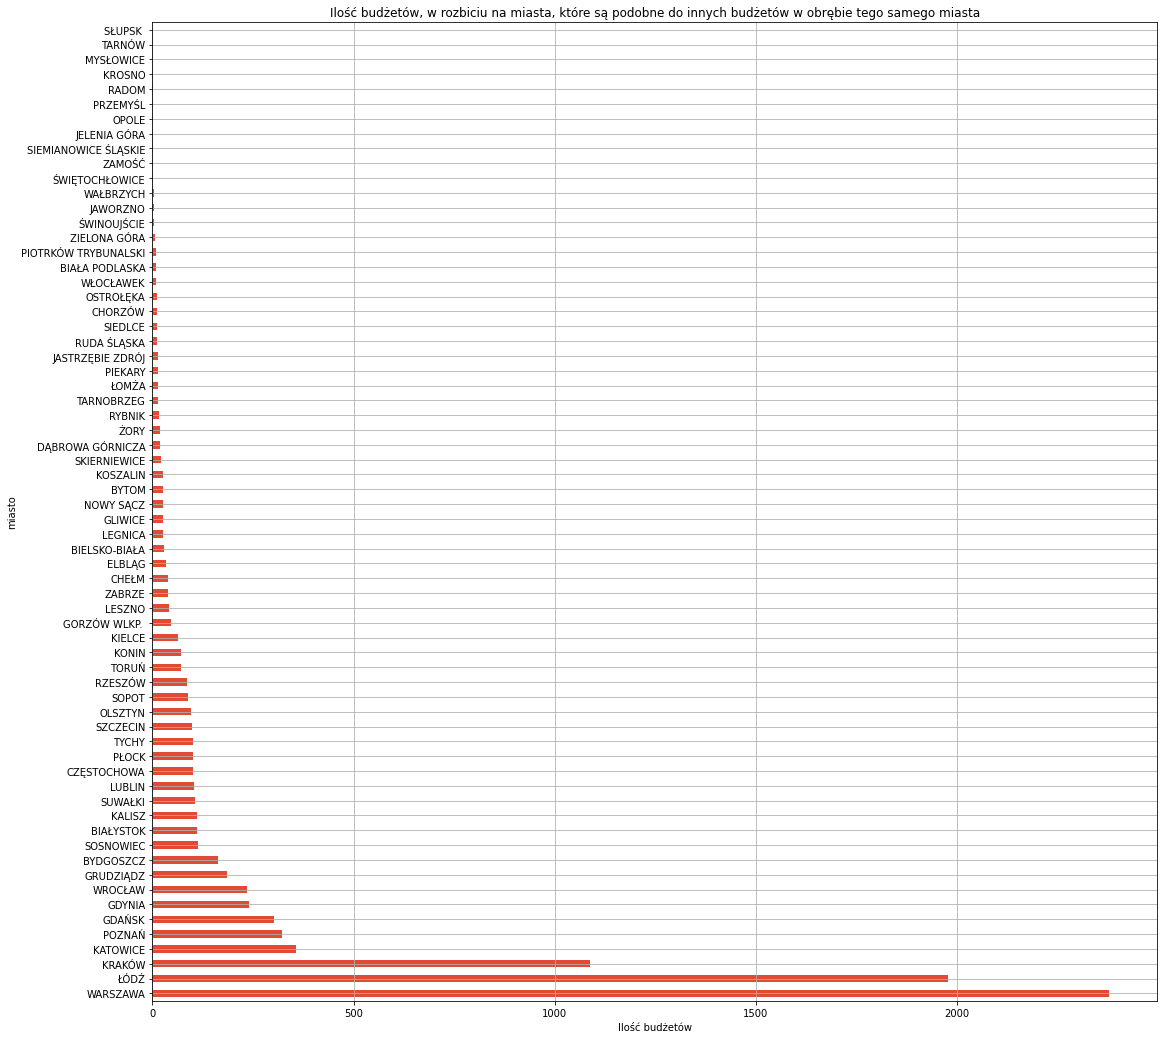

In [18]:
plt.figure(figsize=(18,18))
plt.title('Ilość budżetów, w rozbiciu na miasta, które są podobne do innych budżetów w obrębie tego samego miasta')
plt.style.use('ggplot')
plt.xlabel('Ilość budżetów')
pd.Series(np.diag(summary_df), index=summary_df.index).sort_values(ascending=False).plot(kind='barh');

In [53]:
same_df = pd.DataFrame([summary_df.index, np.diag(summary_df)]).T
same_df.columns = ['miasto', 'ilosc']
same_df = same_df.set_index('miasto').sort_values(by='miasto')
same_df # Zbiór danych zawierający ilość budżetów, które są podobne do innych budżetów 
# w obrębite tego samego miasta

ilosc
miasto              
BIAŁA PODLASKA     9
BIAŁYSTOK        111
BIELSKO-BIAŁA     29
BYDGOSZCZ        164
BYTOM             25
...              ...
ŁOMŻA             13
ŁÓDŹ            1978
ŚWINOUJŚCIE        5
ŚWIĘTOCHŁOWICE     2
ŻORY              18

[66 rows x 1 columns]

In [52]:
total_df = pd.DataFrame(df['miasto'].value_counts()).reset_index().rename(columns = {'index':'miasto', 'miasto':'calk'})
total_df = total_df.set_index('miasto').sort_values(by='miasto')
total_df # Zbiór danych zawierający całkowitą ilość budżetów

calk
miasto              
BIAŁA PODLASKA    58
BIAŁYSTOK        306
BIELSKO-BIAŁA    170
BYDGOSZCZ        812
BYTOM            120
...              ...
ŁOMŻA             87
ŁÓDŹ            3428
ŚWINOUJŚCIE       46
ŚWIĘTOCHŁOWICE    45
ŻORY              57

[66 rows x 1 columns]

In [59]:
total_same_df = pd.merge(same_df, total_df, on='miasto')
total_same_df['perc'] = total_same_df['ilosc'] / total_same_df['calk']
total_same_df


ilosc  calk      perc
miasto                              
BIAŁA PODLASKA     9    58  0.155172
BIAŁYSTOK        111   306  0.362745
BIELSKO-BIAŁA     29   170  0.170588
BYDGOSZCZ        164   812   0.20197
BYTOM             25   120  0.208333
...              ...   ...       ...
ŁOMŻA             13    87  0.149425
ŁÓDŹ            1978  3428  0.577013
ŚWINOUJŚCIE        5    46  0.108696
ŚWIĘTOCHŁOWICE     2    45  0.044444
ŻORY              18    57  0.315789

[66 rows x 3 columns]

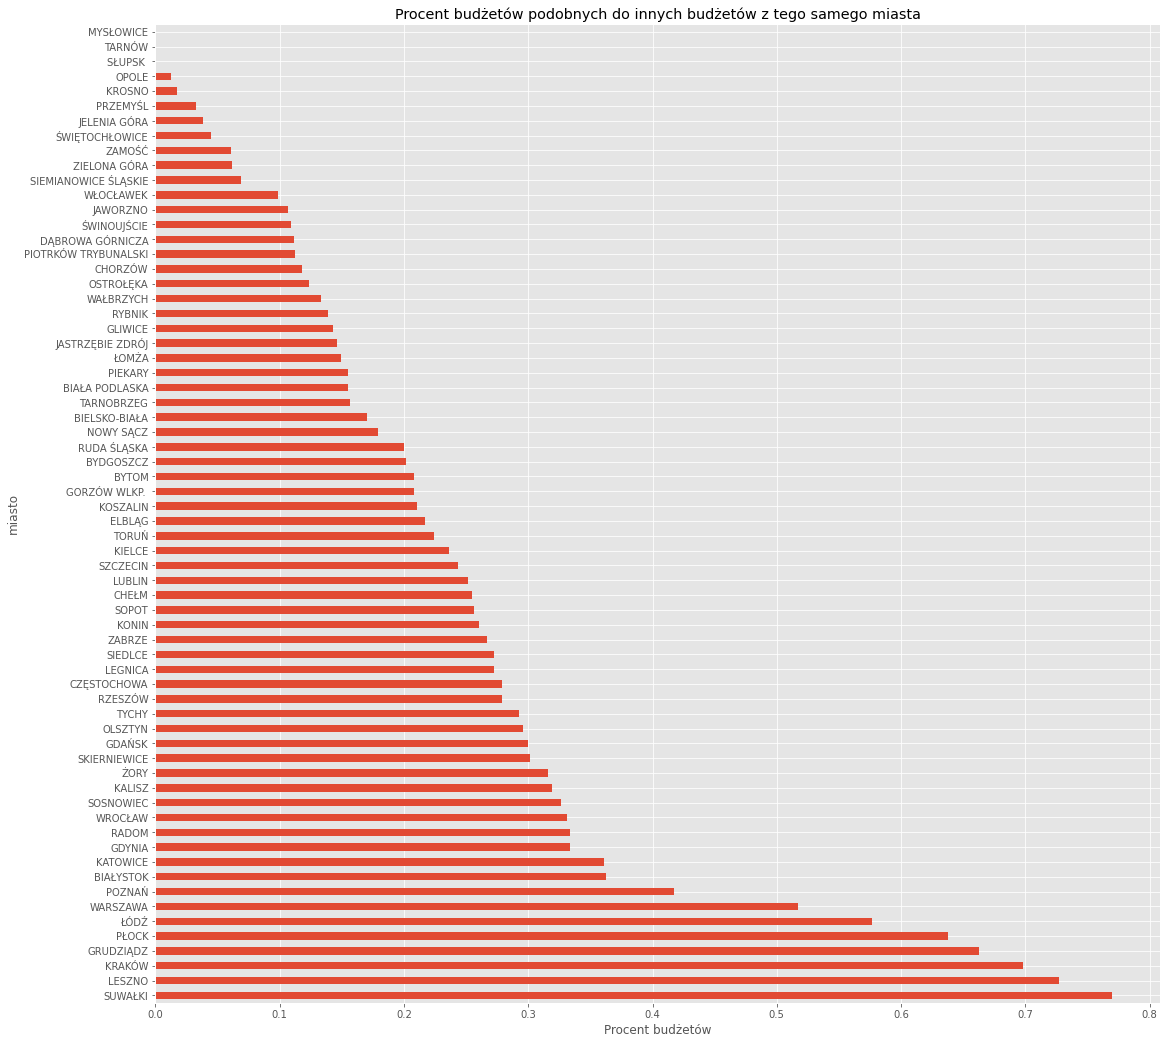

In [64]:
plt.figure(figsize=(18,18))
plt.title('Procent budżetów podobnych do innych budżetów z tego samego miasta')
plt.style.use('ggplot')
plt.xlabel('Procent budżetów')
total_same_df['perc'].sort_values(ascending=False).plot(kind='barh');

In [19]:
# Poniższe kroki mają na celu przygotowanie danych do utworzenia grafu

# Ile mamy unikalnych połączeń (kolumna 'weight')
grouped = new_df.groupby(['miasto', 'city_of_similar']).size().reset_index().rename(columns={0:'weight'})
grouped

miasto city_of_similar  weight
0     BIAŁA PODLASKA  BIAŁA PODLASKA       9
1     BIAŁA PODLASKA       BYDGOSZCZ       5
2     BIAŁA PODLASKA           CHEŁM       1
3     BIAŁA PODLASKA         CHORZÓW       1
4     BIAŁA PODLASKA     CZĘSTOCHOWA       1
...              ...             ...     ...
2388            ŻORY           TORUŃ       2
2389            ŻORY           TYCHY       1
2390            ŻORY        WARSZAWA       4
2391            ŻORY            ŁÓDŹ       6
2392            ŻORY            ŻORY      18

[2393 rows x 3 columns]

In [20]:
# Tym poleceniem usuwamy miasta, które są podobne do samych siebie, 
# Można to zasadniczo zwizualizować na grafie (w postaci pętli wokół tego samego
# węzła), ale staje się to nieczytelne. Zakładamy, że interesują nas tylko
# relacje z innymi miastami, nie z tym samym miastem. 
grouped = grouped[grouped['miasto'] != grouped['city_of_similar']]

In [21]:
SCALING_FACTOR = 10 # Skalowanie grubości linii. Im bliższa 1, tym krawędzi będą
# grubsze i przez to mniej czytelne. Grubość linii zależy od wagi połączenia - im
# większa waga, tym grubsza linia, ale wprowadziłem dodatkowo ten parametr, 
# żeby zeskalować w dół te grubości, żebyśmy zyskali na czytelności

MORE_THEN = 21 # Minimalna ilość relacji, jakie chcemy zobaczyć
# Jeżeli pokazywalibyśmy wszystkie relacje (MORE_THEN = 1), wówczas wszystkie
# węzły byłyby z sobą połączone. Zależy nam na pokazywaniu tylko tych krawędzi, 
# gdzie ilość połączeń jest większa niż wskazujemy.

In [22]:
# Zastosowanie zmiennej MORE_THEN
grouped_less = grouped[grouped['weight']> MORE_THEN]

len(grouped_less) # Będzie ostatecznie tyle krawędzi

108

In [23]:
# Tworzymy węzły jako połączenie dwóch słowników - miasto może występować w 'miasto'
# ale może nie występować w 'city_of_similar', dlatego łączymy te dwa słowniki
# żeby uniknąć tego problemu
nodes = list(set(grouped_less['miasto'].unique().tolist()) | set(grouped_less['city_of_similar'].unique().tolist()))
nodes

['BIELSKO-BIAŁA',
 'KONIN',
 'SOPOT',
 'SZCZECIN',
 'KIELCE',
 'LUBLIN',
 'WROCŁAW',
 'GORZÓW WLKP. ',
 'BYDGOSZCZ',
 'RZESZÓW',
 'ŁÓDŹ',
 'GDAŃSK',
 'POZNAŃ',
 'OLSZTYN',
 'GDYNIA',
 'TYCHY',
 'GRUDZIĄDZ',
 'DĄBROWA GÓRNICZA',
 'NOWY SĄCZ',
 'CZĘSTOCHOWA',
 'BIAŁYSTOK',
 'GLIWICE',
 'ELBLĄG',
 'WARSZAWA',
 'PŁOCK',
 'KALISZ',
 'TORUŃ',
 'SOSNOWIEC',
 'KATOWICE',
 'KRAKÓW']

In [24]:
# Zastosowanie zmiennej SCALING_FACTOR
grouped_less['weight'] = grouped_less['weight'] / SCALING_FACTOR

C:\Users\mariu\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
# Tworzymy krawędzie
edges = list(zip(grouped_less.miasto, grouped_less.city_of_similar, grouped_less.weight))

In [26]:
# Opcje przekazane jako tekst do pyvis
options = """{
  "nodes": {
    "color": {
      "border": "rgba(112,46,233,1)"
    }
  },
  "edges": {
    "arrows": {
      "middle": {
        "enabled": true,
        "scaleFactor": 0.3
      }
    },
    "arrowStrikethrough": false,
    "color": {
      "color": "rgba(190,188,201,0.61)",
      "highlight": "rgba(53,178,90,1)",
      "hover": "rgba(38,40,132,1)",
      "inherit": false
    },
    "shadow": {
      "enabled": true
    },
    "smooth": false
  },
  "interaction": {
    "hover": true
  },
  "physics": {
    "minVelocity": 0.75,
    "solver": "repulsion"
  }
}
"""

In [30]:
# Utworzenie grafu
# Jeżeli chcesz pominąć powyższe opcje i pokombinować w ręczne ustawienie
# właściwości węzłów i krawędzi, tzn. kolorów, interakcję itp... to zakomentuj
# linię oznaczoną jako A i odkomentuj linię B

net = Network('1000px', '1000px')
net.set_options(options) # A
# net.show_buttons(filter_=True) # B
net.add_nodes(nodes)
# net.add_edges(edges)
for edge in edges:
    net.add_edge(edge[0], edge[1], value=edge[2], title=str(edge[-1]*SCALING_FACTOR))
net.show('city_graph.html') # zamknij okno przeglądarki, które się otworzy
# Nie są wykrywane ścieżki względne, ale plik html się utworzył, więc otwórz
# go z katalogu outputs